## <span style="color:darkred">Dados estruturados e não estruturados e problemas típicos em bases de dados</span>

## 1. Dados não estruturados

Símbolos organizados em documentos de vários formatos.

Seu propósito é serem lidos e analisados por humanos dentro de um contexto cultural.

Como humanos temos capacidades de compreender dados não estruturados pois podemos:

- interpretar mistura de símbolos e elementos 
![documento](imagens/documento.jpg)


- detectar e corrigir erros

### "Ess3 texto foi escritto para mstrar como somvs capzes de corigir err0s"


- preencher informacoes faltantes

![preencher](imagens/fillgaps.jpg)


- lidar com ambiguidade
![ambiguidade](imagens/ambiguidade.png)




- reconhecer e compreender humor e sentimentos por meio de elementos complexos
![twit](imagens/mafalda.jpg)

Por isso são de **difícil análise automática/computacional**
 

### Exemplo 1: imagens

Imagens são exemplos de objetos não estruturados, pois seu conteúdo é projetado para interpretacão humana.

Vamos carregar duas imagens relacionadas a uma palavra chave: "cebolinha"

C:\Users\maaveiro\AppData\Local\Temp\ipykernel_22552\53560669.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img1 = imageio.imread("imagens/cebolinha2.jpg")
C:\Users\maaveiro\AppData\Local\Temp\ipykernel_22552\53560669.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img2 = imageio.imread("imagens/cebolinha3.jpg")


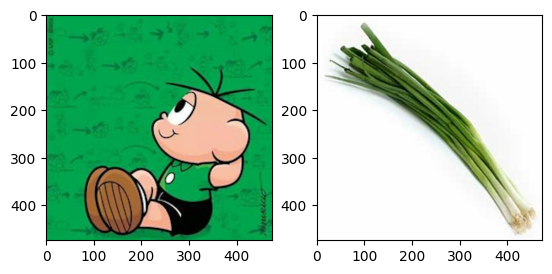

In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

# carregar e exibir imagens da "base de dados"
img1 = imageio.imread("imagens/cebolinha2.jpg")
img2 = imageio.imread("imagens/cebolinha3.jpg")

plt.subplot(121)
plt.imshow(img1)
plt.subplot(122)
plt.imshow(img2)


Nesse exemplo, vamos considerar que essas são as imagens de *referência* sobre o conceito **cebolinha** e agora vamos obter uma nova imagem, de consulta, a qual queremos comparar com as duas imagens de referência.

Vamos computar a distância entre a imagem de consulta, e ambas imagens referência, e considerar mais similar aquela com a menor distância. Imagens estão em formato binário, e podem ser vistas como sequências de bytes.

Há várias formas de calcular a distância. Seja um par de objetos a serem comparados: $A$ e $B$, cada um contendo elementos $i=1 \cdots N$, então a distância Euclidiana é:

$$ d(A,B) = \sqrt{ \sum_{i}^N (A_i - B_i)^2 } $$


In [ ]:
# carregar imagem de consulta e codificar funcao de distancia
# computar as distancias e exibir
imgQ = imageio.imread("imagens/cebolinha1.jpg")

def img_distance(A, B):
    """ Calcula a distancia Euclidiana entre dois vetores de mesmo tamanho"""
    return  np.sqrt( np.sum((A-B)**2) )

dQ1 = img_distance(imgQ, img1)
dQ2 = img_distance(imgQ, img2)

print("Imagem da esquerda:", dQ1)
print("Imagem da direita:",dQ2)


Imagem da esquerda: 7850.7686884788545
Imagem da direita: 5827.087265521257


C:\Users\maaveiro\AppData\Local\Temp\ipykernel_22552\3920619857.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imgQ = imageio.imread("imagens/cebolinha1.jpg")


Notamos que, pela distância Euclidiana, a imagem da direita é a mais similar! Vamos revelar a imagem de consulta:

674028


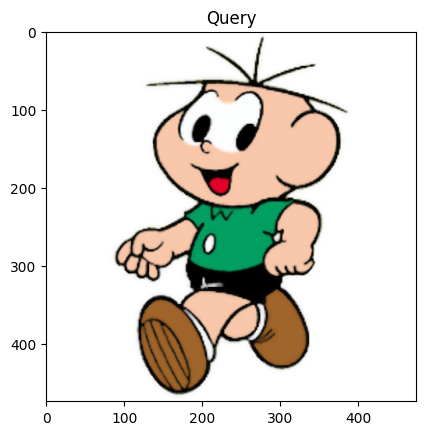

In [ ]:
# mostrar imagem de consulta
plt.imshow(imgQ)
plt.title('Query')

print(np.product(imgQ.shape))

### Exemplo 2: texto

In [ ]:
emails = ['Querido amado. Eu sou a Sra. Josan Nowak. uma viúva idosa que sofre de câncer de longa data. Estou escrevendo este e-mail para você com lágrimas pesadas em meus olhos e grande tristeza em meu coração porque atualmente estou internada em um hospital particular devido à minha condição de saúde, tenho uma doença grave de câncer. Prezado, estou entrando em contato com você para informar meu desejo. decidi doar a quantia de ($4.800.000,00 dólares) que herdei do meu falecido amado marido para trabalho humanitário, atualmente o fundo ainda está no banco, e recentemente, meu médico me disse que não posso sair devido a minha doença, tomei essa decisão porque não tenho nenhum filho que herdará esse dinheiro apósminha morte e minha saúde está piorando a cada dia, então não querouma situação em que esse fundo seja usado de maneira ímpia. Aguardo sua resposta em breve para mais informações. Sua irmã em cristo Senhora Josan Nowak', 
           'Olá,*****. No Banco ****** seu imóvel quitado garante oportunidades de crédito ainda melhores. Com o Crédito com Garantia de Imóvel Especial você realiza seus sonhos fazendo um empréstimo a partir de R$30 mil, com parcelas que cabem no seu bolso. Simule agora',
          '*****. Seu investimento no Tesouro Direto - protocolo 130444310x - já foi liquidado no banco e sua contratação foi concluída com sucesso! Você pode acessar o Extrato do Tesouro Direto para vê-lo.']

In [ ]:
for text in emails:
    print(text, end=': ')
    print(len(text))

Querido amado. Eu sou a Sra. Josan Nowak. uma viúva idosa que sofre de câncer de longa data. Estou escrevendo este e-mail para você com lágrimas pesadas em meus olhos e grande tristeza em meu coração porque atualmente estou internada em um hospital particular devido à minha condição de saúde, tenho uma doença grave de câncer. Prezado, estou entrando em contato com você para informar meu desejo. decidi doar a quantia de ($4.800.000,00 dólares) que herdei do meu falecido amado marido para trabalho humanitário, atualmente o fundo ainda está no banco, e recentemente, meu médico me disse que não posso sair devido a minha doença, tomei essa decisão porque não tenho nenhum filho que herdará esse dinheiro apósminha morte e minha saúde está piorando a cada dia, então não querouma situação em que esse fundo seja usado de maneira ímpia. Aguardo sua resposta em breve para mais informações. Sua irmã em cristo Senhora Josan Nowak: 929
Olá,*****. No Banco ****** seu imóvel quitado garante oportunidad

> Como comparar os emails? Como obter informações que, por exemplo, permitam dizer que um deles é spam?

Alguns desafios incluem
* lidar com diferentes tamanhos de strings, símbolos e números
* definir função de distância


**Exemplos de documentos não estruturados:**
* emails, 
* artigos,
* documentos em PDF,
* comentários e postagens em redes sociais,
* interacão entre consumidores,
* áudio,
* dados adquiridos por sensores

Características de dados não estruturados:
* **binários** e/ou **caracteres**
* **alta flexibilidade** (não possuem esquema)
* **coleta** feita com baixo **controle** (*in the wild*)
* **não verificados** / **não certificados**
* possuem alta **redundância**
* possuem alta **dimensionalidade**







## 2. Dados estruturados

Dados cujos elementos são *endereçáveis*, facilitando armazenamento e recuperação, organizados em um repositório formatado.

Em contrapartida aos dados não-estruturados nos quais não há um esquema que mostre o atributo ou a informação que eu desejaria recuperar mas que não é disponível de forma direta.

Dados estruturados estão prontos para ser armazenados em **bases de dados relacionais**, por exemplo:

 username     | Primeiro Nome  | Sobrenome | Ano de nascimento
 :------ |:--------- |:----- | --- | 
 joao@provider.com     | João | Oliveira | 1996
 bet89@hoster.net    | Elizabete | Costa Silva | 1989
 maria@internet.com.br | Maria Cláudia | Nunes de Souza | 1976
 
 transpondo informações das imagens que mostramos no caso não estruturado:

 ID     | Conceito  | Categoria
 ------ |:---------:| -----:|
 01     | Cebolinha | Personagem
 02     | Cebolinha | Personagem
 03     | Cebolinha | Alimento
 
 Mas note que as informações estruturadas não são suficientes para dar uma idéia completa da imagem a que nos referimos! Em particular, os IDs 01 e 02 tem exatamente os mesmos dados estruturados.
 
 
 #### Terminologia de bases relacionais
 
 * **Campo, atributo ou variável**: um elemento específico para o qual temos dados, por exemplo: username na primeira tabela mostrada, relativo a *coluna* da tabela
 * **Tupla ou registro**: um conjunto de valores de atributos, por exemplo: (joao@provider.com, João, Oliveira, 1996), relativo à *linha* da tabela
 * **Tabela ou relação**: conjunto de linhas e colunas compartilhando os mesmos atributos, organizando a mesma informação acerca de um tipo de objeto
 
 Em dados estruturados podemos ainda definir relações com outros dados.
 
 Por exemplo, definimos duas tabelas, a primeira para a imagem, e a segunda para conceitos.

*Tabela 1 - Conceitos*
 
 ID_c     | Descricão |
 ------ |:---------:|
 1     | Cebolinha |
 2     | Coentro |
 

*Tabela 2 - Imagens*
 
 
 ID_i   | Conceito (Conceitos->ID_c)  | Categoria
 ---- |:---:| -----:|
 01   |  1  | Personagem
 02   |  1  | Personagem
 03   |  1  | Alimento
 04   |  2  | Alimento
 
 
 Aqui, temos esquema, e podemos definir que, por exemplo:
 - ID_c, ID_i e Conceito são sempre números inteiros
 - ID_c não pode se repetir em tuplas distintas na tabela
 - ID_i não pode se repetir em tuplas distintas na tabela
 - Conceito pode conter apenas valores que existam em ID_c na tabela Conceitos

A possibilidade de realizar validação e controle de entrada torna esses dados mais confiáveis.

Finalmente, é possível projetar **buscas** para recuperar informação de forma eficiente!

In [ ]:
conceitos = { 'ID_c' : [1, 2],
              'Descricao': ['Cebolinha', 'Coentro']}


imagens = {'ID_i':      [1,2,3,4],
           'Conceito' : [1,1,1,2],
           'Categoria': ['Personagem',
                         'Personagem',
                         'Alimento',
                         'Alimento']
          }

import pandas as pd
df_conc = pd.DataFrame(conceitos)
df_imag = pd.DataFrame(imagens)

print(df_conc)
print()
print(df_imag)



   ID_c  Descricao
0     1  Cebolinha
1     2    Coentro

   ID_i  Conceito   Categoria
0     1         1  Personagem
1     2         1  Personagem
2     3         1    Alimento
3     4         2    Alimento


In [ ]:
df_imag[ df_imag['Categoria']=='Alimento' ]

ID_i  Conceito Categoria
2     3         1  Alimento
3     4         2  Alimento

In [ ]:
c = df_conc[ df_conc['Descricao'] == 'Cebolinha']

# use com cuidado, só funciona se a consulta anterior retornar alguma linha
df_imag[df_imag['Conceito'] == c.iloc[0]['ID_c']]

ID_i  Conceito   Categoria
0     1         1  Personagem
1     2         1  Personagem
2     3         1    Alimento

#### Tipos de dados

* numéricos: mais simples de lidar podemos extrair medidas, estatísticas, etc.
* categóricos: podemos medir sua frequência, mas compará-los é mais difícil

Muitos métodos estatísticos e de aprendizado de máquina não permitem trabalhar com dados categóricos diretamente!

## 3. Resumo e considerações finais

Dados não estruturados:
* representam grande parte dos dados disponíveis, tanto em sistemas privados quanto publicamente
* continua a crescer devido a
    - menor custo e facilidade de aquisição
    - dispositivos móveis conectados

Dados estruturados:
* robustos
* fáceis de versionar
* mais confiáveis
* maior custo de manutenção

**Muitos esforços são direcionados a obter dados estruturados a partir de dados não estruturados!**

Nesse processo uma série de escolhas precisam ser feitas para ter sucesso no resultado desejado.


## <span style="color:darkred">Problemas típicos em bases de dados: Informações faltantes</span>

## Problemas típicos em bases de dados

* bases de dados, ainda que estruturadas, possuem problemas
* a regra 80/20 diz que **80%** do tempo dos cientistas de dados é gasto **encontrando, limpando e organizando dados**

    https://www.ibm.com/cloud/blog/ibm-data-catalog-data-scientists-productivity
    
<img src="imagens/ibm-8020rule.png" alt="drawing" width="700"/>

* *não reconhecer esses problemas e ignorá-los pode levar a conclusões erradas na fase de análise.*



## Informações faltantes (*missing data*)


#### Razões para dados faltantes

A maior causa da existência de dados faltantes está no projeto do protocolo de *coleta de dados* e na sua execução.

Podemos observar as seguintes fontes de dados faltantes:

* Omissão / não preenchimento de campo:
    * usuário esqueceu
    * usuário escolheu não preencher por não saber como preencher
    * usuário preferiu não preencher com receio da interpretação da resposta
    
    
* Dados perdidos: 
    * na digitação (em papel ou digital), 
    * na transferência de dados 
    * na migração de bases de dados 
    * na conversão entre formatos de arquivos    
    
    
* Erro de programação



### Tipo do dado faltante

Seja $V$ o conjunto de todas as observações em um conjunto de dados. 

$V$ é particionado em $V_c$ e $V_m$, sendo que:
* $V_c \subseteq V$ são as observações completas em todos os campos/atributos,
* $V_m \subseteq V$ são as observações com ao menos um campo/atributo faltante (*missing*),

---

> Estabelecer a origem dos dados faltantes e sua causa pode ser importante, e só é completamente possível com auxílio de especialistas no domínio ou negócio

---

#### MCAR - missing completely at random

**Faltantes completamente aleatórios**
- a probabilidade de $V_m$ ser faltante é independente de $V_m$ e independente de qualquer outra observação $X \in V_c$ no dataset;
- caso em que qualquer dado tem a mesma chance de estar faltando;

*Exemplo*: ao avaliar um produto os clientes decidem reportar ou não a sua satisfação jogando cara-ou-coroa;

*Nesse caso:* $V_c$ são uma amostra representativa de todas as outras, e podem ser usadas para completar $V_m$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_mcar = pd.read_csv("./dados/TACTD-01-Faltantes_MCAR.csv", sep=',', header=0)

print("Número de observacoes na base de dados: ", data_mcar.shape[0])
data_mcar[:10]

Número de observacoes na base de dados:  30


e-mail             Name  Sex  Rate
0    eug_ewell@live.com    Eugenio Ewell    M   NaN
1                   NaN       Ivo Izidro    M   5.0
2      multiplx@mac.com    Lindsey Lever  NaN   3.0
3   bader@sbcglobal.net   Desiree Dardar    F   NaN
4      nasarius@aol.com   Mariann Mulero    F   3.0
5  jusdisgi@outlook.com   Kathey Kleiman    F   4.0
6     rrollison@aol.com  Rupert Rollison    M   2.0
7     seymoress@aol.com    Signe Seymore    F   NaN
8    loralemo@gmail.com     Lora Lemoine    F   4.0
9                   NaN      Leanne Lowy    F   4.0

Digamos que estamos interessados nas avaliacoes realizadas, ou seja "Rate", vamos ver as estatísticas descritivas desse atributo

In [ ]:
data_mcar['Rate'].describe()

count    24.000000
mean      3.500000
std       1.215838
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Rate, dtype: float64

Mas sabemos que há dados faltantes, então vamos olhar especificamente para eles

In [ ]:
# observando os dados de avaliacoes que sao nulos
data_mcar[data_mcar['Rate'].isnull()]

e-mail            Name  Sex  Rate
0    eug_ewell@live.com   Eugenio Ewell    M   NaN
3   bader@sbcglobal.net  Desiree Dardar    F   NaN
7     seymoress@aol.com   Signe Seymore    F   NaN
13       cobree@aol.com    Carlos Cobre    M   NaN
18   agapow@comcast.net    Ricardo Rima    M   NaN
24                  NaN    Herta Hatley  NaN   NaN

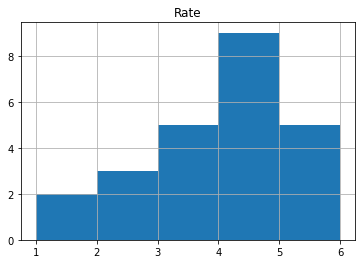

In [ ]:
# olhando para a distribuicao dos dados...
hist = data_mcar.hist(bins=np.arange(1,7))

Aparentemente, não há uma causa dos dados faltantes, então é provável um cenário **MCAR**, para o qual existem várias técnicas disponíveis para minimizar o efeito de dados faltantes.

Note que $V_m$, mostradas acima não parece ter qualquer relação com os valores de $V_m$ nem com outras variáveis $V_c$ observadas.

---

#### MAR : missing at random

**Faltantes (condicionalmente) aleatórios**:
- a probabilidade de $V_m$ ser faltante é independente de $V_m$, mas
- está relacionada a outras variáveis $V_c$ (para os quais há dados disponíveis) no dataset;

*Exemplo*: ao revisar um serviço contratado online, *homens* tendem a omitir a satisfação sobre o serviço, mas isso **não** tem relação com seu nível de satisfação,

*Nesse caso:* $V_c$ são uma amostra representativa apenas para certo conjunto de observações,



In [ ]:
data_mar = pd.read_csv("./dados/TACTD-01-Faltantes_MAR.csv")

data_mar[data_mar['Rate'].isna()]

e-mail            Name Sex  Rate
1         iizi@yahoo.ca      Ivo Izidro   M   NaN
12       kk@verizon.net    Kraig Kriner   M   NaN
18   agapow@comcast.net    Ricardo Rima   M   NaN
23       joelw@live.com      Elias Elmo   M   NaN
25         jaju@mac.com      Jada Judon   M   NaN
27  njpayne@comcast.net  Lillian Labree   F   NaN

Observar os dados visualmente pode não significar muito... vamos usar estatística descritiva e depois olhar apenas para os dados faltantes

In [ ]:
data_mar.describe()

Rate
count  24.000000
mean    3.666667
std     1.007220
min     1.000000
25%     3.000000
50%     4.000000
75%     4.000000
max     5.000000

In [ ]:
# criando um dataframe para visualizar lado a lado a estatística descritiva
df_descr = data_mar.describe()

In [ ]:
df_descr['Rate_F'] = data_mar[data_mar['Sex']=='F'].describe()
df_descr['Rate_M'] = data_mar[data_mar['Sex']=='M'].describe()

In [ ]:
df_descr

Rate     Rate_F    Rate_M
count  24.000000  17.000000  7.000000
mean    3.666667   3.705882  3.571429
std     1.007220   1.046704  0.975900
min     1.000000   1.000000  2.000000
25%     3.000000   3.000000  3.000000
50%     4.000000   4.000000  4.000000
75%     4.000000   4.000000  4.000000
max     5.000000   5.000000  5.000000

--- 
#### MNAR: missing not at random

**Faltantes não aleatórios** ou respostas não ignoráveis
- origem quando descartamos MCAR e MAR;
- o valor da variável faltante é a razão pela qual ela está faltando;
    
*Exemplo*: ao revisar um produto comprado, clientes tendem a omitir o nível satisfação com o produto **devido** ao nível de satisfação,

*Nesse caso:* ?



In [ ]:
data_nr = pd.read_csv("./dados/TACTD-01-Faltantes_NonRandom.csv")

data_nr.head(8)

e-mail             Name Sex  Rate
0    eug_ewell@live.com    Eugenio Ewell   M   4.0
1         iizi@yahoo.ca       Ivo Izidro   M   5.0
2      multiplx@mac.com    Lindsey Lever   M   3.0
3   bader@sbcglobal.net   Desiree Dardar   F   NaN
4      nasarius@aol.com   Mariann Mulero   F   NaN
5  jusdisgi@outlook.com   Kathey Kleiman   F   4.0
6     rrollison@aol.com  Rupert Rollison   M   NaN
7     seymoress@aol.com    Signe Seymore   F   3.0

In [ ]:
data_nr.describe()

Rate
count  22.000000
mean    4.090909
std     0.750180
min     3.000000
25%     4.000000
50%     4.000000
75%     5.000000
max     5.000000

In [ ]:
data_nr[data_nr['Rate'].isnull()]

e-mail              Name Sex  Rate
3     bader@sbcglobal.net    Desiree Dardar   F   NaN
4        nasarius@aol.com    Mariann Mulero   F   NaN
6       rrollison@aol.com   Rupert Rollison   M   NaN
11      danzigism@aol.com      Mayra Mcnish   F   NaN
13         cobree@aol.com      Carlos Cobre   M   NaN
20     temmink@icloud.com  Willene Wolfgram   F   NaN
26  tubajon@sbcglobal.net     Joelle Jaffee   F   NaN
29   dfevre@optonline.net   Douglas Damario   M   NaN

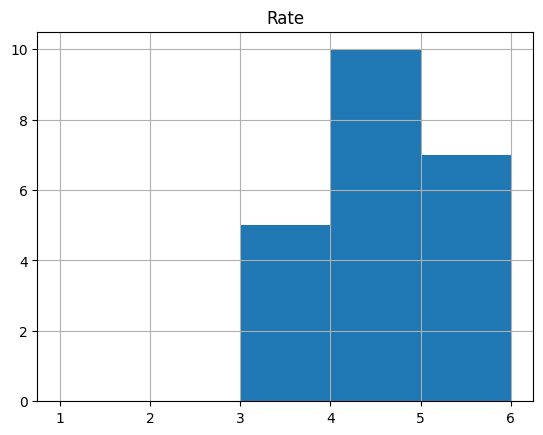

In [ ]:
# olhando para a distribuicao dos dados...
hist = data_nr.hist(bins=np.arange(1,7))

## Resumo e considerações finais

Bases de dados reais possuem problemas relacionados à coleta que não podem ser negligenciados

Parte importante do trabalho do cientista de dados é reconhecer esses problemas

**Dados faltantes** é um desses problemas e pode ocorrer em três tipos principais
* Completamente Aleatório - MCAR
* Aleatório (condicionalmente) - MAR
* Não aleatório

A abordagem para tratar cada caso deve ser diferente!

> Análise dos dados pode indicar a origem *mais provável*, mas apenas com conhecimento do domínio e do negócio é possível determinar de forma definitiva a causa

## <span style="color:darkred">Outliers, ruído e dados incorretos/erros</span>

![outlier](imagens/outlier.jpg)

**Outliers, dados incorretos e ruído** são também frequentes em bases de dados.

* *outlier* é um dado que recai fora da distribuição principal dos dados
* *incorreto* é aquele que existe na base de dados (não é faltante), mas também não se encaixa naquela variável ou atributo de entrada, e deve ser corrigido ou removido
* *ruído* é um dado que atrapalha a análise, dificultando encontrar padrões nos dados

Os conceitos tem uma diferença tênue. Buscar por esse tipo de dado e estudar forma de compensar sua existência, corrigindo-os ou removendo-os é parte do tratamento de dados.

---
Utilizaremos um conjunto de dados de natalidade em uma maternidade, e que contém os seguintes atributos relativos aos nascidos:
* sexo, 
* peso do nascimento (em gramas), 
* idade gestacional (em semanas),
* mês do nascimento,
* ano do nascimento.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("./dados/TACTD-01-Outliers_Erros_Desbal.csv")

print("Número de observacoes na base de dados: ", data.shape[0])
data.head(3)

Número de observacoes na base de dados:  72


Sex  Weight  Gestational age  Month  Year
0   F    3490               38     12  2016
1   M    3650               39     12  2016
2   M    2740               34     12  2016

## Erros

São dados que possuem problemas provavelmente durante algum processo na entrada, transmissão ou armazenamento, em que a validação dos dados falhou.

Uma forma é inspecionar os valores únicos das variáveis/colunas

In [ ]:
for var in data:
    print('Coluna:', var, 'Tipo:', data[var].dtype)
    print(data[var].unique(), '\n')

Coluna: Sex Tipo: object
['F' 'M' 'P'] 

Coluna: Weight Tipo: int64
[3490 3650 2740 3380 3820 2790 1850 3270 2800 3470 3200 3720 3730 3550
 2780 3600 3610 2200 3680 3570 3980 3300 3860 3120 3460 3130 3690 2950
 3790 3230 2500 2920 3050 4300 3580 4900 2940 3220 3480 3540 3640 3700
 2880 3750 4000 3880 4150 3800 3100 3280 4100 3900 3450] 

Coluna: Gestational age Tipo: int64
[38 39 34 36 35 40 37 41 33 42 43 32] 

Coluna: Month Tipo: int64
[12  1  2  3  4  5] 

Coluna: Year Tipo: int64
[ 2016 22017  2017] 



Dados errôneos encontrados:
1. Sexo = P

2. Ano = 22017


O valor **P** não pertence ao que é esperado. Esse dado foi corrompido de alguma forma e representa um dado **incorreto**. Devemos desconsiderá-lo, tornando-o um dado faltante.

O valor **22017** é recuperável, corrigindo para 2017 que é com grande chance o dado correto

In [ ]:
# defininos o dado P como sendo faltante
data.loc[data['Sex']=='P', 'Sex'] = np.nan

# corrigimos o 22017
data.loc[data['Year']==22017, 'Year'] = 2017

## *Outliers* 


#### Tipos de *outliers*

Também chamados de pontos "fora-da-curva" ou aberrantes. 

Os pontos *não-outliers* são às vezes chamados de *inliers* pois recaem "dentro" do esperado.

Tipos de outliers incluem : 

1. Globais ou anomalias de ponto

2. Contextuais ou condicionais

3. Coletivos

---


1. **Globais ou anomalias de ponto**: são ocorrências de valores *individuais* muito diferentes da maior parte dos dados disponíveis.

    Uma forma simples de identificar é gerar gráficos de caixa (ou *boxplots*) dos atributos/colunas da base de dados. 
    
    Esse gráfico exibe:
        * o intervalo dos valores que representam 50% do total dos dados dentro de uma caixa
        * a mediana como uma linha dentro da caixa
        * "whiskers" ou bigodes que indicam a dispersão de 1,5 vezes o Intervalo Interquartil (IQR) com relação às bordas das caixas


![boxplot](imagens/boxplot.png)

       
    
Idealmente, grafamos cada variável individualmente, pois elas têm intervalos de valores distintos! 
* por exemplo, enquanto o peso está definido ao redor de milhares de gramas, a idade gestacional é em dezenas de semanas

<AxesSubplot: >

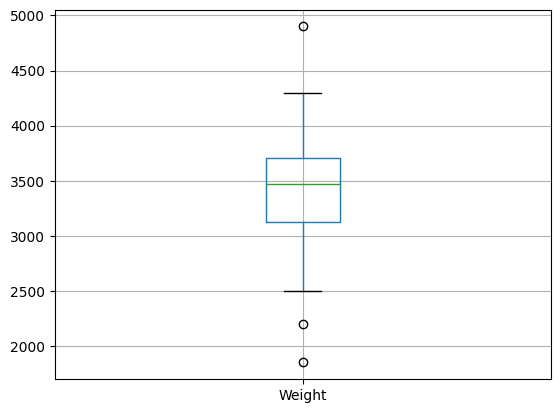

In [ ]:
data.boxplot(column=['Weight'])

Notamos que a maior parte dos pesos recaem aproximadamente entre 2500 e 4400, mas temos alguns pontos fora desse intervalo. Vamos tentar encontrá-los:

In [ ]:
data[(data['Weight'] < 2500) | (data['Weight'] > 4400)]

Sex  Weight  Gestational age  Month  Year
6    M    1850               38     12  2016
19   F    2200               33      1  2017
41   F    4900               42      3  2017

Há valores mais altos ou mais baixos do que a maioria. Nesses casos, parecem ser valores inputados corretamente e verdadeiros. 

Por desviar da maior parte dos dados são considerados **outliers globais**.

No entanto, não iremos removê-lo a princípio pois são factíveis e não é possível dizer que são incorretos.

---

2. **Contextuais**: são valores que, observados isoladamente podem não ser aberrantes, mas que ao observar o <u>contexto</u>, sim!

    * Em dados **independentes e identicamente distribuídos**, na qual um exemplo (nascimento de um bebê e seus dados) não deveria afetar os próximos exemplos observados, o contexto pode estar nas variáveis envolvidas.
    
    * Em dados **sequenciais** (como séries temporais, texto), em que uma observação influencia a próxima, o contexto é quase sempre o aspecto temporal/sequencial.
    
No nosso exemplo, podemos observar se há uma anomalia de peso com relação à idade gestacional!

Considere que sabemos, por meio de um especialista que:
* bebês nascidos entre 38 e 42 semanas possuem peso normal se estiverem aproximadamente entre 2500 e 4000 gramas.
    
    Assim, podemos buscar por **outliers contextuais**, em que o peso saia fora desse intervalo <u>dentro do período gestacional</u> indicado.
    
    Podemos usar busca por fatiamento da base, e também *boxplots*

In [ ]:
#cria visão do dataframe com base na idade gestacional
d_term = data[(data['Gestational age'] >= 38) & (data['Gestational age'] <= 42)]

# buscando por anomalias contextuais por limiar
d_term[ (d_term['Weight'] < 2500) | (d_term['Weight'] > 4000) ]

Sex  Weight  Gestational age  Month  Year
6    M    1850               38     12  2016
41   F    4900               42      3  2017
62   F    4150               41      5  2017

In [ ]:
# usando boxplot
d_term.boxplot(column=['Weight'])

<AxesSubplot: >

É interessante notar que nossa busca específica retornou 3 enquanto o *boxplot* apenas 2 elementos como outliers

Vamos inspecionar os casos segundo o critério do especialista:

In [ ]:
d_term[ (d_term['Weight'] < 2000)]

Sex  Weight  Gestational age  Month  Year
6   M    1850               38     12  2016

Aqui, segundo as diretrizes indicadas por um especialista, é provável que temos um outlier contextual, ou seja, considerando qualquer idade gestacional não seria um outlier, mas se levarmos em conta que foram 38 semanas, então é um outlier.

Quanto ao segundo caso:

In [ ]:
d_term[ (d_term['Weight'] > 4000)]

Sex  Weight  Gestational age  Month  Year
41   F    4900               42      3  2017
62   F    4150               41      5  2017

Aqui, temos um caso limítrofe (4150) e precisamos da ajuda de especialistas para decidir o que significa esse *outlier*

Já 4900 parece ser outlier ainda que também possível dentro dos limites esperados.


--- 

3. **Coletivos**: um conjunto de observacões cujos valores, quando analisados em grupo, indicam um evento não usual.

    Em geral:
    * não são *outliers globais* pois seus valores recaem dentro da maior parte dos dados globalmente
    
    * não são *outliers contextuais* pois individualmente podem ser considerados normais quando observados contextos relevantes

No nosso exemplo, vamos analisar os dados relativos ao nascimento de bebês do sexo masculino e feminino, mês a mês.

In [ ]:
data.groupby(['Year','Month'])['Sex'].describe()

count unique top freq
Year Month                      
2016 12       12      2   F    8
2017 1        14      2   F    9
     2        12      2   F    7
     3        11      2   F    9
     4        10      2   F    8
     5        12      1   F   12

Observando a estatística descritiva acima, veja que no mês 5 há 12 ocorrências, mas apenas um único valor, **F**

Vamos visualizar:


In [ ]:
data[data['Month'] == 5]

Sex  Weight  Gestational age  Month  Year
60   F    3120               34      5  2017
61   F    3380               37      5  2017
62   F    4150               41      5  2017
63   F    3800               42      5  2017
64   F    3100               37      5  2017
65   F    3280               40      5  2017
66   F    4000               38      5  2017
67   F    4100               37      5  2017
68   F    3900               40      5  2017
69   F    3450               37      5  2017
70   F    3100               33      5  2017
71   F    2800               35      5  2017

De fato, observar apenas nascimento de bebês do sexo feminino em um determinado mês é um **outlier coletivo**.

Note que os valores de sexo e mês individualmente não indicam **outlier global**, e que, quando analisamos observacoes uma a uma, é normal que um bebê do sexo feminino nasca no mês 5, então também a análise individual não mostra **outlier contextual**.

Assim, apenas pela análise conjunta identificamos um comportamento de **outlier**.

--- 
## Ruído

Talvez o mais desafiador dos problemas mencionados, pode ser detectado como outlier ou até mesmo como inlier, mas que representam uma quebra de padrões, dificultando a modelagem do problema.

Por exemplo, suponha que queremos fazer uma modelagem do peso com relação à idade gestacional

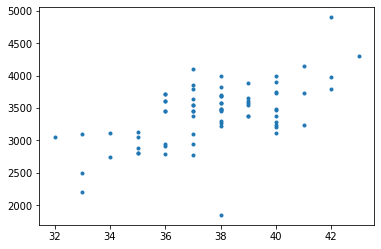

In [ ]:
plt.plot(data['Gestational age'], data['Weight'], '.')

É possível identificar pontos que são outliers, mas que representam o padrão esperado: bebês com maior idade gestacional possuem maior peso.

No entanto, notamos que com 38 semanas há um bebê com um peso muito baixo. Esse dado é provavelmente **ruidoso**, ou seja, mesmo que real e não incorreto, levá-lo em consideração para encontrar padrões poderia prejudicar a análise.

In [ ]:
data_clean = data[data['Weight'] > 1900 ]
data_clean.shape

(71, 5)

---
## Resumo

* Reconhecer outliers pode ser muito útil para entender os dados, e isso pode levar a diferentes aplicações:
    * detectar dados errôneos
    * detectar anomalias que possam ser reportadas
* É preciso ter conhecimento do domínio para ir além dos outliers globais, capturando também os contextuais e coletivos.
* Erros podem ou não ser passíveis de correção
* Ruído são dados que atrapalhariam análises e devemos considerar remover

## <span style="color:darkred">Desbalanceamento e Redundância</span>

![desbalanceamento](imagens/desbalanceamento.jpg)

**Desbalanceamento ocorre quando** temos mais dados representando certos  eventos, e muito menos de outros.

Em problemas de **regressão** por exemplo isso significa:
- há mais dados em um determinado intervalo de valores do que em outros

Em problemas de **classificação**
- uma variável categórica possui frequência de valores muito diferentes entre si

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("./dados/TACTD-01-Desbalanceamento.csv")

print("Número de observacoes na base de dados: ", data.shape[0])

Número de observacoes na base de dados:  76


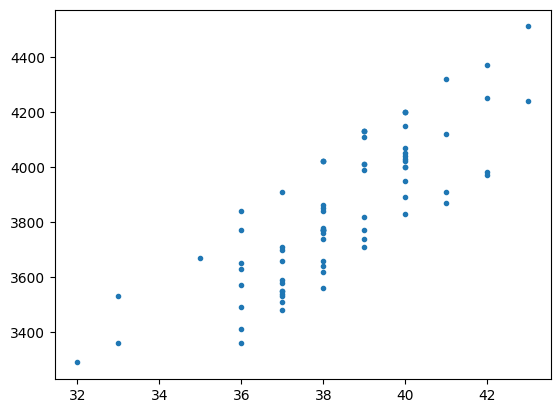

In [ ]:
plot = plt.plot(data['Gestational age'], data['Weight'], '.')

No intervalo entre 32 e 35 temos menos observações do que de 36 e superior



In [ ]:
data['Sex'].value_counts()

F    58
M    18
Name: Sex, dtype: int64

In [ ]:
cont = data['Sex'].value_counts()

# relacao entre classe majoritaria e minoritaria
ratio = np.round((cont[1]/cont[0])*10,1)

# percentual
perce = (np.min(cont)/data.shape[0])*100

In [ ]:
print('Problema com relaçao 1:'+str(ratio))
print('Classe minoritária com frequência: %.1f%%' % (perce)) 

Problema com relaçao 1:3.1
Classe minoritária com frequência: 23.7%


O **desbalanceamento** pode representar:
* a probabilidade *a priori* dos dados, ou seja, a frequência real dos eventos 
* um problema de amostragem do conjunto de dados

A depender do caso, será preciso coletar mais dados ou recorrer a métodos para compensar esse desbalanceamento!

---
## Redundância

A redundância mais comum ocorre em:
* linhas duplicadas
* atributos constantes

In [ ]:
data[data.duplicated()]

Sex  Gestational age  Month  Year  Weight Hospital    Date
9    F               38     12  2016    3770  St Mary  201612
23   F               38     12  2016    3770  St Mary  201612
40   M               38      2  2017    4020  St Mary   20172
57   F               40      3  2017    4000  St Mary   20173
62   F               39      4  2017    4010  St Mary   20174

In [ ]:
for var in data:
    print(var)
    print('Valores únicos:', data[var].unique(), '\n')

Sex
Valores únicos: ['F' 'M'] 

Gestational age
Valores únicos: [38 39 42 36 40 37 41 33 43 32 35] 

Month
Valores únicos: [12  1  2  3  4  5] 

Year
Valores únicos: [2016 2017] 

Weight
Valores únicos: [3740 4130 4250 3990 3760 3360 4020 3770 4150 4040 3630 4200 3710 3510
 3910 4110 3860 3970 3840 3480 3950 3410 3870 3660 3570 3590 4120 3640
 3530 3540 3650 4240 4000 3560 4370 3700 3820 3850 3290 3890 3550 3490
 3620 4510 4050 4010 3830 4320 3980 4030 3780 3580 4070 3670] 

Hospital
Valores únicos: ['St Mary'] 

Date
Valores únicos: [201612  20171  20172  20173  20174  20175] 



Linhas duplicadas e atributos contendo o mesmo valor para todas as linhas são comumente desnecessários e podem ser removidos

---
## Resumo

* Desbalanceamento ocorre naturalmente ou ocasionado por problemas de amostragem
    * Pode afetar intervalos de valores ou frequência de determinados valores
* Redundância de dados ocorre pela duplicação de instâncias/linhas ou irrelevância de atributos/variáveis com relação a adicionar informação útil para análise do problema

## <span style="color:darkred">Pipeline geral de coleta e tratamento de dados</span>

## Pipeline geral

<img src="imagens/pipeline_tactd.png" width=450>

O fluxo de análise de dados inclui a **coleta**, **pré-processamento** e modelagem.

Coleta + Pré-processamento são referentes à ETL (Extract, transform, load)

Caso os dados tenham origem não estruturada, é preciso antes realizar o próprio pré-processamento e extração de características, estruturando os dados.

## Pipeline geral de pré-processamento

Ainda que não seja possível estabelecer uma regra, de forma geral temos o seguinte fluxo de operações de pré-processamento de dados

<img src="imagens/pipeline_tactd_preproc.png" width=500>


1. Começamos por analisar e tratar a **corretude** dos atributos, incluindo seu tipo e valores, analisando a distribuição dos dados observados


2. A seguir, analisamos **redundância** removendo atributos constantes e linhas duplicadas


3. Valores **errôneos** que possam ser corrigidos, devem ser tratados. Os que não puderem ser corrigidos são removidos


4. Análise de dados **faltantes** (deve ser feita em paralelo com outliers): verificando a ocorrência dos dados, em quais atributos aparecem, e se há algum mecanismo de correlação com outras variáveis que nos indique que possa ser realizado preechimento
    * deve-se evitar preencher dados sensíveis,
    * o preenchimento com base em dados completos tanto da *própria* variavel quanto utilizando valores de *outras* variáveis, depende também de analisar outliers,
    * ao preencher dados faltantes, é preciso retornar ao início do pipeline para verificar novamente redundância e outros problemas.
    
    
5. Análise e tratamento de **outliers**: possibilita entender quais pontos recaem fora do comumente observado nas variáveis
    * uma análise inicial poderia apenas listar a ocorrência desses outliers,
    * técnicas de detecção de outliers podem terminar por identificar valores incorretos, os quais podem ser por exemplo erros na coleta ou ruído,
    * ao identificar outliers (possivelmente removendo parte deles) é preciso retornar para o início do pipeline, pois isso influencia na análise de dados errôneos e faltantes.

## <span style="color:darkred">Módulo I</span>
### <span style="color:darkred">Exercícios com soluções</span>

In [ ]:
# carregando a biblioteca necessária
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Exercício 1)

Considere a tabela com os dados a seguir

 username     | Primeiro Nome  | Sobrenome | Ano de nascimento | Foto
 :------ |:--------- |:----- | --- | --- 
 joao@provider.com     | João | Oliveira | 1996 | foto1033.jpg
 bet89@hoster.net    | Elizabete | Costa Silva | 1989 | foto0010.jpg
 maria@internet.com.br | Maria Cláudia | Nunes de Souza | 1976 | foto2401.jpg
 
 De acordo com a definição de dados estruturados e não estruturados, esse conjunto de dados é
 
 <font color='red'>(a) Estruturado</font><br>
 (b) Não-estruturado<br>
 (c) Estruturado quando não consideramos o atributo *Foto*<br>
 (d) Estruturado quando não consideramos os atributos *username* e *Foto*<br>
 
 Justifique sua escolha.

<font color='red'>Resposta</font>: *todos os campos e registros são endereçáveis e passíveis de armazenamento e recuperação. O atributo Foto se refere ao arquivo da imagem que contém a foto, mas não à informações visuais contidas nessas imagens. Ainda que as imagens sejam não-estruturadas, o dado relativo ao nome do arquivo é estruturado. Assim, a tabela contém dados estruturados*

---

### Exercício 2)

São características de dados não-estruturados

 (a) Facilidade de versionamento, baixo controle de coleta, e inexistência de formato bem definido para armazenamento<br>
 <font color='red'>(b) Alta dimensionalidade, armazenamento em formato binário ou textual, e alta flexibilidade na coleta dos dados</font><br>
 (c) Alta redundância, e informações fáceis de recuperar a partir dos dados brutos<br>
 (d) Inexistência de esquema de armazenamento e recuperação, e alto controle de integridade dos dados<br>



---

### Exercício 3)

Considere as informações dadas a seguir:

<img src="imagens/foto_tabela2.jpg" alt="tabela" width="760"/>

Poderíamos dizer que os dados disponíveis nesse arquivo exibido são do tipo: 

<font color='red'>(a) não estruturado<br></font>
(b) estruturado

Justifique sua resposta.

<font color='red'>Resposta</font>: *apesar de visualizarmos uma tabela com dados numéricos, trata-se de uma foto tirada de uma tabela com dados projetados. Assim, os dados originais são estruturados, mas no formato em que se encontra, as informações não são endereçáveis e com estrutura tal que possam ser recuperadas facilmente, sendo assim são dados não estruturados*

---

Para os próximos exercícios, vamos analise a base de dados dada pelo arquivo abaixo, que contém 100 linhas. Em particular vamos estudar os atributos "Religion", "Profession" e "Year of Birth", que possuem dados faltantes. Esses dados foram coletados de pessoas nascidas entre 1960 e 1998. Explore os atributos e dados utilizando estatística descritiva com `.describe()`, buscando pelo conjunto de valores únicos com `.unique()` e realizando contagem de frequência com `.value_counts()` (Atenção: o método `value_counts()` não mostra valores nulos/`nan`).  Para além dessas sugestões, você pode explorar a base de dados com outras ferramentas, gráficos e buscas para responder.

In [ ]:
data_m = pd.read_csv("./dados/TACTD-01-Missing.csv")

### Exercício 4)

Explore o atributo Profession e escolha a opção que melhor descreve os dados incorretos e/ou faltantes:

(a) há 2 dados faltantes<br>
(b) há 8 dados faltantes, sendo 8 desses dados incorretos<br>
(c) há 6 dados faltantes, sendo 2 desses dados incorretos<br>
<font color='red'>(d) há 8 dados faltantes, sendo 6 desses dados incorretos</font><br>

<font color='red'>Resposta</font>: *Os 6 valores 'X' pode ter sido usado como forma de não preencher os dados, sendo um valor diferente de nulo/nan e portanto incorreto. Portanto, junto com os 2 NaNs, temos 8 dados faltantes.*

In [ ]:
# insira seu código exibindo a estatística descritiva e valores únicos para o atributo Profession

# listando valores com groupby
print(data_m.groupby(['Profession'], dropna=False, as_index=False).size())

  Profession  size
0      Nurse    92
1          X     6
2        NaN     2


### Exercício 5)

Sobre o atributo Religion, busque por dados incorretos, corrigindo os que forem possível corrigir, e tornando nulos (`null`/`nan`) os que não forem passíveis de correção. Ao final temos, para essa variável em particular:

(a) 1 dado incorreto corrigido, e 4 dados faltantes<br>
<font color='red'>(b) 1 dado incorreto corrigido, e 5 dados faltantes</font><br>
(c) nenhum dado incorreto corrigido, e 6 dados faltantes<br>
(d) nenhum dado incorreto corrigido, e 5 dados faltantes<br>

*apesar de não constar como NaN, valores como `x`e `---` são também considerados faltantes após o tratamento de dados incorretos.*


In [ ]:
# insira seu código explorando o atributo Religion
print(data_m.groupby(['Religion'], dropna=False, as_index=False).size())

    Religion  size
0        ---     1
1  Christian    94
2  Cjristian     1
3          x     1
4        NaN     3


In [ ]:
# corrigindo
data_m.loc[data_m['Religion']=='Cjristian', 'Religion'] = 'Christian'
data_m.loc[data_m['Religion']!='Christian', 'Religion'] = np.nan

# listando os valores únicos e sua quantidade apos correcao
print("Após correção")
# insira seu código explorando o atributo Religion
print(data_m.groupby(['Religion'], dropna=False, as_index=False).size())

Após correção
    Religion  size
0  Christian    95
1        NaN     5


### Exercício 6)

Você recebeu informação do especialista que participou da coleta, que os dados contém profissionais nascidos entre 1960 e 2000. Sobre o atributo Year of Birth, realize uma análise exploratória, buscando por dados incorretos e faltantes. Corrija os que for possível corrigir. Após o tratamento, responda qual(is) tipo(s) de dados faltantes são mais plausíveis com base nos dados.

(a) não há dados faltantes após a correção<br>
(b) faltantes completamente aleatórios (MCAR) <br>
(c) faltantes (condicionalmente) aleatórios (MAR)<br>
<font color='red'>(d) não aleatório (MNAR)<br></font>

Dica: como o atributo é numérico, pode ser útil utilizar histograma (`df['var'].hist()`) para visualizar a distribuição dos anos de nascimento.

<font color='red'>Resposta</font>: *A distribuição do ano de nascimento mostra que há uma lacuna apenas nos anos 1965-1969. Assim, há uma grande chance de que a perda de dados de nascimento esteja relacionado ao próprio valor da variável, de forma que o tipo mais plausível é o MNAR.*


In [ ]:
# insira seu código explorando o atributo Year of Birth
print('Total de faltantes: ', np.sum(data_m['Year of Birth'].isna()))

print(data_m.groupby(['Year of Birth'], dropna=False, as_index=False).size())

Total de faltantes:  14
    Year of Birth  size
0          1960.0     2
1          1961.0     2
2          1962.0     4
3          1963.0     2
4          1964.0     3
5          1970.0     3
6          1971.0     1
7          1972.0     2
8          1973.0     3
9          1974.0     4
10         1975.0     1
11         1976.0     5
12         1977.0     4
13         1978.0     3
14         1979.0     2
15         1980.0     2
16         1981.0     2
17         1982.0     2
18         1983.0     4
19         1984.0     4
20         1985.0     3
21         1986.0     3
22         1987.0     4
23         1988.0     1
24         1989.0     1
25         1990.0     2
26         1991.0     3
27         1992.0     2
28         1993.0     2
29         1994.0     1
30         1995.0     2
31         1996.0     2
32         1997.0     1
33         1998.0     2
34         1999.0     2
35            NaN    14


<AxesSubplot:>

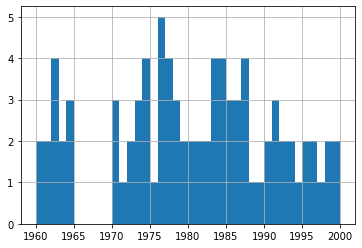

In [ ]:
# investigando como os anos estão distribuídos usando histograma
min_year = data_m['Year of Birth'].describe()['min']
max_year = data_m['Year of Birth'].describe()['max']

data_m['Year of Birth'].hist(bins=range(int(min_year), int(max_year)+2))

---
Para os próximos exercícios vamos usar outra base de dados conforme carregada abaixo. Para os próximos exercícios, o uso de `boxplot()` e `hist()` pode ser útil, 

In [ ]:
data2 = pd.read_csv("./dados/TACTD-01-Redundant-Outlier.csv") 

### Exercício 7)

Sabendo que o salário médio da base dos profissionais da área de saúde (Enfermeiros) é 50 mil, explore essa variável. De acordo com a análise do intervalo interquartil utilizada visualmente pelo gráfico de caixa, quantos valores podem ser considerados outliers?

(a) 6<br>
(b) 4<br>
<font color='red'>(c) 3<br></font>
(d) 2<br>


In [ ]:
data2.columns

Index(['Name', 'Sex', 'Year of Birth', 'Country of Birth', 'City',
       'Profession', 'Age', 'Salary'],
      dtype='object')

In [ ]:
data2.describe()

Year of Birth         Age        Salary
count     101.000000  101.000000    101.000000
mean     1976.534653   45.465347  51764.080198
std         9.309742    9.309742   5068.726214
min      1957.000000   13.000000  32000.500000
25%      1969.000000   38.000000  48111.300000
50%      1978.000000   44.000000  50940.000000
75%      1984.000000   53.000000  54925.600000
max      2009.000000   65.000000  69500.000000

<AxesSubplot:>

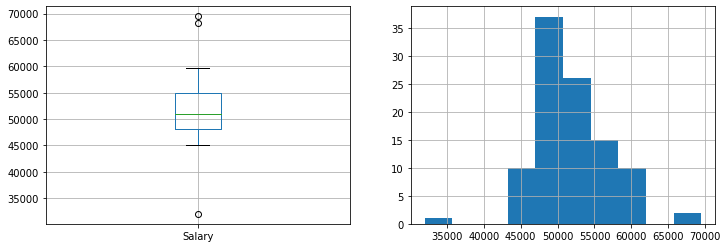

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(121); data2.boxplot('Salary')
plt.subplot(122); data2['Salary'].hist()

In [ ]:
print('Número de outliers: ', np.sum((data2['Salary']>61000) | (data2['Salary']<40000)))

Número de outliers:  3


### Exercício 8)

Analise os outliers obtidos na questão anterior, em particular os outliers que estão ACIMA (com valores maiores) do que a maior parte dos salários. Analise esses dados com relação aos atributos: Sex e City. Com base nessa análise, podemos dizer que esses outliers são

<font color='red'>(a) Globais ou pontuais<br></font>
(b) Contextuais com base no atributo Sex<br>
(c) Contextuais com base no atributo City<br>
(d) Coletivos com base no atributo Sex<br>

Dica: agrupe (`groupby`) estatísticas de salário com base nos atributos Sex e City.

*Resposta: com base na análise abaixo, vemos que a média de salários entre os sexos não difere de forma significativa, nem com relação à cidade. Assim, com base nos dados não há motivos para dizer que os outliers não sejam globais/pontuais.*

In [ ]:
data2[data2['Salary']>61000]

Name Sex  Year of Birth Country of Birth         City  \
19   Desiree Dardar   F           1985              USA     New York   
22  Douglas Damario   M           1965              USA  New Orleans   

   Profession  Age   Salary  
19      Nurse   37  69500.0  
22      Nurse   57  68200.0

In [ ]:
print(data2.groupby(['Sex'], dropna=False, as_index=False).mean()[['Sex','Salary']])

  Sex        Salary
0   F  51614.990566
1   M  51928.700000


In [ ]:
print(data2.groupby(['City'], dropna=False, as_index=False).mean()[['City','Salary']])

           City        Salary
0      Acapulco  52420.327273
1      Arequipa  54320.600000
2        Austin  49409.816667
3     Edinburgh  49687.500000
4          Lima  51372.000000
5        Lisbon  49273.975000
6   New Orleans  52144.938095
7      New York  58617.766667
8     São Paulo  53478.520000
9       Toronto  49170.571429
10    Vancouver  49902.687500
11         Wick  53038.750000


---
## Exercício 9) 

Analise os atributos categóricos 'Sex' e 'Country of Birth' da base de dados. Assuma que queremos fazer uma análise cuja variável alvo será um desses atributos. Nesse caso podemos dizer que:

<font color='red'>(a) Country of Birth é desbalanceado<br></font>
(b) Sex é desbalanceado<br>
(c) Country of Birth e Sex são desbalanceados<br>
(d) Nenhum dos atributos é desbalanceado<br>

In [ ]:
data2['Sex'].value_counts()

F    53
M    48
Name: Sex, dtype: int64

In [ ]:
data2['Country of Birth'].value_counts()

USA         30
Brazil      20
Scotland    16
Canada      15
Mexico       9
Peru         5
Portugal     4
Mexico       2
Name: Country of Birth, dtype: int64

---
## Exercício 10) 

Verifique se há redundância em termos de: (i) linhas duplicadas, e (ii) atributos constantes e redundantes. Qual o resultado dessa análise?

<font color='red'>(a) 4 linhas duplicadas; atributo constante: Profession; atributo redundante: Age<br></font>
(b) 4 linhas duplicadas; atributo constante: Age; atributo redundante: Sex<br>
(c) 3 linhas duplicadas; atributo constante: Profession; atributo redundante: City<br>
(d) 3 linhas duplicadas; atributo constante: Name; atributo redundante: Year of Birth<br>

In [ ]:
data2[data2.duplicated()]

Name Sex  Year of Birth Country of Birth         City  \
7    Apolonia Abler   F           1967           Canada    Vancouver   
8    Apolonia Abler   F           1967           Canada    Vancouver   
16     Carlos Cobre   M           1983           Brazil    São Paulo   
100   Savannah Ball   F           1974              USA  New Orleans   

    Profession  Age   Salary  
7        Nurse   55  47469.2  
8        Nurse   55  47469.2  
16       Nurse   39  51314.7  
100      Nurse   48  58911.8

In [ ]:
for var in data2:
    print(var)
    print('Valores únicos:', data2[var].unique(), '\n')

Name
Valores únicos: ['Albert Keller' 'Alexandre Ronaldo' 'Alton Thornton' 'Amelia Caldwell'
 'Andre Logan' 'Apolonia Abler' 'Archie Hogan' 'Ariel Almada'
 'Bennie Reeves' 'Bernard Summers' 'Billie Duncan' 'Brad Ferguson'
 'Carlos Cobre' 'Casey Barnes' 'David Pittman' 'Desiree Dardar'
 'Diego Colque' 'Donnie Adkins' 'Douglas Damario' 'Drew Wade'
 'Eleanore Espitia' 'Elias Elmo' 'Elisa Cain' 'Elmer Walters'
 'Eloi Fuentes' 'Erica Hudson' 'Esther Morgan' 'Eugenio Ewell'
 'Ezequiel Anthony' 'Finley Rocha' 'Gabriel Paiva' 'Hailee Ochoa'
 'Herta Hatley' 'Hubert Chapman' 'Ivo Izidro' 'Izaiah Duarte' 'Jada Judon'
 'Jameson Mendoza' 'Jane Fernandez' 'Janet Hunter' 'Jeannette Lowe'
 'Jim Foster' 'Joelle Jaffee' 'John Bradley' 'Karina Belarmino'
 'Kathey Kleiman' 'Kathy Kerrigan' 'Kayden Todd' 'Kraig Kriner'
 'Leanne Lowy' 'Lillian Labree' 'Lindsey Lever' 'Lora Lemoine'
 'Lorraine Richards' 'Magali Mattos' 'Maia Banks' 'Maique Santos'
 'Marcel Olsen' 'Marcos Magro' 'Margaret Keith' 'Mariann Mule

## <span style="color:darkred">Avaliação</span>

In [ ]:
# carregando a biblioteca necessária
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Considere a base de dados disponível em `TACTD-01-Base-Avaliacao2023.csv`. Essa base contém dados de profissionais da área da saúde incluindo: nome, sexo, ano de nascimento, religião, país e cidade de residência, país de origem, idade ao final de 2022, salário e ano do primeiro emprego.

### Questão 1)

Considere a base de dados disponível em `TACTD-01-Base-Avaliacao2023.csv`. Analise o atributo 'Sex' buscando por dados incorretos, considerando que são corretos apenas 'F' e 'M' (em letras maiúsculas). Corrija os que forem possível corrigir. Após o tratamento, analise as linhas com dados faltantes no atributo 'Sex', i.e. linhas que não sejam 'F' nem 'M', inspecionando em conjunto com as colunas: Year of Birth, Country of Residency, Religion e City. Com essa análise podemos dizer que os dados faltantes:
 
 (a) São do tipo completamente aleatório (MCAR)<br>
 <font color='green'>(b) São do tipo (condicionalmente) aleatório (MAR)<br></font>
 (c) São do tipo não aleatório<br>
 (d) Não há dados faltantes<br>
 (e) Metade são do tipo (condicionalmente) aleatório (MAR) e a outra metade completamente aleatório (MCAR)<br>
 

In [ ]:
df = pd.read_csv("./dados/TACTD-01-Base-Avaliacao2023.csv")
print(df.shape)
df.head()

(105, 11)


Name   Sex  Year of Birth Country of Residency   Religion  \
0  Vinicius Vitorio     M           1940               Brazil  Christian   
1      Ariel Almada     F           1950             Portugal  Christian   
2        Maia Banks  masc           1957                  USA  Christian   
3      Diego Colque     M           1958                 Peru  Christian   
4     Vivian Arnold     F           1960               Brazil  Christian   

        City Country of Origin          Profession  Current Age 2022   Salary  \
0  São Paulo         Australia  Physical therapist                82  53626.3   
1     Lisbon         Australia           Carpenter                72  47150.7   
2   New York         Australia    Dental hygienist                65  50703.7   
3   Arequipa         Australia       Event planner                64  56111.3   
4  São Paulo         Australia            Musician                62  48790.6   

   Year first employment  
0                 1986.0  
1                 1976.0  
2                 1990.0  
3                 1987.0  
4                 1995.0

In [ ]:
print(df['Sex'].describe())
print(df['Sex'].unique())


count     92
unique     5
top        F
freq      45
Name: Sex, dtype: object
['M' 'F' 'masc' 'f' 'm' nan]


In [ ]:
df[df['Sex'] == 'masc'] = 'M'
df[df['Sex'] == 'm'] = 'M'
df[df['Sex'] == 'f'] = 'F'
print(df['Sex'].describe())
print(df['Sex'].unique())

count     92
unique     2
top        F
freq      47
Name: Sex, dtype: object
['M' 'F' nan]


In [ ]:
#print(df[df['Sex'] == np.NaN])
df[df['Sex'].isna()]

Name  Sex Year of Birth  Country of Residency   Religion  \
92    Jameson Mendoza  NaN          1987                Mexico  Christian   
93       Mayra Mcnish  NaN          1987               England  Christian   
94   Willene Wolfgram  NaN          1987                   USA  Christian   
95      Izaiah Duarte  NaN          1987                Brazil  Christian   
96       Susie Hodges  NaN          1987                Brazil  Christian   
97      David Pittman  NaN          1987             Australia  Christian   
98         Jim Foster  NaN          1988                   USA  Christian   
99       Herta Hatley  NaN          1988                   USA  Christian   
100   Bernard Summers  NaN          1989                   USA  Christian   
101      Marcos Magro  NaN          1989                Brazil  Christian   
102   Marshall Vargas  NaN          1990              Scotland   Buddhist   
103   Ricardo Alvarez  NaN          1990  United Arab Emirates  Christian   
104     Zachary Yates  NaN          2010               England       Ac%#   

            City Country of Origin                    Profession  \
92      Acapulco         Australia           Construction worker   
93    Birmingham         Australia                        Server   
94   New Orleans         Australia                Police Officer   
95     São Paulo         Australia                         Nurse   
96     São Paulo         Australia                          Chef   
97      Brisbane         Australia                         Actor   
98   New Orleans         Australia                       Dentist   
99   New Orleans         Australia       Human resources manager   
100  New Orleans         Australia          Sales representative   
101    São Paulo         Australia                 Web developer   
102    Edinburgh         Australia  Emergency medical technician   
103        Dubai         Australia                         Actor   
104          _Dh         Australia                     Bartender   

    Current Age 2022   Salary Year first employment  
92                35  46206.1                   NaN  
93                35  46957.2                2018.0  
94                35  49000.0                2017.0  
95                35  49562.1                2016.0  
96                35  50418.9                   NaN  
97                35  52518.4                2020.0  
98                34  50469.8                   NaN  
99                34  54388.5                2011.0  
100               33  53984.6                2019.0  
101               33  56335.9                2016.0  
102               32  53696.1                   NaN  
103               32  63000.0                2013.0  
104               12  47817.8                2018.0

In [ ]:
print(df['Religion'].describe())
print(df['Religion'].unique())

count           101
unique           11
top       Christian
freq             77
Name: Religion, dtype: object
['Christian' 'M' nan 'Jew' 'd' 'Crstian' 'F' 'Buddhist' 'Jwe' '----' '['
 'Ac%#']


In [ ]:
pd.crosstab(df['Religion'], df['Sex'])

Sex         F   M
Religion         
----        0   1
Buddhist    1   3
Christian  34  32
Crstian     1   0
F           2   0
Jew         4   0
Jwe         1   0
M           0   7
[           0   1
d           1   0

In [ ]:
print(df['Year of Birth'].unique())
df[df['Year of Birth'] == 'F'] = np.NaN
df[df['Year of Birth'] == 'M'] = np.NaN

[1940 1950 'M' 1958 1960 1961 1962 1963 1965 1966 1967 1968 1969 1970 1971
 1972 1973 'F' 1974 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986
 1987 1988 1989 1990 2010]


[1940 1950 nan 1958 1960 1961 1962 1963 1965 1966 1967 1968 1969 1970 1971
 1972 1973 1974 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986
 1987 1988 1989 1990 2010]


<AxesSubplot: >

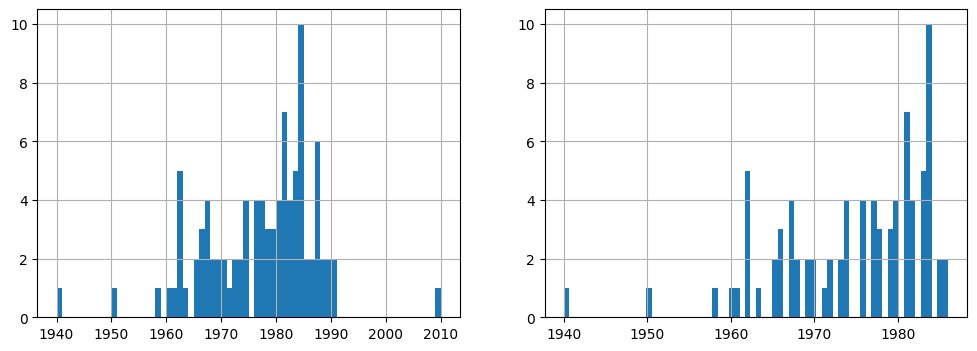

In [ ]:
print(df['Year of Birth'].unique())
sem_nan_sex = df[df['Sex'].notna()]
plt.figure(figsize=(12,4))
plt.subplot(121); df['Year of Birth'].hist(bins=70)
plt.subplot(122); sem_nan_sex['Year of Birth'].hist(bins=70)

---

### Questão 2)

Considere a base de dados disponível em `TACTD-01-Base-Avaliacao2023` (carregue a versão original), e analise os dados no atributo 'Religion' por dados incorretos. Corrija os que for possível, e a seguir marque como nulos/nans os incorretos que não foram passíveis de correção. Esse atributo possui os seguintes problemas:

 <font color='green'>(a) 8 dados faltantes ao final, sendo 6 inicialmente errôneos, 2 dados corrigidos<br></font>
 (b) 8 dados faltantes ao final, sendo 4 inicialmente errôneos, nenhum corrigido<br>
 (c) 8 dados faltantes ao final, sendo 4 inicialmente errôneos, 3 dados corrigidos<br>
 (d) 9 dados faltantes ao final, sendo 6 inicialmente errôneos, 2 dados corrigidos<br>
 (e) 9 dados faltantes ao final, sendo 4 inicialmente errôneos, nenhum corrigido

In [ ]:
df = pd.read_csv("./dados/TACTD-01-Base-Avaliacao2023.csv")
print(df.shape)
df.head()

(105, 11)


Name   Sex  Year of Birth Country of Residency   Religion  \
0  Vinicius Vitorio     M           1940               Brazil  Christian   
1      Ariel Almada     F           1950             Portugal  Christian   
2        Maia Banks  masc           1957                  USA  Christian   
3      Diego Colque     M           1958                 Peru  Christian   
4     Vivian Arnold     F           1960               Brazil  Christian   

        City Country of Origin          Profession  Current Age 2022   Salary  \
0  São Paulo         Australia  Physical therapist                82  53626.3   
1     Lisbon         Australia           Carpenter                72  47150.7   
2   New York         Australia    Dental hygienist                65  50703.7   
3   Arequipa         Australia       Event planner                64  56111.3   
4  São Paulo         Australia            Musician                62  48790.6   

   Year first employment  
0                 1986.0  
1                 1976.0  
2                 1990.0  
3                 1987.0  
4                 1995.0

In [ ]:
print(df['Religion'].describe())
print(df['Religion'].unique())
print(df['Religion'].value_counts())

count           101
unique            9
top       Christian
freq             85
Name: Religion, dtype: object
['Christian' nan 'Jew' 'd' 'Crstian' 'Buddhist' 'Jwe' '----' '[' 'Ac%#']
Christian    85
Buddhist      6
Jew           4
d             1
Crstian       1
Jwe           1
----          1
[             1
Ac%#          1
Name: Religion, dtype: int64


In [ ]:
df[df['Religion'] == 'Jwe'] = 'Jew'
df[df['Religion'] == 'Crstian'] = 'Christian'
print(df['Religion'].describe())
print(df['Religion'].unique())
print(df['Religion'].value_counts())
df[df['Religion'] == 'd'] = np.nan
df[df['Religion'] == '----'] = np.nan
df[df['Religion'] == '['] = np.nan
df[df['Religion'] == 'Ac%#'] = np.nan
print(df['Religion'].describe())
print(df['Religion'].unique())
print(df['Religion'].value_counts())

count           101
unique            7
top       Christian
freq             86
Name: Religion, dtype: object
['Christian' nan 'Jew' 'd' 'Buddhist' '----' '[' 'Ac%#']
Christian    86
Buddhist      6
Jew           5
d             1
----          1
[             1
Ac%#          1
Name: Religion, dtype: int64
count            97
unique            3
top       Christian
freq             86
Name: Religion, dtype: object
['Christian' nan 'Jew' 'Buddhist']
Christian    86
Buddhist      6
Jew           5
Name: Religion, dtype: int64


---
### Questão 3)

Quais dos items abaixo são características de dados estruturados?

I - Endereçamento direto de dados individuais<br>
II - Grande Flexibilidade na coleta/captura dos dados<br>
III - Baixa redundância<br>
IV - Maior riqueza e variedade de informação devido ao baixo controle<br>
V - Adequados para armazenamento e recuperação a partir de bases de dados relacionais<br>

(a) I, II, IV<br>
<font color='green'>(b) I, III, V<br></font>
(c) I, III, IV, V<br>
(d) II, III, V<br>
(e) todos os items<br>


---

### Questão 4)

Considere a base de dados disponível em `TACTD-01-Base-Avaliacao2023.csv`, e analise os dados no atributo Salary por meio do gráfico de caixa e depois visualizando as linhas contendo outliers mostrados no gráfico de caixa. 

O atributo possui:

(a) 2 outliers globais<br>
<font color='green'>(b) 3 outliers globais<br></font>
(c) 4 outliers globais<br>
(d) 5 outliers globais<br>
(e) 6 outliers globais<br>


In [ ]:
df = pd.read_csv("./dados/TACTD-01-Base-Avaliacao2023.csv")
print(df.head())
df.shape

               Name   Sex  Year of Birth Country of Residency   Religion  \
0  Vinicius Vitorio     M           1940               Brazil  Christian   
1      Ariel Almada     F           1950             Portugal  Christian   
2        Maia Banks  masc           1957                  USA  Christian   
3      Diego Colque     M           1958                 Peru  Christian   
4     Vivian Arnold     F           1960               Brazil  Christian   

        City Country of Origin          Profession  Current Age 2022   Salary  \
0  São Paulo         Australia  Physical therapist                82  53626.3   
1     Lisbon         Australia           Carpenter                72  47150.7   
2   New York         Australia    Dental hygienist                65  50703.7   
3   Arequipa         Australia       Event planner                64  56111.3   
4  São Paulo         Australia            Musician                62  48790.6   

   Year first employment  
0                 1986.0  
1 

(105, 11)

In [ ]:
print(df['Salary'].describe())
print(df['Salary'].unique())
print(df['Salary'].value_counts())

count      105.000000
mean     51572.466667
std       6513.325850
min      32000.500000
25%      47699.400000
50%      50703.700000
75%      55002.700000
max      79000.000000
Name: Salary, dtype: float64
[53626.3 47150.7 50703.7 56111.3 48790.6 47425.1 48766.7 54925.6 55239.5
 58982.7 59629.4 46632.7 45600.  46308.4 47363.4 45038.6 55715.3 59637.5
 41200.  47469.2 48000.  48906.7 53188.2 52494.9 52532.1 54021.7 45496.4
 48244.9 53965.6 47699.4 50003.6 50837.7 48111.3 48131.1 55661.5 55911.4
 56975.2 58558.  58911.8 45478.6 54392.2 58376.4 59632.9 65000.  39000.
 50602.8 51516.3 51110.6 53144.2 54785.  50534.9 58905.7 79000.  32000.5
 45656.6 56254.8 59203.1 46569.3 47447.6 47973.3 48587.6 52950.  55004.4
 56590.7 41000.  47350.  55002.7 47422.9 50473.7 51314.7 51412.8 45696.1
 47240.7 48708.4 49341.5 49680.3 50940.  52511.1 58063.4 59091.8 78000.
 47711.  48778.1 51019.8 53566.  55917.4 48451.2 49492.3 46206.1 46957.2
 49000.  49562.1 50418.9 52518.4 50469.8 54388.5 53984.6 56335.9 53

C:\Users\maaveiro\AppData\Local\Temp\ipykernel_22000\373790373.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121); plt.boxplot(df['Salary'])


3


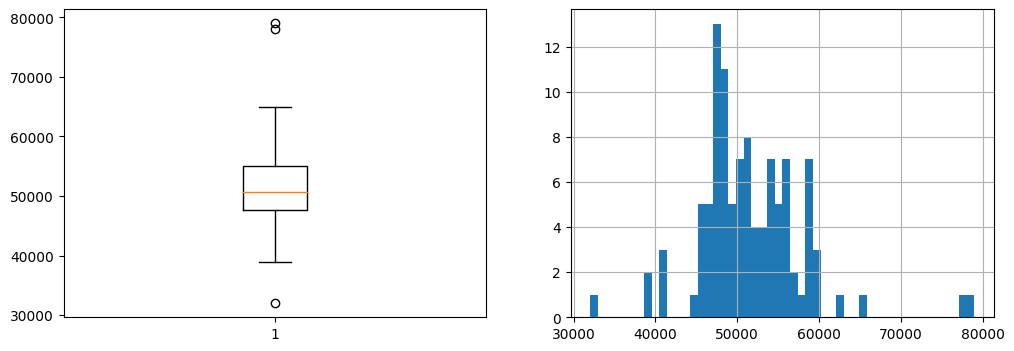

In [ ]:
plt.figure(figsize=(12,4))
box_plot = plt.boxplot(df['Salary'])
plt.subplot(121); plt.boxplot(df['Salary'])
plt.subplot(122); df['Salary'].hist(bins=50)
print(np.sum(df['Salary'] > box_plot['whiskers'][1].get_ydata()[1]) + np.sum(df['Salary'] < box_plot['whiskers'][0].get_ydata()[1]))

## Questão 5)

Considere a base de dados disponível em `TACTD-01-Base-Avaliacao2023.csv`, e busque por linhas duplicadas considerando as colunas `Name`, `Sex`, `City` e `Year of Birth`. A seguir, busque por atributos não informativos (redundantes/constantes) em todas as colunas. Quantas linhas duplicadas foram encontradas, e qual(is) atributo(s) pode(m) ser considerado(s) não informativo(s)?

(a) 1 linha duplicada; atributos não informativos: Profession<br>
(b) 1 linha duplicada; atributos não informativos: Profession e Country of Origin<br>
(c) 4 linhas duplicadas; atributos não informativos: Current Age 2022<br>
(d) 5 linhas duplicadas; atributos não informativos: Country of Origin<br>
<font color='green'>(e) 5 linhas duplicadas; atributos não informativos: Current Age 2022 e Country of Origin<br></font>

In [ ]:
df = pd.read_csv("./dados/TACTD-01-Base-Avaliacao2023.csv")
print(df.shape)
df.head()

(105, 11)


Name   Sex  Year of Birth Country of Residency   Religion  \
0  Vinicius Vitorio     M           1940               Brazil  Christian   
1      Ariel Almada     F           1950             Portugal  Christian   
2        Maia Banks  masc           1957                  USA  Christian   
3      Diego Colque     M           1958                 Peru  Christian   
4     Vivian Arnold     F           1960               Brazil  Christian   

        City Country of Origin          Profession  Current Age 2022   Salary  \
0  São Paulo         Australia  Physical therapist                82  53626.3   
1     Lisbon         Australia           Carpenter                72  47150.7   
2   New York         Australia    Dental hygienist                65  50703.7   
3   Arequipa         Australia       Event planner                64  56111.3   
4  São Paulo         Australia            Musician                62  48790.6   

   Year first employment  
0                 1986.0  
1                 1976.0  
2                 1990.0  
3                 1987.0  
4                 1995.0

In [ ]:
#df['Name', 'Sex', 'City','Year of Birth']
print('Duplicados: ', df.duplicated(['Name', 'Sex', 'City','Year of Birth']).sum())
print(df['Country of Origin'].describe())
print((2022 - df['Current Age 2022'] != df['Year of Birth']).sum())

Duplicados:  5
count           105
unique            1
top       Australia
freq            105
Name: Country of Origin, dtype: object
0


## <span style="color:darkred">Redundância: dados não informativos ou irrelevantes</span>

## Redundância em dados

**Redundância em dados não-estruturados**

Muito comum pois dados binários e textuais possuem elementos que não auxiliam na análise. Exemplos incluem:

- o fundo de imagens e documentos

- timbre em documentos e cartas

- tipos de palavras em textos: artigos, conjunções, etc.


**Redundância em dados estruturados**

Diretamente relacionada a:
1. linhas/instâncias com valores repetidos (duplicados) 
2. colunas/atributos com valores constantes (iguais para todas as instâncias)
3. colunas/atributos com alta correlação

Nesse notebook trataremos apenas de *dados estruturados*

## Dados duplicados ou constantes

Bases de dados que contém informações repetidas ou atributos irrelevantes para obter as respostas que se espera da análise.

A redundância pode atrapalhar no projeto de modelos de aprendizado e estatísticos pois a quantidade de exemplos pode influenciar no viés do modelo.

**Redundância em bases de dados estruturadas**:

* Registros duplicados

* Atributos com valores iguais em todas as observações


Vamos carregar uma base de dados para mostrar exemplos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("./dados/people_prof_relig.csv")
data.dtypes

Name                object
Sex                 object
Year of Birth        int64
Country of Birth    object
Religion            object
City                object
Profession          object
Age                  int64
Experience           int64
Salary               int64
XP_great_10         object
XP_lesseq_10        object
dtype: object

In [ ]:
data.head()

Name Sex  Year of Birth Country of Birth   Religion  \
0    Desiree Dardar   F           1995              USA  Christian   
1      Lora Lemoine   F           1989          England  Christian   
2  Willene Wolfgram   F           1997              USA  Christian   
3      Herta Hatley   F           1988              USA  Christian   
4         Oleta Ouk   F           1991            Spain  Christian   

          City Profession  Age  Experience  Salary XP_great_10 XP_lesseq_10  
0  New Orleans      Nurse   26           1    2580           N            Y  
1   Birmingham      Nurse   32           1    2308           N            Y  
2  New Orleans      Nurse   24           1    5196           N            Y  
3  New Orleans      Nurse   33           1    4337           N            Y  
4     Valencia      Nurse   30           1    4197           N            Y

In [ ]:
data.shape

(100, 12)

**Linhas/registros duplicados**

O tipo mais comum de dados redundantes são as linhas ou registros duplicados, ou seja, aquelas que possuem todos os valores de atributos iguais.

In [ ]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [ ]:
data[data.duplicated()]

Name Sex  Year of Birth Country of Birth   Religion       City  \
46    Carlos Cobre   M           1983           Brazil  Christian  São Paulo   
50    Ricardo Rima   M           1977             Peru  Christian   Arequipa   
93  Apolonia Abler   F           1967           Canada  Christian  Vancouver   
94  Apolonia Abler   F           1967           Canada  Christian  Vancouver   

   Profession  Age  Experience  Salary XP_great_10 XP_lesseq_10  
46      Nurse   38          15    6300           Y            N  
50      Nurse   44          16    6677           Y            N  
93      Nurse   54          35    7141           Y            N  
94      Nurse   54          35    7141           Y            N

A consulta acima mostra apenas as linhas "extra", ou seja, as duplicadas encontradas após a ocorrência da primeira linha original.

Assim, ao consultar por um dos nomes que temos acima duplicados, veremos que há duas linhas para ele, sendo a duplicada considerada a linha 51.

In [ ]:
data[data['Name']=='Carlos Cobre']

Name Sex  Year of Birth Country of Birth   Religion       City  \
45  Carlos Cobre   M           1983           Brazil  Christian  São Paulo   
46  Carlos Cobre   M           1983           Brazil  Christian  São Paulo   

   Profession  Age  Experience  Salary XP_great_10 XP_lesseq_10  
45      Nurse   38          15    6300           Y            N  
46      Nurse   38          15    6300           Y            N

Podemos usar a opção `keep` para manter todas as duplicatas, mostrando seus valores

In [ ]:
data[data.duplicated(keep=False)]

Name Sex  Year of Birth Country of Birth   Religion       City  \
45    Carlos Cobre   M           1983           Brazil  Christian  São Paulo   
46    Carlos Cobre   M           1983           Brazil  Christian  São Paulo   
48    Ricardo Rima   M           1977             Peru  Christian   Arequipa   
50    Ricardo Rima   M           1977             Peru  Christian   Arequipa   
92  Apolonia Abler   F           1967           Canada  Christian  Vancouver   
93  Apolonia Abler   F           1967           Canada  Christian  Vancouver   
94  Apolonia Abler   F           1967           Canada  Christian  Vancouver   

   Profession  Age  Experience  Salary XP_great_10 XP_lesseq_10  
45      Nurse   38          15    6300           Y            N  
46      Nurse   38          15    6300           Y            N  
48      Nurse   44          16    6677           Y            N  
50      Nurse   44          16    6677           Y            N  
92      Nurse   54          35    7141           Y            N  
93      Nurse   54          35    7141           Y            N  
94      Nurse   54          35    7141           Y            N

Felizmente, temos uma funcão pronta para remover duplicatas de dataframes, `drop_duplicates()`, na qual podemos manter a primeira ocorrência da linha duplicada: `first`, a última: `last`, ou remover todas as que aparecem duplicadas: `False`.

In [ ]:
d_ndup = data.drop_duplicates(keep='first')
d_ndup[d_ndup['Name']=='Carlos Cobre']

Name Sex  Year of Birth Country of Birth   Religion       City  \
45  Carlos Cobre   M           1983           Brazil  Christian  São Paulo   

   Profession  Age  Experience  Salary XP_great_10 XP_lesseq_10  
45      Nurse   38          15    6300           Y            N

In [ ]:
d_ndup[d_ndup.duplicated(keep=False)]

Empty DataFrame
Columns: [Name, Sex, Year of Birth, Country of Birth, Religion, City, Profession, Age, Experience, Salary, XP_great_10, XP_lesseq_10]
Index: []

---

**Duplicidade em atributos**

A duplicidade pode gerar problemas quando aparece isolada em determinado atributo. 

Nessa base de dados um atributo que pode ser sensível a isso é o nome

In [ ]:
d_ndup.duplicated(['Name'])

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 96, dtype: bool

In [ ]:
d_ndup[d_ndup.duplicated(['Name'], keep=False)]

Name Sex  Year of Birth Country of Birth   Religion       City  \
73  Apolonia Abler   F           1967        Australia  Christian   Brisbane   
92  Apolonia Abler   F           1967           Canada  Christian  Vancouver   

   Profession  Age  Experience  Salary XP_great_10 XP_lesseq_10  
73      Nurse   54          23    5496           Y            N  
92      Nurse   54          35    7141           Y            N

Notamos que, apesar de ter o mesmo nome, sexo e ano de nascimento, as duas pessoas nasceram em países diferentes e portanto seria preciso consultar algum especialista do domínio para tomar decisões como a de excluir ou desconsiderar uma dessas linhas

---
**Atributos constantes**

Investigando os atributos Profession e Religion, mostrando suas frequencias, notamos que todas as linhas tem o mesmo valor para esses atributos.

Apesar do valor informativo, ao construir modelos computacionais, por exemplo classificadores, esses atributos representam um aumento na dimensionalidade sem contribuir para a tarefa principal, classificação.

Podemos usar o método `nunique()` para obter a contagem de valores distintos

In [ ]:
print(d_ndup['Profession'].value_counts())
print(d_ndup['Religion'].value_counts())

Nurse    96
Name: Profession, dtype: int64
Christian    96
Name: Religion, dtype: int64


In [ ]:
# busca os nomes das colunas cujo número de valores únicos é <= 1
att_const = np.array(d_ndup.columns[d_ndup.nunique() <= 1])
print(att_const)

['Religion' 'Profession']


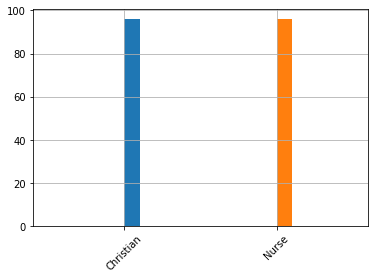

In [ ]:
for att in att_const:
    d_ndup[att].hist(xrot=45)

In [ ]:
d_ndup[att_const]

Religion Profession
0   Christian      Nurse
1   Christian      Nurse
2   Christian      Nurse
3   Christian      Nurse
4   Christian      Nurse
..        ...        ...
95  Christian      Nurse
96  Christian      Nurse
97  Christian      Nurse
98  Christian      Nurse
99  Christian      Nurse

[96 rows x 2 columns]

In [ ]:
data_nred = d_ndup.drop(att_const, axis=1)

In [ ]:
data_nred.sample(5)

Name Sex  Year of Birth Country of Birth         City  Age  \
64  Kathey Kleiman   F           1973              USA  New Orleans   48   
32    Marcel Olsen   M           1984           Canada    Vancouver   37   
73  Apolonia Abler   F           1967        Australia     Brisbane   54   
10     Marla Olson   F           1994             Peru     Arequipa   27   
1     Lora Lemoine   F           1989          England   Birmingham   32   

    Experience  Salary XP_great_10 XP_lesseq_10  
64          20    6905           Y            N  
32           8    6490           N            Y  
73          23    5496           Y            N  
10           1    3766           N            Y  
1            1    2308           N            Y

## Atributos simétricos e correlacionados

Alguns atributos podem estar altamente correlacionados com outros. Esses atributos oferecem pouca contribuição no sentido de melhorar o que sabemos sobre o conjunto de dados. 

#### Simétricos

Atributos cujo valor pode ser obtido pela inversão de outro.

#### Correlacionados

Atributos cujo valor pode ser explicado (ainda que parcialmente) pelo valor de outra variável


---
#### Atributos irrelevantes e aprendizado de máquina:

> Ao treinar modelos com atributos irrelevantes, correlacionados ou simétricos podemos incorrer em maior custo computacional ou problemas de convergência.


Os atributos XP_great_10 e XP_lesseq_10 são simétricos!

In [ ]:
data_nred.head(7)

Name Sex  Year of Birth Country of Birth         City  Age  \
0    Desiree Dardar   F           1995              USA  New Orleans   26   
1      Lora Lemoine   F           1989          England   Birmingham   32   
2  Willene Wolfgram   F           1997              USA  New Orleans   24   
3      Herta Hatley   F           1988              USA  New Orleans   33   
4         Oleta Ouk   F           1991            Spain     Valencia   30   
5     Esther Morgan   F           1991        Australia     Brisbane   30   
6     Gabriel Paiva   M           1991         Portugal       Lisbon   30   

   Experience  Salary XP_great_10 XP_lesseq_10  
0           1    2580           N            Y  
1           1    2308           N            Y  
2           1    5196           N            Y  
3           1    4337           N            Y  
4           1    4197           N            Y  
5           1    1543           N            Y  
6           1    2303           N            Y

Removendo um deles:

In [ ]:
data_nsim = data_nred.drop(['XP_lesseq_10'], axis=1)

In [ ]:
data_nsim.sample(2)

Name Sex  Year of Birth Country of Birth         City  Age  \
74    Kathy Kerrigan   F           1973              USA  New Orleans   48   
98  Vinicius Vitorio   M           1959           Brazil    São Paulo   62   

    Experience  Salary XP_great_10  
74          24    4445           Y  
98          39    6830           Y


### Coeficiente de correlação
Uma ferramenta interessante para entender *dependências lineares* entre atributos é a **correlação** medida, por exemplo pelo método de Pearson.

No entanto, a correlação só é computada com valores numéricos.

> Por exemplo se houver atributos **categóricos** ***simétricos*** ou ***correlacionados***, a correlação não será suficiente para encontrar, sendo necessário recodificá-los caso haja suspeitas de que os atributos sejam redundantes


In [ ]:
mat_corr = data_nsim.corr(method = 'pearson')
mat_corr

Year of Birth       Age  Experience    Salary
Year of Birth       1.000000 -1.000000   -0.908208 -0.362197
Age                -1.000000  1.000000    0.908208  0.362197
Experience         -0.908208  0.908208    1.000000  0.432904
Salary             -0.362197  0.362197    0.432904  1.000000

Características da matriz de correlação:
- valores negativos indicam correlação inversa
- tem diagonal igual a 1 (auto-correlação)
- é simétrica

Vamos considerar como alta correlação atributos com valores iguais ou superiores a 0.95

Para facilitar:
- pegamos o valor absoluto da correlação, 
- consideramos apenas a matriz triangular superior - devido a simetria, e
- não incluimos a diagonal principal (para a qual todos os valores são 1)

In [ ]:
mat_corr = np.abs(mat_corr)
mat_corr

Year of Birth       Age  Experience    Salary
Year of Birth       1.000000  1.000000    0.908208  0.362197
Age                 1.000000  1.000000    0.908208  0.362197
Experience          0.908208  0.908208    1.000000  0.432904
Salary              0.362197  0.362197    0.432904  1.000000

In [ ]:
# o parametro k indica para nao incluir a diagonal principal
mask_tri = np.triu(np.ones(mat_corr.shape),k=1).astype(bool)
print(mask_tri)

[[False  True  True  True]
 [False False  True  True]
 [False False False  True]
 [False False False False]]


In [ ]:
tri_sup = mat_corr.where(mask_tri)
print(tri_sup)

               Year of Birth  Age  Experience    Salary
Year of Birth            NaN  1.0    0.908208  0.362197
Age                      NaN  NaN    0.908208  0.362197
Experience               NaN  NaN         NaN  0.432904
Salary                   NaN  NaN         NaN       NaN


Para cada coluna das colunas da matriz triangular nas quais qualquer valor seja maior ou igual a 0.95

In [ ]:
atrib_altacor = [col for col in tri_sup.columns if any(tri_sup[col] >= 0.95)]

In [ ]:
atrib_altacor

['Age']

In [ ]:
data_nsim

In [ ]:
data_clean = data_nsim.drop(data_nsim[atrib_altacor], axis=1)

In [ ]:
data_clean.sample(10)

Name Sex  Year of Birth Country of Birth         City  \
83    Savannah Ball   F           1974              USA  New Orleans   
7     Pablo Alvarez   M           1991           Mexico     Acapulco   
25  Shelley Mendoza   F           1978         Scotland    Edinburgh   
68       Elias Elmo   M           1970         Portugal       Lisbon   
0    Desiree Dardar   F           1995              USA  New Orleans   
86     Terri Wilson   F           1962           Canada    Vancouver   
89    Vivian Arnold   F           1960           Brazil    São Paulo   
33    Billie Duncan   F           1976         Scotland    Edinburgh   
70  Douglas Damario   M           1965              USA  New Orleans   
95     Ariel Almada   F           1965         Portugal       Lisbon   

    Experience  Salary XP_great_10  
83          26    7952           Y  
7            1    2086           N  
25           7    5564           N  
68          21    6709           Y  
0            1    2580           N  
86          28    4811           Y  
89          33    5525           Y  
33           9    2391           N  
70          22    3283           Y  
95          36    9722           Y

#### Remover atributos redundantes e tamanho de datasets

A limpeza de dados redundantes permite reduzir a base de dados sem perder informação:
* reduzindo seu tamanho total
* minimizando problemas com modelagem, como a "maldição da dimensionalidade"

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              100 non-null    object
 1   Sex               100 non-null    object
 2   Year of Birth     100 non-null    int64 
 3   Country of Birth  100 non-null    object
 4   Religion          100 non-null    object
 5   City              100 non-null    object
 6   Profession        100 non-null    object
 7   Age               100 non-null    int64 
 8   Experience        100 non-null    int64 
 9   Salary            100 non-null    int64 
 10  XP_great_10       100 non-null    object
 11  XP_lesseq_10      100 non-null    object
dtypes: int64(4), object(8)
memory usage: 9.5+ KB


In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              96 non-null     object
 1   Sex               96 non-null     object
 2   Year of Birth     96 non-null     int64 
 3   Country of Birth  96 non-null     object
 4   City              96 non-null     object
 5   Experience        96 non-null     int64 
 6   Salary            96 non-null     int64 
 7   XP_great_10       96 non-null     object
dtypes: int64(3), object(5)
memory usage: 6.8+ KB


## <span style="color:darkred">Detecção e remoção de outliers</span>

__Referência complementar:__
- CHANDOLA, Varun; BANERJEE, Arindam; KUMAR, Vipin. Outlier detection: a survey. ACM Computing Surveys, v. 14, p. 15, 2007.

***

## Detectando outliers

**Relembrando - outliers, pontos "fora-da-curva" ou pontos aberrantes** : exemplos ou instâncias que, dentre do espaço de possíveis valores, recaem num intervalo *fora* daquele relativo a maior parte dos exemplos de uma base de dados.

Detectar outliers por meio de análise exploratória é útil para entender o comportamento da base de dados.

Existem também métodos **estatísticos** e de **aprendizado de máquina** que auxiliam nesse processo e que podem facilitar essa análise, detectando *outliers* de forma automática.

1. Dispersão: desvio padrão e intervalo interquartil
2. Distribuição: Normal univaridada
3. Agrupamento

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent
data = pd.read_csv("./dados/houses_to_rent_mba2.csv")
data.head()

city   area  rooms  bathroom  parking spaces floor   hoa  rent  \
0     São Paulo   70.0    2.0         1             1.0     7  2065  3300   
1     São Paulo  320.0    4.0         4             2.0    20  1200  4960   
2  Porto Alegre   80.0    1.0         1             1.0     6  1000  2800   
3  Porto Alegre   51.0    1.0         1             NaN     2   270  1112   
4     São Paulo   25.0    1.0         1             NaN     1     0   800   

    tax  insurance   total  page hits  days available  interactions  \
0   211         42  5618.0        324              23           108   
1  1750         63  7973.0        720              78           240   
2    nr         41  3841.0         64             269           128   
3    22         17  1421.0         46              73            92   
4    25         11   836.0       1548              78           516   

   weeks available  type  
0                3  flat  
1               11  flat  
2               38  flat  
3               10  flat  
4               11  flat

In [ ]:
data.dtypes

city                object
area               float64
rooms              float64
bathroom             int64
parking spaces     float64
floor               object
hoa                  int64
rent                 int64
tax                 object
insurance            int64
total              float64
page hits            int64
days available       int64
interactions         int64
weeks available      int64
type                object
dtype: object

Vamos visualizar dois atributos para estudar a distribuição dos dados

<AxesSubplot:>

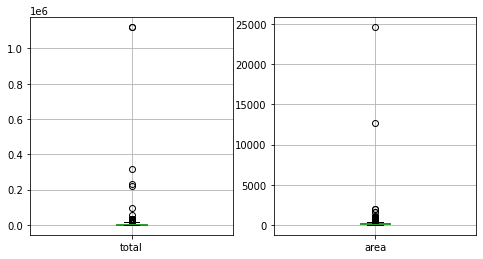

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(121); data.boxplot(['total'])
plt.subplot(122); data.boxplot(['area'])

x_{i}De### 1. Desvio padrão e amplitude inter-quartil (por dispersão)

Para cada atributo, podemos estudar como os valores estão relacionados com a dispersão dos dados.

Entre as medidas de dispersão temos:
* desvio padrão amostral (*standard deviation*)
* amplitude - ou intervalo - interquartil (IQR, *interquartile range*)
    Sejam:
    - $Q_{1}$ o valor relativo aos primeiros 25% dados,
    - $Q_{2}$ o valor relativo aos primeiros 50% dados (mediana),
    - $Q_{3}$ o valor relativo aos primeiros 75% dos dados,
    
    $$IQR = Q_{3} - Q_{1}$$

Considerando que os dados são bem ajustados por uma distribuição normal (ou Gaussiana), podemos comparar o uso dessas medidas de dispersão como critério para detectar outliers.

<img src="./imagens/IQR.png" width=380>

In [ ]:
# esses valores estão disponíveis via describe()
data.describe()

area         rooms      bathroom  parking spaces           hoa  \
count  11687.000000  11686.000000  11765.000000     8800.000000  1.176500e+04   
mean     145.652691      2.496406      2.280408        2.181705  1.162632e+03   
std      288.676311      1.165594      1.445071        1.519448  1.486720e+04   
min        1.000000      1.000000      1.000000        1.000000  0.000000e+00   
25%       56.000000      2.000000      1.000000        1.000000  1.600000e+02   
50%       91.000000      2.000000      2.000000        2.000000  5.610000e+02   
75%      190.000000      3.000000      3.000000        3.000000  1.300000e+03   
max    24606.000000     10.000000     25.000000       12.000000  1.117000e+06   

               rent     insurance         total     page hits  days available  \
count  11765.000000  11765.000000  1.176500e+04  11765.000000    11765.000000   
mean    4033.429154     56.525032  5.622370e+03    593.139992       73.644454   
std     3564.190560     97.487374  1.579576e+04    559.727661       35.725794   
min      200.000000      3.000000  2.635000e+02      0.000000        0.000000   
25%     1600.000000     22.000000  2.176000e+03    144.000000       51.000000   
50%     2790.000000     37.000000  3.762000e+03    432.000000       72.000000   
75%     5100.000000     70.000000  6.990000e+03    900.000000       93.000000   
max    45000.000000   6000.000000  1.119892e+06   6444.000000      358.000000   

       interactions  weeks available  
count  11765.000000     11765.000000  
mean     228.023969        10.307012  
std      174.183959         5.101312  
min        0.000000         0.000000  
25%      100.000000         7.000000  
50%      180.000000        10.000000  
75%      312.000000        13.000000  
max     2148.000000        51.000000

Pelo método do desvio padrão e IQR temos:

#### variável total

In [ ]:
# selecionando segundo o total
Q1 = data['total'].quantile(0.25)
Q3 = data['total'].quantile(0.75)
IQR = Q3 - Q1

desvp = data['total'].std()
media = data['total'].mean()
mediana = data['total'].median()

print("mediana = %.2f, IQR = %.2f" % (mediana, IQR))
print("media   = %.2f, desvio padrao = %.2f" % (media, desvp))

mediana = 3762.00, IQR = 4814.00
media   = 5622.37, desvio padrao = 15795.76


Detectando outliers segundo o **desvio padrão**

In [ ]:
# apenas outliers segundo std
dataout_std = data[  (data['total'] < media-(desvp*2)) 
                   | (data['total'] > media+(desvp*2))]

# apenas inliers segundo std
dc_std = data[(data['total'] >= media-(desvp*2)) 
            & (data['total'] <= media+(desvp*2))]

<AxesSubplot:>

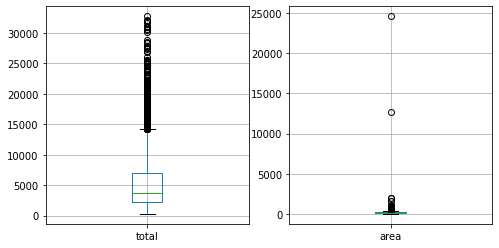

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(121); dc_std.boxplot(['total'])
plt.subplot(122); dc_std.boxplot(['area'])

In [ ]:
# apenas outliers segundo IQR
dataout_iqr = data[   (data['total'] < Q1-(IQR*1.5)) 
                    | (data['total'] > Q3+(IQR*1.5))]

# apenas inliers segundo IQR
dc_iqr = data[(data['total'] >= Q1-(IQR*1.5)) 
            & (data['total'] <= Q3+(IQR*1.5))]

In [ ]:
print('\tDesvio Padrao\tIQR')
print(pd.concat([dc_std['total'].describe(), dc_iqr['total'].describe()],axis=1))

	Desvio Padrao	IQR
              total         total
count  11758.000000  11068.000000
mean    5356.795348   4557.751599
std     4566.356503   3233.790034
min      263.500000    263.500000
25%     2173.250000   2092.000000
50%     3760.000000   3544.500000
75%     6990.000000   6230.000000
max    32751.000000  14199.000000


<AxesSubplot:>

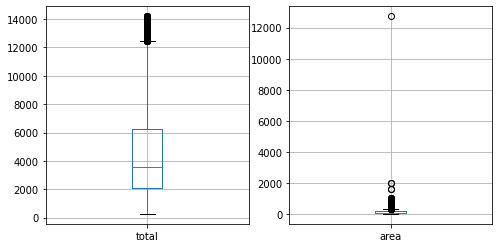

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(121); dc_iqr.boxplot(['total'])
plt.subplot(122); dc_iqr.boxplot(['area'])

### Escrevendo uma função para remoção de outliers segundo o IQR

In [ ]:
def remove_outliers_IQR(df, attributes, factor=1.5):
    """Funcao para remover outliers com base no IQR
    Parametros:
        - df : dataframe
        - attributes: atributos a considerar na remoção
        - factor: fator do IQR a considerar
    Retorno:
        dataframe com os outliers removidos
    """
    dfn = df.copy()
    
    for var in attributes:
        # verifica se variável é numerica
        if np.issubdtype(df[var].dtype, np.number):
            Q1 = dfn[var].quantile(0.25)
            #Q2 = dfn[var].quantile(0.50)
            Q3 = dfn[var].quantile(0.75)
            IQR = Q3 - Q1
            
            # apenas inliers segundo IQR
            dfn = dfn.loc[(df[var] >= Q1-(IQR*factor)) & (df[var] <= Q3+(IQR*factor)),:]

    return dfn

In [ ]:
dc = remove_outliers_IQR(data, data.columns, factor=3.0)

**Nota:** <font color="blue">Reparamos que, além de "city", também "floor", "tax" e "type" não são considerados numéricos. Há algo a ser investigado se esses atributos forem ser utilizados!</font>

Text(0.5, 1.0, 'Apos remocao de outliers')

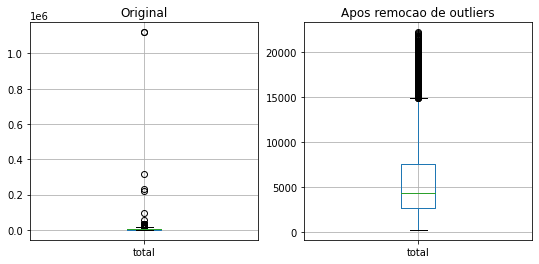

In [ ]:
plt.figure(figsize=(9,4))
plt.subplot(121); data.boxplot(['total'])
plt.title('Original')

plt.subplot(122); dc.boxplot(['total']); 
plt.title('Apos remocao de outliers')

Text(0.5, 1.0, 'Apos remocao de outliers')

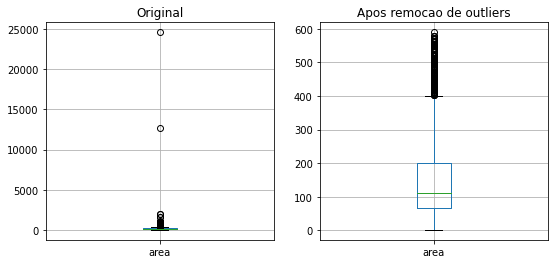

In [ ]:
plt.figure(figsize=(9,4))
plt.subplot(121); data.boxplot(['area'])
plt.title('Original')

plt.subplot(122); dc.boxplot(['area']); 
plt.title('Apos remocao de outliers')

In [ ]:
print("Dados originais: ", data.shape[0])
print("Após remoção de outliers: ", dc.shape[0])

Dados originais:  11765
Após remoção de outliers:  8242


### 2. Distribuição dos dados (distribuição Normal)

Podemos assumir que os dados possuem uma distribuição de probabilidade conhecida.

Assim temos um algoritmo que:
1. Estima os parâmetros da distribuição
2. Para cada ponto, computa a probabilidade $p$ de pertencer à distribuição
    1. se $p < \varepsilon$, considerar o ponto como outlier
    2. senão, o ponto é inlier
    
$\varepsilon$ é um limiar (threshold) pré-definido, exemplo: 0.01 (1%)

Vamos utilizar a distribuição Normal ou Gaussiana, mas outras podem ser também utilizadas.

#### Normal univariada

A distribuição Normal (ou Gaussiana) univariada (para uma única variável) é parametrizada por: média (centralidade) e variância (dispersão).
* isso significa que os dados podem ser completamente descritos por esses dois valores.

Escrevemos que um conjunto de dados é bem modelado por uma Gaussiana:
    $$X \sim \mathcal{N}(\mu, \sigma^2)$$
 
A equação que define a distribuição Gaussiana é dada por uma exponencial negativa conforme se afasta de um ponto médio $\mu$:

$$e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

In [ ]:
mu = 5 # média = 5
s2 = 1 # variancia = 1
x = np.arange(0, 10.00, 0.1)
print(x.shape)
print(x[:15])

(100,)
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4]


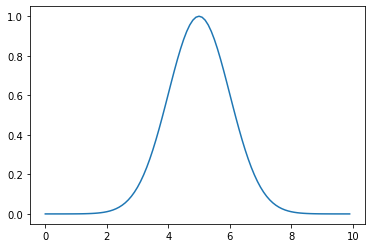

In [ ]:
termo_gauss = np.exp(-((x-mu)**2/(2*s2)))
plt.plot(x,termo_gauss)


A probabilidade de um determinado ponto $x$ pertencer à $X$ é dada por:

$$p(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi} \sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

Esse termo que multiplica a exponencial é para *normalizar* os valores de forma a somar 1, pois isso é **requerido para que consideremos uma distribuição de probabilidade**.
* a soma de todas as probabilidades tem que ser 1 (100%)

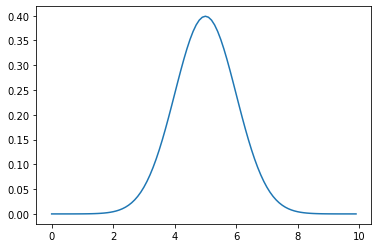

In [ ]:
dist_gauss = np.exp(-(((x-mu)**2)/(2*s2)))/(np.sqrt(2*np.pi*s2))
plt.plot(x,dist_gauss)

Vamos analisar um dos atributos, "weeks available" (semanas disponível), primeiro visualizando quantos valores distintos existem e o histograma

In [ ]:
data['weeks available'].nunique()

50

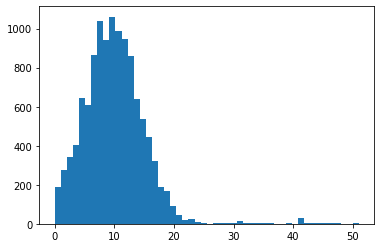

In [ ]:
hw = plt.hist(data['weeks available'], bins=50)

Notamos que o atributo parece ter o formato de uma Gaussiana, então vamos aplicar o algoritmo.

Vamos projetar uma função, mas agora que retorne os índices dos prováveis outliers

In [ ]:
def detect_outlier_Normal(attribute, epsilon=0.001, plotdist=False):
    """Funcao para detectar outliers com base na distribuicao Gaussiana univariada
    Parametros:
        - attribute: vetor de atributos/features
        - epsilon: limiar para rejeitar pontos como pertencendo a distribuicao (default:0.001)
        - plotdist: opcao que permite grafar a distribuicao com os parametros estimados
    Retorno:
        vetor com os índices dos outliers detectados
    """
    mean = np.mean(attribute)
    stdv  = np.std(attribute)
        
    # array vazio
    outliers = []
    # para cada atributo
    for x,i in zip(attribute, range(0,len(attribute))):
        # computa probabilidade
        p_x = np.exp(-(((x-mean)**2)/(2*stdv**2))) / (np.sqrt(2*np.pi)*stdv)
        # limiar para considerar outlier
        if (p_x < epsilon):
            outliers.append(i)
            
    outliers = np.array(outliers)
    
    # opcao para plotar a distribuicao marcando outliers
    if plotdist:
        x = np.arange(int(mean-4*stdv),int(mean+4*stdv),stdv/100.0)
        dist_gauss = np.exp(-(((x-mean)**2)/(2*(stdv**2)))) / (np.sqrt(2*np.pi)*stdv)
        plt.figure()
        plt.plot(x, dist_gauss)
        plt.plot(attribute[outliers], np.zeros(outliers.shape[0]), 'xr')
    
    return outliers

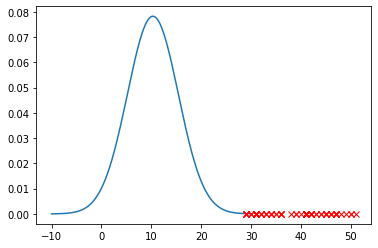

In [ ]:
outl = detect_outlier_Normal(data['weeks available'], epsilon=0.0001, plotdist=True)

In [ ]:
print(data.loc[outl,'weeks available'])

2        38
15       42
68       30
69       32
100      47
         ..
10964    36
11373    47
11575    41
11706    47
11727    33
Name: weeks available, Length: 98, dtype: int64


In [ ]:
weeks_remout = np.delete(data['weeks available'].values, outl, axis=0)

Após a remoção a distribuição dos dados é:

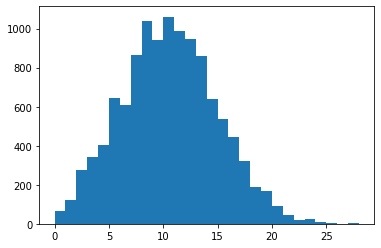

In [ ]:
hw2 = plt.hist(weeks_remout, bins=28)

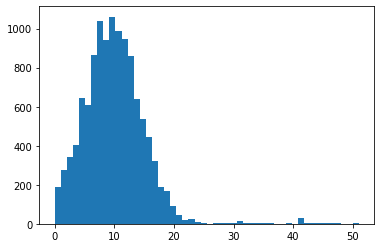

In [ ]:
hw = plt.hist(data['weeks available'], bins=50)

### 3. Agrupamento

Outra técnica consiste em utilizar aprendizado não-supervisionado, inferindo agrupamentos e verificando se há pontos isolados em certos grupos.

Vamos considerar um par de atributos para considerar ao *mesmo tempo*: `rent` e `hoa`

O método utilizado será o DBSCAN - *Density-Based Spatial Clustering of Applications with Noise*, mas outros também podem ser empregados na mesma lógica:
* agrupamentos (clusters) isolados com poucos pontos tendem a indicar outliers

Número de grupos estimado: 62
Número de outliers estimados: 121


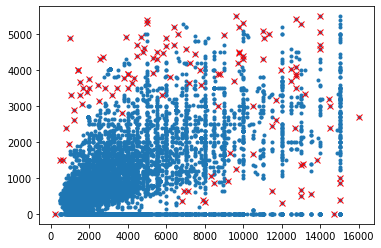

In [ ]:
from sklearn.cluster import DBSCAN

X1 = np.array(dc['rent'])
X2 = np.array(dc['hoa'])
X = np.vstack((X1,X2)).T

# aprende o agrupamento com DBSCAN
# argumentos: 
#    eps = distancia máxima para dois pontos serem considerados vizinhos
#        (depende bastante da amplitude dos atributos)
#    min_samples = minimo de exemplos numa vizinhanca para considerar um 
#               agrupamento
db = DBSCAN(eps = 200, min_samples=3).fit(X)
clusters = db.labels_

# número de rótulos -1 sao considerados ruidosos
# vamos considerá-los como outliers
n_outl_ = list(clusters).count(-1)
# fora os outliers, quantos clusters foram encontrados:
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
# índices dos outliers
outl_ind = np.where(clusters==-1)

print('Número de grupos estimado: %d' % n_clusters_)
print('Número de outliers estimados: %d' % n_outl_)

plt.plot(X1, X2,'.')
plt.plot(X1[outl_ind], X2[outl_ind],'xr')
plt.show()

### Resumo e considerações finais

* É possível projetar métodos automáticos para detectar anomalias em bases de dados maiores e mais complexas.


* Nessa aula vimos métodos estatísticos e baseados em aprendizado não-supervisionado.


* Há ainda métodos projetados exclusivamente para detectar anomalias, que também podem ser utilizados. 
    * Esses métodos consideram diferentes embasamentos teóricos, 
    * a maior parte considera que será feito um treinamento com dados não contaminados.
    * podem ser utilizadas para realizar o que é chamado de *detecção de novidades*: reconhecer se um novo ponto é um outlier dado um conjunto de treinamento sem outliers
    

* Para tratar bases de dados, combinar métodos automáticos com análise exploratória é importante
    * produzir um relatório inicial com os problemas levantados e então buscar conhecimento do domínio para entender os dados em mãos
    
    
* Estratégia para melhor controle da remoção dos outliers
    * Ao checar a base de dados, passando por todos os atributos para verificação de outliers, uma opção interessante é criar uma coluna de marcação, em que cada linha é marcada com `True` ou `1` se for encontrado outlier em alguma coluna. Ao final, depois que todas as colunas tiverem sido verificadas, realizar a remoção das linhas indesejadas.

## <span style="color:darkred">Informações faltantes</span>

## Informações faltantes

Problemas com dados do tipo: faltantes (e errôneos, os quais também ocasionam perdas) podem levar a impactos nos modelos estatísticos e de aprendizado.

A primeira etapa é **detectar corretamente** as informações faltantes, estudar os atributos onde ocorrem, separando em:
* Dados faltantes: no Python `NaN`, sendo indefinidos ou não encontrados
* Dados errôneos: valores que devem ser removidos para não prejudicar a análise. Comumente não são *outliers* mas dados corrompidos no armazenamento, transmissão ou inputação.

A seguir, temos como opções
1. Remover as linhas/instâncias contendo valores faltantes
2. Preencher valores faltantes utilizando algum método

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent
data = pd.read_csv("./dados/houses_to_rent_mba2.csv")
data

city   area  rooms  bathroom  parking spaces floor   hoa  \
0         São Paulo   70.0    2.0         1             1.0     7  2065   
1         São Paulo  320.0    4.0         4             2.0    20  1200   
2      Porto Alegre   80.0    1.0         1             1.0     6  1000   
3      Porto Alegre   51.0    1.0         1             NaN     2   270   
4         São Paulo   25.0    1.0         1             NaN     1     0   
...             ...    ...    ...       ...             ...   ...   ...   
11760     São Paulo  150.0    3.0         3             2.0     8     0   
11761  Porto Alegre   63.0    2.0         1             1.0     5   402   
11762     São Paulo  285.0    4.0         4             4.0    17  3100   
11763        Brotas  100.0    1.0         2             1.0     -     0   
11764        Brotas  200.0    4.0         2             1.0     -     0   

        rent   tax  insurance    total  page hits  days available  \
0       3300   211         42   5618.0        324              23   
1       4960  1750         63   7973.0        720              78   
2       2800    nr         41   3841.0         64             269   
3       1112    22         17   1421.0         46              73   
4        800    25         11    836.0       1548              78   
...      ...   ...        ...      ...        ...             ...   
11760  13500     0        172  13672.0       2124             114   
11761   1478    24         22   1926.0         58              86   
11762  15000   973        191  19264.0        612              99   
11763    800   116         39    955.0        148             127   
11764   1450   226         75   1751.0        104              85   

       interactions  weeks available   type  
0               108                3   flat  
1               240               11   flat  
2               128               38   flat  
3                92               10   flat  
4               516               11   flat  
...             ...              ...    ...  
11760           708               16   flat  
11761           116               12   flat  
11762           204               14   flat  
11763           148               18  house  
11764           104               12  house  

[11765 rows x 16 columns]


### Experimento com tratamento de dados

Vamos utilizar essa base de dados como meio de estudo, com duas tarefas:
1. classificador para predizer a **cidade** com base nos atributos: imposto, valor total e valor do seguro
2. regressor para predizer o **total** do aluguel com base nos atributos: área, número de quartos, andar, tipo, número de vagas na garagem e número de banheiros.

Repassaremos conceitos como **remoção de duplicatas e de outliers**


1. Separar essa base de dados em conjuntos de treinamento (X) e teste (Z)

In [ ]:
# obtem amostra dos dados para treinamento
frac_trein = 0.3
dtrain = data.sample(frac=frac_trein, random_state=1) # amostra trein.
dtest = data.drop(dtrain.index) # amostra teste

print(len(dtrain) + len(dtest))

11765


Vamos tentar obter um **classificador** sem realizar nenhum tratamento na base de dados

In [ ]:
# preparando os atributos
Xcla = dtrain[['tax','total','insurance']]
Ycla = dtrain['city']

# dados de teste
ZXcla = dtest[['tax','total','insurance']]
ZYcla = dtest['city']

# classificador
clfb = RandomForestClassifier(n_estimators=50, random_state=1)
clfb.fit(Xcla,Ycla)
ZYcla_ = clfb.predict(ZXcla)

ValueError: could not convert string to float: '-'

**Encontramos o primeiro erro! Vamos olhar para os atributos antes de treinar...**
Note que o erro é de conversão de string para float. Vamos imprimir os tipos dos atributos e seus valores únicos:

In [ ]:
data.dtypes

city                object
area               float64
rooms              float64
bathroom             int64
parking spaces     float64
floor               object
hoa                  int64
rent                 int64
tax                 object
insurance            int64
total              float64
page hits            int64
days available       int64
interactions         int64
weeks available      int64
type                object
dtype: object

In [ ]:
for var in dtrain:
    print(40*'-')
    print(var,':', dtrain[var].dtype.name)
    if dtrain[var].dtype.name == 'object':
        print(dtrain.groupby(var, dropna=False, as_index=False).size())
    else:
        print(dtrain[var].describe())
        print('Total de faltantes: ', np.sum(dtrain[var].isna()))

----------------------------------------
city : object
             city  size
0  Belo Horizonte   368
1          Brotas     3
2        Campinas   244
3    Porto Alegre   332
4  Rio de Janeiro   440
5       São Paulo  2143
----------------------------------------
area : float64
count     3509.000000
mean       146.410373
std        433.867590
min         12.000000
25%         56.000000
50%         91.000000
75%        181.000000
max      24606.000000
Name: area, dtype: float64
Total de faltantes:  21
----------------------------------------
rooms : float64
count    3503.000000
mean        2.477591
std         1.150322
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        10.000000
Name: rooms, dtype: float64
Total de faltantes:  27
----------------------------------------
bathroom : int64
count    3530.000000
mean        2.274504
std         1.444447
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        2

Note que:
* `city` e `type` são do tipo object contendo strings (palavras), 
* `floor` e `tax` aparecem como object mas contendo números!

Precisamos procurar por problemas e remover os valores não numéricos como `-`. 

Uma forma fácil é simplesmente forçar a **conversão para numérico** e atribuir `NaN` aos elementos não convertidos.

1. `floor` possui um único valor não numérico `-`:

['7' '5' '3' '11' '-' '2' '15' '6' '1' '20' '4' '17' '21' '8' '13' '9'
 '18' '12' '10' '19' '14' '23' '22' '26' '25' '16' '27' '110' '24' '28']


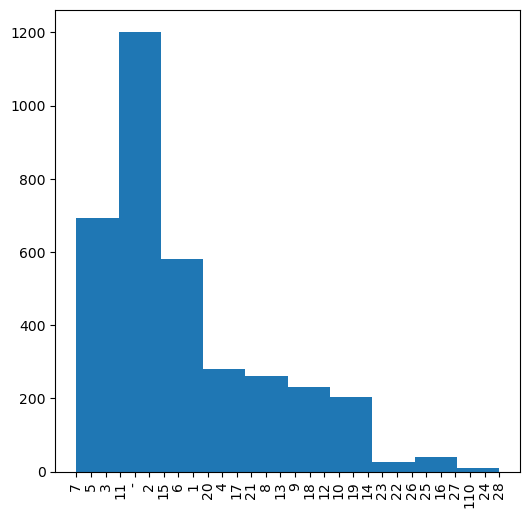

In [ ]:
plt.figure(figsize=(6,6))
h = plt.hist(dtrain.loc[:,'floor'])
h = plt.xticks(rotation=90)
print(dtrain.loc[:,'floor'].unique())

Esse valor parece estar relacionado ao `0` (térreo)

In [ ]:
dtrain_orig = dtrain.copy()

# substituir `-` por `0`
dtrain.loc[dtrain['floor']=='-','floor'] = '0'

# coerce obriga a conversão, jogando para NaN o que não foi convertido
dtrain.loc[:,'floor'] = pd.to_numeric(dtrain.loc[:,'floor'], 
                                      downcast='integer', errors='coerce')

# tax será convertido diretamente, sem substituicao de valores
dtrain.loc[:,'tax'] = pd.to_numeric(dtrain.loc[:,'tax'], 
                                    downcast='float', errors='coerce')

In [ ]:
# vamos fazer o mesmo com o teste
dtest.loc[dtest['floor']=='-','floor'] = '0'
dtest.loc[:,'floor'] = pd.to_numeric(dtest.loc[:,'floor'], downcast='integer', errors='coerce')
dtest.loc[:,'tax'] = pd.to_numeric(dtest.loc[:,'tax'], downcast='float', errors='coerce')

Após tratar os casos de conversão, podemos **remover os faltantes**

In [ ]:
print("Treinamento antes: %d" % (dtrain.shape[0]))
print("Teste antes: %d" % (dtest.shape[0]))

Treinamento antes: 3530
Teste antes: 8235


In [ ]:
dtrain = dtrain.dropna()
dtest = dtest.dropna()

In [ ]:
print("Treinamento após remoção faltantes: %d" % (dtrain.shape[0]))
print("Teste após remoção faltantes: %d" % (dtest.shape[0]))

Treinamento após remoção faltantes: 2626
Teste após remoção faltantes: 6035


In [ ]:
for var in dtrain:
    # imprime variavel e seu tipo
    print(var,":", dtrain[var].dtype.name, end="")
    # se nao numérico
    if not np.issubdtype(dtrain[var].dtype, np.number):
        print("\n\t",dtrain[var].nunique(), "distintos: ", end="")
        print(dtrain[var].unique())
    else:
        print(", intervalo: ",end="")
        print(dtrain[var].min(), ",", dtrain[var].max())
        
print("Antes: %d, Depois: %d" % (dtrain_orig.shape[0], dtrain.shape[0]))

city : object
	 6 distintos: ['Rio de Janeiro' 'São Paulo' 'Belo Horizonte' 'Porto Alegre' 'Campinas'
 'Brotas']
area : float64, intervalo: 20.0 , 24606.0
rooms : float64, intervalo: 1.0 , 10.0
bathroom : int64, intervalo: 1 , 20
parking spaces : float64, intervalo: 1.0 , 8.0
floor : int8, intervalo: 0 , 110
hoa : int64, intervalo: 0 , 14000
rent : int64, intervalo: 500 , 30000
tax : float32, intervalo: 0.0 , 28120.0
insurance : int64, intervalo: 5 , 451
total : float64, intervalo: 559.0 , 32183.0
page hits : int64, intervalo: 0 , 6156
days available : int64, intervalo: 0 , 358
interactions : int64, intervalo: 0 , 2052
weeks available : int64, intervalo: 0 , 51
type : object
	 2 distintos: ['flat' 'house']
Antes: 3530, Depois: 2626


###  Tratando duplicatas

In [ ]:
dtrain_nd = dtrain.drop_duplicates(keep='first')
print("Antes: %d, Depois: %d" % (dtrain.shape[0], dtrain_nd.shape[0]))

Antes: 2626, Depois: 2454


In [ ]:
# preparando os atributos
attrsclass = ['tax','total','insurance','rooms', 'bathroom', 'area']
Xcla = dtrain[attrsclass]
Ycla = dtrain['city']

# dados de teste
ZXcla = dtest[attrsclass]
ZYcla = dtest['city']

# classificador
clfb = RandomForestClassifier(n_estimators=50, random_state=1)
clfb.fit(Xcla,Ycla)
ZYcla_ = clfb.predict(ZXcla)

# dados sem duplicatas
Xcla_nd = dtrain_nd[attrsclass]
Ycla_nd = dtrain_nd['city']

# classificador dados não duplicados
clfnd = RandomForestClassifier(n_estimators=50, random_state=1)
clfnd.fit(Xcla_nd,Ycla_nd)
ZYcland_ = clfnd.predict(ZXcla)

print("Original: %d, Tratado: %d" % (Xcla.shape[0], Xcla_nd.shape[0]))

Original: 2626, Tratado: 2454


É importante verificar como é a **distribuição das classes** nessa base de dados para utilizar a medida adequada de avaliação

In [ ]:
dtrain['city'].value_counts()

São Paulo         1652
Belo Horizonte     318
Rio de Janeiro     245
Porto Alegre       216
Campinas           192
Brotas               3
Name: city, dtype: int64

Como nesse caso as classes não são igualmente distribuídas, vamos computar, além da acurácia simples, também a *acurácia balanceada*

In [ ]:
acc_base = metrics.accuracy_score(ZYcla, ZYcla_)
acc_nd = metrics.accuracy_score(ZYcla, ZYcland_)
print("Acurácia base: %0.2f" % (acc_base*100))
print("- sem duplicatas e com dados faltantes removidos: %0.2f" % (acc_nd*100))

ab_base = metrics.balanced_accuracy_score(ZYcla, ZYcla_)
ab_nd = metrics.balanced_accuracy_score(ZYcla, ZYcland_)
print("\nAcurácia balanceada base: %0.2f" % (ab_base*100))
print("- sem duplicatas e com dados faltantes removidos: %0.2f" % (ab_nd*100))

Acurácia base: 70.14
- sem duplicatas e com dados faltantes removidos: 69.66

Acurácia balanceada base: 40.65
- sem duplicatas e com dados faltantes removidos: 40.63


In [ ]:
# Treinando regressor
## preparando atributos de entrada
attrsreg = ['area','rooms','bathroom', 'floor'];
Xreg = dtrain[attrsreg]
## variável resposta/saída
Yreg = dtrain['total']

## preparando teste
ZXreg = dtest[attrsreg]
ZYreg = dtest['total']

## dados sem duplicatas
Xreg_nd = dtrain_nd[attrsreg]
Yreg_nd = dtrain_nd['total']

In [ ]:
regb = LinearRegression()
regb.fit(Xreg, Yreg)
ZYreg_ = regb.predict(ZXreg)

reg_nd = LinearRegression()
reg_nd.fit(Xreg_nd, Yreg_nd)
ZYreg_nd_ = reg_nd.predict(ZXreg)

mae_base = metrics.mean_absolute_error(ZYreg, ZYreg_)
mae_nd = metrics.mean_absolute_error(ZYreg, ZYreg_nd_)
print("Erro médio absoluto: %0.3f" % (mae_base))
print("Erro médio absoluto após limpeza: %0.3f" % (mae_nd))

Erro médio absoluto: 2638.399
Erro médio absoluto após limpeza: 2635.644


Percorrendo atributos de interesse para remover outliers

In [ ]:
def remove_outliers_IQR(df, attributes, factor=2):
    
    dfn = df.copy()
    
    for var in attributes:
        # verifica se variável é numerica
        if np.issubdtype(df[var].dtype, np.number):
            Q1 = dfn[var].quantile(0.25)
            Q2 = dfn[var].quantile(0.50)
            Q3 = dfn[var].quantile(0.75)
            IQR = Q3 - Q1
            
            # apenas inliers segundo IQR
            dfn = dfn.loc[(df[var] >= Q1-(IQR*factor)) & (df[var] <= Q3+(IQR*factor)),:]

    return dfn

attributes = ['tax','total','insurance', 'area', 'rooms', 'bathroom']
dtrain_out = remove_outliers_IQR(dtrain_nd, attributes)
dtest_out = remove_outliers_IQR(dtest, attributes)

print("Antes: %d, Depois: %d" % (dtrain_nd.shape[0], dtrain_out.shape[0]))

Antes: 2454, Depois: 2167


<AxesSubplot:>

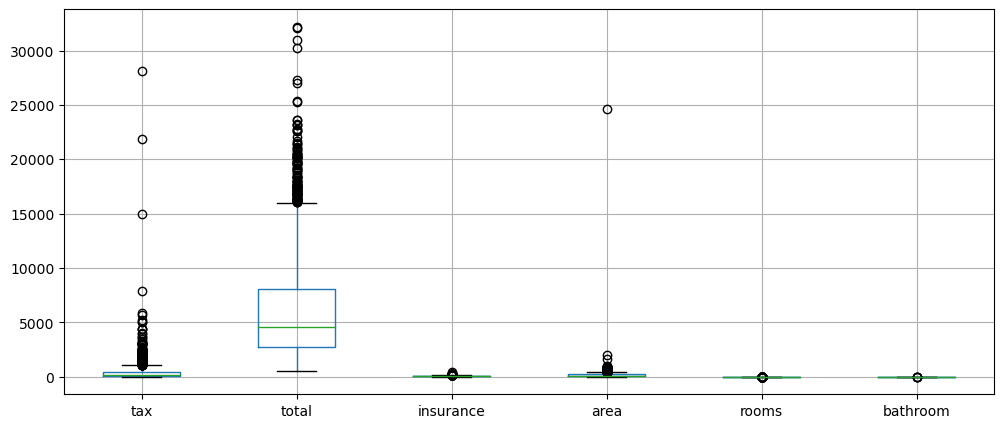

In [ ]:
plt.figure(figsize=(12,5))
dtrain.boxplot(attributes)

<AxesSubplot:>

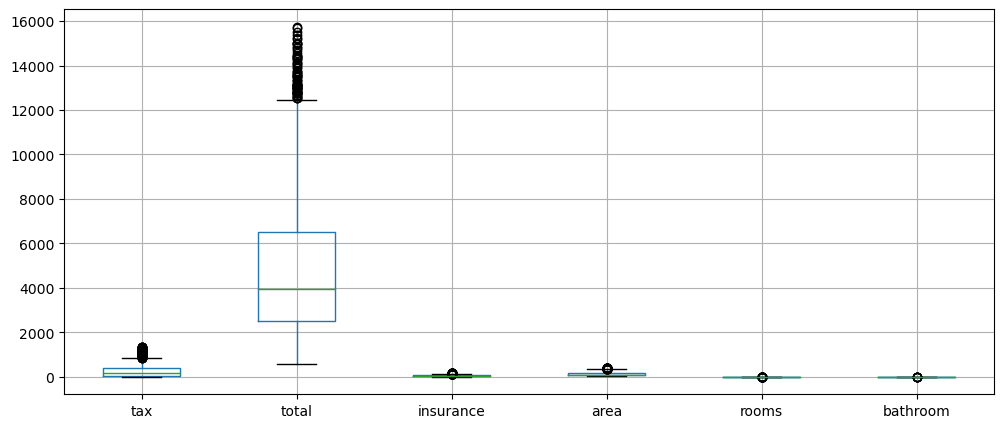

In [ ]:
plt.figure(figsize=(12,5))
dtrain_out.boxplot(attributes)

In [ ]:
# Treinando classificador com dados após remoção de outliers
Xclao = dtrain_out[attrsclass]
Yclao = dtrain_out['city']
ZXclao = dtest_out[attrsclass]
ZYclao = dtest_out['city']

clfo = RandomForestClassifier(n_estimators=50, random_state=1)
clfo.fit(Xclao,Yclao)
ZYcla_o_ = clfo.predict(ZXcla)

In [ ]:
ab_o = metrics.balanced_accuracy_score(ZYcla, ZYcla_o_)
print("\nAcurácia balanceada base: %0.2f" % (ab_base*100))
print("- sem duplicatas e com dados faltantes removidos: %0.2f" % (ab_nd*100))
print("- tratando outliers: %0.2f" % (ab_o*100))


Acurácia balanceada base: 40.65
- sem duplicatas e com dados faltantes removidos: 40.63
- tratando outliers: 40.41


In [ ]:
# avaliando regressor
Xreg_o = dtrain_out[attrsreg]
Yreg_o = dtrain_out['total']

reg_o = LinearRegression()
reg_o.fit(Xreg_o, Yreg_o)
ZYreg_o_ = reg_o.predict(ZXreg)

mae_o = metrics.mean_absolute_error(ZYreg, ZYreg_o_)
print("Erro médio absoluto: %0.2f" % (mae_base))
print("Erro médio absoluto limpeza: %0.2f" % (mae_nd))
print("Erro médio absoluto tratando outliers: %0.2f" % (mae_o))

Erro médio absoluto: 2638.40
Erro médio absoluto limpeza: 2635.64
Erro médio absoluto tratando outliers: 2378.14


#  Preenchendo dados faltantes

No experimento anterior lidamos com dados faltantes **removendo linhas**, 

Agora vamos carregar novamente os dados e para **preencher os dados**, mantendo o tratamento de remoção de duplicatas, dos atributos string e de remoção de outliers

Há várias formas de se preencher dados faltantes
1. **com zeros ou valor constante**: 
    para manter a instância e permitir o uso dos outros atributos
<br>    

2. **pela média**: similar ao anterior, mas aqui preenchemos com a média do atributo para os valores observados
<br>    

3. **por vizinhos mais próximos**: refinamento do método da média, no qual, para cada valor faltante, primeiro encontramos as $k$ instâncias mais próximas àquela contendo o valor faltante e obtemos a média do atributo a partir dos $k$ vizinhos mais próximos
<br>    

4. **por regressão**: para cada atributo faltante, aprendemos um regressor capaz de predizer o atributo faltante com base em um ou mais atributos auxiliares

In [ ]:
data = pd.read_csv("./dados/houses_to_rent_mba2.csv")

# obtem amostra dos dados para treinamento
dtrain = data.sample(frac=frac_trein, random_state=1)
dtest = data.drop(dtrain.index)

dtrain_orig = dtrain.copy()

# substituir - por 0
dtrain.loc[dtrain['floor']=='-','floor'] = '0'
# coerce obriga a conversão, jogando para Nan que não foi convertido
dtrain.loc[:,'floor'] = pd.to_numeric(dtrain.loc[:,'floor'], downcast='integer', errors='coerce')
dtrain.loc[:,'tax'] = pd.to_numeric(dtrain.loc[:,'tax'], downcast='float', errors='coerce')

dtest.loc[dtest['floor']=='-','floor'] = '0'
dtest.loc[:,'floor'] = pd.to_numeric(dtest.loc[:,'floor'], downcast='integer', errors='coerce')
dtest.loc[:,'tax'] = pd.to_numeric(dtest.loc[:,'tax'], downcast='float', errors='coerce')

# remove duplicatas
dtrain_nd = dtrain.drop_duplicates(keep='first')
print("Dados originais: %d, após remocao duplicatas: %d" % (dtrain.shape[0], dtrain_nd.shape[0]))

# remove outliers
attributes = ['tax','total','insurance', 'bathroom']
dtrain_out = remove_outliers_IQR(dtrain_nd, attributes)
dtest_out = remove_outliers_IQR(dtest, attributes)

print("Após remocao outliers: %d" % (dtrain_out.shape[0]))

Dados originais: 3530, após remocao duplicatas: 3285
Após remocao outliers: 2892


In [ ]:
def check_missing_att(df):
    # verificando atributos faltantes
    for var in df:
        # somamos o número de variáveis nulas (NaN)
        nullatt = np.sum(df[var].isnull())
        if nullatt > 0:
            print(var,"- faltantes: ", end='')
            print(nullatt)

In [ ]:
check_missing_att(dtrain_out)

area - faltantes: 18
rooms - faltantes: 22
parking spaces - faltantes: 761


### Preenchimento com valor constante

In [ ]:
dtrain_out_fill0 = dtrain_out.fillna(0)

In [ ]:
check_missing_att(dtrain_out_fill0)

### Preenchimento pela média

In [ ]:
def fill_missing_average(df):
        
    dfn = df.copy()
    for i in dfn:
        nullatt = np.sum(dfn[i].isnull())
        if nullatt == 0: continue
        print(i, nullatt, 'faltantes')
        
        # obtem a media para os dados completos no atributo
        # dfn[i].notnull() -> elementos completos no atributo i
        # dfn.loc[dfn[i].notnull(),i] -> filtra os valores completos do atributo i
        avg_compl = dfn.loc[dfn[i].notnull(),i].mean()
        print('\tmédia =', avg_compl)
        dfn.loc[dfn[i].isnull(),i] = avg_compl
        
    return dfn

In [ ]:
dtrain_mism = fill_missing_average(dtrain_out)

check_missing_att(dtrain_mism)
dtrain_mism.tail()

area 18 faltantes
float64
	média = 112.30967292971468
rooms 22 faltantes
float64
	média = 2.3142857142857145
parking spaces 761 faltantes
float64
	média = 1.8259033317691225


city   area  rooms  bathroom  parking spaces  floor   hoa  \
9572        São Paulo   80.0    3.0         1        1.825903      0     0   
925         São Paulo   90.0    3.0         2        2.000000      5  1478   
4476   Belo Horizonte   80.0    1.0         2        1.825903      2   150   
3592        São Paulo  180.0    3.0         4        3.000000      3  1600   
10548  Belo Horizonte   26.0    1.0         1        1.000000      1    60   

       rent    tax  insurance   total  page hits  days available  \
9572   2837  342.0         36  3215.0        540              91   
925    2500  355.0         32  4365.0        612              49   
4476   1100   68.0         15  1333.0         54              70   
3592   3500   65.0         45  5210.0        396              36   
10548   750   67.0         10   887.0        108              45   

       interactions  weeks available   type  
9572            180               13  house  
925             204                7   flat  
4476             54               10   flat  
3592            132                5   flat  
10548           108                6   flat

In [ ]:
def fill_missing_regression(df, attributes, attributes_reg):
    """ Funcao para preencher dados faltantes por regressao
        parametros:
            df - dataframe
            attributes - lista de atributos a preencher (alvo/saida)
            attributes_reg - lista dos respectivos atributos a serem usados na regressao
                             como variaveis de entrada
    """
    
    dfn = df.copy()
    print(len(attributes), ' attributos: ')
    for i in range(len(attributes)):
        print('-', i, ': preencher ', attributes[i], ' usando ', attributes_reg[i], end=' -- ')
        nullatt = np.sum(dfn[attributes[i]].isnull())
        print(nullatt, ' faltantes')
        if nullatt == 0: continue
        
        # atributo de entrada para dados completos
        Xa = np.array(dfn.loc[dfn[attributes[i]].notnull() & dfn[attributes_reg[i]].notnull(), 
                              attributes_reg[i]])
        # atributo de saida para dados completos
        Ya = np.array(dfn.loc[dfn[attributes[i]].notnull() & dfn[attributes_reg[i]].notnull(), 
                              attributes[i]])
        
        reg = LinearRegression()
        reg.fit(Xa.reshape(-1, 1), Ya.reshape(-1, 1))
        
        # seleciona as variáveis de entrada 
        # relativa aos valores faltantes para fazer a regressao
        Zr = dfn.loc[ dfn[attributes[i]].isnull(), attributes_reg[i]]
        
        # prediz as variaveis faltantes
        Za = reg.predict( (np.array(Zr)).reshape(-1, 1) )

        # monta array para substituir a variavel agora preenchida
        att_fill = np.array(dfn.loc[:, attributes[i]])
        att_fill[np.where(np.isnan(att_fill))] = np.array(Za.flatten()).astype(int)
        dfn.loc[:,attributes[i]] = att_fill.astype(np.int32)
        #print(dfn.loc[df[attributes[i]].isnull(), attributes[i]])
        
    return dfn

In [ ]:
attributes     = ['rooms', 'parking spaces', 'area', 'tax']
attributes_reg = ['area', 'rent', 'tax', 'hoa']

dtrain_misr = fill_missing_regression(dtrain_out, attributes, attributes_reg)

check_missing_att(dtrain_misr)

4  attributos: 
- 0 : preencher  rooms  usando  area -- 22  faltantes
- 1 : preencher  parking spaces  usando  rent -- 761  faltantes
- 2 : preencher  area  usando  tax -- 18  faltantes
- 3 : preencher  tax  usando  hoa -- 0  faltantes


In [ ]:
dtrain_out.tail()

city   area  rooms  bathroom  parking spaces  floor   hoa  \
9572        São Paulo   80.0    3.0         1             NaN      0     0   
925         São Paulo   90.0    3.0         2             2.0      5  1478   
4476   Belo Horizonte   80.0    1.0         2             NaN      2   150   
3592        São Paulo  180.0    3.0         4             3.0      3  1600   
10548  Belo Horizonte   26.0    1.0         1             1.0      1    60   

       rent    tax  insurance   total  page hits  days available  \
9572   2837  342.0         36  3215.0        540              91   
925    2500  355.0         32  4365.0        612              49   
4476   1100   68.0         15  1333.0         54              70   
3592   3500   65.0         45  5210.0        396              36   
10548   750   67.0         10   887.0        108              45   

       interactions  weeks available   type  
9572            180               13  house  
925             204                7   flat  
4476             54               10   flat  
3592            132                5   flat  
10548           108                6   flat

In [ ]:
dtrain_misr.tail()

city  area  rooms  bathroom  parking spaces  floor   hoa  \
9572        São Paulo    80      3         1               1      0     0   
925         São Paulo    90      3         2               2      5  1478   
4476   Belo Horizonte    80      1         2               1      2   150   
3592        São Paulo   180      3         4               3      3  1600   
10548  Belo Horizonte    26      1         1               1      1    60   

       rent    tax  insurance   total  page hits  days available  \
9572   2837  342.0         36  3215.0        540              91   
925    2500  355.0         32  4365.0        612              49   
4476   1100   68.0         15  1333.0         54              70   
3592   3500   65.0         45  5210.0        396              36   
10548   750   67.0         10   887.0        108              45   

       interactions  weeks available   type  
9572            180               13  house  
925             204                7   flat  
4476             54               10   flat  
3592            132                5   flat  
10548           108                6   flat

In [ ]:
# Treinando classificador preenchimento media
Xclamism = dtrain_mism[attrsclass]
Yclamism = dtrain_mism['city']

clfmm =  RandomForestClassifier(n_estimators=50, random_state=1)
clfmm.fit(Xclamism,Yclamism)
ZYcla_mm_ = clfmm.predict(ZXcla)

# Treinando classificador prenchimento pelo regressor
Xclamisr = dtrain_misr[attrsclass]
Yclamisr = dtrain_misr['city']

clfmr =  RandomForestClassifier(n_estimators=50, random_state=1)
clfmr.fit(Xclamisr,Yclamisr)
ZYcla_mr_ = clfmr.predict(ZXcla)

In [ ]:
ab_mm = metrics.balanced_accuracy_score(ZYcla, ZYcla_mm_)
ab_mr = metrics.balanced_accuracy_score(ZYcla, ZYcla_mr_)
print("\nAcurácia balanceada base: %0.2f" % (ab_base*100))
print("- sem duplicatas e com dados faltantes removidos: %0.2f" % (ab_nd*100))
print("- tratando outliers: %0.2f" % (ab_o*100))
print("- preenchendo faltantes média: %0.2f" % (ab_mm*100))
print("- preenchendo faltantes regressão: %0.2f" % (ab_mr*100))


Acurácia balanceada base: 40.65
- sem duplicatas e com dados faltantes removidos: 40.63
- tratando outliers: 40.41
- preenchendo faltantes média: 40.15
- preenchendo faltantes regressão: 43.94


In [ ]:
# Treinando regressor
Xreg_mism = dtrain_mism[attrsreg]
Xreg_misr = dtrain_misr[attrsreg]
Yreg_mis = dtrain_misr['total']

regmm = LinearRegression()
regmm.fit(Xreg_mism, Yreg_mis)
ZYreg_mism_ = regmm.predict(ZXreg)

regmr = LinearRegression()
regmr.fit(Xreg_misr, Yreg_mis)
ZYreg_misr_ = regmr.predict(ZXreg)

In [ ]:
mae_mism = metrics.mean_absolute_error(ZYreg, ZYreg_mism_)
mae_misr = metrics.mean_absolute_error(ZYreg, ZYreg_misr_)
print("Erro médio absoluto: %0.3f" % (mae_base))
print("- limpeza: %0.3f" % (mae_nd))
print("- tratando outliers: %0.3f" % (mae_o))
print("- preenchendo faltantes média: %0.3f" % (mae_mism))
print("- preenchendo faltantes regressão: %0.3f" % (mae_misr))

Erro médio absoluto: 2638.399
- limpeza: 2635.644
- tratando outliers: 2378.140
- preenchendo faltantes média: 2506.438
- preenchendo faltantes regressão: 2504.711


## <span style="color:darkred">Tratamento de desbalanceamento: subamostragem e aumentação de dados</span>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay


import lightgbm as lgbm

from imblearn import over_sampling
from imblearn import under_sampling
from imblearn import combine

# Dados Desbalanceados

Vamos estudar o problema de dados desbalanceados utilizando o conjunto de dados de natalidade em uma maternidade.

In [ ]:
data = pd.read_csv("./dados/TACTD-01-Desbalanceamento.csv")
data.head()


Sex  Gestational age  Month  Year  Weight Hospital    Date
0   F               38     12  2016    3740  St Mary  201612
1   M               39     12  2016    4130  St Mary  201612
2   M               42     12  2016    4250  St Mary  201612
3   F               39     12  2016    3990  St Mary  201612
4   F               38     12  2016    3760  St Mary  201612

In [ ]:
data['Sex'].value_counts()

F    58
M    18
Name: Sex, dtype: int64

In [ ]:
cont = data['Sex'].value_counts()

# relacao entre classe majoritaria e minoritaria
ratio = np.round((cont[1]/cont[0])*10,1)

# percentual
perce = (np.min(cont)/data.shape[0])*100

In [ ]:
print('Problema com relaçao 1:'+str(ratio))
print('Classe minoritária com frequência: %.1f%%' % (perce)) 

Problema com relaçao 1:3.1
Classe minoritária com frequência: 23.7%


Nesse caso temos um desbalanceamento de aproximadamente 1:3

Ao inferir modelos temos que tratar a amostra relativa ao Sexo Feminino e ao Sexo Masculino de forma a controlar por essa diferença.

Em alguns métodos de aprendizado, por exemplo, a quantidade de dados é levada em consideração e pode trazer um peso maior para a categoria chamada de *majoritária*, nesse caso o sexo Feminino.


O efeito de desbalanceamento pode causar o deslocamento de uma superfície de decisão aprendida, favorecendo a classe majoritária

<img src="imagens/desb_1_deci.png" width=280>

---



# Métodos de tratamento de desbalanceamento

1. **Subamostragem**: remove exemplos da classe majoritária
2. **Aumentação de dados/sobreamostragem**: cria *novos* exemplos sintéticos/artificiais para a classe minoritária

### Subamostragem aleatória

<img src="imagens/desb_2_unders.png" width=400>


### SMOTE

Método de sobreamostragem *Synthetic Minority Oversampling Technique*

<img src="imagens/desb_3_SMOTE.png" width=600>

### TomekLinks

Método de remoção de exemplos com base no vizinho mais próximo

<img src="imagens/desb_4_tomek.png" width=600>

### Edited Nearest Neighbors (ENN)

Utiliza $k$ vizinhos mais próximos ao invés de um único como no Tomek

---

Vamos utilizar uma base de dados desbalanceada para mostrar alguns métodos

In [ ]:
# https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent
data = pd.read_csv("./dados/houses_to_rent_mba_nomissing2.csv")

# tratamento de dados
data_nred = data.drop_duplicates(keep='first').copy()
data_nred.loc[data_nred['floor']=='-','floor'] = '0'
data_nred.loc[:,'floor'] = pd.to_numeric(data_nred['floor'], downcast='integer', errors='coerce')
data_nred.loc[:,'tax'] = pd.to_numeric(data_nred['tax'], downcast='float', errors='coerce')
data_nred = data_nred.dropna()

In [ ]:
# remoção de outliers
def remove_outliers(df, attributes, factor=2):
    for var in attributes:
        # verifica se variável é numerica
        if np.issubdtype(df[var].dtype, np.number):
            Q1 = df[var].quantile(0.25)
            Q2 = df[var].quantile(0.25)
            Q3 = df[var].quantile(0.75)
            IQR = Q3 - Q1
        
        # apenas inliers segundo IQR
        df = df.loc[(df[var] >= Q1-(IQR*factor)) & (df[var] <= Q3+(IQR*factor)), :]
    return df

attributes = ['tax','insurance', 'hoa', 'rent']
data_out = remove_outliers(data_nred, attributes)

print("Antes: %d, Depois tratamento: %d" % (data_nred.shape[0], data_out.shape[0]))

Antes: 10695, Depois tratamento: 8811


Vamos separar essa base de dados em conjuntos de treinamento (X) e teste (Z)

In [ ]:
frac_trein = 0.8
dtrain = data.sample(frac=frac_trein, random_state=1)
dtest = data.drop(dtrain.index)

### Caso multiclasse com uma majoritária

1. classificador para predizer a **cidade** com base no imposto, valor do condomínio e valor do seguro, e valor do condomínio

In [ ]:
# Treinando classificador
X = dtrain[['tax','insurance', 'hoa']]
Y = dtrain['city']

ZX = dtest[['tax','insurance', 'hoa']]
ZY = dtest['city']

clf = SVC(gamma='auto')
clf.fit(X,Y)
ZY_ = clf.predict(ZX)

In [ ]:
acc_base = metrics.accuracy_score(ZY, ZY_)
accb_base = metrics.balanced_accuracy_score(ZY, ZY_)
print("Acurácia: %0.2f" % (acc_base*100))
print("Acurácia balanceada: %0.2f" % (accb_base*100))

Acurácia: 61.79
Acurácia balanceada: 28.88


<AxesSubplot:>

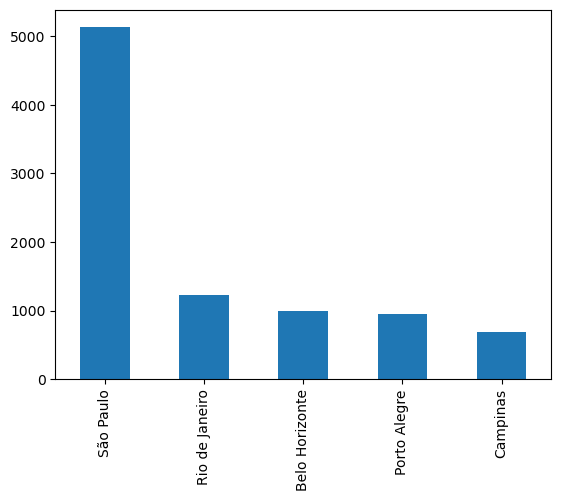

In [ ]:
dtrain['city'].value_counts().plot.bar()

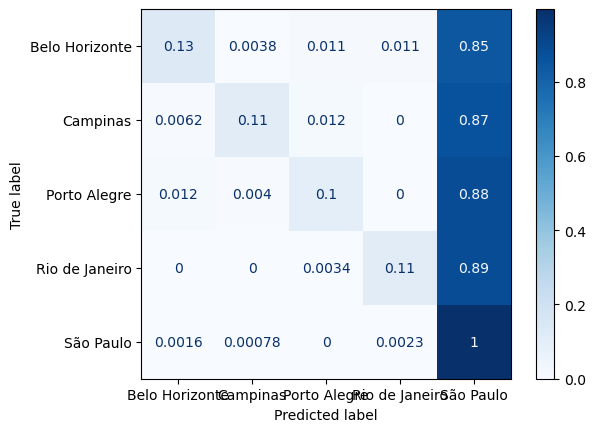

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(clf, ZX, ZY,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

Definimos uma estratégia de amostragem (se deixado em branco vai tentar igualar todas as classes) 

In [ ]:
# superamostrando a 50% da majoritária

majority_n = dtrain['city'].value_counts()['São Paulo']

sampling_strategy = {}
for city in dtrain['city'].value_counts().index:
    if city != 'São Paulo':
        sampling_strategy[city] = int(0.5*majority_n)

print(sampling_strategy)

{'Rio de Janeiro': 2564, 'Belo Horizonte': 2564, 'Porto Alegre': 2564, 'Campinas': 2564}


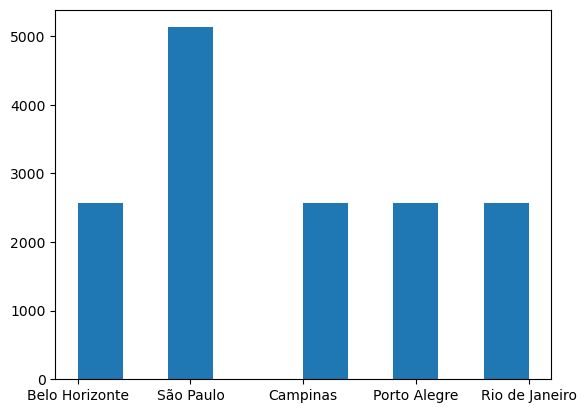

In [ ]:
oversamp = over_sampling.SMOTE(sampling_strategy=sampling_strategy) # sampling_strategy pode ser usado para casos binários
Xo, Yo = oversamp.fit_resample(X, Y)
h = plt.hist(Yo)

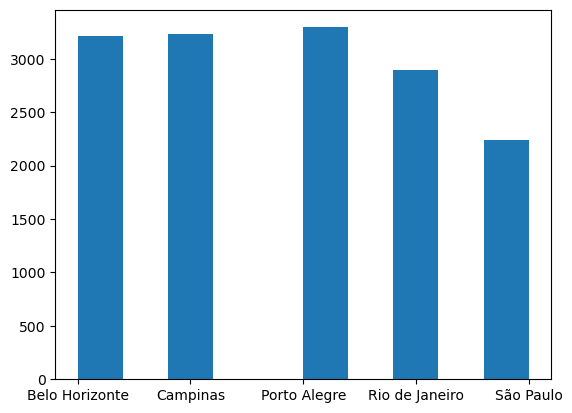

In [ ]:
overunder = combine.SMOTEENN(sampling_strategy='all')
Xc, Yc = overunder.fit_resample(X, Y)

h = plt.hist(Yc)

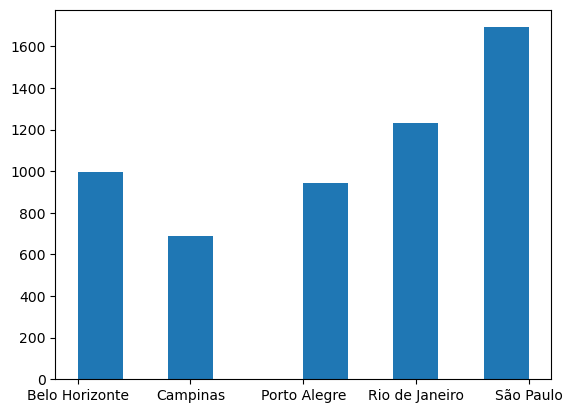

In [ ]:
# subamostrando a 33% da majoritária
undersampling_strategy = {'São Paulo': int(0.33*majority_n)}

undersamp = under_sampling.RandomUnderSampler(sampling_strategy=undersampling_strategy)
Xu, Yu = undersamp.fit_resample(X, Y)

h = plt.hist(Yu) 

In [ ]:
clf_ov = SVC(gamma='auto')
clf_ov.fit(Xo,Yo)
ZYov_ = clf_ov.predict(ZX)

clf_un = SVC(gamma='auto')
clf_un.fit(Xu,Yu)
ZYun_ = clf_un.predict(ZX)

clf_co = SVC(gamma='auto')
clf_co.fit(Xc,Yc)
ZYco_ = clf_co.predict(ZX)

In [ ]:
accb_ov = metrics.balanced_accuracy_score(ZY, ZYov_)
accb_un = metrics.balanced_accuracy_score(ZY, ZYun_)
accb_co = metrics.balanced_accuracy_score(ZY, ZYco_)
print("Acurácia balanceada base: %0.3f" % (accb_base))
print("- oversampling (SMOTE): %0.3f" % (accb_ov))
print("- undersampling: %0.3f" % (accb_un))
print("- oversampling + undersampling (SMOTEENN): %0.3f" % (accb_co))

Acurácia balanceada base: 0.289
- oversampling (SMOTE): 0.322
- undersampling: 0.313
- oversampling + undersampling (SMOTEENN): 0.357


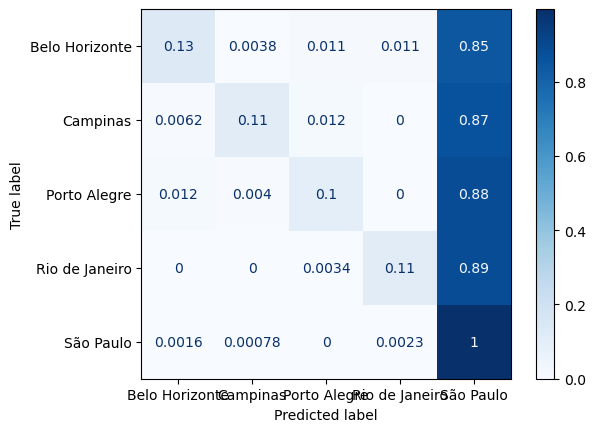

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(clf, ZX, ZY,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

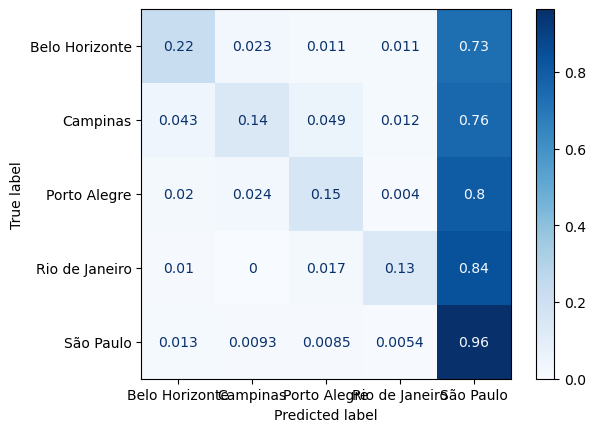

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(clf_ov, ZX, ZY,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

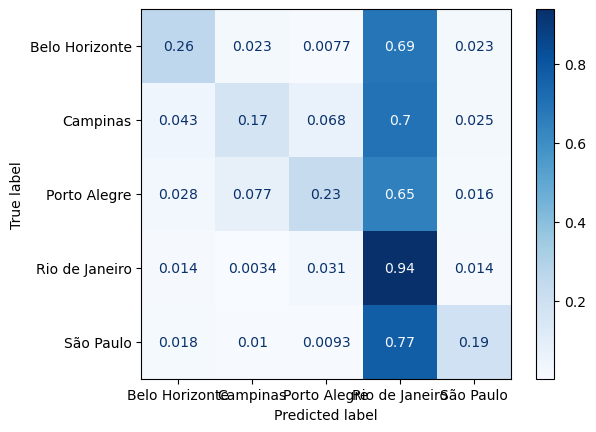

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(clf_co, ZX, ZY,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

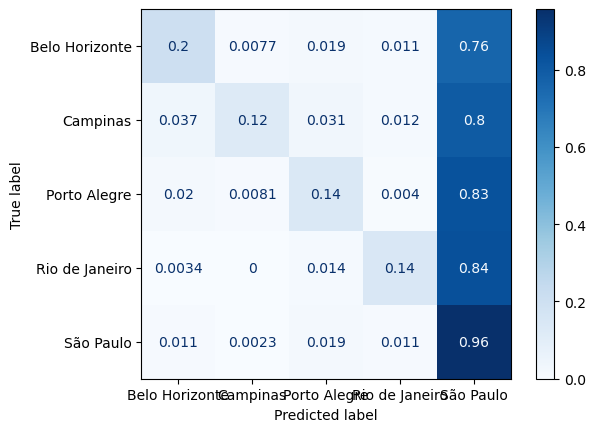

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(clf_un, ZX, ZY,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

## Sem reamostragem : ponderando classes no treinamento

Alguns classificadores possuem a opção `class_weight` (ver documentação para detalhes), que permite calcular pesos com base na quantidade de dados, ou um dicionário com os pesos individuais

### Caso binário

In [ ]:
dbinary = pd.concat([dtrain[dtrain.city=='São Paulo'], dtrain[dtrain.city=='Campinas'].sample(frac=0.4)])
dbinary_test = pd.concat([dtrain[dtrain.city=='São Paulo'], dtrain[dtrain.city=='Campinas'].sample(frac=0.3)])

In [ ]:
dbinary.city.value_counts(1)

São Paulo    0.948927
Campinas     0.051073
Name: city, dtype: float64

In [ ]:
dbinary_test.city.value_counts(1)

São Paulo    0.9612
Campinas     0.0388
Name: city, dtype: float64

In [ ]:
Xb = dbinary[['tax','insurance', 'hoa']]
Yb = dbinary['city']

ZXb = dbinary_test[['tax','insurance', 'hoa']]
ZYb = dbinary_test['city']

#### Logistic Regression

In [ ]:
## classificador caso base
clf_b = LogisticRegression()
clf_b.fit(Xb,Yb)
ZYb_ = clf_b.predict(ZXb)
accb_b = metrics.balanced_accuracy_score(ZYb, ZYb_)

In [ ]:
clf_cw = LogisticRegression(class_weight={'São Paulo':1, 'Campinas':10})
clf_cw.fit(Xb,Yb)
ZYcw_ = clf_cw.predict(ZXb)
accb_cw10 = metrics.balanced_accuracy_score(ZYb, ZYcw_)

In [ ]:
clf_cw = LogisticRegression(class_weight={'São Paulo':1, 'Campinas':100})
clf_cw.fit(Xb,Yb)
ZYcw_ = clf_cw.predict(ZXb)
accb_cw100 = metrics.balanced_accuracy_score(ZYb, ZYcw_)

In [ ]:
clf_bal = LogisticRegression(class_weight='balanced')
clf_bal.fit(Xb,Yb)
ZYbal_ = clf_bal.predict(ZXb)
accb_bal = metrics.balanced_accuracy_score(ZYb, ZYbal_)

In [ ]:
print("Logistic Regression")
print("Acurácia balanceada base: %0.2f" % (accb_b*100))
print("- ponderação classes 1/10: %0.2f" % (accb_cw10*100))
print("- ponderação classes 1/100: %0.2f" % (accb_cw100*100))
print("- parametro balanceamento: %0.2f" % (accb_bal*100))

Logistic Regression
Acurácia balanceada base: 50.00
- ponderação classes 1/10: 76.68
- ponderação classes 1/100: 66.51
- parametro balanceamento: 74.37


#### Classificador LightGBM

In [ ]:
clf_lgbm = lgbm.LGBMClassifier().fit(Xb,Yb)
clf_lgbm_cw10 = lgbm.LGBMClassifier(class_weight={'São Paulo':1, 'Campinas':10}).fit(Xb,Yb)
clf_lgbm_cw100 = lgbm.LGBMClassifier(class_weight={'São Paulo':1, 'Campinas':100}).fit(Xb,Yb)
clf_lgbm_bal = lgbm.LGBMClassifier(class_weight='balanced').fit(Xb,Yb)

In [ ]:
LGB_ZYb_ = clf_lgbm.predict(ZXb)
LGB_ZYcw_ = clf_lgbm_cw10.predict(ZXb)
LGB_ZYcw1_ = clf_lgbm_cw100.predict(ZXb)
LGB_ZYbal_ = clf_lgbm_bal.predict(ZXb)

lgb_b = metrics.balanced_accuracy_score(ZYb, LGB_ZYb_)
lgb_cw = metrics.balanced_accuracy_score(ZYb, LGB_ZYcw_)
lgb_cw1 = metrics.balanced_accuracy_score(ZYb, LGB_ZYcw1_)
lgb_bal = metrics.balanced_accuracy_score(ZYb, LGB_ZYbal_)
print("LightGBM")
print("Acurácia balanceada base: %0.2f" % (lgb_b*100))
print("- ponderação classes 1/10: %0.2f" % (lgb_cw*100))
print("- ponderação classes 1/100: %0.2f" % (lgb_cw1*100))
print("- parametro balanceamento: %0.2f" % (lgb_bal*100))

LightGBM
Acurácia balanceada base: 81.81
- ponderação classes 1/10: 87.23
- ponderação classes 1/100: 87.96
- parametro balanceamento: 87.30


## Resumo

* desbalanceamento também pode ser um problema relevante em bases de dados reais
* ganhos significativos podem ser obtidos por meio de métodos de amostragem
* recomenda-se inicialmente o uso de subamostragem de classes majoritárias ou a ponderação de classes



## <span style="color:darkred">Exercícios - com soluções</span>

In [ ]:
# carregando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn import metrics

# carregando dados
data = pd.read_csv("./dados/houses_to_rent_mba4.csv")

A base de dados a ser utilizada durante todos os exercícios é `houses_to_rent_mba4.csv`.

As alterações feitas em um exercício devem ser mantidas para o próximo exercício, a não ser que expressamente indicado

### Exercício 1)

Inspecione o tipo dos atributos e seus valores, em particular, `city` e `country`. A seguir padronize valores dos atributos do tipo `object` que apareçam como distintos mas que deveriam ser os mesmos. Considere para a correção o valor mais frequente nesse atributo. Por exemplo: se tivermos escrito a seguinte sigla em 3 formas diferentes: `ICMC` (11 ocorrencias), `Icmc` (3 ocorrências), `I.C.M.C.` (2 ocorrências), todas devem ser convertidas para `ICMC`

Quantas linhas relativas a valores da coluna `city` e `country`, respectivamente, estavam fora do padrão e foram corrigidas?

(a) 49 e 2<br>
<font color='red'>(b) 48 e 4<br></font>
(c) 50 e 9<br>
(d) 48 e 54<br>


In [ ]:
def verifica_atributos(df):
    for var in df:
        # imprime variavel e seu tipo
        print(var,":", df[var].dtype.name, end="")
        # se nao numérico
        if not np.issubdtype(df[var].dtype, np.number):
            print("\n\t",df[var].nunique(), "distintos: ", end="")
            print(df[var].unique())
        else:
            print(", intervalo: ",end="")
            print(df[var].min(), ",", df[var].max())

verifica_atributos(data)

Unnamed: 0 : int64, intervalo: 0 , 11767
city : object
	 7 distintos: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte'
 'Brotas' 'Sao Paulo']
area : float64, intervalo: 1.0 , 24606.0
rooms : float64, intervalo: 1.0 , 10.0
bathroom : int64, intervalo: 1 , 25
parking spaces : float64, intervalo: 1.0 , 12.0
floor : object
	 38 distintos: ['7' '20' '6' '2' '1' '-' '4' '3' '10' '11' '24' '0' '9' '8' '--' '17'
 '18' '5' '13' '15' nan '16' '14' '26' '21' '12' '19' '22' '27' '23' '35'
 '110' '25' '46' '28' '32' '29' '301' '51']
hoa : int64, intervalo: 0 , 1117000
rent : int64, intervalo: 200 , 45000
tax : object
	 1230 distintos: ['211' '1750' 'nr' ... '1737' '858' '2110']
insurance : int64, intervalo: 3 , 6000
total : float64, intervalo: 263.5 , 1119892.0
page hits : object
	 290 distintos: ['324' '720' '64' '46' '1548' '396' '240' '756' '2412' '828' '184' '360'
 '540' '1044' '88' '96' '112' '180' '1476' '186' '648' '416' '432' '60'
 '40' '900' '1440' '528' '20' '1116'

Os atributos cidade e país possuem dados não padronizados. Veremos os mais frequentes para substituir.

In [ ]:
data["city"].value_counts()

São Paulo         7098
Rio de Janeiro    1452
Belo Horizonte    1199
Porto Alegre      1148
Campinas           816
Sao Paulo           48
Brotas               7
Name: city, dtype: int64

In [ ]:
data["country"].value_counts()

Brazil    11764
BR            2
Brasil        2
Name: country, dtype: int64

In [ ]:
# padronizando
data.loc[data['city']=='Sao Paulo','city'] = 'São Paulo'
data.loc[data['country']!='Brazil','country'] = 'Brazil'

In [ ]:
data["city"].value_counts()

São Paulo         7146
Rio de Janeiro    1452
Belo Horizonte    1199
Porto Alegre      1148
Campinas           816
Brotas               7
Name: city, dtype: int64

In [ ]:
data["country"].value_counts()

Brazil    11768
Name: country, dtype: int64

---

### Exercício 2)

Inspecione os valores dos atributos `floor` e `tax`, realizando a conversão dos mesmos para o tipo adequado. Para evitar gerar dados faltantes desnecessariamente, verifique primeiro o padrão dos dados errôneos e faltantes, e se possível preencha corretamente alguns desses valores (conforme feito em aula para o atributo `floor`).

OBS: uma forma de inspecionar valores de uma coluna do tipo `object` que podem ser convertidos para dígitos numéricos é executar `dataframe[atributo].astype(str).str.isnumeric()`

Após esse processo, quandos valores faltantes restaram em `floor` e `tax`, respectivamente?

<font color='red'>(a) 13 e 6<br></font>
(b) 78 e 9<br>
(c) 5 e 6<br>
(d) 9 e 13<br>

In [ ]:
# inspecionando valores de floor
print(data.loc[~data['floor'].astype(str).str.isnumeric(), 'floor'].unique())

['-' '--' nan]


In [ ]:
data.loc[data['type'] == 'house', ['floor','type']]

floor   type
5         -  house
15        0  house
19        -  house
20       --  house
23        -  house
...     ...    ...
11763     -  house
11764     -  house
11765     0  house
11766     0  house
11767     0  house

[2664 rows x 2 columns]

In [ ]:
# notamos que os valores não numéricos são casas, assim
# substituiremos todos os valores não convertíveis para digitos por '0'
# note que os nulos (NaNs) não serão alterados para 0
data.loc[~data['floor'].astype(str).str.isnumeric() & data['floor'].notnull(), 'floor'] = '0'
data.loc[:,'floor'] = pd.to_numeric(data.loc[:,'floor'], downcast='integer', errors='coerce')
print(data['floor'].unique())

[  7.  20.   6.   2.   1.   0.   4.   3.  10.  11.  24.   9.   8.  17.
  18.   5.  13.  15.  nan  16.  14.  26.  21.  12.  19.  22.  27.  23.
  35. 110.  25.  46.  28.  32.  29. 301.  51.]


In [ ]:
# inspecionando valores de tax não convertíveis para digitos
print(data.loc[~data['tax'].astype(str).str.isnumeric(), 'tax'].unique())

['nr' '47. 5' '750.9' '140. 5' 'nsa' '107 .12 ' '-' '---' 'nd']


In [ ]:
# notar que o isnumeric não identificou números com casas decimais como convertíveis, mas esses serão convertidos pelo to_numeric.
# note ainda valores com possíveis erros de digitação contendo espaços
# Exemplo:
data.loc[data['tax'] =='47. 5',:]

Unnamed: 0            city  area  rooms  bathroom  parking spaces  floor  \
71          71  Rio de Janeiro  35.0    4.0         3             1.0    0.0   

    hoa  rent    tax  insurance  total page hits  days available  \
71    0   200  47. 5         16  263.5        24              16   

    interactions  weeks available   type country  
71            24                2  house  Brazil

In [ ]:
# corrigindo o valor e convertendo para númerico, atribuindo nan para os demais
data.loc[:,'tax'] = data.loc[:,'tax'].str.replace(' ', '')
data.loc[data['tax'] =='47. 5',:]

Empty DataFrame
Columns: [Unnamed: 0, city, area, rooms, bathroom, parking spaces, floor, hoa, rent, tax, insurance, total, page hits, days available, interactions, weeks available, type, country]
Index: []

In [ ]:
print(data['floor'].unique())
data['tax'] = pd.to_numeric(data.loc[:,'tax'], downcast="float", errors='coerce')

[  7.  20.   6.   2.   1.   0.   4.   3.  10.  11.  24.   9.   8.  17.
  18.   5.  13.  15.  nan  16.  14.  26.  21.  12.  19.  22.  27.  23.
  35. 110.  25.  46.  28.  32.  29. 301.  51.]


In [ ]:
data.loc[71,:]

Unnamed: 0                     71
city               Rio de Janeiro
area                         35.0
rooms                         4.0
bathroom                        3
parking spaces                1.0
floor                         0.0
hoa                             0
rent                          200
tax                          47.5
insurance                      16
total                       263.5
page hits                      24
days available                 16
interactions                   24
weeks available                 2
type                        house
country                    Brazil
Name: 71, dtype: object

In [ ]:
data.isna().sum()

Unnamed: 0            0
city                  0
area                 78
rooms                79
bathroom              0
parking spaces     2965
floor                13
hoa                   0
rent                  0
tax                   6
insurance             0
total                 0
page hits             0
days available        0
interactions          0
weeks available       0
type                  0
country               0
dtype: int64

---
### Exercício 3)

Vamos analisar possíveis atributos redundantes na base de dados. Inspecione as colunas imprimindo quantos valores únicos cada uma possui. Considerando o tamanho da base de dados e esses resultados, quais atributos são redundantes e podem ser removidos sem perda de informação?

(a) parking spaces, country<br>
<font color='red'>(b) country, Unnamed:0</font><br>
(c) country<br>
(d) Unnamed:0<br>

<font color='red'>Resposta</font>: *country possui todos os valores iguais, após padronização, já Unnamed:0 contem a repetição dos índices do dataframe: ambos podem ser removidos sem prejuízo para a análise*

In [ ]:
# inspecionando atributos nao numéricos
for var in data:
    print(var, ' / únicos : ', data[var].unique().shape[0])

Unnamed: 0  / únicos :  11768
city  / únicos :  6
area  / únicos :  509
rooms  / únicos :  11
bathroom  / únicos :  12
parking spaces  / únicos :  10
floor  / únicos :  37
hoa  / únicos :  1620
rent  / únicos :  1172
tax  / únicos :  1226
insurance  / únicos :  218
total  / únicos :  6132
page hits  / únicos :  290
days available  / únicos :  157
interactions  / únicos :  217
weeks available  / únicos :  51
type  / únicos :  2
country  / únicos :  1


In [ ]:
del data['Unnamed: 0']
del data['country']

---

### Exercício 4)

Vamos procurar por outliers na base de dados utilizando um método baseado na dispersão pelo *desvio padrão*. 

Codifique uma função em Python no formato abaixo, que receba por parâmetro um dataframe, uma lista de atributos/variáveis e um fator multiplicador `t` para o desvio padrão.
`def remove_outliers_std(df, attributes, t):`

Essa função deve retornar um dataframe sem os outliers segundo o método do desvio padrão, ou seja, removendo aqueles cujo valor esteja: abaixo da média menos `t` desvios padrões, ou acima da média mais `t` desvios padrões. Formalmente, são outliers valores $x$ tal que $x < \mu - t\sigma$ ou $x > \mu + t\sigma$. A funcao deve processar apenas variáveis numéricas e imprimir na tela a quantidade de outliers encontrados.

Utilize a funcao implementada para remover outliers. Antes faça uma cópia do dataframe, criando um dataframe `data_out` do qual serão removidos outliers dos seguintes atributos:
1. 'insurance' com $t=3.5$
2. considerando a base obtida no passo (1) anterior, para 'total' com $t=2$.
3. considerando a base obtida no passo (2) anterior, para 'rent' com $t=5$

Quantos outliers foram encontrados respectivamente para 'insurance', 'total' e  'rent', nessa ordem?

(a) 19, 6 e 0<br>
(b) 0, 6 e 2<br>
<font color='red'>(c) 19, 6 e 2</font><br>
(d) 19, 0 e 6<br>

In [ ]:
def remove_outliers_std(df, attributes, t):
    
    dfn = df.copy()
    
    for var in attributes:
        # verifica se variável é numerica
        if np.issubdtype(df[var].dtype, np.number):
            crit_std = df[var].std() * t
            mu = df[var].mean()
            
            tot_out = np.sum((df[var] < mu-crit_std) | (df[var] > mu+crit_std))
            
            # apenas inliers segundo std
            dfn = dfn.loc[(df[var] >= mu-crit_std) & (df[var] <= mu+crit_std),:]
            print('%s, mu = %.2f, std = %.2f, outliers = %d' % (var, mu, crit_std/t, tot_out))
            
    return dfn

In [ ]:
data_out = remove_outliers_std(data,['insurance'], 3.5)
data_out = remove_outliers_std(data_out,['total'], 2)
data_out = remove_outliers_std(data_out,['rent'], 5)

insurance, mu = 56.54, std = 97.48, outliers = 19
total, mu = 5585.31, std = 15774.00, outliers = 6
rent, mu = 3997.23, std = 3427.39, outliers = 2


In [ ]:
data_out

city   area  rooms  bathroom  parking spaces  floor   hoa  \
0         São Paulo   70.0    2.0         1             1.0    7.0  2065   
1         São Paulo  320.0    4.0         4             2.0   20.0  1200   
2      Porto Alegre   80.0    1.0         1             1.0    6.0  1000   
3      Porto Alegre   51.0    1.0         1             NaN    2.0   270   
4         São Paulo   25.0    1.0         1             NaN    1.0     0   
...             ...    ...    ...       ...             ...    ...   ...   
11763        Brotas  100.0    1.0         2             1.0    0.0     0   
11764        Brotas  200.0    4.0         2             1.0    0.0     0   
11765     São Paulo  600.0    4.0         5             6.0    0.0     0   
11766     São Paulo  650.0    3.0         3             7.0    0.0     0   
11767     São Paulo  180.0    3.0         2             1.0    0.0     0   

        rent     tax  insurance    total page hits  days available  \
0       3300   211.0         42   5618.0       324              23   
1       4960  1750.0         63   7973.0       720              78   
2       2800     NaN         41   3841.0        64             269   
3       1112    22.0         17   1421.0        46              73   
4        800    25.0         11    836.0      1548              78   
...      ...     ...        ...      ...       ...             ...   
11763    800   116.0         39    955.0       148             127   
11764   1450   226.0         75   1751.0       104              85   
11765  12000  9500.0        181  21681.0       180              42   
11766   8000   834.0        121   8955.0       396              66   
11767   3000   163.0         46   3209.0      1152              87   

       interactions  weeks available   type  
0               108                3   flat  
1               240               11   flat  
2               128               38   flat  
3                92               10   flat  
4               516               11   flat  
...             ...              ...    ...  
11763           148               18  house  
11764           104               12  house  
11765            60                6  house  
11766           132                9  house  
11767           384               12  house  

[11741 rows x 16 columns]

---

### Exercício 5)

Ainda analisando outliers, considerando a base de dados original (antes da remoção no exercício anterior)

Carregue o método $k$-Means utilizando: `from sklearn.cluster import KMeans`

1. Realize análise de agrupamento utilizando os atributos 'rent' e 'days available' e $k=100$ grupos. Utilize o parâmetro `random_state=0` ao criar o modelo
2. Identifique os grupos (clusters) que possuem 5 ou menos pontos
3. Considere todos os pontos pertencentes à esses grupos como candidatos a outliers
    
OBS: ver detalhes do KMeans em [https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html]

Quantos outliers foram encontrados?

(a) 1<br>
(b) 3<br>
<font color='red'>(c) 7</font><br>
(d) 20<br>

c:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de outliers estimados: 7
[ 5811  6248  9370  9747  6150  9814 10312]


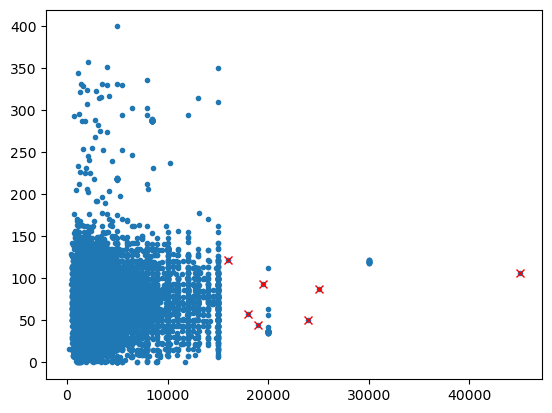

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

X1 = np.array(data['rent'])
X2 = np.array(data['days available'])
X = np.vstack((X1,X2)).T

k = 100
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
outputs = kmeans.labels_
small_clusters = []
outliers = np.array([ ])
for i in range(k):
    if (np.sum(outputs == i) <= 5 ):
        small_clusters.append(i)
        points = np.where(outputs == i)[0]
        outliers = np.concatenate((outliers, points)).astype(int)

n_outl_ = outliers.shape[0]

print('Número de outliers estimados: %d' % n_outl_)

plt.plot(X1, X2,'.')
plt.plot(X1[outliers], X2[outliers],'xr')
plt.show()

---

### Exercício 6)

Considerando o preenchimento de dados faltantes, utilize a base de dados após remover outliers segundo indicado no Exercício 4 `data_out`

Codifique uma funcão que preencha valores faltantes de variáveis numéricas utilizando a média condicionada (ou agrupada) a uma outra variável categórica (não numérica)  C da base. Essa funcao deverá:
1. calcular a média da variável alvo A (a ser preenchida) relativa a cada valor distinto da variável categórica selecionada C, para linhas com valores existentes de A
2. atribuir a média calculada de forma agrupada a todas as linhas cuja variável alvo é faltante e que possua o valor da variável categórica correspondente
3. o valor atribuido deve seguir o mesmo tipo da variável alvo, ou seja, int, float, etc. Quando int, realize o arredondamento utlizando `np.round(,0)`, quando float64 utilize `np.round(,1)`

    Exemplo: podemos preencher a média do imposto (tax) condicionado ao tipo (type) calculando a média do imposto agrupado por cada valor de tipo ('house' e 'flat'), e depois atribuir essas médias aos valores faltantes condicionado ao tipo, ou seja, a média do imposto de todas linhas 'house' é atribuída a todas as propriedades 'house' com 'tax' faltante
    Similarmente, uma propriedade que é do tipo 'flat' e que possui 'tax' faltante, recebe a média de 'tax' entre todas os imóveis marcados com 'flat' para os quais há valor de 'tax'.
    
Use sua funcao para preencher a 'area' condicionado a 'type'. Armazene esse preenchimento num dataframe novo, não afetando os anteriores. Após o preenchimento, qual é a nova média para todas as linhas do atributo 'area', e arredondando para duas casas decimais?

<font color='red'>(a) 145.36</font><br>
(b) 125.45<br>
(d) 131.00<br>
(d) 145.29<br>

In [ ]:
def missing_condmean(df, att, att_cat):
        
    dfn = df.copy()
    print('- preencher ', att, ' condicionado a ', att_cat, end=' : ')
    nullatt = dfn[att].isnull()
    print(np.sum(nullatt), 'faltantes')

    for j in df[att_cat].unique():
        mu_cat = np.round(np.mean(df.loc[df[att_cat]==j, att]),1)
        
        if (df[att_cat].dtypes == np.int64):
            mu_cat = np.round(mu_cat,0)
            
        print('\t %s media = %.1f' % (j, mu_cat))
        dfn.loc[(df[att].isnull()) & (df[att_cat]==j), att] = mu_cat
        
    return dfn

In [ ]:
data_fill = missing_condmean(data_out, 'area', 'type')
data_fill[data_out['area'].isnull()].head()

print('Média do atributo antes do preenchimento: ', np.round(np.mean(data_out.loc[:, 'area']),2))
print('Depois do preenchimento: ', np.round(np.mean(data_fill.loc[:, 'area']),2))

- preencher  area  condicionado a  type : 78 faltantes
	 flat media = 119.9
	 house media = 232.9
Média do atributo antes do preenchimento:  145.3
Depois do preenchimento:  145.36


---

### Exercício 7)

Utilizando a base de dados **antes** da remoção de outliers, elimine todas as linhas duplicadas. Quantas linhas foram removidas?

(a) 0 <br>
<font color='red'>(b) 1270</font><br>
(c) 2018<br>
(d) 1260<br>


In [ ]:
n_antes = data.shape[0]

# removendo duplicatas
data_r = data.drop_duplicates(keep='first')
removidas = n_antes-data_r.shape[0]
print("Linhas removidas: %d" % (removidas))

---

### Exercício 8)

Utilizando a base de dados **após** da remoção de outliers (`data_out`), elimine todas as linhas duplicadas.

(a) 1272<br>
(b) 1<br>
(c) 0<br>
<font color='red'>(d) 1262</font><br>


In [ ]:
n_antes = data_out.shape[0]

# removendo duplicatas
data_outr = data_out.drop_duplicates(keep='first')
removidas = n_antes-data_outr.shape[0]
print("Linhas removidas: %d" % (removidas))

---

### Exercício 9)

Considere o atributo 'type' e analise a distribuicao dos seus valores.

Qual dos procedimentos abaixo é o mais adequado caso desejamos utilizar a variável "type" como variável alvo (de saída) para um modelo de aprendizado?

(a) não é possível utilizar essa variável como saída<br>
(b) considerar o uso de técnicas de subamostragem aleatória para 'house'<br>
<font color='red'>(c) considerar o uso de técnicas de sobreamostragem para 'house'</font><br>
(d) considerar o uso de técnicas de sobreamostragem para 'flat' <br>

<font color='red'>Resposta:</font> *ainda que não fazer nenhum tratamento seja possível, considerar a sobreamostragem de 'house' pode ser importante nesse cenário em que 'house' corresponde a 22% dos dados
    
    

In [ ]:
plt.hist(data_fill['type'])
data_fill['type'].describe()

tot_house = np.sum(data_fill['type']=='house')

print("porcentagem frente ao total: %.4f%%" % ((tot_house/data_fill.shape[0])*100))

---

### Exercício 10)

Considere o atributo 'city' e a distribuicao dos seus valores, desconsiderando a cidade de São Paulo.
Calcule a porcentagem de exemplos da categoria com a *menor* quantidade de dados encontrada com relacao ao total.

Qual dos procedimentos abaixo é o mais adequado caso desejamos utilizar a variável "city" (desconsiderando São Paulo) como variável alvo (de saída) para um modelo de aprendizado?

<font color='red'>(a) não considerar a cidade "Brotas" na análise, e rebalancear as demais com sobreamostragem</font><br>
(b) utilizar a base de dados original, sem tratamento, visto ser uma proporção possível considerando o tamanho das cidades<br>
(c) utilizar o método SMOTE para a classe minoritária apenas<br>
(d) utilizar técnicas de subamostragem para as categorias majoritárias<br>

<font color='red'>Resposta:</font> *ainda que considerar métodos para tratar o desbalanceamento seja possível, Brotas possui 0.6% do total de dados, inviabilizando seu uso frente às demais cidades, sendo recomendado descartá-la. Mesmo o uso de métodos de aumentação/sobreamostragem podem ser inviáveis, ao realizar a combinação de apenas 7 instâncias frente a segunda classe com menor número de instâncias reais, Campinas com mais de 800 exemplos.*

In [ ]:
data_fill.loc[data_fill['city']!='São Paulo', 'city'].value_counts()

In [ ]:
plt.hist(data_fill.loc[data_fill['city']!='São Paulo', 'city'])
print("porcentagem frente ao total dos dados: %.4f%%" % ((tot_brotas/data_fill.shape[0])*100))

## <span style="color:darkred">Avaliação com soluções</span>

In [ ]:
# carregando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn import metrics

# carregando dados
data = pd.read_csv("./dados/pib_mba_avaliacao2023.csv")
data

id   gid                 UF                      nome   Censo  \
0     1406     1  RIO GRANDE DO SUL                 Igrejinha  2010.0   
1     4252     2  RIO GRANDE DO SUL               Três Coroas  2010.0   
2      998     3  RIO GRANDE DO SUL                    Canoas  2010.0   
3     4292     4  RIO GRANDE DO SUL           Sapucaia do Sul  2010.0   
4      991     5  RIO GRANDE DO SUL              São Leopoldo  2010.0   
...    ...   ...                ...                       ...     ...   
5562   150  5564              PIAUÍ        Alagoinha do Piauí  2010.0   
5563  4216  5565              PIAUÍ      Olho D'Água do Piauí  2010.0   
5564   137  5566              PIAUÍ  Passagem Franca do Piauí  2010.0   
5565  3861  5567              PIAUÍ                Barro Duro  2010.0   
5566  2975  5568            SERGIPE   Monte Alegre de Sergipe  2010.0   

               PIB Pop_est_2009  PIB_percapita  classe  desemprego  
0     6.907114e+05        33551   20586.910156       2         5.1  
1     4.102403e+05        24786   16551.289062       2         4.8  
2     1.644448e+07       332056   49523.199219       3         4.6  
3     1.767158e+06       126316   13989.980469       2         4.5  
4     3.302153e+06       211663   15600.990234       2         4.9  
...            ...          ...            ...     ...         ...  
5562  2.727773e+04         7736    3526.080078       1         4.6  
5563  1.029336e+04         2755    3736.250000       1         6.6  
5564  1.441198e+04         4246    3394.250000       1         5.1  
5565  2.505022e+04         6853    3655.370117       1         4.7  
5566  6.975481e+04        13817    5048.479980       1         9.5  

[5567 rows x 10 columns]

Vamos utilizar uma base de dados baixada do IBGE com o PIB per capita para cada município brasileiro, essa base foi modificada para o propósito dos exercícios abaixo e possui as seguintes colunas:
* gid - identificador geográfico do município
* UF - unidade federativa
* nome - nome do município
* Censo - ano do censo relativo aos dados. Notar que houve censo agropecuário em 2007 e censo em 2010
* PIB - total do PIB
* Pop_est_2009 - populacao estimada	
* PIB_percapita - PIB per capita segundo os dados
* Descrição - Descrição do dados
* classe - classe do município
* desemprego - índice de desemprego na cidade no ano do Censo


### Questão 1)

Verifique a distribuição dos valores e tipos dos atributos nas colunas: UF, Censo, Desemprego, PopEst2009 e realize um tratamento de dados considerando:

1. Correção dos dados que for possível inferir o valor verdadeiro, ajustando e padronizando-os. Anote em quais variáveis isso ocorreu. Valores outliers não devem ser removidos/alterados, apenas dados não padronizados ou passíveis de correção. Para campos do tipo string, primeiro passe tudo a caixa alta, e não considere essa operação como correção.
2. Conversão dos atributos cujos valores foram corrigidos no item anterior, e que deveriam ser numéricos, para numérico - inspecione os valores para garantir que a conversão não vá gerar dados faltantes de forma desnecessária, substituindo por numeros os que forem possíveis como por exemplo o atributo "floor" como visto na aula em que substituímos dados por 0. Anote as variáveis em que isso ocorreu.
    
Quais variáveis possuiam valores que precisaram ser padronizados ou corrigidos, e quantos valores em cada uma delas foi possível corrigir?
 
(a) UF (12) <br>
(b) UF (12) e PopEst2009 (2)<br>
<font color='red'>(c) UF (17) e PopEst2009 (4)<br></font>
(d) UF (17), Censo (1), PopEst2009 (1)<br>
(e) UF (12), Desemprego (1), PopEst2009 (2)<br>

<font color='red'>Resposta</font>: *Ver código abaixo. *

---

In [ ]:
data = pd.read_csv("./dados/pib_mba_avaliacao2023.csv")

In [ ]:
def verifica_atributos(df):
    for var in df:
        # imprime variavel e seu tipo
        print(var,":", df[var].dtype.name, end="")
        # se nao numérico
        if not np.issubdtype(df[var].dtype, np.number):
            print("\n\t",df[var].nunique(), "distintos: ", end="")
            print(df[var].unique())
        else:
            print(", intervalo: ",end="")
            print(df[var].min(), ",", df[var].max())

verifica_atributos(data)

id : int64, intervalo: 0 , 5566
gid : int64, intervalo: 1 , 5568
UF : object
	 39 distintos: ['RIO GRANDE DO SUL' 'SÃO PAULO' 'BAHIA' 'BA' 'R.G. DO SUL' 'bahia'
 'TOCANTINS' 'RORAIMA' 'SERGIPE' 'PERNAMBUCO' 'SANTA CATARINA' 'AMAZONAS'
 'ESPIRITO SANTO' 'PIAUÍ' 'ALAGOAS' 'GOIÁS' 'ACRE' 'PIAU'
 'DISTRITO FEDERAL' 'MATO GROSSO' 'piauí' 'amazonas ' 'sergipe ' 'AMAPÁ'
 'MATO GROSSO DO SUL' 'CEARÁ' 'RIO GRANDE DO NORTE' 'MARANHÃO'
 'RIO DE JANEIRO' 'PARÁ' 'MINAS GERAIS' 'PARAÍBA' 'PARANÁ' 'MINAS G.'
 'PARANA ' 'RONDÔNIA' 'PARANA' 'são paulo' 'SP']
nome : object
	 5292 distintos: ['Igrejinha' 'Três Coroas' 'Canoas' ... 'Passagem Franca do Piauí'
 'Barro Duro' 'Monte Alegre de Sergipe']
Censo : float64, intervalo: 2007.0 , 2028.0
PIB : float64, intervalo: 5770.28222656 , 1167951456.0
Pop_est_2009 : object
	 5079 distintos: ['33551' '24786' '332056' ... '7736' '2755' '13817']
PIB_percapita : float64, intervalo: 1929.9699707 , 360815.84375
classe : int64, intervalo: 1 , 5
desemprego : float64, i

In [ ]:
# ajustando 'UF'
print(data['UF'].value_counts())

UFs_data = data['UF'].unique()
#print(data['UF'].unique())

# array com UFs válidas
UFs_valid = np.array(['BAHIA', 'RIO GRANDE DO SUL', 'ESPIRITO SANTO', 'MINAS GERAIS', 'PIAUÍ',
 'GOIÁS', 'PERNAMBUCO', 'PARÁ', 'SERGIPE', 'SÃO PAULO', 'PARAÍBA', 'TOCANTINS',
 'AMAZONAS', 'SANTA CATARINA', 'CEARÁ', 'RORAIMA', 'MARANHÃO', 'RIO DE JANEIRO',
 'MATO GROSSO', 'PARANÁ', 'ALAGOAS', 'MATO GROSSO DO SUL', 'ACRE',
 'RIO GRANDE DO NORTE', 'RONDÔNIA', 'AMAPÁ', 'DISTRITO FEDERAL'])

# listando UFs inválidas
print('\nUFs inválidas')
print(UFs_data[~np.isin(data['UF'].unique(), UFs_valid)])

MINAS GERAIS           852
SÃO PAULO              644
RIO GRANDE DO SUL      495
BAHIA                  412
PARANÁ                 395
SANTA CATARINA         293
GOIÁS                  246
PARAÍBA                223
PIAUÍ                  222
MARANHÃO               217
PERNAMBUCO             186
CEARÁ                  184
RIO GRANDE DO NORTE    167
PARÁ                   143
MATO GROSSO            141
TOCANTINS              139
ALAGOAS                102
RIO DE JANEIRO          92
ESPIRITO SANTO          78
MATO GROSSO DO SUL      78
SERGIPE                 74
AMAZONAS                61
RONDÔNIA                52
ACRE                    22
AMAPÁ                   16
RORAIMA                 15
BA                       3
PARANA                   3
bahia                    2
sergipe                  1
amazonas                 1
piauí                    1
DISTRITO FEDERAL         1
R.G. DO SUL              1
MINAS G.                 1
PARANA                   1
PIAU                     1
s

In [ ]:
linhas_despadronizadas = data[~data.UF.isin(UFs_valid)]
print(f'Número de valores a serem ajustados: {linhas_despadronizadas.shape[0]}')

Número de valores a serem ajustados: 17


In [ ]:
# ajustando UF - passando para caixa alta
data['UF'] = data['UF'].str.upper()

In [ ]:
# removendo espacos
data['UF'] = data['UF'].str.strip()

# tratando casos despadronizados um a um
data.loc[data['UF']=='PARANA', 'UF'] = 'PARANÁ'
data.loc[data['UF']=='PARANA ', 'UF'] = 'PARANÁ'
data.loc[data['UF']=='PIAU', 'UF'] = 'PIAUÍ'
data.loc[data['UF']=='MINAS G.', 'UF'] = 'MINAS GERAIS'
data.loc[data['UF']=='R.G. DO SUL', 'UF'] = 'RIO GRANDE DO SUL'
data.loc[data['UF']=='SP', 'UF'] = 'SÃO PAULO'
data.loc[data['UF']=='BA', 'UF'] = 'BAHIA'

# verificandos se ainda há inválidos
UFs_data = data['UF'].unique()
print(UFs_data[~np.isin(data['UF'].unique(), UFs_valid)])

[]


In [ ]:
# ajustando 'PopEst2009'

# convetendo para numerico em coluna temporaria
data['Pop_est_2009_corr'] = pd.to_numeric(data['Pop_est_2009'], downcast='integer', errors='coerce')

# verificando erros na conversao
print('Valores que apresentaram erros na conversao:')
print(data.loc[data['Pop_est_2009_corr'].isna(), 'Pop_est_2009'])

valores_erros = data.loc[data['Pop_est_2009_corr'].isna()].index

Valores que apresentaram erros na conversao:
671     “+20537”
1082      “3392”
4770      “5948”
5494     “18135”
Name: Pop_est_2009, dtype: object


In [ ]:
print('Valores a serem corrigidos: ', valores_erros.shape[0])

Valores a serem corrigidos:  4


In [ ]:
# removendo aspas
data.loc[valores_erros, 'Pop_est_2009'] = data.loc[valores_erros, 'Pop_est_2009'].str[1:-1]

# removendo atributo/coluna temrporaria
data = data.drop('Pop_est_2009_corr', axis = 1)

### Questão 2)

Recarregue a base de dados.

1. Remova colunas que possuam valores constantes ou redundantes (cujo valor possa ser computado por meio do uso de outras colunas)
2. Exiba, e posteriormente remova muninícipios duplicados (considere apenas as colunas gid, nome, UF e classe para esse fim), mantendo a primeira ocorrência.

Quantas colunas e linhas foram removidas?

(a) 1 coluna, 1 linha<br>
(b) 1 coluna, 2 linhas<br>
(c) 2 colunas, 1 linha<br>
<font color='red'>(d)  2 colunas, 2 linhas</font><br>
(e) 3 colunas, 2 linhas<br>

<font color='red'>Resposta</font>: *o atributo id pode ser removido pois não possui informação útil, já que gid é a coluna de identificação oficial e mencionada na descrição. PIB per Capita é redundante com relação à PIB e População. Removendo as duplicatas, sao 2 colunas e 2 linhas removidas.*

---

In [ ]:
data = pd.read_csv("./dados/pib_mba_avaliacao2023.csv")

In [ ]:
n_data = data.shape
print("Dados antes tratamento %d x %d" % (n_data[0], n_data[1]))

Dados antes tratamento 5567 x 10


In [ ]:
# removendo a coluna PIB_PERCAPITA que pode ser calculada a partir de duas outras
data = data.drop('PIB_percapita', axis = 1)
# id e gID sao redundantes
data = data.drop('id', axis = 1)

In [ ]:
# verificando duplicatas
data[data.duplicated(['nome', 'UF', 'gid', 'classe'], keep="first")]

gid          UF            nome   Censo            PIB Pop_est_2009  \
3473  3475  PERNAMBUCO       Pesqueira     NaN  290683.656250        64454   
3765  3766   SÃO PAULO  Gavião Peixoto  2010.0  165148.078125         4244   

      classe  desemprego  
3473       1         7.6  
3765       3         6.5

In [ ]:
data = data.drop_duplicates(['nome', 'UF', 'gid', 'classe'], keep='first')

In [ ]:
n_tratdup = data.shape
print("Dados após tratamento %d x %d" % (n_tratdup[0], n_tratdup[1]))

Dados após tratamento 5565 x 8


---
### Questão 3)

Vamos analisar possíveis outliers nas colunas numéricas. Utilize o método da análise da dispersão pelo *desvio padrão* e inspecione as colunas 'PIB', 'Pop_est_2009', 'desemprego' e 'classe', procurando por outliers globais para além de 4 desvios padrões com relação à média, i.e. $4\sigma$. Não remova outliers da base de dados, apenas identifique-os.

Antes de verificar os outliers, converta a coluna Pop_est_2009 para numérico, com opção `downcast='integer', errors='coerce'` para tornar faltante (nan) os não convertidos corretamente.

Quantos outliers foram encontrados, respectivamente, para 'PIB', 'Pop_est_2009', 'desemprego' e 'classe'?

(a) 3, 0, 1, 0<br>
(b) 3, 6, 0, 5<br>
(c) 5, 0, 1, 5<br>
(d) 5, 5, 19, 5<br>
<font color='red'>(e) 5, 19, 1, 5<br></font>

In [ ]:
data = pd.read_csv("./dados/pib_mba_avaliacao2023.csv")

In [ ]:
data['Pop_est_2009'] = pd.to_numeric(data['Pop_est_2009'], downcast='integer', errors='coerce')

In [ ]:
def remove_outliers_std(df, attributes, t):
    
    dfn = df.copy()
    
    outliers = []
    for var in attributes:
        # verifica se variável é numerica
        if np.issubdtype(df[var].dtype, np.number):
            crit_std = df[var].std() * t
            mu = df[var].mean()
            
            outl = dfn.loc[(df[var] < mu-crit_std) | (df[var] > mu+crit_std), :]
            tot_out = np.sum((df[var] < mu-crit_std) | (df[var] > mu+crit_std))
            
            # apenas inliers segundo std
            dfn = dfn.loc[(df[var] >= mu-crit_std) & (df[var] <= mu+crit_std),:]
            print('%s, mu = %.2f, std = %.2f, outliers = %d' % (var, mu, crit_std/t, tot_out))
            if tot_out > 0: outliers.append(outl)
        
    return dfn, outliers

In [ ]:
d, o = remove_outliers_std(data,['PIB', 'Pop_est_2009', 'desemprego', 'classe'], 4)

PIB, mu = 861820.31, std = 17669871.56, outliers = 5
Pop_est_2009, mu = 34424.11, std = 201839.54, outliers = 19
desemprego, mu = 6.64, std = 5.68, outliers = 1
classe, mu = 1.52, std = 0.67, outliers = 5


---

### Questão 4)


Imprima o total de valores faltantes na variável 'desemprego'. Em contato com a equipe especialista, fomos informados que uma boa forma de preencher esses valores seria o preenchimento pela média do desemprego no estado referente ao dado faltante. Assim, iremos preencher os valores `nan` de 'desemprego' com as médias agrupadas por 'UF'.

Para isso codifique uma função que deverá:
1. calcular a média de uma variável alvo A (a ser preenchida) relativa a (ou agrupada por) cada valor distinto de uma variável categórica B que se deseja usar para agrupar; no nosso caso A='desemprego' e B='UF';
2. atribuir a média calculada de forma agrupada a todas as linhas cuja variável alvo é faltante e que possua o valor da variável categórica correspondente;
3. garantir que o valor atribuido tenha o mesmo tipo da variável alvo, ou seja, int, float, etc. Quando int, realize o arredondamento utlizando `np.round(,0)`, quando float64 utilize `np.round(,1)`

Realize o preenchimento dos dados faltantes utilizando o método da média agrupada por UF.

Quantos dados faltantes existiam em "desemprego" antes da operação, e qual a média e o desvio padrão dessa variável **após** o preenchimento?

(a) 10 faltantes, média 6.641, desvio padrão 5.678<br>
(b) 11 faltantes, média 6.641, desvio padrão 5.678<br>
(c) 10 faltantes, média 6.644, desvio padrão 5.673<br>
(d) 11 faltantes, média 6.641, desvio padrão 5.678<br>
<font color='red'>(e) 11 faltantes, média 6.644, desvio padrão 5.673<br></font>

<font color='red'>Resposta</font>: *ver código abaixo*


In [ ]:
data = pd.read_csv("./dados/pib_mba_avaliacao2023.csv")

In [ ]:
np.sum(data['desemprego'].isnull())

11

In [ ]:
def missing_condmean(df, att, att_cat):
        
    dfn = df.copy()
    print('- preencher ', att, ' condicionado a ', att_cat, end=' : ')
    nullatt = np.sum(dfn[att].isnull())
    print(nullatt, 'faltantes')

    media = dfn.groupby(att_cat)[att].agg('mean')
    
    for var in df[att_cat].unique():
        print('\t %s media = %.1f' % (var, media[var]))
        dfn.loc[(dfn[att].isnull()) & (dfn[att_cat]==var), att] = np.round(media[var],1)
        
    return dfn

In [ ]:
print("Média, Desvio antes: %.3f, %.3f"%  (np.round(data.loc[:, 'desemprego'].mean(),3),np.round(data.loc[:, 'desemprego'].std(),3)))

Média, Desvio antes: 6.641, 5.678


In [ ]:
data_fill = missing_condmean(data, 'desemprego', 'UF')

- preencher  desemprego  condicionado a  UF : 11 faltantes
	 RIO GRANDE DO SUL media = 4.5
	 SÃO PAULO media = 6.9
	 BAHIA media = 9.1
	 BA media = 9.3
	 R.G. DO SUL media = 3.7
	 bahia media = 9.0
	 TOCANTINS media = 5.9
	 RORAIMA media = 7.6
	 SERGIPE media = 8.4
	 PERNAMBUCO media = 8.7
	 SANTA CATARINA media = 6.8
	 AMAZONAS media = 8.1
	 ESPIRITO SANTO media = 7.6
	 PIAUÍ media = 5.8
	 ALAGOAS media = 9.4
	 GOIÁS media = 4.7
	 ACRE media = 4.1
	 PIAU media = 5.4
	 DISTRITO FEDERAL media = 8.1
	 MATO GROSSO media = 7.2
	 piauí media = 5.0
	 amazonas  media = 7.7
	 sergipe  media = 9.5
	 AMAPÁ media = 12.7
	 MATO GROSSO DO SUL media = 4.5
	 CEARÁ media = 5.3
	 RIO GRANDE DO NORTE media = 9.6
	 MARANHÃO media = 8.3
	 RIO DE JANEIRO media = 8.2
	 PARÁ media = 7.2
	 MINAS GERAIS media = 5.9
	 PARAÍBA media = 9.0
	 PARANÁ media = 4.5
	 MINAS G. media = 5.1
	 PARANA  media = 4.2
	 RONDÔNIA media = 3.2
	 PARANA media = 4.6
	 são paulo media = 5.9
	 SP media = 6.2


In [ ]:
print("Média, Desvio depois: %.3f, %.3f"%  (np.round(data_fill.loc[:, 'desemprego'].mean(),3),np.round(data_fill.loc[:, 'desemprego'].std(),3)))

Média, Desvio depois: 6.644, 5.673


---

### Questão 5)

Desejamos projetar um algoritmo para, por meio dos atributos de entrada 'PIB', 'Pop_est_2009', 'desemprego', classificar se um município pertence à classes 1 ou 2, ou pertence à classes 3, 4 ou 5. Realize os seguintes passos:

1. gere um rótulo/label binário, que é `0` para municípios cujo atributo classe seja 1 ou 2, e `1` para municípios de classe 3, 4 ou 5;
2. Converta a coluna Pop_est_2009 para numérico, com opção `downcast='integer', errors='coerce'` para tornar faltante (nan) os não convertidos corretamente.
3. preencha todos os atributos faltantes da base de dados com o valor `0`;
4. prepare a base de dados de treinamento `X` contendo apenas as colunas 'PIB', 'Pop_est_2009', 'desemprego', e os rótulos `y` binários conforme passo 1, de forma a ser aceito como entrada nas bibliotecas `sklearn` e `imblearn`;
5. gere uma nova base de dados rebalanceada `Xs` e `ys` por meio do método `under_sampling.RandomUnderSampler(random_state=42)` e usando como estratégia subamostrar a classe majoritária a um tamanho proporcional a 2 vezes o tamanho da classe minoritária de forma que fiquem com uma relação 1:2; 
6. treine o classificador 1 do tipo `DecisionTreeClassifier(max_depth=3, random_state=42)` nos dados originais `X`, `y`, e verifique a acurácia balanceada na predição do conjunto de treinamento `X`, i.e. gerando `y_pred = classif1.predict(X)` e computando `balanced_accuracy_score(y, y_pred)`; 
7. treine um novo classificador 2 do tipo `DecisionTreeClassifier(max_depth=3,  random_state=42)` nos dados rebalanceados: `Xs`, `ys`, e verifique a acurácia balanceada na predição no conjunto de treinamento `X`, i.e. gerando `y_pred_s = classif2.predict(X)` e computando `balanced_accuracy_score(y, y_pred_s)`. 

OBS: as duas acurácias são computadas no mesmo conjunto `X` relativo ao conjunto de treinamento original.

Em que intervalo recaem as acurácias balanceadas medidas no conjunto **de treinamento** resultantes do classificador 1 (treinado com dados originais) e do classificador 2 (treinado com dados amostrados)? 

(a) Classificador 1: [65%, 69%],  Classificador 2: [65%, 69%] <br>
<font color='red'>(b) Classificador 1: [65%, 69%],  Classificador 2: [87%, 90%] <br></font>
(c) Classificador 1: [65%, 69%],  Classificador 2: [92%, 95%] <br>
(d) Classificador 1: [86%, 89%],  Classificador 2: [65%, 69%] <br>
(e) Classificador 1: [86%, 89%],  Classificador 2: [87%, 90%] <br>

<font color='red'>Resposta</font>: *ver código abaixo*

In [ ]:
from imblearn import under_sampling
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

data = pd.read_csv("./dados/pib_mba_avaliacao2023.csv")

In [ ]:
data['classe_binaria'] = (data['classe'] >= 3).astype(int)

print("\nQuantidades de cada classe:")
print(data.loc[:, 'classe_binaria'].value_counts())

# pegar contagem da minoritaria
count_min = data.loc[:, 'classe_binaria'].value_counts()[1]


Quantidades de cada classe:
0    5134
1     433
Name: classe_binaria, dtype: int64


In [ ]:
data['Pop_est_2009'] = pd.to_numeric(data['Pop_est_2009'], downcast='integer', errors='coerce')

data = data.fillna(0)

In [ ]:
# prepare base de dados
X = data[['PIB', 'Pop_est_2009', 'desemprego']]
y = data['classe_binaria']

In [ ]:
undersampling_strategy = {0: int(count_min*2)}
undersamp = under_sampling.RandomUnderSampler(sampling_strategy=undersampling_strategy, random_state=42)
Xs, ys = undersamp.fit_resample(X, y)

print(ys.value_counts())

0    866
1    433
Name: classe_binaria, dtype: int64


In [ ]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X,y)
y_pred = clf.predict(X)
print('Balanced Accuracy Original Data: {0:.1f}%'.format(metrics.balanced_accuracy_score(y,y_pred)*100))

Balanced Accuracy Original Data: 67.4%


In [ ]:
clf_bal = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_bal.fit(Xs,ys)
y_pred_bal = clf_bal.predict(Xs)
print('Balanced Accuracy SMOTE Data: {0:.1f}%'.format(metrics.balanced_accuracy_score(ys,y_pred_bal)*100))

Balanced Accuracy SMOTE Data: 89.7%


## <span style="color:darkred">Coleta e Aquisição de Dados</span>

__Conteúdo:__
1. Bases de dados públicas
2. Coleta de dados



__Referência complementar__

DIEZ, David M.; BARR, Christopher D.; CETINKAYA-RUNDEL, Mine. **OpenIntro statistics**. 3.ed. OpenIntro, 2015. Capítulo 1.

***

## Bases de dados públicas

Há **ferramentas de busca e sites** que indexam bases de dados que podem ser utilizados para provas de conceito ou análises iniciais em dados disponíveis publicamente

* Google Dataset Search : https://datasetsearch.research.google.com/
* OpenML : https://www.openml.org/search?type=data
* Kaggle : https://www.kaggle.com/datasets
* UCI : https://archive.ics.uci.edu/ml/index.php


No Brasil temos portais para **dados governamentais abertos**

* Federal: http://www.dados.gov.br/
* Estado de São Paulo: http://catalogo.governoaberto.sp.gov.br/dataset
    * Dados educacionais: https://dados.educacao.sp.gov.br/
    * Outros indicadores: https://www.seade.gov.br/
* Banco central do Brasil: https://dadosabertos.bcb.gov.br/
* Data SUS: https://datasus.saude.gov.br


Formatos comuns:
* Arquivos estruturados: XML, CSV, JSON, XLS, TXT
* Binários: PDF


#### Dados não estruturados:

* *feeds*
* mídias sociais
* sensores

Acesso via: arquivos ou APIs
    
    
### (E)xtract, (T)ransform, (L)oad

É o processo comumente usado em datawarehouses, no qual Extract faz parte da aquisição de dados de diversas fontes. 
* Se utilizam comumente consultas em SQL para obter os dados a serem posteriormente utilizados para modelagem
* Nessa semana vamos também falar um pouco sobre transformação de atributos, mas não no contexto de ETL (que será visto posteriormente em outra disciplina no curso)

---
    
    

## Coleta de Dados

> *the general rule of thumb is: when in doubt, collect the data.*
>
> (a "regra de ouro" é: na dúvida, colete os dados)

#### <font color='blue'>Pontos importantes!</font>

1. Conhecer as limitações éticas e legais


2. Projetar a coleta: 
    * quais dados, seus tipos e como serão coletados?
    * por quanto tempo?
    * qual amostragem é necessária?


3. Considerar o tempo de implementação
    



### *Antes* de começar

#### <font color='blue'>Limitações éticas e legais</font>
    
    
**Regulamentação de dados digitais**

* Desde a GDPR europeia implementada em 2018, a regulação de proteção de dados levou outros países a desenvolver mecanismos legais
    
    https://gdpr.eu/


* No Brasil, iniciou como o conhecido **Marco Civil da Internet**

    * *Lei Geral de Proteção de Dados Pessoais (LGPD)*, lei 13.709 de 2018 http://www.planalto.gov.br/ccivil_03/_Ato2015-2018/2018/Lei/L13709.htm
    
    * *Autoridade Nacional de Proteção de Dados (ANPD)*


**Comitê de Ética**

* A coleta de dados para pesquisa deve ser:
    1. cadastrada na plataforma Brasil 
    http://plataformabrasil.saude.gov.br/
    2. submetida a um comitê de ética em pesquisa
    

* Há diversos comitês de ética em pesquisa, como por exemplo:
    * UFSCar: http://www.propq.ufscar.br/etica/cep/humanos
    * EACH/USP: http://www5.each.usp.br/apresentacao-cep/
    * Unifesp: https://cep.unifesp.br/
    * Unicamp: https://www.prp.unicamp.br/pt-br/cep-comite-de-etica-em-pesquisa



### Planejando a coleta de dados

1. Como coletar?
    * implementar scripts de rastreamento (para *websites*) 
    * montar Google Forms/Survey Monkey
    * implementar sistema de coleta de dados via:
        * aplicativo dedicado
        * jogos (sérios) ou via gamificação
        * redes sociais


2. O que coletar?
    * depende da pergunta que queremos responder
    * quando relacionado a um sistema, é útil listar todas as features do produto ou serviço
    * em negócios: listar todos os interessados (produto, engenharia, marketing, vendas)
        * relevante se os dados serão usados para KPI (indicador chave de desempenho)


3. Projetar a coleta:
    * especificar tipos, valores possíveis e como verificar integridade
    * entrevistar voluntários e envolvidos
    * realizar *brainstroms* e *workshops*
    * plataformas de coleta: rastreamento/*tracking* (transparente), questionário online (explícito, digital), questionário em papel (explícito, não digital)


4. Realizar a coleta
    * fazer estudo piloto para testar a coleta
    * acompanhar a coleta para evitar perda de dados
    * no caso de coleta em papel, recomenda-se dupla digitação com verificação de erros
    


#### Viés em bases de dados

> Good data $>$ Big data

*válido tanto para quantidade de instancias quanto atributos*

---

Um cuidado especial é evitar viés quando coletando/extraindo analisando fontes de dados.

<font color="darkred">As fontes de viés mais comuns são:</font>

* <font color="darkblue">Poucos dados</font>
    - leva a evidências anedotais
    
    <img src="figuras/anedoctal.png"></img>


* <font color="darkblue">Viés de medida</font>
    - uso de um instrumento ou métrica errada
    - pergunta feita de forma errada
        * Lembrar as fontes de dados omissos!


* <font color="darkblue">Viés de amostragem</font>
     - considerado frequentemente o mais perigoso
     - muitos métodos consideram premissas sobre a amostragem
     - frequentemente premissa é i.i.d.
         (independente e identicamente distribuída)


**Amostragem de conveniência ou outro viés de seleção**

<img src="figuras/sampling_bias.png" width=500px></img>
(esq: amostragem representativa, dir: viés de seleção)

---

**Amostragem simples**

<img src="figuras/sampling_simple.png" width=360px></img>

---

**Amostragem estratificada**

<img src="figuras/sampling_strata.png" width=360px></img>

---

**Amostragem agrupada**

<img src="figuras/sampling_cluster.png" width=360px></img>



### Resumo:

* Obter dados públicos é uma alternativa interessante para uma série de aplicações
    * é preciso lidar com diferentes formatos e auditá-los
    * não estruturados são muito mais disponíveis, mas mais difícil de coletar e processar


* Coletar dados 
    * exige **método** e planejamento
    * cuidado com questões legais e éticas
    * cuidado com amostragem



__Conteúdo complementar__

* TED series **can we trust the numbers?** https://www.npr.org/programs/ted-radio-hour/580617765/can-we-trust-the-numbers
    
    Destaques:
    * *How can we tell the good statistics from the bad ones?* Mona Chalabi. https://www.npr.org/2018/01/26/580619306/mona-chalabi-how-can-we-tell-the-good-statistics-from-the-bad-ones
    * *Do Algorithms Perpetuate Human Bias?* Cathy O'Neil https://www.npr.org/2018/01/26/580617998/cathy-oneil-do-algorithms-perpetuate-human-bias


* Williams, William H. *How bad can “good” data really be?.* The American Statistician 32.2 (1978): 61-65. https://www.researchgate.net/profile/Wm_Williams/publication/259529094_How_Bad_Can_Good_Data_Really_Be/links/0deec52c63bb2be889000000.pdf


## <span style="color:darkred">Discretização</span>

## Discretização

Valores contínuos podem representar um desafio na análise de dados

* alguns métodos não permitem o uso de valores contínuos, seja como atributo de entrada ou saída.

* assumir valor contínuo pode ser inviável a depender da quantidade de dados disponíveis e sua cobertura no espaço contínuo


**Discretizar** é criar um novo atributo discreto (com valores finitos e bem definidos) a partir de um atributo contínuo.

* podemos também re-aplicar discretização em dados já discretos, reduzindo a quantidade de valores possíveis

---
   
Vamos usar uma base com dados do PIB e população (dados reais) e outros indicadores (simulados a partir de dados reais) formulada para exemplificar esse conceito, contendo os seguintes atributos:

- gid - identificador geográfico do município
- UF - unidade federativa
- nome - nome do município
- Censo - ano do censo relativo aos dados
- PIB - total do PIB
- pop - populacao em 2009
- classe - classe do município (de 1 a 5)
- desemprego - índice de desemprego na cidade no ano do Censo
- pop_sanea - porcentagem da população servida por saneamento básico 
- expec_vida - expectativa de vida ao nascer no ano de 2017
- pobreza - porcentagem de pessoas em extrema pobreza
- IDH - índice em 2010
- urbaniz - escala de urbanização do município: rural, baixo, médio, alto, muito alto
- dens_pop_urbana - índice de densidade populacional urbana: baixa, média, alta, muito alta
    
    
OBS: desemprego, IDH, pobreza e pop_sanea por município foram simulados com base nos dados reais dos estados

    

In [ ]:
# carregando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# carregando dados
data = pd.read_csv("./dados/municipios_mba.csv")
data

gid         UF            nome   Censo            PIB    pop  classe  \
0      752       ACRE      Acrelândia  2010.0  151120.015625  12241       2   
1      747       ACRE    Assis Brasil  2010.0   48347.300781   5662       1   
2      748       ACRE       Brasiléia  2010.0  194979.828125  20238       1   
3      754       ACRE          Bujari  2010.0   88708.031250   6772       2   
4      751       ACRE        Capixaba  2010.0   89052.679688   9287       1   
...    ...        ...             ...     ...            ...    ...     ...   
5560  1011  TOCANTINS  Tocantinópolis  2010.0  124657.000000  21826       1   
5561  5545  TOCANTINS        Tupirama  2010.0   34883.894531   1474       3   
5562  5546  TOCANTINS      Tupiratins  2010.0   30757.437500   2143       2   
5563  5141  TOCANTINS    Wanderlândia  2010.0   66966.773438   9493       1   
5564  1107  TOCANTINS         Xambioá  2010.0  117627.132812  11099       2   

      desemprego  pop_sanea  expec_vida  pobreza  IDH urbaniz dens_pop_urbana  
0            5.2  33.532382        73.6     19.2  660   rural     muito baixa  
1            5.0  32.252163        74.2     18.9  664   rural     muito baixa  
2            3.0  31.663354        75.3     19.5  667   baixo           média  
3            4.8  33.501357        73.4     19.1  659   rural     muito baixa  
4            4.4  33.431383        75.4     18.1  661   rural     muito baixa  
...          ...        ...         ...      ...  ...     ...             ...  
5560         6.5  28.405306        75.0     12.6  705   rural     muito baixa  
5561         4.6  29.447854        74.8     12.9  694   rural     muito baixa  
5562         7.0  27.172728        74.2     12.6  696   rural     muito baixa  
5563         5.4  27.762133        74.4     12.7  692   rural     muito baixa  
5564         4.9  26.265226        74.3     11.6  695   rural     muito baixa  

[5565 rows x 14 columns]

## Intervalo ou Histograma

Método que usa intervalos (bins) e distribui os elementos para cada intervalo correspondente

Vamos analisar o atributo expec_vida e discretizá-lo utilizando intervalos


[73.6 74.2 75.3 73.4 75.4 72.6 72.5 74.6 73.3 74.8 74.9 74.1 73.7 75.2
 73.1 72.  72.8 71.8 70.6 70.7 73.5 72.7 71.7 70.5 71.4 71.3 71.1 72.4
 71.9 73.  70.9 73.2 71.6 72.1 71.  72.2 70.8 71.5 72.9 71.2 73.8 75.
 74.3 74.4 74.  72.3 75.1 73.9 74.7 74.5 75.6 75.5 79.3 78.  77.8 77.2
 78.6 79.  78.4 77.1 79.4 78.3 77.5 77.9 78.5 77.3 77.  79.8 79.1 77.6
 79.6 79.5 77.7 79.7 77.4 78.8 79.2 78.7 80.  78.1 78.2 78.9 75.7 75.8
 68.7 68.9 68.8 70.2 69.1 69.  70.3 69.8 70.4 69.5 68.6 69.7 69.6 70.1
 69.9 69.4 69.2 70.  69.3 68.5 75.9 76.  76.4 76.6 76.2 76.9 76.1 76.8
 76.5 76.7 76.3 80.5 80.1 79.9 80.4 80.9 80.8 80.6 80.3 80.2 80.7]


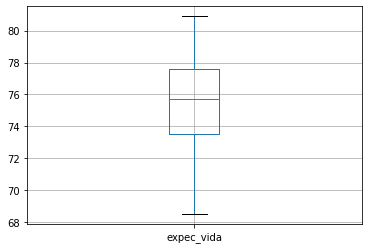

In [ ]:
atts = 'expec_vida'
data.boxplot(atts)
print(data[atts].unique())

Olhando para o histograma, que nos dá a frequência de faixas de valores, é possível observar como os dados estão distribuídos e optar por re-definir os dados com base em novos intervalos.

<AxesSubplot:>

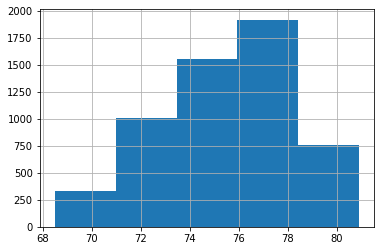

In [ ]:
data[atts].hist(bins=5)

#### Utilizando intervalos fixos e frequência variável

In [ ]:
# copiar original
data_orig = data.copy()

# definir intervalos
interv_idade = np.arange(68,82,3)
print(interv_idade)

# (68-71]
# (71-74]
# (74-77] ....

[68 71 74 77 80]


In [ ]:
# realizar discretizacao e armazenar
expec_vida_disc =  pd.cut(data['expec_vida'], bins=interv_idade)

In [ ]:
data['expec_vida']

0       73.6
1       74.2
2       75.3
3       73.4
4       75.4
        ... 
5560    75.0
5561    74.8
5562    74.2
5563    74.4
5564    74.3
Name: expec_vida, Length: 5565, dtype: float64

In [ ]:
expec_vida_disc

0       (71, 74]
1       (74, 77]
2       (74, 77]
3       (71, 74]
4       (74, 77]
          ...   
5560    (74, 77]
5561    (74, 77]
5562    (74, 77]
5563    (74, 77]
5564    (74, 77]
Name: expec_vida, Length: 5565, dtype: category
Categories (4, interval[int64]): [(68, 71] < (71, 74] < (74, 77] < (77, 80]]

In [ ]:
# inserir nova coluna na pos. 10
data.insert(10, 'expec_vida_disc', expec_vida_disc) 
#data['expec_vida_disc'] = expec_vida_disc

# exibir o tipo da coluna
print(data['expec_vida_disc'].dtype.name)

category


In [ ]:
print(data['expec_vida'].dtype.name)

float64


In [ ]:
# tentando exibir histograma da nova variavel
#data['expec_vida_disc'].hist()

In [ ]:
# para variáveis categoricas podemos usar value_counts
data['expec_vida_disc'].value_counts()

(74, 77]    1999
(77, 80]    1770
(71, 74]    1348
(68, 71]     360
Name: expec_vida_disc, dtype: int64

<AxesSubplot:>

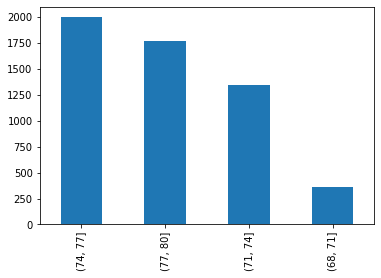

In [ ]:
data['expec_vida_disc'].value_counts().plot(kind='bar')

Ao invés dos rótulos automáticos, podemos nomear os intervalos:

In [ ]:
interv_idade = np.arange(68,82,3)
labels = ['muito baixo', 'baixo', 'médio', 'alto']
print(interv_idade)
print(labels)

[68 71 74 77 80]
['muito baixo', 'baixo', 'médio', 'alto']


In [ ]:
data = data_orig.copy()

# realizar discretizacao e armazenar
expec_vida_disc =  pd.cut(data['expec_vida'], bins=interv_idade, labels=labels)
# inserir nova coluna
data.insert(10, 'expec_vida_disc', expec_vida_disc)

# exibir o tipo da coluna
print(data['expec_vida_disc'].dtype.name)
data['expec_vida_disc'].value_counts()

category


médio          1999
alto           1770
baixo          1348
muito baixo     360
Name: expec_vida_disc, dtype: int64

<AxesSubplot:>

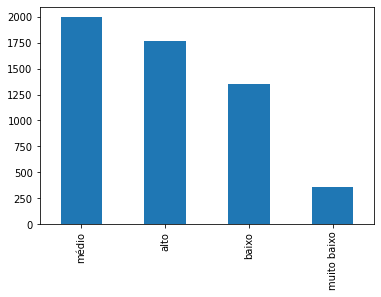

In [ ]:
data['expec_vida_disc'].value_counts().plot(kind='bar')

In [ ]:
print(data.groupby('UF').expec_vida_disc.value_counts())

UF                    
ACRE       médio          12
           baixo          10
           muito baixo     0
           alto            0
ALAGOAS    baixo          87
                          ..
SÃO PAULO  baixo           0
TOCANTINS  baixo          97
           médio          42
           muito baixo     0
           alto            0
Name: expec_vida_disc, Length: 108, dtype: int64


#### Utilizando quantis fixos e frequência balanceada

Pandas ainda permite discretização baseada em **quantis**

<font color="red">Aqui usamos os mesmos rótulos, mas a interpretação será diferente, pois os dados serão definidos por *quantis* e não por intervalos fixos</font>


In [ ]:
labels = ['muito baixo', 'baixo', 'médio', 'alto']

# realizar discretizacao e armazenar
expec_vida_qdisc =  pd.qcut(data['expec_vida'], 4, labels=labels)
# inserir nova coluna
data.insert(11, 'expec_vida_4quant', expec_vida_qdisc)

# exibir o tipo da coluna
print(data['expec_vida_4quant'].value_counts())


baixo          1409
muito baixo    1408
médio          1378
alto           1370
Name: expec_vida_4quant, dtype: int64


In [ ]:
# realizar discretizacao e armazenar
expec_vida_qdisc_nolabel =  pd.qcut(data['expec_vida'], 4)
print(expec_vida_qdisc_nolabel.value_counts())

(73.5, 75.7]      1409
(68.499, 73.5]    1408
(75.7, 77.6]      1378
(77.6, 80.9]      1370
Name: expec_vida, dtype: int64


<AxesSubplot:>

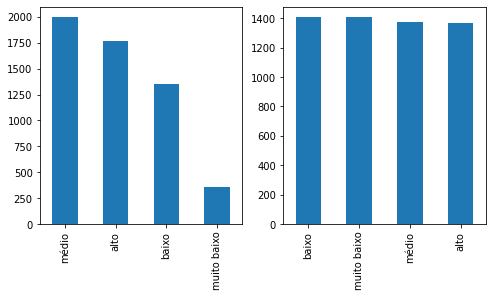

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(121)
data['expec_vida_disc'].value_counts().plot(kind='bar')
plt.subplot(122)
data['expec_vida_4quant'].value_counts().plot(kind='bar')

## Agrupamento

Método que agrupa valores considerando uma ou mais variáveis e considera valores discretos como o rótulo dos grupos.

É fundamental nesse caso:
1. Conhecer o método de agrupamento sendo utilizado e como funciona
2. Entender a distância utilizada para comparar os exemplos, já que algoritmos para análise de agrupamentos são fortemente dependentes da distância utilizada.

Para exemplificar, vamos analisar o atributo expec_vida e discretizá-lo usando o método de agrupamento por Mistura de Gaussianas (Gaussian Mixture), e a distância Euclidiana.

Importante: os rótulos atribuídos aos grupos não necessariamente indicam a ordem numérica da variável original.

In [ ]:
from sklearn.mixture import GaussianMixture

X = np.array(data['expec_vida']).reshape(-1,1)

gmm = GaussianMixture(n_components=4, random_state=10).fit(X)

probs = np.round(gmm.predict_proba(X), 3)

clusters = gmm.predict(X)

[[0.982 0.    0.018 0.   ]
 [0.073 0.001 0.926 0.   ]
 [0.279 0.    0.721 0.   ]
 [0.145 0.    0.854 0.   ]
 [0.087 0.001 0.912 0.   ]
 [0.795 0.    0.205 0.   ]
 [0.99  0.    0.01  0.   ]
 [0.893 0.    0.107 0.   ]
 [0.915 0.    0.085 0.   ]
 [0.915 0.    0.085 0.   ]]
[0 2 2 2 2 0 0 0 0 0]


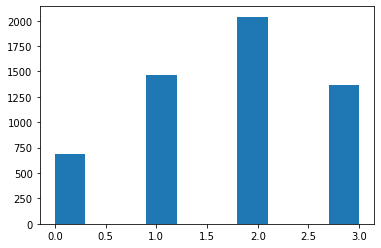

In [ ]:
print(probs[30:40,:])
print(clusters[30:40])

h = plt.hist(clusters)

In [ ]:
# atribuindo a nova variável ao dataframe
data['expec_vida_clu'] = clusters

# verificando como ficou o agrupamento em termos de mínimos e máximos
print(data.groupby('expec_vida_clu').expec_vida.min())
print(data.groupby('expec_vida_clu').expec_vida.max())

expec_vida_clu
0    68.5
1    75.6
2    72.3
3    77.7
Name: expec_vida, dtype: float64
expec_vida_clu
0    72.2
1    77.6
2    75.5
3    80.9
Name: expec_vida, dtype: float64


## E os valores nulos / faltantes?

Temos que tratar caso a caso, pois o principal problema na discretização é estar *indefinido* qual sua ordenação/posição.


## Resumo dos discretizadores + Bônus *sklearn*

<table align="center">
	<thead>
		<tr>
			<th>Função</th>
			<th>Observação</th>
		</tr>
    </thead>
    <tbody>
		<tr>
            <td><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html">cut (pandas)</a></td>
            <td>Cria intervalos de tamanhos iguais mas com frequencias de amostras desiguais em cada intervalo.</td>
        </tr>
		<tr>
            <td><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html">qcut (pandas)</a></td>
            <td>Cria intervalos de tamanhos diferentes mas com frequencia de amostras iguais em cada intervalo.</td>
		</tr>
        <tr>
            <td><a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html">KBinsDiscretizer (sklearn)</a></td>
            <td>Cria intervalos utilizando a estratégia especificada por parâmetro e permite fazer a transformação inversa.</td>
		</tr>
	</tbody>
</table>

In [ ]:
amostra = pd.DataFrame(np.random.normal(loc=50, scale=20, size=50), columns=['value'])

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
kbd = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
amostra['value_bins'] = kbd.fit_transform(amostra[['value']])
print(amostra['value_bins'].value_counts())
print(kbd.bin_edges_)

1.0    19
2.0    14
3.0    10
0.0     7
Name: value_bins, dtype: int64
[array([ 4.70003915, 27.49504335, 50.29004754, 73.08505174, 95.88005594])]


In [ ]:
kbd = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
amostra['value_bins'] = kbd.fit_transform(amostra[['value']])
amostra['value_bins'].value_counts()

0.0    13
3.0    13
1.0    12
2.0    12
Name: value_bins, dtype: int64

In [ ]:
kbd = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans')
amostra['value_bins'] = kbd.fit_transform(amostra[['value']])
amostra['value_bins'].value_counts()

1.0    19
2.0    14
3.0    10
0.0     7
Name: value_bins, dtype: int64

OBS: cuidado novamente com uso de algoritmo de agrupamento, em particular utilizando uma única variável

A vantagem do `KBinsDiscretizer` é que o modelo salva a transformação permitindo inverter

In [ ]:
amostra

value  value_bins
0   35.630459         1.0
1   37.149532         1.0
2   18.750496         0.0
3   78.322693         3.0
4   45.093331         1.0
5   57.701214         2.0
6   74.948639         3.0
7   46.823181         1.0
8    4.700039         0.0
9   11.841320         0.0
10  85.201602         3.0
11  60.215747         2.0
12  58.154496         2.0
13  18.410721         0.0
14  90.296880         3.0
15  25.134751         0.0
16  77.046566         3.0
17  42.439620         1.0
18  41.181004         1.0
19  32.722441         1.0
20  70.700938         2.0
21  28.144580         1.0
22  46.812221         1.0
23  80.763771         3.0
24  41.279675         1.0
25  41.888603         1.0
26  48.160281         1.0
27  37.114188         1.0
28  65.870047         2.0
29  42.083977         1.0
30  65.764232         2.0
31  39.725151         1.0
32  28.685569         1.0
33  73.470585         3.0
34  57.049182         2.0
35  78.064393         3.0
36  68.873210         2.0
37  62.591917         2.0
38  58.735188         2.0
39  62.781805         2.0
40  13.841028         0.0
41  41.435296         1.0
42  41.967482         1.0
43  54.184491         2.0
44  75.936705         3.0
45  68.473686         2.0
46  49.469245         1.0
47  53.955478         2.0
48  95.880056         3.0
49  14.310938         0.0

In [ ]:
amostra['inv_bins'] = kbd.inverse_transform(amostra[['value_bins']])

In [ ]:
amostra

value  value_bins   inv_bins
0   35.630459         1.0  39.473813
1   37.149532         1.0  39.473813
2   18.750496         0.0  16.273774
3   78.322693         3.0  83.635676
4   45.093331         1.0  39.473813
5   57.701214         2.0  61.245707
6   74.948639         3.0  83.635676
7   46.823181         1.0  39.473813
8    4.700039         0.0  16.273774
9   11.841320         0.0  16.273774
10  85.201602         3.0  83.635676
11  60.215747         2.0  61.245707
12  58.154496         2.0  61.245707
13  18.410721         0.0  16.273774
14  90.296880         3.0  83.635676
15  25.134751         0.0  16.273774
16  77.046566         3.0  83.635676
17  42.439620         1.0  39.473813
18  41.181004         1.0  39.473813
19  32.722441         1.0  39.473813
20  70.700938         2.0  61.245707
21  28.144580         1.0  39.473813
22  46.812221         1.0  39.473813
23  80.763771         3.0  83.635676
24  41.279675         1.0  39.473813
25  41.888603         1.0  39.473813
26  48.160281         1.0  39.473813
27  37.114188         1.0  39.473813
28  65.870047         2.0  61.245707
29  42.083977         1.0  39.473813
30  65.764232         2.0  61.245707
31  39.725151         1.0  39.473813
32  28.685569         1.0  39.473813
33  73.470585         3.0  83.635676
34  57.049182         2.0  61.245707
35  78.064393         3.0  83.635676
36  68.873210         2.0  61.245707
37  62.591917         2.0  61.245707
38  58.735188         2.0  61.245707
39  62.781805         2.0  61.245707
40  13.841028         0.0  16.273774
41  41.435296         1.0  39.473813
42  41.967482         1.0  39.473813
43  54.184491         2.0  61.245707
44  75.936705         3.0  83.635676
45  68.473686         2.0  61.245707
46  49.469245         1.0  39.473813
47  53.955478         2.0  61.245707
48  95.880056         3.0  83.635676
49  14.310938         0.0  16.273774

## <span style="color:darkred">Normalização ou Padronização de atributos</span>

### Intervalos de valores de variáveis

Variáveis possuem intervalos diferentes de valores possíveis devido a sua natureza.

A princípio é positivo que tenhamos acesso ao valor real das variáveis, mas a depender do modelo que utilizamos, variáveis de maior magnitude dominam as estatísticas.


In [ ]:
# carregando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# carregando dados
data = pd.read_csv("./dados/municipios_mba.csv")
data.head()

gid    UF          nome   Censo            PIB    pop  classe  desemprego  \
0  752  ACRE    Acrelândia  2010.0  151120.015625  12241       2         5.2   
1  747  ACRE  Assis Brasil  2010.0   48347.300781   5662       1         5.0   
2  748  ACRE     Brasiléia  2010.0  194979.828125  20238       1         3.0   
3  754  ACRE        Bujari  2010.0   88708.031250   6772       2         4.8   
4  751  ACRE      Capixaba  2010.0   89052.679688   9287       1         4.4   

   pop_sanea  expec_vida  pobreza  IDH urbaniz dens_pop_urbana  
0  33.532382        73.6     19.2  660   rural     muito baixa  
1  32.252163        74.2     18.9  664   rural     muito baixa  
2  31.663354        75.3     19.5  667   baixo           média  
3  33.501357        73.4     19.1  659   rural     muito baixa  
4  33.431383        75.4     18.1  661   rural     muito baixa

In [ ]:
for var in data:
     print(var,"- tipo: ", data[var].dtype.name)

gid - tipo:  int64
UF - tipo:  object
nome - tipo:  object
Censo - tipo:  float64
PIB - tipo:  float64
pop - tipo:  int64
classe - tipo:  int64
desemprego - tipo:  float64
pop_sanea - tipo:  float64
expec_vida - tipo:  float64
pobreza - tipo:  float64
IDH - tipo:  int64
urbaniz - tipo:  object
dens_pop_urbana - tipo:  object


Vamos estudar as variáveis abaixo, exibindo seus gráficos de caixa.

<AxesSubplot:>

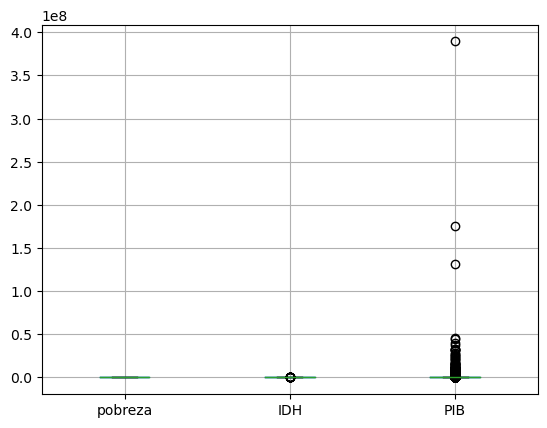

In [ ]:
attrs = ['pobreza', 'IDH', 'PIB']
attrs_cat = ['pobreza', 'IDH', 'PIB', 'UF', 'nome']
data.boxplot(attrs)

Muitos métodos, em especial de aprendizado, utilizam funções de divergência/distância para aprender.

Por exemplo, podemos utilizar a distância Euclidiana entre dois vetores $a$ e $b$ dada por:
$$dEuc(a,b) = \sqrt{\sum^n_{i=1} (a_i - b_i)^2}$$

In [ ]:
# implementando a função
def dEuclidean(a, b):   
    return np.sqrt(np.sum((a - b) ** 2))

Vamos selecionar um grupo de exemplos para comparar

In [ ]:
np.random.seed(2)
select_data = np.random.rand(data.shape[0])<0.0015

# aqui copiamos e resetamos o índice do dataframe
subdata = data[select_data].copy().reset_index()
size = subdata[attrs].shape[0]
print("Exemplos selecionados: ", size)
subdata

Exemplos selecionados:  5


index   gid              UF                  nome   Censo            PIB  \
0   1690  3099    MINAS GERAIS         Campos Gerais  2010.0  240981.671875   
1   2737  2336         PARAÍBA          São Domingos  2010.0   12841.704102   
2   3412  1280           PIAUÍ  Campo Largo do Piauí  2010.0   18738.593750   
3   3468   949           PIAUÍ      Jardim do Mulato  2010.0   14268.646484   
4   4704  5000  SANTA CATARINA                 Xaxim  2010.0  538854.125000   

     pop  classe  desemprego  pop_sanea  expec_vida  pobreza  IDH urbaniz  \
0  27964       1         6.8  76.217741        77.3      4.3  738     NaN   
1   2822       1         9.2  49.034312        74.3     16.9  657     NaN   
2   7035       1         4.6  29.272712        71.4     21.2  643     NaN   
3   4318       1         6.0  29.503772        70.4     21.9  647     NaN   
4  25444       2         8.3  74.267921        79.5      0.9  778     NaN   

  dens_pop_urbana  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN

In [ ]:
# selecionando um exemplo próximo ao primeiro para comparar
ind_0 = subdata.loc[0,'index']
a = np.array(data[attrs].loc[ind_0+2,:])

print("\nExemplo 'a' para comparação: ")
print(data.loc[ind_0+2,attrs_cat])
print("Vetor de atributos: ")
print(a)


Exemplo 'a' para comparação: 
pobreza             5.5
IDH                 732
PIB        28926.710938
UF         MINAS GERAIS
nome              Canaã
Name: 1692, dtype: object
Vetor de atributos: 
[5.50000000e+00 7.32000000e+02 2.89267109e+04]


In [ ]:
# percorremos todos, comparando com 'a'
dists = np.empty(size)
for i in range(size):
    b = np.array(subdata[attrs].loc[i,:])
    dists[i] = dEuclidean(a,b)

print("\nDistancias obtidas entre 'a' e os selecionados: ")
print(np.round(dists,1))


Distancias obtidas entre 'a' e os selecionados: 
[212055.   16085.2  10188.5  14658.3 509927.4]


Vamos agora inspecionar o exemplo relativo à menor distância:

In [ ]:
# argmin retorna a posição com o valor mínimo
print(subdata.loc[np.argmin(dists),attrs_cat])

pobreza                    21.2
IDH                         643
PIB                 18738.59375
UF                        PIAUÍ
nome       Campo Largo do Piauí
Name: 2, dtype: object


Note que foi selecionado um exemplo de outro estado e com valor de IDH  (643 vs 732) e pobreza (21.2 vs 5.5) bastante diferente!

Na verdade, esses atributos tem peso pequeno na distância.

In [ ]:
# vamos zerar esses atributos, e recomputar as distâncias
a[:2] = 0
print("Novo vetor de atributos:")
print(a)

Novo vetor de atributos:
[    0.            0.        28926.7109375]


In [ ]:
dists = np.empty(size)
for i in range(size):
    b = np.array(subdata[attrs].loc[i,:])
    dists[i] = dEuclidean(a,b)

print("\nNovas distâncias e exemplo mais próximo:")
print(np.round(dists,1))
print(subdata.loc[np.argmin(dists),attrs_cat])


Novas distâncias e exemplo mais próximo:
[212056.2  16098.4  10208.4  14672.4 509928. ]
pobreza                    21.2
IDH                         643
PIB                 18738.59375
UF                        PIAUÍ
nome       Campo Largo do Piauí
Name: 2, dtype: object


---

## Normalização

Há várias formas de normalização e sua escolha depende também do cenário.

Alguns desses métodos também são chamados de *scalers*, reescalamento de atributos ou *feature (re)scaling*

1. min-max
2. pela média
3. robusta (por quantis)
3. $z$-score (*whitening*, *standard scaler*)
4. Normas:
    * L1 (ou de soma unitária)
    * L2
    * L$\infty$ (ou pelo máximo)


### Min-max

Gera um atributo $x'$ num novo intervalo $[a,b]$

$$x' = a+\frac{[x-\min(x)](b-a)}{\max(x)-\min(x)}$$

para $[0,1]$
 
$$x' = \frac{x-\min(x)}{\max(x)-\min(x)}$$

### Média

Gera um atributo $x´$ centralizado com relação a média, em que $\bar{x}$ é a média entre todos os valores de $x$

$$x' = \frac{x-\bar{x}}{\max(x)-\min(x)}$$


### Robusta

Gera um atributo $x$ centralizado com relação a mediana, e normalizado com relação aos valores dos percentis 75 e 25

$$x' = \frac{x-\operatorname{median}(x)}{Q_{75}(x)-Q_{25}(x)}$$

### Padronização $z$-score (*whitening*)

Gera um atributo $x$ centralizado com relação a média e cujo desvio padrão passa a ser unitário

$$x' = \frac{x-\bar{x}}{\sigma},$$
$\bar{x}$ é a média entre todos os valores de $x$,

$\sigma$ é o desvio padrão calculado a partir de $x$



--- 



### Normas

São mais comumente usadas para normalizar *instâncias* e não *atributos*

**Norma L1 ou de soma unitária**

Gera um atributo $x$ cuja soma dos valores é unitária. Isso permite por exemplo interpretar o atributo como um vetor distribuição de probabilidade.

$$x' = \frac{x}{||x_i||},$$
$||x_i||$ é a norma do vetor $x$.

Calculada pela soma dos valores absolutos $||x_i|| = \sum_i |x_i|$, essa normalização é também chamada de norma L1 pois é a norma considerada no denominador. 

Temos ainda outras opções:

**norma L2 (ou Euclidiana)**
$$x' = \frac{x}{||x_i||_2},$$
    sendo $||x_i||_2 = \sqrt{\sum^n_{i=1} x_i^2}$, 



**norma L$\infty$ (ou Infinita, ou Chessboard)**
$$x' = \frac{x}{||x_i||_\infty},$$

sendo $||x_i||_\infty = \max_i(x_i)$, 

---

Vamos calcular o $z$-score das variáveis e recomputar as distâncias!

In [ ]:
attrs

['pobreza', 'IDH', 'PIB']

In [ ]:
# percorrendo variáveis e normalizando
# pelo método z-score
for var in attrs:
    # computa média e desvio padrao
    var_mean = data[var].mean()
    var_sigm = data[var].std()

    # computa normalização
    var_norm = (data[var] - var_mean) / var_sigm

    # novo nome e variável normalizada
    newvar = var + '_z'
    data[newvar] = var_norm

# descrevendo os novos atributos
attrs_n = ['pobreza_z', 'IDH_z', 'PIB_z']    
attrs_cat_n = ['pobreza_z', 'IDH_z', 'PIB_z', 'UF', 'nome']   
data[attrs_n].describe()

pobreza_z         IDH_z         PIB_z
count  4.730000e+03  5.565000e+03  5.565000e+03
mean   9.604896e-16  4.793410e-16  6.581288e-17
std    1.000000e+00  1.000000e+00  1.000000e+00
min   -1.245828e+00 -1.212018e+01 -9.081290e-02
25%   -8.979751e-01 -7.829776e-01 -8.566745e-02
50%   -6.145397e-01  2.767312e-01 -7.902384e-02
75%    9.185886e-01  5.963259e-01 -5.921052e-02
max    2.181165e+00  1.925167e+00  6.125307e+01

In [ ]:
np.random.seed(2)
select_data = np.random.rand(data.shape[0])<0.0015
subdata = data[select_data].copy().reset_index()
size = subdata.shape[0]
print("Exemplos selecionados: ", size)

Exemplos selecionados:  5


In [ ]:
# selecionando um exemplo próximo ao primeiro para comparar
ind_0 = subdata.loc[0,'index']
a = np.array(data[attrs_n].loc[ind_0+2,:])

print("\nExemplo 'a' para comparação: ")
print(data.loc[ind_0+2,attrs_cat_n])
print("Vetor de atributos: ")
print(a)


Exemplo 'a' para comparação: 
pobreza_z       -0.627423
IDH_z            0.310373
PIB_z           -0.087164
UF           MINAS GERAIS
nome                Canaã
Name: 1692, dtype: object
Vetor de atributos: 
[-0.62742308  0.31037276 -0.08716414]


In [ ]:
# argmin retorna a posição com o valor mínimo
print(subdata.loc[np.argmin(dists),attrs_cat_n])

pobreza_z                1.395276
IDH_z                   -1.186676
PIB_z                   -0.088769
UF                          PIAUÍ
nome         Campo Largo do Piauí
Name: 2, dtype: object


In [ ]:
dists = np.empty(size)
for i in range(size):
    b = np.array(subdata[attrs_n].loc[i,:])
    dists[i] = dEuclidean(a,b)

print("\nDistancias obtidas entre 'a' e os selecionados: ")
print(np.round(dists,1))


Distancias obtidas entre 'a' e os selecionados: 
[0.2 1.9 2.5 2.6 1. ]


In [ ]:
print(subdata.loc[np.argmin(dists),attrs_cat], '\n')
print(data[attrs_cat].loc[ind_0+2,:])

pobreza              4.3
IDH                  738
PIB        240981.671875
UF          MINAS GERAIS
nome       Campos Gerais
Name: 0, dtype: object 

pobreza             5.5
IDH                 732
PIB        28926.710938
UF         MINAS GERAIS
nome              Canaã
Name: 1692, dtype: object


Uma **desvantagem** da normalização é que os valores perdem a semântica original.

Por exemplo, o que significa uma pobreza de -0.78 ?

Por isso é conveniente manter os atributos originais para depois interpretar os resultados

### <font color="blue">Em experimentos envolvendo treinamento e teste:</font> 

A normalização deve ser **calculada no treinamento**, e depois apenas **aplicada** no teste

Por exemplo, no caso da $z$-score:
* os valores da média e desvio padrão devem ser calculados no treinamento, 
* depois aplicados para normalizar o(s) exemplo(s) de teste

Vamos selecionar um subconjunto maior para mostrar essa ideia, sendo que o exemplo $a$ para comparação será considerado exemplo de teste.

Aqui vamos calcular a normalização apenas no subconjunto.

In [ ]:
# reselecionando dados, agora um pouco mais!
np.random.seed(3)
select_data = np.random.rand(data.shape[0])<0.01
subdata = data[select_data].copy()

# vamos remover linhas com nulos e resetar o índice!
subdata = subdata.dropna().reset_index()
size = subdata.shape[0]
print("Exemplos selecionados: ", size)
subdata


Exemplos selecionados:  11


index   gid              UF                    nome   Censo  \
0     218  4858           BAHIA                 Anguera  2010.0   
1     244  4834           BAHIA              Belo Campo  2010.0   
2     315  4399           BAHIA              Crisópolis  2010.0   
3     357  4476           BAHIA               Ibirataia  2010.0   
4     555   113           BAHIA              São Felipe  2010.0   
5     582   183           BAHIA            Souto Soares  2010.0   
6     663  1561           CEARÁ                   Cedro  2010.0   
7     860  1467  ESPIRITO SANTO                   Piúma  2010.0   
8    1283  1743        MARANHÃO                  Raposa  2010.0   
9    5433  5488       TOCANTINS  Aparecida do Rio Negro  2010.0   
10   5505   587       TOCANTINS            Muricilândia  2010.0   

              PIB    pop  classe  desemprego  pop_sanea  expec_vida  pobreza  \
0    26372.318359   9826       1        10.3  48.376886        73.9     17.5   
1    54279.222656  15185       1         8.7  51.105803        73.5     18.2   
2    85858.242188  20279       1         9.0  51.088871        74.1     16.7   
3   104637.359375  24544       1        10.1  50.641199        74.8     17.5   
4    80595.312500  20952       1         8.0  50.838526        74.0     18.0   
5    53800.070312  19407       1        10.1  50.903280        72.3     16.9   
6    90544.523438  25591       1         6.5  43.265475        74.6     18.3   
7   127082.007812  17212       1         8.3  73.872039        79.5      4.2   
8   100919.585938  25837       1         6.4  26.969824        69.3     26.1   
9    40615.371094   4200       2         7.0  27.491647        73.8     11.7   
10   29540.205078   2958       2         6.4  28.840913        74.4     11.5   

    IDH urbaniz dens_pop_urbana  pobreza_z     IDH_z     PIB_z  
0   661   rural     muito baixa   0.918589 -0.883902 -0.087567  
1   659   rural     muito baixa   1.008773 -0.917544 -0.083169  
2   655   rural     muito baixa   0.815521 -0.984827 -0.078193  
3   661   rural     muito baixa   0.918589 -0.883902 -0.075234  
4   663   rural     muito baixa   0.983006 -0.850261 -0.079023  
5   655   rural     muito baixa   0.841288 -0.984827 -0.083245  
6   687   rural     muito baixa   1.021656 -0.446562 -0.077455  
7   742   baixo           baixa  -0.794908  0.478581 -0.071698  
8   644   médio           baixa   2.026564 -1.169855 -0.075820  
9   696   rural     muito baixa   0.171350 -0.295175 -0.085322  
10  694   rural     muito baixa   0.145583 -0.328817 -0.087067

In [ ]:
# percorrendo variáveis e normalizando
means = []
stds = []
for var in attrs:
    var_mean = subdata[var].mean()
    var_sigm = subdata[var].std()
    # computa normalização
    var_norm = (subdata[var] - var_mean) / var_sigm
    # novo nome e variável normalizada
    newvar = var + '_z'
    subdata[newvar] = var_norm
    
    # guardando valores da normalização
    means.append(var_mean)
    stds.append(var_sigm)

# selecionando um exemplo próximo ao primeiro para comparar
ind_0 = subdata.loc[0,'index']
a = np.array(data[attrs].loc[ind_0+2,:])

print("\nExemplo 'a' para comparação: ")
print(data.loc[ind_0+2, attrs_cat])
print(" - Vetor de atributos: ")
print(a)

anorm = (a-means)/stds
print(" - Vetor de atributos normalizado: ")
print(anorm)

dists = np.empty(size)
print('- Vetor de atributos de teste: ')
for i in range(size):
    b = np.array(subdata[attrs_n].loc[i,:])
    print(b)
    dists[i] = dEuclidean(anorm,b)

print("\n*Exemplo mais próximo")
# argmin retorna a posição com o valor mínimo
print(subdata.loc[np.argmin(dists),attrs_cat])


Exemplo 'a' para comparação: 
pobreza               17.4
IDH                    657
PIB           52209.539062
UF                   BAHIA
nome       Antônio Cardoso
Name: 220, dtype: object
 - Vetor de atributos: 
[1.74000000e+01 6.57000000e+02 5.22095391e+04]
 - Vetor de atributos normalizado: 
[ 0.24569143 -0.61136435 -0.60122108]
- Vetor de atributos de teste: 
[ 0.26395228 -0.46978523 -1.37812957]
[ 0.39177823 -0.54057479 -0.53898704]
[ 0.11786548 -0.6821539   0.41057362]
[ 0.26395228 -0.46978523  0.9752495 ]
[ 0.35525653 -0.39899568  0.25232073]
[ 0.15438718 -0.6821539  -0.55339484]
[0.41003908 0.45047899 0.55148706]
[-2.16474073  2.39719178  1.65014554]
[ 1.83438536 -1.07149646  0.86345846]
[-0.795177    0.76903199 -0.9498502 ]
[-0.8316987   0.69824244 -1.28287326]

*Exemplo mais próximo
pobreza            16.9
IDH                 655
PIB        53800.070312
UF                BAHIA
nome       Souto Soares
Name: 5, dtype: object


**Observe** que o vetor de características poder gerar valores abaixo de -1 ou acima de 1, o que não ocorreu anteriormente quando o exemplo que comparamos foi utilizado no cálculo da normalização.

<font color="red">A informação da normalização não pode vazar do teste para o treinamento!</font>

Uma consequência possível é que, mesmo normalizando o treinamento para um determinado intervalo, ex: [-1,1], no teste podemos observar valores *fora* desse intervalo.
* Se soubermos o que é esperado numa variável é possível minimizar isso, por exemplo considerando valores de mínimo e máximo para além dos presentes no treinamento

### Normalizadores no *sklearn*

<table align="center">
	<thead>
		<tr>
			<th>Tipo</th>
			<th>Intervalo</th>
			<th>Média</th>
			<th>Desv. Padrão</th>
			<th>Observação</th>
		</tr>
    </thead>
    <tbody>
		<tr>
			<td>MinMaxScaler </td>
			<td>$[a,b]$*</td>
			<td>Varia</td>
			<td>Varia</td>
            <td>Restringe o intervalo e mantem a distribuição dos dados. É sensivel à outliers.</td>
		</tr>
		<tr>
			<td>StandardScaler</td>
			<td>Varia</td>
			<td>$0$</td>
			<td>$1$</td>
			<td>Não restringe o intervalo e transforma para a Distribuição Normal Padrão. É sensivel à outliers.</td>
		</tr>
		<tr>
			<td>RobustScaler</td>
			<td>Varia</td>
			<td>$0$*</td>
			<td>$1$*</td>
			<td>Não restringe o intervalo e transforma para média zero. É tolerante à outliers.</td>
		</tr>
		<tr>
			<td>Normalizer</td>
			<td>Varia</td>
			<td>Varia</td>
			<td>Varia</td>
			<td>Transforma a norma para $1$ para cada exemplo* e não para cada coluna.</td>
		</tr>
	</tbody>
</table>

* consultar [documentação oficial](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)

<table align="center">
	<thead>
		<tr>
			<th>Tipo</th>
			<th>Quando usar?</th>
		</tr>
    </thead>
    <tbody>
		<tr>
			<td>MinMaxScaler </td>
			<td>Quando os limites (sup. e inf.) dos dados são conhecidos</td>
        </tr>
		<tr>
			<td>StandardScaler</td>
			<td>Quando é necessário transformar o atributo em uma distribuição normal padrão<br>(assumindo que os dados já seguem um distribuição normal), podendo distorcer a distancia relativa entre os dados.<br>Além disso, alguns algoritmos esperam que essa transformação seja feita previamente.</td>
		</tr>
		<tr>
			<td>RobustScaler</td>
			<td>Similar ao StandardScaler, mas usado quando queremos que os outliers não tenham muita influência</td>
		</tr>
		<tr>
			<td>Normalizer</td>
			<td>1. Quando queremos simplificar calculos (e.g. distancia coseno, projeções, angulos)<br>2. Quando queremos oferecer estabilidade númerica (e.g. gradient descent, expectation maximization, regularization)<br>3. Quando queremos intepretar vetor como distribuição de probabilidades</td>
		</tr>
	</tbody>
</table>

**Algoritmos que comumente esperam dados normalizados/padronizados** (lista não exaustiva)

* LinearRegression
* KNeighborsRegressor
* PCA
* LinearDiscriminantAnalysis
* MLPRegressor
* SVC



### Resumo:

* Normalizar pode ser fundamental para obter modelos que consideram todos os atributos de forma equilibrada

* O método deve considerar as características dos dados

* Apenas o conjunto de *treinamento* deve ser usado para computar os parâmetros da normalização

## <span style="color:darkred">Transformação de atributos</span>

## Distribuições de variáveis

Variáveis possuem distribuições diferentes de valores possíveis devido a sua natureza.

O senso comum vai assumir que temos uma das distribuições abaixo:

* uniforme

* normal

... e que correlações são sempre:

* lineares

Mas isso nem sempre acontece!

Pode ser útil transformar as variáveis para permitir melhor analisar os dados, inclusive suas correlações em particular com dados de natureza **exponencial**


In [ ]:
# carregando as bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from scipy.stats import norm, skew, skewnorm
from sklearn.preprocessing import PowerTransformer

import seaborn as sns
import matplotlib.pyplot as plt

# carregando dados
data = pd.read_csv("./dados/municipios_mba.csv")
data.head()

gid    UF          nome   Censo            PIB    pop  classe  desemprego  \
0  752  ACRE    Acrelândia  2010.0  151120.015625  12241       2         5.2   
1  747  ACRE  Assis Brasil  2010.0   48347.300781   5662       1         5.0   
2  748  ACRE     Brasiléia  2010.0  194979.828125  20238       1         3.0   
3  754  ACRE        Bujari  2010.0   88708.031250   6772       2         4.8   
4  751  ACRE      Capixaba  2010.0   89052.679688   9287       1         4.4   

   pop_sanea  expec_vida  pobreza  IDH urbaniz dens_pop_urbana  
0  33.532382        73.6     19.2  660   rural     muito baixa  
1  32.252163        74.2     18.9  664   rural     muito baixa  
2  31.663354        75.3     19.5  667   baixo           média  
3  33.501357        73.4     19.1  659   rural     muito baixa  
4  33.431383        75.4     18.1  661   rural     muito baixa

Vamos estudar as variáveis abaixo, exibindo seus gráficos de caixa.

<AxesSubplot:>

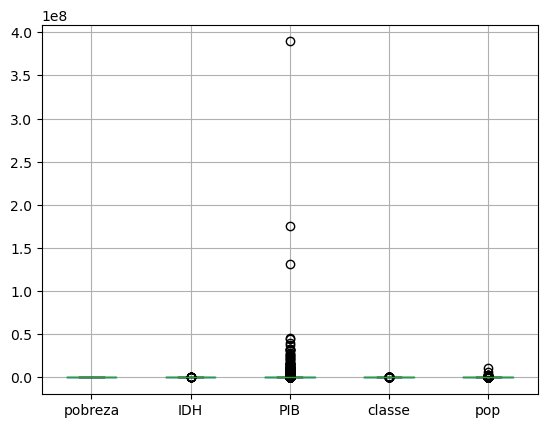

In [ ]:
attrs = ['pobreza', 'IDH', 'PIB', 'classe', 'pop']
attrs_cat = attrs + ['UF', 'nome']
data.boxplot(attrs)

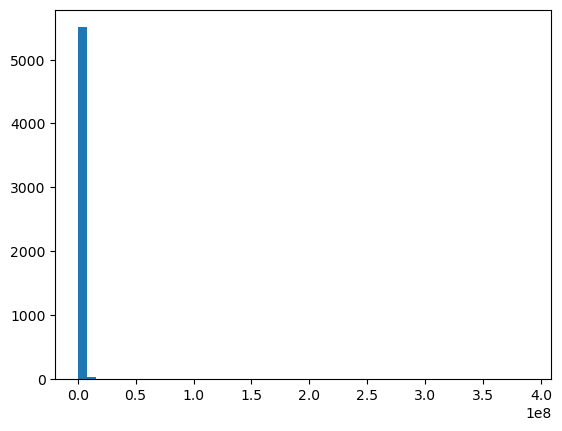

In [ ]:
h = plt.hist(data['PIB'], bins=50)

Parece difícil entender a variável PIB!

Talvez se aplicarmos uma transformação **logaritmica**!

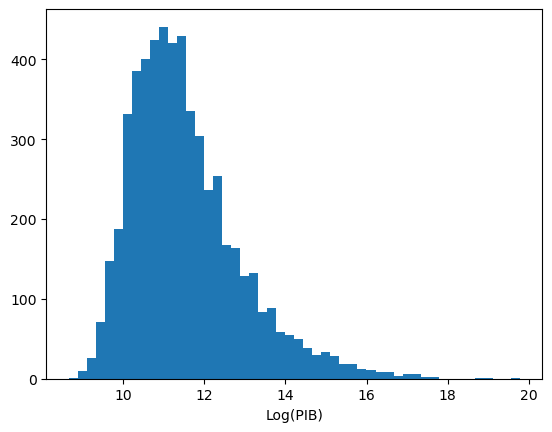

In [ ]:
x_PIB = np.array(data['PIB'])

h = plt.hist(np.log(x_PIB+1), bins=50); plt.xlabel('Log(PIB)')

data['Log_PIB'] = np.log(x_PIB+1)

O log é o inverso da função exponencial e assim, isso busca linearizar os dados exponenciais.

<AxesSubplot:>

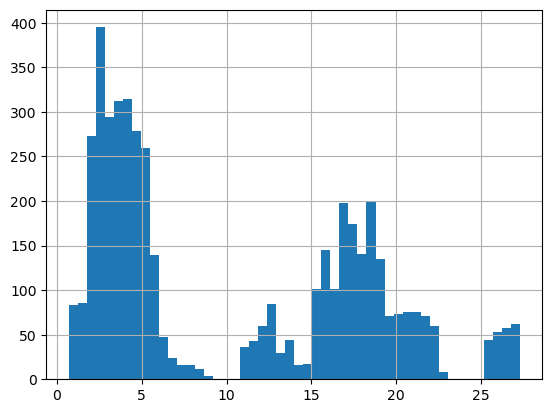

In [ ]:
data['pobreza'].hist(bins=50)

<AxesSubplot:>

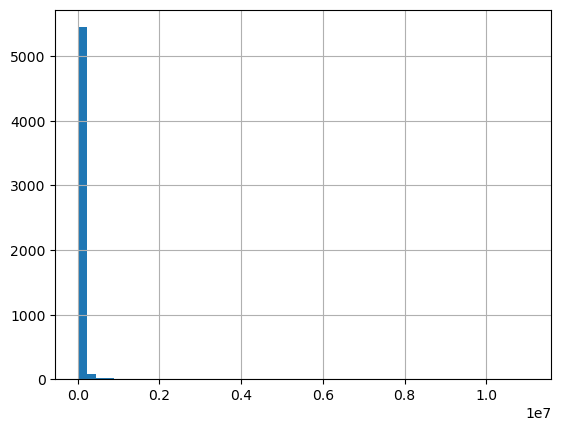

In [ ]:
data['pop'].hist(bins=50)

Outra função comumente utilizada (essa para linearizar dados de natureza quadrática),  é a **raiz quadrada.**

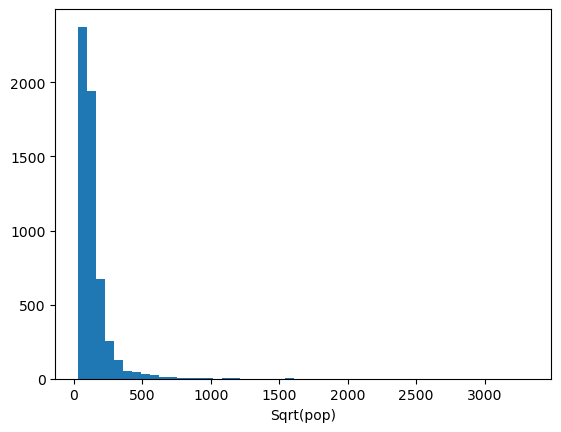

In [ ]:
x_pop = np.array(data['pop'])
h = plt.hist(np.sqrt(x_pop), bins=50);
plt.xlabel('Sqrt(pop)')

data['Sqrt_pop'] = np.sqrt(x_pop)
attrs = attrs + ['Sqrt_pop']

In [ ]:
data['Log_pop'] = np.log(x_pop+1)

Text(0.5, 0, 'Log(pop)')

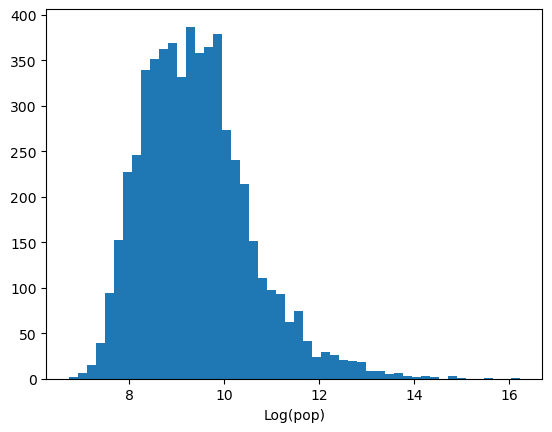

In [ ]:
h = plt.hist(data['Log_pop'], bins=50);
plt.xlabel('Log(pop)')

<AxesSubplot:xlabel='pop', ylabel='PIB'>

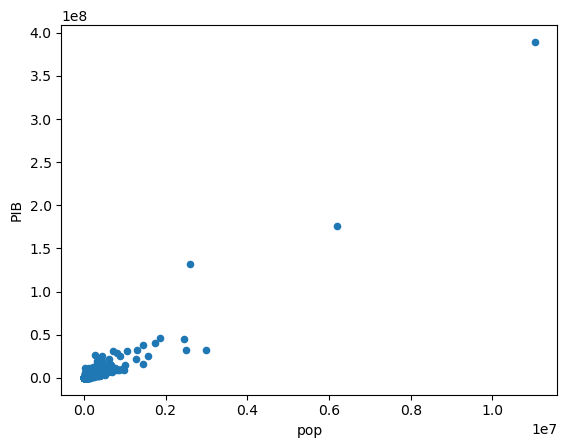

In [ ]:
data.plot.scatter(x='pop', y='PIB')

<AxesSubplot:xlabel='Log_pop', ylabel='Log_PIB'>

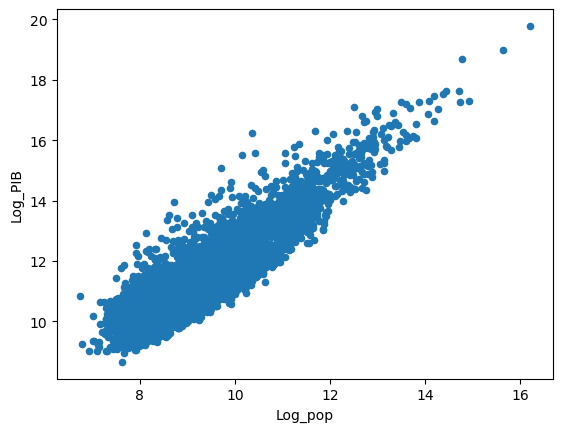

In [ ]:
data.plot.scatter(x='Log_pop', y='Log_PIB')

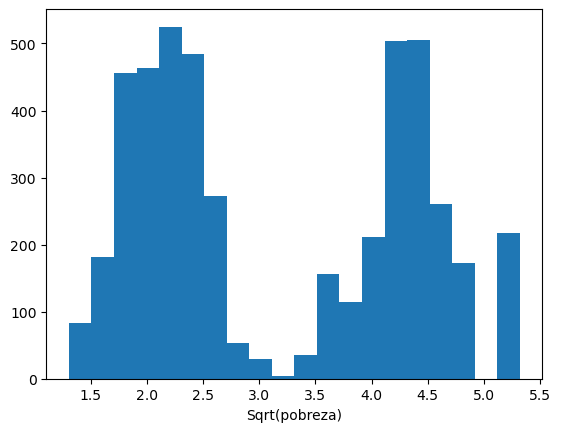

In [ ]:
x_pobreza = np.array(data['pobreza'])
h = plt.hist(np.sqrt(x_pobreza+1), bins=20);
plt.xlabel('Sqrt(pobreza)')

data['Sqrt_pobreza'] = np.sqrt(x_pobreza)

In [ ]:
attrs = attrs + ['Log_pop', 'Log_PIB']
data[attrs].corr()

pobreza       IDH       PIB    classe       pop  Sqrt_pop  \
pobreza   1.000000 -0.941545 -0.048598 -0.495783 -0.023310  0.010594   
IDH      -0.941545  1.000000  0.049281  0.417682  0.027717  0.007833   
PIB      -0.048598  0.049281  1.000000  0.134895  0.951643  0.644769   
classe   -0.495783  0.417682  0.134895  1.000000  0.108764  0.153494   
pop      -0.023310  0.027717  0.951643  0.108764  1.000000  0.777576   
Sqrt_pop  0.010594  0.007833  0.644769  0.153494  0.777576  1.000000   
Log_pop   0.102731 -0.066512  0.271101  0.077594  0.386149  0.828615   
Log_PIB  -0.250301  0.216077  0.291274  0.517440  0.375140  0.765424   

           Log_pop   Log_PIB  
pobreza   0.102731 -0.250301  
IDH      -0.066512  0.216077  
PIB       0.271101  0.291274  
classe    0.077594  0.517440  
pop       0.386149  0.375140  
Sqrt_pop  0.828615  0.765424  
Log_pop   1.000000  0.862196  
Log_PIB   0.862196  1.000000

<AxesSubplot:xlabel='pobreza', ylabel='IDH'>

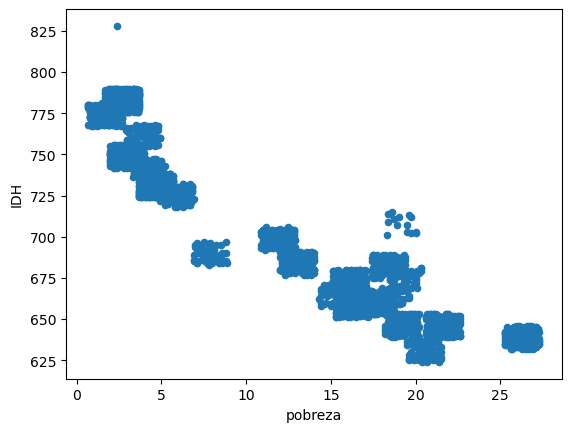

In [ ]:
data.plot.scatter(x='pobreza', y='IDH')

<AxesSubplot:xlabel='Sqrt_pobreza', ylabel='IDH'>

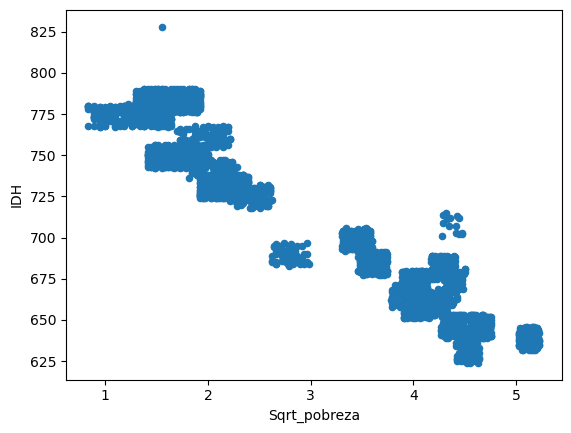

In [ ]:
data.plot.scatter(x='Sqrt_pobreza', y='IDH')

### Importante

- Em muitos casos, mais de uma função de transformação pode atingir o mesmo objetivo
- Outras funções como (*e.g.* tan, exp) também podem ser usadas


### Assimetria (obliquidade ou *skewness*)

Intervalos de assimetria são simplificações que podem facilitar o entendimento com relação à normalidade dos dados

- assimetria $\sim0$: Normalmente distribuida (ou perfeitamente simétrica)
- assimetria $< 0$: Maior concentração de dados na cauda esquerda da densidade
- assimetria $> 0$: Maior concentração de dados na cauda direita da densidade
<table>
    <thead>
        <tr>
            <th width="200px">Intervalos</th>
            <th>Descrição</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>$[-0.5, 0.5]$</td>
            <td>Aproximadamente simétrica</td>
        </tr>
        <tr>
            <td>$[-1.0,-0.5]$ ou $[0.5,1.0]$</td>
            <td>Moderadamente assimétrica</td>
        </tr>
        <tr>
            <td>$[-∞,-1.0]$ ou $[1.0,∞]$</td>
            <td>Altamente assimétrica</td>
        </tr>
    </tbody>
</table>

In [ ]:
normal = np.random.normal(loc=0, scale=1, size=1000)

low_pos = skewnorm.rvs(a=1, loc=0, scale=1, size=1000)
low_neg = skewnorm.rvs(a=-1, loc=0, scale=1, size=1000)

mid_pos = skewnorm.rvs(a=3, loc=0, scale=1, size=1000)
mid_neg = skewnorm.rvs(a=-3, loc=0, scale=1, size=1000)

high_pos = skewnorm.rvs(a=20, loc=0, scale=1, size=1000)
high_neg = skewnorm.rvs(a=-20, loc=0, scale=1, size=1000)

Text(0.5, 1.0, 'Sk.=1.02 (Alta)')

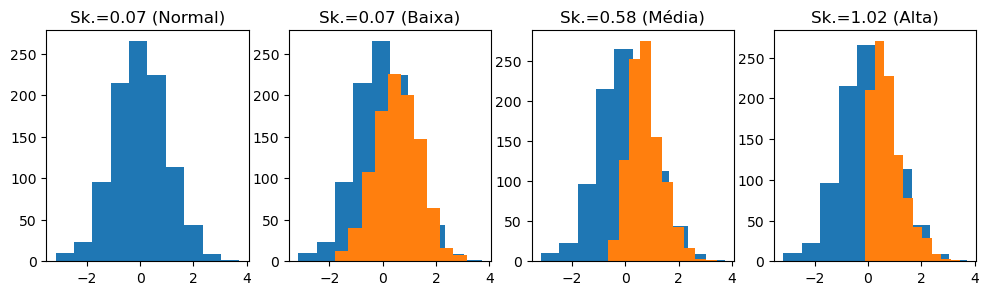

In [ ]:
plt.figure(figsize=(12,3))
plt.subplot(141)
plt.hist(normal);#plt.hist(low_pos)#;plt.hist(low_neg)
plt.title('Sk.={:.2f} (Normal)'.format(skew(normal)))
plt.subplot(142)
plt.hist(normal);plt.hist(low_pos)#; plt.hist(high_neg)
plt.title('Sk.={:.2f} (Baixa)'.format(skew(low_pos)))
plt.subplot(143)
plt.hist(normal);plt.hist(mid_pos)#; plt.hist(mid_neg)
plt.title('Sk.={:.2f} (Média)'.format(skew(mid_pos)))
plt.subplot(144)
plt.hist(normal);plt.hist(high_pos)#; plt.hist(high_neg)
plt.title('Sk.={:.2f} (Alta)'.format(skew(high_pos)))

### Transformações
<table>
    <thead>
        <tr>
            <th width="100px">Nível</th>
            <th width="150px">Assimetria Positiva</th>
            <th width="200px">Assimetria Negativa</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Baixa</td>
            <td>$\sqrt{x + c}$</td>
            <td>$\sqrt{\max(x+c) - x}$</td>
        </tr>
        <tr>
            <td>Moderada</td>
            <td>$log_{10}~x + c$</td>
            <td>$log_{10}~{\max(x+c) - x}$</td>
        </tr>
        <tr>
            <td>Alta</td>
            <td>$\frac{1}{x + c}$</td>
            <td>$\frac{1}{\max(x+c) - x}$</td>
        </tr>
    </tbody>
</table>

In [ ]:
low_pos_tf = np.sqrt(low_pos + 3)
mid_pos_tf = np.log10(mid_pos + 3)
high_pos_tf = 1 / (high_pos + 3)

Text(0.5, 1.0, 'Sk.=-0.36 (Alta)')

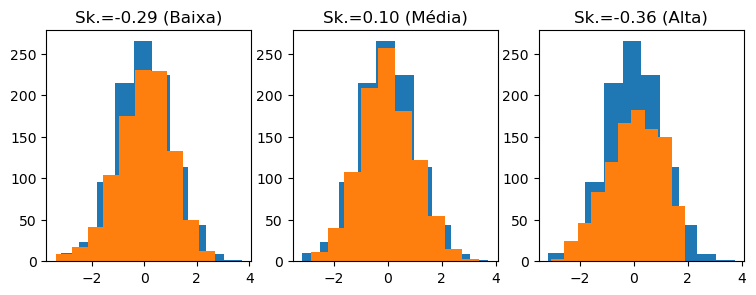

In [ ]:
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.hist(normal);plt.hist(scale(low_pos_tf))
plt.title('Sk.={:.2f} (Baixa)'.format(skew(low_pos_tf)))
plt.subplot(132)
plt.hist(normal);plt.hist(scale(mid_pos_tf))
plt.title('Sk.={:.2f} (Média)'.format(skew(mid_pos_tf)))
plt.subplot(133)
plt.hist(normal);plt.hist(scale(high_pos_tf))
plt.title('Sk.={:.2f} (Alta)'.format(skew(high_pos_tf)))

### Powertransformer (*sklearn*)

Método para transformação automática para distribuições assimétricas. 

Não deve ser usado de forma cega, mas tem bons resultados em geral

Box-Cox: exige dados positivos<br>
Yeo-Johnson: permite dados negativos

In [ ]:
df = pd.DataFrame({
    'low_pos': low_pos,
    'low_neg': low_neg,
    'mid_pos': mid_pos,
    'mid_neg': mid_neg,
    'high_pos': high_pos,
    'high_neg': high_neg
})

pf = PowerTransformer(method='yeo-johnson', standardize=True) # ou box-cox

df_tf = pf.fit_transform(df[df.columns])

low_pos_tf = df_tf[:,0]
low_neg_tf = df_tf[:, 1]

mid_pos_tf = df_tf[:, 2]
mid_neg_tf = df_tf[:, 3]

high_pos_tf = df_tf[:, 4]
high_neg_tf = df_tf[:, 5]

Text(0.5, 1.0, 'Sk.=0.04 (Alta)')

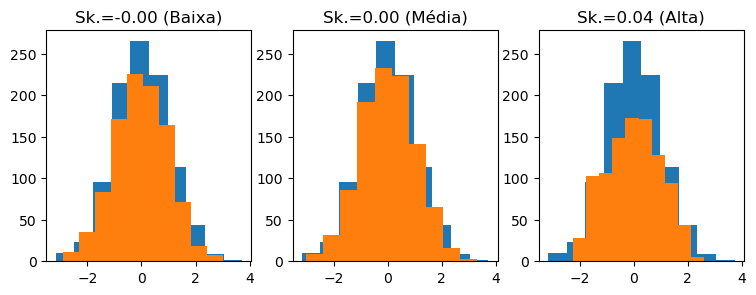

In [ ]:
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.hist(normal);plt.hist(scale(low_pos_tf))
plt.title('Sk.={:.2f} (Baixa)'.format(skew(low_pos_tf)))
plt.subplot(132)
plt.hist(normal);plt.hist(scale(mid_pos_tf))
plt.title('Sk.={:.2f} (Média)'.format(skew(mid_pos_tf)))
plt.subplot(133)
plt.hist(normal);plt.hist(scale(high_pos_tf))
plt.title('Sk.={:.2f} (Alta)'.format(skew(high_pos_tf)))

### Resumo:

* Encontrar transformações nos atributos permite novas interpretações, para além do que temos como intuição 

* Transformações não excluem a limpeza e tratamento de dados 

* Transformações podem funcionar como geradores de novos atributos

* A assimetria pode ser usada para estudar as distribuições, e planejadas transformações para obter dados mais próximos de distribuições normais

## <span style="color:darkred">Codificação de Variáveis Categóricas</span>

## Variáveis categóricas

Variáveis categóricas, geralmente expressas por meio de texto, não são utilizáveis diretamente por parte dos modelos estatísticos e computacionais.

Obter codificações numéricas dessas variáveis se torna importante para permitir análise por um número mais amplo de ferramentas


In [ ]:
# carregando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# carregando dados
data_orig = pd.read_csv("./dados/municipios_mba.csv")
data_orig.head()

gid    UF          nome   Censo            PIB    pop  classe  desemprego  \
0  752  ACRE    Acrelândia  2010.0  151120.015625  12241       2         5.2   
1  747  ACRE  Assis Brasil  2010.0   48347.300781   5662       1         5.0   
2  748  ACRE     Brasiléia  2010.0  194979.828125  20238       1         3.0   
3  754  ACRE        Bujari  2010.0   88708.031250   6772       2         4.8   
4  751  ACRE      Capixaba  2010.0   89052.679688   9287       1         4.4   

   pop_sanea  expec_vida  pobreza  IDH urbaniz dens_pop_urbana  
0  33.532382        73.6     19.2  660   rural     muito baixa  
1  32.252163        74.2     18.9  664   rural     muito baixa  
2  31.663354        75.3     19.5  667   baixo           média  
3  33.501357        73.4     19.1  659   rural     muito baixa  
4  33.431383        75.4     18.1  661   rural     muito baixa

Vamos estudar a variável `urbaniz`, juntamente com `IDH` e `pop_sanea` apenas para visualizar

In [ ]:
data = data_orig.copy()

# definindo variáveis
attrs = ['urbaniz', 'IDH', 'pop_sanea']

for var in attrs:
    print(var, '-', data[var].dtype)

# eliminando valores nulos
data = data.dropna(subset=attrs)
data

urbaniz - object
IDH - int64
pop_sanea - float64


gid         UF            nome   Censo            PIB    pop  classe  \
0      752       ACRE      Acrelândia  2010.0  151120.015625  12241       2   
1      747       ACRE    Assis Brasil  2010.0   48347.300781   5662       1   
2      748       ACRE       Brasiléia  2010.0  194979.828125  20238       1   
3      754       ACRE          Bujari  2010.0   88708.031250   6772       2   
4      751       ACRE        Capixaba  2010.0   89052.679688   9287       1   
...    ...        ...             ...     ...            ...    ...     ...   
5560  1011  TOCANTINS  Tocantinópolis  2010.0  124657.000000  21826       1   
5561  5545  TOCANTINS        Tupirama  2010.0   34883.894531   1474       3   
5562  5546  TOCANTINS      Tupiratins  2010.0   30757.437500   2143       2   
5563  5141  TOCANTINS    Wanderlândia  2010.0   66966.773438   9493       1   
5564  1107  TOCANTINS         Xambioá  2010.0  117627.132812  11099       2   

      desemprego  pop_sanea  expec_vida  pobreza  IDH urbaniz dens_pop_urbana  
0            5.2  33.532382        73.6     19.2  660   rural     muito baixa  
1            5.0  32.252163        74.2     18.9  664   rural     muito baixa  
2            3.0  31.663354        75.3     19.5  667   baixo           média  
3            4.8  33.501357        73.4     19.1  659   rural     muito baixa  
4            4.4  33.431383        75.4     18.1  661   rural     muito baixa  
...          ...        ...         ...      ...  ...     ...             ...  
5560         6.5  28.405306        75.0     12.6  705   rural     muito baixa  
5561         4.6  29.447854        74.8     12.9  694   rural     muito baixa  
5562         7.0  27.172728        74.2     12.6  696   rural     muito baixa  
5563         5.4  27.762133        74.4     12.7  692   rural     muito baixa  
5564         4.9  26.265226        74.3     11.6  695   rural     muito baixa  

[1870 rows x 14 columns]

vamos verificar a distribuição dos dados que temos:

array([[<AxesSubplot:title={'center':'IDH'}>,
        <AxesSubplot:title={'center':'pop_sanea'}>]], dtype=object)

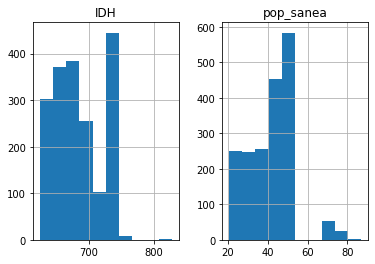

In [ ]:
data[attrs].hist()

A variável do tipo "objeto" é categórica para fins semânticos.

Por isso é preciso agregar `urbaniz` para plotar o histograma.

OBS: em pandas há um tipo "category" que funciona de forma diferente, veremos abaixo.


array(['rural', 'baixo', 'médio', 'muito alto', 'alto'], dtype=object)

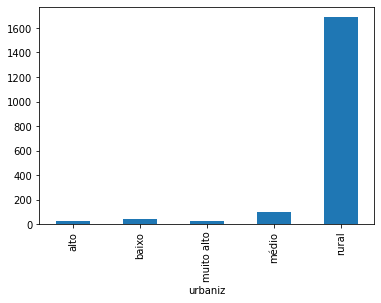

In [ ]:
data.groupby('urbaniz').size().plot(kind='bar')
data['urbaniz'].unique()

Há várias possibilidades para mapear valores categóricos em numéricos. 

#### Categóricos nominais

Casos em que não há relação de ordenação entre os elementos, podemos usar código ordenado de forma alfabética.

Nulos são representados por -1

**1. usando código associado ao tipo category (pandas)**


In [ ]:
data['urban_cod'] = data['urbaniz'].astype("category").cat.codes
data

gid         UF            nome   Censo            PIB    pop  classe  \
0      752       ACRE      Acrelândia  2010.0  151120.015625  12241       2   
1      747       ACRE    Assis Brasil  2010.0   48347.300781   5662       1   
2      748       ACRE       Brasiléia  2010.0  194979.828125  20238       1   
3      754       ACRE          Bujari  2010.0   88708.031250   6772       2   
4      751       ACRE        Capixaba  2010.0   89052.679688   9287       1   
...    ...        ...             ...     ...            ...    ...     ...   
5560  1011  TOCANTINS  Tocantinópolis  2010.0  124657.000000  21826       1   
5561  5545  TOCANTINS        Tupirama  2010.0   34883.894531   1474       3   
5562  5546  TOCANTINS      Tupiratins  2010.0   30757.437500   2143       2   
5563  5141  TOCANTINS    Wanderlândia  2010.0   66966.773438   9493       1   
5564  1107  TOCANTINS         Xambioá  2010.0  117627.132812  11099       2   

      desemprego  pop_sanea  expec_vida  pobreza  IDH urbaniz dens_pop_urbana  \
0            5.2  33.532382        73.6     19.2  660   rural     muito baixa   
1            5.0  32.252163        74.2     18.9  664   rural     muito baixa   
2            3.0  31.663354        75.3     19.5  667   baixo           média   
3            4.8  33.501357        73.4     19.1  659   rural     muito baixa   
4            4.4  33.431383        75.4     18.1  661   rural     muito baixa   
...          ...        ...         ...      ...  ...     ...             ...   
5560         6.5  28.405306        75.0     12.6  705   rural     muito baixa   
5561         4.6  29.447854        74.8     12.9  694   rural     muito baixa   
5562         7.0  27.172728        74.2     12.6  696   rural     muito baixa   
5563         5.4  27.762133        74.4     12.7  692   rural     muito baixa   
5564         4.9  26.265226        74.3     11.6  695   rural     muito baixa   

      urban_cod  
0             4  
1             4  
2             1  
3             4  
4             4  
...         ...  
5560          4  
5561          4  
5562          4  
5563          4  
5564          4  

[1870 rows x 15 columns]

Uma desvantagem é que usamos um critério numérico arbitrário (ordem alfabética), no qual diferença entre os códigos pode não ter sentido.

Exemplo, na codificação acima a diferença absoluta entre os códigos para: "rural" e "média" é 1
- O que isso significa?

**2. usando map() por meio de dicionário**

Outra opção, mais genérica, é utilizar um mapa.

Abaixo vamos usar de 0 até 4, sendo 0 = rural e 4 = muito alto

In [ ]:
cat_urban = data['urbaniz'].unique()
cat_urban

array(['rural', 'baixo', 'médio', 'muito alto', 'alto'], dtype=object)

In [ ]:
num_urban = np.arange(cat_urban.shape[0])
print(cat_urban)
print(num_urban)

['rural' 'baixo' 'médio' 'muito alto' 'alto']
[0 1 2 3 4]


In [ ]:
map_urban = dict(zip(cat_urban, num_urban))
print("\nDicionário:")
print(map_urban)


Dicionário:
{'rural': 0, 'baixo': 1, 'médio': 2, 'muito alto': 3, 'alto': 4}


A partir do dicionário podemos criar um mapa entre os valores existentes e novos valores, agora numéricos.

Essa opção é uma das mais rápidas.

In [ ]:
data['urban_map'] = data['urbaniz'].map(map_urban)
data

gid         UF            nome   Censo            PIB    pop  classe  \
0      752       ACRE      Acrelândia  2010.0  151120.015625  12241       2   
1      747       ACRE    Assis Brasil  2010.0   48347.300781   5662       1   
2      748       ACRE       Brasiléia  2010.0  194979.828125  20238       1   
3      754       ACRE          Bujari  2010.0   88708.031250   6772       2   
4      751       ACRE        Capixaba  2010.0   89052.679688   9287       1   
...    ...        ...             ...     ...            ...    ...     ...   
5560  1011  TOCANTINS  Tocantinópolis  2010.0  124657.000000  21826       1   
5561  5545  TOCANTINS        Tupirama  2010.0   34883.894531   1474       3   
5562  5546  TOCANTINS      Tupiratins  2010.0   30757.437500   2143       2   
5563  5141  TOCANTINS    Wanderlândia  2010.0   66966.773438   9493       1   
5564  1107  TOCANTINS         Xambioá  2010.0  117627.132812  11099       2   

      desemprego  pop_sanea  expec_vida  pobreza  IDH urbaniz dens_pop_urbana  \
0            5.2  33.532382        73.6     19.2  660   rural     muito baixa   
1            5.0  32.252163        74.2     18.9  664   rural     muito baixa   
2            3.0  31.663354        75.3     19.5  667   baixo           média   
3            4.8  33.501357        73.4     19.1  659   rural     muito baixa   
4            4.4  33.431383        75.4     18.1  661   rural     muito baixa   
...          ...        ...         ...      ...  ...     ...             ...   
5560         6.5  28.405306        75.0     12.6  705   rural     muito baixa   
5561         4.6  29.447854        74.8     12.9  694   rural     muito baixa   
5562         7.0  27.172728        74.2     12.6  696   rural     muito baixa   
5563         5.4  27.762133        74.4     12.7  692   rural     muito baixa   
5564         4.9  26.265226        74.3     11.6  695   rural     muito baixa   

      urban_cod  urban_map  
0             4          0  
1             4          0  
2             1          1  
3             4          0  
4             4          0  
...         ...        ...  
5560          4          0  
5561          4          0  
5562          4          0  
5563          4          0  
5564          4          0  

[1870 rows x 16 columns]

Note que, mesmo ordenado, as diferenças podem ainda não fazer sentido.
- Aqui caso a diferença entre os códigos de "rural" e "média" é 2: o que isso quer dizer?

#### Categóricos ordinais

Para cenários em que as categorias podem ser ordenadas, como notas, faixas salariais, escalas, podemos usar ordenação categórica:

In [ ]:
cat_ord_urban = ['rural', 'baixo', 'médio', 'alto', 'muito alto']
print(cat_ord_urban)

# criar um tipo de dado novo Pandas
urban_ord_type = pd.api.types.CategoricalDtype(categories=cat_ord_urban, ordered=True)

# convertendo os dados originais para o novo tipo
data['urban_ord'] = data['urbaniz'].astype(urban_ord_type)

['rural', 'baixo', 'médio', 'alto', 'muito alto']


In [ ]:
urban_atts = ['urbaniz', 'urban_cod', 'urban_map', 'urban_ord']
for var in urban_atts:
    print(var, '-', data[var].dtype)

data['urban_ord']

urbaniz - object
urban_cod - int8
urban_map - int64
urban_ord - category


0       rural
1       rural
2       baixo
3       rural
4       rural
        ...  
5560    rural
5561    rural
5562    rural
5563    rural
5564    rural
Name: urban_ord, Length: 1870, dtype: category
Categories (5, object): ['rural' < 'baixo' < 'médio' < 'alto' < 'muito alto']

In [ ]:
data.loc[:18, urban_atts]

urbaniz  urban_cod  urban_map   urban_ord
0        rural          4          0       rural
1        rural          4          0       rural
2        baixo          1          1       baixo
3        rural          4          0       rural
4        rural          4          0       rural
5        médio          3          2       médio
6        rural          4          0       rural
7        baixo          1          1       baixo
8        rural          4          0       rural
9        baixo          1          1       baixo
10       rural          4          0       rural
11       rural          4          0       rural
12       baixo          1          1       baixo
13       rural          4          0       rural
14       rural          4          0       rural
15  muito alto          2          3  muito alto
16       rural          4          0       rural
17       rural          4          0       rural
18       rural          4          0       rural

*Aqui, temos a ordenação codificada nos metadados, mas não há operadores!*

In [ ]:
# subtracao "medio" - "rural"
#data.loc[5, 'urban_ord']  - data.loc[0, 'urban_ord']

# comparacao "medio" > "rural"
if (data.loc[5, 'urban_ord'] > data.loc[0, 'urban_ord']):
    print("médio > rural")
else:
    print("rural <= médio")

rural <= médio


In [ ]:
data.loc[9, 'urban_ord']

'baixo'

In [ ]:
data.loc[15, 'urban_ord']

'muito alto'

In [ ]:
if (data.loc[15, 'urban_ord'] > data.loc[9, 'urban_ord']):
    print("muito alto > baixo")

muito alto > baixo


---
## Codificação *one-hot* ou *dummy variables*

A mais adequada para modelagem por aprendizado de máquina.

Transforma cada possível categoria em uma variável binária indicando presença ou não de um valor.

É o ideal quando possuo dados categóricos não ordinais!

Em pandas é possível usar a função `get_dummies()`

In [ ]:
dummy_vars = pd.get_dummies(data['urbaniz'])
print(dummy_vars)

      alto  baixo  muito alto  médio  rural
0        0      0           0      0      1
1        0      0           0      0      1
2        0      1           0      0      0
3        0      0           0      0      1
4        0      0           0      0      1
...    ...    ...         ...    ...    ...
5560     0      0           0      0      1
5561     0      0           0      0      1
5562     0      0           0      0      1
5563     0      0           0      0      1
5564     0      0           0      0      1

[1870 rows x 5 columns]


In [ ]:
data

gid         UF            nome   Censo            PIB    pop  classe  \
0      752       ACRE      Acrelândia  2010.0  151120.015625  12241       2   
1      747       ACRE    Assis Brasil  2010.0   48347.300781   5662       1   
2      748       ACRE       Brasiléia  2010.0  194979.828125  20238       1   
3      754       ACRE          Bujari  2010.0   88708.031250   6772       2   
4      751       ACRE        Capixaba  2010.0   89052.679688   9287       1   
...    ...        ...             ...     ...            ...    ...     ...   
5560  1011  TOCANTINS  Tocantinópolis  2010.0  124657.000000  21826       1   
5561  5545  TOCANTINS        Tupirama  2010.0   34883.894531   1474       3   
5562  5546  TOCANTINS      Tupiratins  2010.0   30757.437500   2143       2   
5563  5141  TOCANTINS    Wanderlândia  2010.0   66966.773438   9493       1   
5564  1107  TOCANTINS         Xambioá  2010.0  117627.132812  11099       2   

      desemprego  pop_sanea  expec_vida  pobreza  IDH urbaniz dens_pop_urbana  \
0            5.2  33.532382        73.6     19.2  660   rural     muito baixa   
1            5.0  32.252163        74.2     18.9  664   rural     muito baixa   
2            3.0  31.663354        75.3     19.5  667   baixo           média   
3            4.8  33.501357        73.4     19.1  659   rural     muito baixa   
4            4.4  33.431383        75.4     18.1  661   rural     muito baixa   
...          ...        ...         ...      ...  ...     ...             ...   
5560         6.5  28.405306        75.0     12.6  705   rural     muito baixa   
5561         4.6  29.447854        74.8     12.9  694   rural     muito baixa   
5562         7.0  27.172728        74.2     12.6  696   rural     muito baixa   
5563         5.4  27.762133        74.4     12.7  692   rural     muito baixa   
5564         4.9  26.265226        74.3     11.6  695   rural     muito baixa   

      urban_cod  urban_map urban_ord  
0             4          0     rural  
1             4          0     rural  
2             1          1     baixo  
3             4          0     rural  
4             4          0     rural  
...         ...        ...       ...  
5560          4          0     rural  
5561          4          0     rural  
5562          4          0     rural  
5563          4          0     rural  
5564          4          0     rural  

[1870 rows x 17 columns]

In [ ]:
data = pd.concat([data, dummy_vars], axis=1, sort=False)

atts_dummy = ['urbaniz'] + list(cat_urban)
print(atts_dummy)

data.loc[:13 , atts_dummy]

['urbaniz', 'rural', 'baixo', 'médio', 'muito alto', 'alto']


urbaniz  rural  baixo  médio  muito alto  alto
0    rural      1      0      0           0     0
1    rural      1      0      0           0     0
2    baixo      0      1      0           0     0
3    rural      1      0      0           0     0
4    rural      1      0      0           0     0
5    médio      0      0      1           0     0
6    rural      1      0      0           0     0
7    baixo      0      1      0           0     0
8    rural      1      0      0           0     0
9    baixo      0      1      0           0     0
10   rural      1      0      0           0     0
11   rural      1      0      0           0     0
12   baixo      0      1      0           0     0
13   rural      1      0      0           0     0

Funciona bem apenas se desejamos fazer uma única transformação numa base de dados conhecida

In [ ]:
new_data = pd.DataFrame(['rural', 'baixo'], columns=['urbaniz'])
print(new_data)

  urbaniz
0   rural
1   baixo


In [ ]:
pd.get_dummies(new_data['urbaniz'])

baixo  rural
0      0      1
1      1      0

#### sklearn `OneHotEncoder`

* Boa opção para colocar modelos em produção, trabalhando com arrays `numpy`
* Permite ignorar categorias fora do vocabulário


In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

In [ ]:
enc.fit( data['urbaniz'].values.reshape(-1,1) )

OneHotEncoder()

In [ ]:
enc.categories_

[array(['alto', 'baixo', 'muito alto', 'médio', 'rural'], dtype=object)]

In [ ]:
train_dataset = enc.transform(data['urbaniz'].values.reshape(-1,1)).toarray()

In [ ]:
train_dataset

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [ ]:
enc.transform([['baixo']]).toarray()

array([[0., 1., 0., 0., 0.]])

In [ ]:
enc.transform([['rural']]).toarray()

array([[0., 0., 0., 0., 1.]])

In [ ]:
enc.transform([['muito baixo']]).toarray()

ValueError: Found unknown categories ['muito baixo'] in column 0 during transform

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc_ignore = OneHotEncoder(handle_unknown='ignore')
enc_ignore.fit(data['urbaniz'].values.reshape(-1,1))

print(enc_ignore.transform([['baixo']]).toarray())
print(enc_ignore.transform([['rural']]).toarray())
print(enc_ignore.transform([['muito baixo']]).toarray(),'\n')


[[0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0.]] 



In [ ]:
print('Invertendo a transformação:')
print(enc_ignore.inverse_transform([[0,1,0,0,0]]))
print(enc_ignore.inverse_transform([[0,0,0,1,0]]))

Invertendo a transformação:
[['baixo']]
[['médio']]


In [ ]:
print('Casos mal formados:')
print(enc_ignore.inverse_transform([[0,1,0,1,0]]))
print(enc_ignore.inverse_transform([[0,0,0,0,0]]))
print(enc_ignore.inverse_transform([[0,0,0,0,100]]))
print(enc_ignore.inverse_transform([[0,0,0,0,-1]]))

Casos mal formados:
[['baixo']]
[[None]]
[['rural']]
[['alto']]


---

### Na prática: métodos *pandas* vs *sklearn*

<table align="center">
	<thead>
		<tr>
            <th>Tipo</th>
			<th>Função</th>
			<th width="400px">Descrição</th>
		</tr>
    </thead>
    <tbody>
		<tr>
            <td>Nominal</td>
            <td><a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html">OneHotEncoder</a> (sklearn)</td>
            <td>O método <i>aprende</i> as categorias a partir do conjunto. Fornece parametros para tratar com categorias desconhecidas e permite transformação inversa.</td>
        </tr>
        <tr>
            <td>Nominal</td>
            <td><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html">get_dummies</a> (pandas)</td>
            <td>O método não <i>aprende</i> as categorias do conjunto. Pode gerar inconsistencias caso exista categorias desconhecidas e não permite fazer transformação inversa de forma trivial.</td>
		</tr>
        <tr>
            <td>Ordinal</td>
            <td><a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html">OrdinalEncoder</a> (sklearn)</td>
            <td>Permite identificar ordem das categorias automáticamente e fornece parametros para especificar a ordem das categorias, permite transformação inversa.</td>
		</tr>
        <tr>
            <td>Ordinal</td>
            <td><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html">map</a> (pandas)</td>
            <td>Permite especificar a ordem das categorias, mas não permite fazer a transformação inversa de forma trivial.</td>
		</tr>
        <tr>
            <td>Rótulo</td>
            <td><a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html">LabelEncoder</a> (sklearn)</td>
            <td>Usado **somente** para codificar <i>rótulos do alvo</i> no aprendizado supervisionado para converter um problema de classificação em regressão ou reduzir consumo de memória caso a variável resposta seja grande (em tamanho ou frequência).</td>
		</tr>
	</tbody>
</table>

### Resumo:

* Pode ser preciso codificar variáveis categóricas em diferentes formatos 


* Considerar a natureza dos dados e sua aplicação para definir o tipo destino:
    * categórico ordinal
    * codificação nominal
    * codificação ordinal
    * one-hot / dummy variables


## <span style="color:darkred">Exercícios - com soluções</span>

Utilize as bibliotecas e carrege os dados conforme descrito abaixo

In [ ]:
# carregando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Exercício 1)
 
Tomando como base o conteúdo das seções 1.3.1, 1.3.2 e 1.3.3 do Capítulo "Introduction to Data", de Open Statistics. Considere os seguintes cenários:

I - Analisando dados de educação, amostramos 30 escolas de todo o Brasil e observamos que, dessas 30 escolas, 10% não submeteram o resultado Pisa para Escolas, sendo que todas essas estão no estado de São Paulo. Assim, concluímos que existe uma possível relação entre não submissão e o estado de São Paulo.<br>
II - Desejamos estudar a percepção da facilidade de usar um aplicativo desenvolvido por nossa empresa para uso no segmento de atividades físicas/esportes. Para isso montamos um questionário e selecionamos 20 pessoas da própria empresa, que não trabalham com desenvolvimento, para avaliar a sua facilidade de uso.

Podemos considerar que I e II representam:

(a) I - evidência confiável e conclusão correta; II - dados com amostragem de conveniência<br>
<font color='red'>(b) I - evidência anedótica e conclusão incorreta; II - dados com viés de seleção<br></font>
(c) I - evidência confiável e conclusão provavelmente correta; II - dados com amostragem representativa<br>
(d) I - evidência anedótica e conclusão incorreta; II - dados com amostragem baseada em agrupamento<br>

<font color='red'>Resposta</font>: *I - não é possível confiar em poucos dados, mesmo que sejam 10% dos dados amostrados, representam uma evidência "anedotal" e tirar conclusões seria incorreto; II - ao selecionar pessoas da própria empresa temos um viés de seleção conhecido por amostra de conveniência, sendo a amostra não representativa do que gostaríamos de estudar (usuários gerais).*




### Exercício 2)
 
Gostaríamos de obter e analisar dados disponíveis publicamente a partir de um repositório existente na Internet. Esses dados são referentes a indivíduos que contrataram serviços. Qual a primeira investigação ou procedimento a realizar ao obter esses dados?

<font color='red'>(a) conhecer o espaço amostral dos dados e observar questões éticas como a privacidade dos respondentes<br></font>
(b) realizar uma análise exploratória antes de qualquer análise<br>
(c) auditar os dados, procurando por inconsistências como outliers<br>
(d) inferir/treinar modelos diretamente a partir dos dados e medir sua acurácia<br>

<font color='red'>Resposta</font>: *conhecer os dados, seu espaço amostral e verificar questões éticas é mais importante como prioridade do que as demais, pois podemos estar realizando uma análise inválida do ponto de vista dos dados que obtivemos, ou quebrando a ética ou lei de uso desses dados.*

### Exercício 3)
 
Uma empresa deseja entender melhor o potencial de mercado para um novo produto em um certo público-alvo. Qual das alternativas abaixo representa a melhor forma de proceder após decidir que a coleta dos dados é necessária?

(a) permitir que os usuários enviem suas opiniões por meio de áudio ou vídeo, para depois coletar os dados a partir desse material<br>
(b) implementar um questionário via aplicativo rapidamente em uma rede social popular e testá-lo massivamente, para verificar se os dados são consistentes com o que é esperado<br>
(c) segmentar o público alvo e pedir ao menos 1 de cada segmento qual a chance, de 1 a 5 do indivíduo comprar esse produto<br>
<font color='red'>(d) especificar detalhes dos dados a serem coletados, planejar como obter uma amostra representativa do público alvo<br></font><br>

<font color='red'>Resposta</font>: *ainda que as outras opções sejam possíveis, é sempre melhor especificar bem os detalhes dos dados a serem coletados, e planejar para que o público alvo seja atingido de maneira uniforme, para não ter viés de seleção.*

### Exercício 4)
 
Acesse o portal : http://catalogo.governoaberto.sp.gov.br/

Procure por duas fontes de dados e verifique o formato em que estão disponíveis

I - "Quantidade de alunos por tipo de ensino da rede estadual - 01/2019" (Secretaria da Educação - Sede)<br>
II - "Pesquisa de Caracterização Socioeconômica do Usuário e seus Hábitos de Viagem - 2018" (Companhia do Metropolitano de São Paulo - Metrô) 

Esses dados estão disponíveis no tipo:

(a) I e II são arquivos simples em dados estruturados<br>
(b) I e II são dados estruturados disponíveis em sistema gerenciador de bancos de dados<br>
<font color='red'>(c) I são dados estruturados em arquivo simples, II dados não estruturados em arquivo binário<br></font>
(d) I dados estruturados em arquivo binário, II são dados estruturados em arquivo texto<br>

<font color='red'>Resposta</font>: *I está disponível em arquivo CSV com dados estruturados descritos em um "dicionário de dados", enquanto II apenas em formato PDF, binário, e de maneira não estruturada.*

### Exercício 5)

Baixe os dados relativos ao item I do exercício anterior, e carregue-os considerando as particularidades do arquivo em questão. Não carregue o cabeçalho (use `header=None`). Após carregar os dados para um dataframe remova as colunas de posição 21 em diante, mantendo as colunas de 0 a 20.

Essas colunas restantes possuem significado de acordo com o "dicionário de dados", disponível ao visualizar o recurso dos dados no site onde o arquivo foi obtido. As colunas devem ser rotuladas da seguinte forma, em ordem:
- CDREDE
- DE
- CODMUN
- MUN
- CATEG
- COD_ESC
- TIPOESC
- CODVINC
- NOMESC
- ENDESC
- NUMESC
- BAIESC
- EMAIL
- FONE 1
- ZONA
- ED_INFANTIL
- CLASSES ESPECIAIS
- SALA DE RECURSO
- ANOS INICIAIS
- ANOS FINAIS
- ENSINO MEDIO
      
Quantas linhas/exemplos existem nessa base de dados e qual é o tipo das variáveis NOMESC e ENSINO MEDIO, respectivamente?

<font color='red'>(a) 5366, object, int64<br></font>
(b) 17366, category, int8<br>
(c) 21, object, int64<br>
(d) 5366, category, float64<br>

<font color='red'>Resposta</font>: *ver codigo abaixo*

In [ ]:
# carregando dados
dc = pd.read_csv("./dados/VW_ALUNOS_POR_ESCOLA_20190517_0.csv", sep=';', header=None)
ncols = dc.shape[1]
dc.drop(dc.columns[range(21,ncols)], axis=1, inplace=True)
dc.head()
ncols = dc.shape[1]
print(ncols)
dc.columns = ['CDREDE', 'DE', 'CODMUN', 'MUN', 'CATEG', 'COD_ESC', 'TIPOESC', 'CODVINC', 'NOMESC', 'ENDESC', 'NUMESC', 'BAIESC', 'EMAIL', 'FONE1', 'ZONA', 'ED_INFANTIL', 'CLASSES ESPECIAIS', 'SALA DE RECURSO', 'ANOS INICIAIS', 'ANOS FINAIS', 'ENSINO MEDIO']
print("linhas: ", dc.shape[0])

21
linhas:  5366


In [ ]:
# tipos
for var in dc:
    print("%s (%s)" % (var, dc[var].dtype.name))

CDREDE (int64)
DE (object)
CODMUN (int64)
MUN (object)
CATEG (int64)
COD_ESC (int64)
TIPOESC (int64)
CODVINC (int64)
NOMESC (object)
ENDESC (object)
NUMESC (object)
BAIESC (object)
EMAIL (object)
FONE1 (float64)
ZONA (int64)
ED_INFANTIL (int64)
CLASSES ESPECIAIS (int64)
SALA DE RECURSO (int64)
ANOS INICIAIS (int64)
ANOS FINAIS (int64)
ENSINO MEDIO (int64)


### Exercício 6)

Visualize os dados únicos e o histograma da variável SALA DE RECURSO. 

Realize a discretização da variável utilizando o método do intervalo considerando os seguintes intervalos e rótulos.

*intervalo* - *rótulo*<br>
[0, 0] - '0'<br>
[1, 4] - '1 a 4'<br>
[5, 9] - '5 a 9'<br>
[10, max(SALA DE RECURSO)] - '10+'<br>

Use o método `cut()` lembrando que os intervalos são definidos de forma que:

$[a, b, c, d]$

resulta em 3 intervalos:<br>
(a, b] - entre a e b, não inclui a<br>
(b, c] - entre b e c, não inclui b  <br>
(c, d] - entre c e d, não inclui c  <br> 

Adicione essa nova variável na base, com o nome 'SALA_DE_RECURSO_D'

Responda, quantas linhas recaem em cada um dos 4 intervalos, respectivamente 0; 1 a 4; 5 a 9; e 10+?

(a) 93, 415, 446, 772<br>
<font color='red'>(b) 3636, 413, 470, 847<br></font>
(c) 772, 446, 415, 93<br>
(d) 3619, 411, 469, 846<br>

<font color='red'>Resposta</font>: *ver codigo abaixo*


[ 0 26 11 21 10  6  7 68 28 24 20 15  8 19 25 17 32 14  1 18  2 31  4 16
 13  5  9  3 33 36 22 12 29 57 34 27 45 35 42 37 43 23 49 30 71 60 44 48
 38 39 79 59 40 41 77 67 46 64 61 65]


<AxesSubplot:>

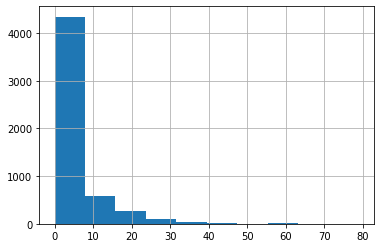

In [ ]:
atts = 'SALA DE RECURSO'
print(dc[atts].unique())
dc[atts].hist()

In [ ]:
#labels = ['0', '1 a 4', '5 a 9', '10+']
maxsala = np.max(dc[atts].unique())

# definindo intervalos
interv = [-1, 0, 4, 9, maxsala]
# realizar discretizacao e armazenar
salas_rec_d =  pd.cut(dc[atts], bins=interv)#, labels=labels)
# inserir nova coluna
dc.insert(18, 'SALA_DE_RECURSO_D', salas_rec_d)

# exibir o tipo da coluna
print(dc['SALA_DE_RECURSO_D'].value_counts())
dc[atts].value_counts()

(-1, 0]    3636
(9, 79]     847
(4, 9]      470
(0, 4]      413
Name: SALA_DE_RECURSO_D, dtype: int64


0     3636
2      111
3      106
6      104
4      103
5       97
7       93
1       93
8       90
9       86
11      78
10      75
14      74
12      64
15      59
13      56
17      52
18      48
16      44
19      40
21      28
20      24
25      19
23      16
26      16
28      15
22      14
24      14
33      11
30      10
29      10
27      10
31       8
35       7
37       7
32       5
40       5
34       4
60       3
39       3
48       3
36       3
57       2
38       2
67       2
45       2
77       1
46       1
64       1
61       1
41       1
44       1
59       1
79       1
71       1
49       1
68       1
43       1
42       1
65       1
Name: SALA DE RECURSO, dtype: int64

### Exercício 7)
 
Vamos normalizar 3 variáveis: ANOS INICIAIS, ANOS FINAIS e ENSINO MEDIO

A normalização utilizada será diferente para cada uma delas. Utilizaremos
* min-max para ANOS INICIAIS, com a=0, b=1
* norma L-$\infty$ para ANOS FINAIS 
* $z$-score para ENSINO MEDIO

Para isso, codifique funções que recebam uma coluna por parâmetro e retornem um atributo já normalizado

Depois, aplique as funções e crie novas variáveis com os atributos normalizados: INICIAIS_n,  FINAIS_n, MEDIO_n.

Após normalização, quais os valores de média e mediana de cada um deles, considerando arredondamento para 2 casas decimais? 

(a) INICIAIS_n: 0.00, 0.00;  FINAIS_n: 0.06, 0.00; MEDIO_n: 0.00, 0.17.<br>
<font color='red'>(b) INICIAIS_n: 0.07, 0.00;  FINAIS_n: 0.16, 0.15; MEDIO_n: 0.00, -0.17.<br></font>
(c) INICIAIS_n: 0.07, 0.00;  FINAIS_n: 0.15, 0.16; MEDIO_n: 0.00, -0.17.<br>
(d) INICIAIS_n: 0.00, 0.00;  FINAIS_n: 0.00, 0.16; MEDIO_n: 0.00, 0.17.<br>

<font color='red'>Resposta</font>: *ver codigo abaixo*


In [ ]:
def norm_0_1(att):
    # computa minimo e maximo
    var_min = att.min()
    var_max = att.max()

    # computa normalizacao
    att_norm = (att - var_min) / (var_max-var_min)
    return att_norm

def norm_linf(att):
    # encontra máximo
    norminf = att.max()
    # computa normalizacao
    att_norm = att / norminf
    return att_norm

def norm_zscore(att):
    # computa média e desvio padrao
    var_mean = att.mean()
    var_sigm = att.std()

    # computa normalizacao
    return ((att - var_mean) / var_sigm)


In [ ]:
# INICIAIS_n,  FINAIS_n, MEDIO_n
dc['INICIAIS_n'] = norm_0_1(dc['ANOS INICIAIS'] )
dc['FINAIS_n'] = norm_linf(dc['ANOS FINAIS'] )
dc['MEDIO_n'] = norm_zscore(dc['ENSINO MEDIO'] )

In [ ]:
np.round(dc[['INICIAIS_n',  'FINAIS_n', 'MEDIO_n']].describe(),2)

INICIAIS_n  FINAIS_n  MEDIO_n
count     5366.00   5366.00  5366.00
mean         0.07      0.16    -0.00
std          0.15      0.14     1.00
min          0.00      0.00    -0.94
25%          0.00      0.00    -0.94
50%          0.00      0.15    -0.17
75%          0.07      0.25     0.52
max          1.00      1.00     6.65

In [ ]:
ds = dc.sample(5, random_state=0)
ds

CDREDE              DE  CODMUN          MUN  CATEG  COD_ESC  TIPOESC  \
379    10207         LESTE 1     100    SAO PAULO      1    36997        8   
3637   20409      MOGI MIRIM     662  SERRA NEGRA      1   921579        8   
4849   20801       ANDRADINA     259     CASTILHO      1   407215        8   
2272   20102          SANTOS     335      GUARUJA      2   523604        8   
3905   20417  CAMPINAS LESTE     244     CAMPINAS      1    18119        8   

      CODVINC                                NOMESC  \
379     36997  LUIS GONZAGA CARVALHO MELO PROFESSOR   
3637   921579                  FRANCA FRANCHI PROFA   
4849   407215              DARIO GIOMETTI PROFESSOR   
2272    11563                     BAIRRO BOM JARDIM   
3905    18119            CECILIA PEREIRA PROFESSORA   

                                         ENDESC  ... ED_INFANTIL  \
379               ANTONIO DE TOLEDO LARA FILHO   ...           0   
3637  RODOVIA SERRA NEGRA-MONTE ALEGRE DO SUL    ...           0   
4849                  RUA JOSE MANOEL DE ANGELO  ...           0   
2272                        ESTRADA DE BERTIOGA  ...           0   
3905                        SERRA DO UMBUZEIRO   ...           0   

     CLASSES ESPECIAIS SALA DE RECURSO  SALA_DE_RECURSO_D  ANOS INICIAIS  \
379                  0               0            (-1, 0]            543   
3637                 0               0            (-1, 0]             88   
4849                 0               5             (4, 9]              0   
2272                 0               0            (-1, 0]             15   
3905                 0               0            (-1, 0]             97   

      ANOS FINAIS  ENSINO MEDIO  INICIAIS_n  FINAIS_n   MEDIO_n  
379             0             0    0.333333  0.000000 -0.944473  
3637          185            84    0.054021  0.110448 -0.607071  
4849          514             0    0.000000  0.306866 -0.944473  
2272            2             0    0.009208  0.001194 -0.944473  
3905          226           158    0.059546  0.134925 -0.309835  

[5 rows x 25 columns]

### Exercício 8)

Utilizando as variáveis normalizadas no exercício anterior, compute distâncias entre a escola de COD_ESC = 24648 (atributo na coluna de índice 5) e todas as outras escolas - ou seja, excluindo a própria escola COD_ESC = 24648 - cujos códigos da rede (CDREDE) sejam 20510. 

Utilize a distancia Euclidiana.

Compare usando vetor de atributos formado por 'INICIAIS_n',  'FINAIS_n' e 'MEDIO_n'. 

*Observação: deve-se ter cuidado ao usar normalizações distintas como feito nesse exercício para comparar atributos, em particular considerando que o z-score produz valores negativos. Considere esse procedimento apenas a título de exercício com diferentes tipos de normalização e, na dúvida, utilize normalização uniforme entre os atributos.* 

Qual escola foi a mais próxima (NOMESC) e a respectiva distância (arredondada para 2 casas decimais)?

(a) MANOEL MARTINS, distância 1.6.<br>
<font color='red'>(b) EDDA CARDOZO DE SOUZA MARCUSSI, distância 0.18<br></font>
(c) EDDA CARDOZO DE SOUZA MARCUSSI, distância 105.19<br>
(d) MANOEL MARTINS, distância 0.18<br>

<font color='red'>Resposta</font>: *ver codigo abaixo*

In [ ]:
# implementando a funcao
def dEuclidean(a, b):   
    return np.sqrt(np.sum((a - b) ** 2))

In [ ]:
# escolas
rede20510 = dc.loc[~(dc['COD_ESC']==24648) & (dc['CDREDE']==20510), :].copy().reset_index()
size = rede20510.shape[0]

attrs = ['INICIAIS_n',  'FINAIS_n', 'MEDIO_n']

esc24740 = dc.loc[(dc['COD_ESC']==24648), :].copy().reset_index()
a = np.array(esc24740.loc[0,attrs])

attrs_cat = attrs + ['MUN', 'NOMESC']
print(esc24740[attrs_cat])
print(a)

dists = np.empty(size)
for i in range(size):
    b = np.array(rede20510[attrs].loc[i,:])
    dists[i] = dEuclidean(a,b)

# argmin retorna a posicao com o valor mínimo
print(rede20510.loc[np.argmin(dists),attrs_cat])
print("dist = %.2f" % np.round(np.min(dists),2))
# rede20510[attrs_cat]

   INICIAIS_n  FINAIS_n   MEDIO_n             MUN                NOMESC
0         0.0   0.26209  0.107901  SALES OLIVEIRA  GETULIO LIMA CAPITAO
[0.0 0.262089552238806 0.10790137317108682]
INICIAIS_n                               0.0
FINAIS_n                            0.204776
MEDIO_n                             0.280619
MUN                     SAO JOAQUIM DA BARRA
NOMESC        EDDA CARDOZO DE SOUZA MARCUSSI
Name: 18, dtype: object
dist = 0.18


### Exercício 9)
 
Utilize os atributos 'ENSINO MEDIO', 'ANOS INICIAIS', 'ANOS FINAIS'. Vamos transformá-los por meio da função logarítmica. Para isso:

1. Faça uma cópia da base de dados, e atribua nulo (nan) a todos os valores iguais a zero nesses atributos.
2. Transforme esses atributos utilizando a operação logarítmica e os adicione à base de dados. Como nesse caso os atributos podem possuir valores maiores ou iguais a zero, para evitar erro com $\log(0)$ utilize: `np.log(x+1)`, onde `x` é o atributo a ser transformado. 
3. Exiba a matriz de correlação de Pearson entre os atributos originais e os transformados.
4. Mostre o scatterplot entre 'ENSINO MEDIO' e 'ANOS FINAIS', e compare com log(ENSINO MÉDIO) e log(ANOS FINAIS)

Qual é a correlação, arredondada para duas casas decimais, entre o atributo transformado: log(ENSINO MÉDIO) e os outros dois atributos: log(ANOS INICIAIS) e  log(ANOS FINAIS), respectivamente?


(a) 0.45 e 0.61<br>
<font color='red'>(b) 0.74 e 0.78<br></font>
(c) -1 e 1<br>
(d) 0.45 e 0.78<br>

<font color='red'>Resposta</font>: *ver codigo abaixo*

array([[<AxesSubplot:title={'center':'ENSINO MEDIO'}>,
        <AxesSubplot:title={'center':'ANOS INICIAIS'}>],
       [<AxesSubplot:title={'center':'ANOS FINAIS'}>, <AxesSubplot:>]],
      dtype=object)

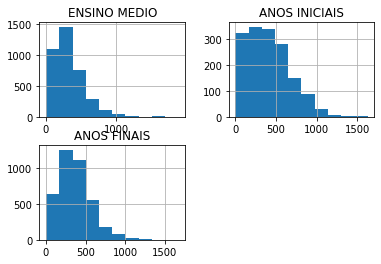

In [ ]:
dc2 = dc.copy()

dc2.loc[dc2['ENSINO MEDIO']==0,'ENSINO MEDIO'] = np.nan
dc2.loc[dc2['ANOS INICIAIS']==0,'ANOS INICIAIS'] = np.nan
dc2.loc[dc2['ANOS FINAIS']==0,'ANOS FINAIS'] = np.nan


atts = ['ENSINO MEDIO', 'ANOS INICIAIS', 'ANOS FINAIS']
dc2[atts].hist()


In [ ]:
# vamos adicionar essas novas variaveis a base
x_E = np.log(np.array(dc2['ENSINO MEDIO'])+1)
x_I = np.log(np.array(dc2['ANOS INICIAIS'])+1)
x_F = np.log(np.array(dc2['ANOS FINAIS'])+1)
x_A = x_E+x_I+x_F

Text(0.5, 0, 'Log(AF)')

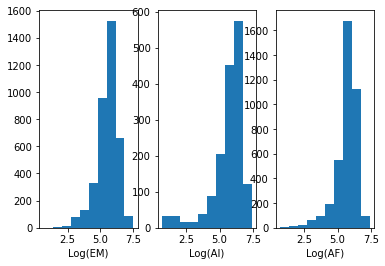

In [ ]:
plt.subplot(131)
h = plt.hist(x_E)
plt.xlabel('Log(EM)')
plt.subplot(132)
h = plt.hist(x_I)
plt.xlabel('Log(AI)')
plt.subplot(133)
h = plt.hist(x_F)
plt.xlabel('Log(AF)')

In [ ]:
dc2['Log_EM'] = x_E
dc2['Log_AI'] = x_I
dc2['Log_AF'] = x_F

#dc2.loc[dc2['Log_EM']==0,'Log_EM'] = np.nan
#dc2.loc[dc2['Log_AI']==0,'Log_AI'] = np.nan
#dc2.loc[dc2['Log_AF']==0,'Log_AF'] = np.nan

atts_t = atts + ['Log_EM', 'Log_AI', 'Log_AF']
np.round(dc2[atts_t].corr("pearson"),2)

ENSINO MEDIO  ANOS INICIAIS  ANOS FINAIS  Log_EM  Log_AI  \
ENSINO MEDIO           1.00           0.46         0.61    0.85    0.51   
ANOS INICIAIS          0.46           1.00         0.61    0.57    0.79   
ANOS FINAIS            0.61           0.61         1.00    0.66    0.62   
Log_EM                 0.85           0.57         0.66    1.00    0.74   
Log_AI                 0.51           0.79         0.62    0.74    1.00   
Log_AF                 0.57           0.64         0.85    0.78    0.81   

               Log_AF  
ENSINO MEDIO     0.57  
ANOS INICIAIS    0.64  
ANOS FINAIS      0.85  
Log_EM           0.78  
Log_AI           0.81  
Log_AF           1.00

<AxesSubplot:xlabel='ENSINO MEDIO', ylabel='ANOS FINAIS'>

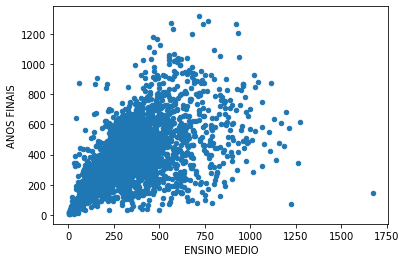

In [ ]:
dc2.plot.scatter(x='ENSINO MEDIO', y='ANOS FINAIS')

<AxesSubplot:xlabel='Log_EM', ylabel='Log_AF'>

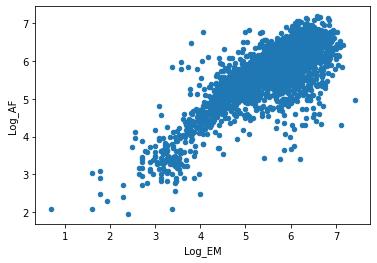

In [ ]:
dc2.plot.scatter(x='Log_EM', y='Log_AF')

### Exercício 10)
 
Codifique as variáveis categóricas 'SALA_DE_RECURSO_D' (categórica ordinal) e 'DE' (categórica nominal).

Para a primeira, use números inteiros sequenciais, iniciado por 0 para codificar a variável segundo sua ordenação, sendo que os dois últimos (os dos valores maiores na ordenação) devem ser mapeados para um único código. Gere um novo atributo 'SALA_DE_RECURSO_D_ord'.

Para a segunda, use números inteiros sequenciais, iniciados por 0 para codificar a variável em ordem alfabética, e gere um novo atributo 'DE_cod'

A seguir, use a função `value_counts()` para mostrar a quantidade de cada código e responda abaixo quais os códigos numéricos (após a codificação) que possuem a maior contagem, i.e. são mais frequentes na base de dados, para cada variável nova:


(a) DE_cod: 59 e 66;  SALA_DE_RECURSO_D_ord: 0 e 3<br>
(b) DE_cod: 66 e 55;  SALA_DE_RECURSO_D_ord: 1 e 3<br>
(c) DE_cod: 66 e 82;  SALA_DE_RECURSO_D_ord: 0 e 3<br>
<font color='red'>(d)  DE_cod: 66 e 82;  SALA_DE_RECURSO_D_ord: 0 e 2<br></font>

<font color='red'>Resposta</font>: *ver codigo abaixo*


In [ ]:
cats_sala = np.sort(dc['SALA_DE_RECURSO_D'].unique())
num_sala = np.arange(cats_sala.shape[0])
# repete o penúltimo código
num_sala[-1] = num_sala[-2]
map_sala = dict(zip(cats_sala, num_sala))

dc['DE_cod'] = dc['DE'].astype("category").cat.codes
dc['SALA_DE_RECURSO_D_ord'] = dc['SALA_DE_RECURSO_D'].map(map_sala)
print("DE_cod:")
dc['DE_cod'].value_counts()

DE_cod:


66    110
82    110
55    105
50    104
15     99
     ... 
10     24
31     21
73     20
59     18
62     15
Name: DE_cod, Length: 91, dtype: int64

In [ ]:
print("SALA_DE_RECURSO_D_ord:")
dc['SALA_DE_RECURSO_D_ord'].value_counts()

SALA_DE_RECURSO_D_ord:


0    3636
2    1317
1     413
Name: SALA_DE_RECURSO_D_ord, dtype: int64

## <span style="color:darkred">Avaliação - com soluções</span>

Antes de iniciar, acesse o portal : https://dados.educacao.sp.gov.br/dataset/fluxo-escolar-por-escola

Procure pelo arquivo CSV relativo a "Fluxo Escolar 2019 - por escola", arquivo `FLUXO_ESCOLAR_ESCOLA.csv`

O fluxo escolar é medido pela taxa média de aprovação em cada etapa da escolarização, sendo elas as séries iniciais e séries finais do Ensino Fundamental e Ensino Médio, coletadas pelo Censo Escolar.

Para saber mais sobre o funcionamento do Fluxo Escolar, visite a página https://dados.educacao.sp.gov.br/story/fluxo

As colunas possuem significado de acordo com o "dicionário de dados" disponível ao visualizar o arquivo no referido site. As colunas são rotuladas da seguinte forma:
- Ano: para o qual foi realizado o cálculo do fluxo
- CD_DIRETORIA: Código da diretoria de ensino
- NM_DIRETORIA: Nome da diretoria de ensino
- NM_MUNICIPIO: Nome do Município
- CD_REDE_ENSINO: Código da Rede de Ensino (1:Estadual)
- CD_ESCOLA: Código da Escola
- NM_COMPLETO_ESCOLA: Nome Completo da Escola
- CD_TP_IDENTIFICADOR: Código do Tipo de Escola
- APR_1: Porcentagem de Alunos Aprovados no Ensino Fundamental - Anos Iniciais no ensino fundamental de 9 anos
- REP_1: Porcentagem de Alunos Reprovados no Ensino Fundamental - Anos Iniciais no ensino fundamental de 9 anos
- ABA_1: Porcentagem de Alunos com Abandono no Ensino Fundamental - Anos Iniciais no ensino fundamental de 9 anos
- REP_2: Porcentagem de Alunos Reprovados no Ensino Fundamental - Anos Finais no ensino fundamental de 9 anos
- ABA_2: Porcentagem de Alunos com Abando no Ensino Fundamental - Anos Finais no ensino fundamental de 9 anos
- APR_3: Porcentagem de Alunos Aprovados no Ensino Médio
- REP_3: Porcentagem de Alunos Reprovados no Ensino Médio
- ABA_3: Porcentagem de Alunos com Abandono no Ensino Médio

A cada questão, recarregue a base de dados para que não haja dependência entre questões.

In [ ]:
# carregando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# carregando dados
dc = pd.read_csv("./dados/FLUXO_ESCOLAR_ESCOLA.csv", sep=',')
ncols = dc.shape[1]
ncols = dc.shape[1]
print("atributos: ", ncols)
print("linhas: ", dc.shape[0])

atributos:  16
linhas:  5220


### Questão 1)
 
Considere os seguintes problemas e a natureza dos seus respectivos dados:

I - Dados diários relativos a quantidades de passageiros e receita com passagens em uma rodoviária registrados durante 2 anos, com os quais se pretende predizer demanda futura<br>
II - Índices pluviométricos coletados (na unidade mm) em um determinado dia em estações localizadas espacialmente em uma determinada região. O objetivo é predizer o valor para estações cujo sensor falhou ou não registrou dados naquele dia. Isso será feito tomando primeiramente os dados dos 50 sensores pluviométricos vizinhos mais próximos e destes obter 5 valores aleatoriamente como entrada para realizar a predição<br>
III - Dados demográficos e de desempenho escolar de 500 escolas do estado de São Paulo, escolhidas de forma estratificada em grupos de municípios de diferentes populações, com os quais se pretende inferir um modelo para aplicar em dados das demais escolas do estado<br>

Podemos utilizar métodos que assumam dados do tipo i.i.d. (independente e identicamente distribuídos) e garantir que esses métodos irão obter resultados e conclusões válidas em quais dos casos?

(a) I<br>
(b) I e II<br>
(c) II <br>
(d) I e III<br>
<font color='red'>(e) III</font><br>

<font color='red'>Resposta</font>: *I - os dados são coletados em série temporal de forma que uma observação depende da próxima, e possuindo características como tendência e sazonalidade não sendo portanto i.i.d. II - nesse caso há dependência espacial entre os dados, já que a pluviometria registrada em um local está correlacionada com locais vizinhos, em outras palavras a probabilidade de registrar um determinado índice num local não é independente dos demais locais e sim obedece a uma função de distância, mesmo se selecionamos um subconjunto aleatório a dependência continua existindo. III - os dados são amostrados de forma aleatória e estratificada em municípios de diferentes populações representando assim um cenário i.i.d.*

### Questão 2)

Crie um novo atributo com base em três atributos existentes. Para isso, compute o desvio padrão entre as colunas REP_1, REP_2 e REP_3, e adicione a coluna resultante como um novo atributo REP_SD à base de dados. A seguir, substitua por nulo (`nan`) os valores onde 'REP_SD' seja igual a 0. 

Realize a **discretização** da variável 'REP_SD' utilizando:
1. o método dos quantis, utilizando 4 intervalos alvo
2. o método dos intervalos, utilizando os seguintes intervalos alvo: (0, 5] (5, 10] (10, 20] (20, max(REP_SD)],
em que max(REP_SD) é o maior valor desse atributo

Use o método qcut() para o item 1 e cut() para o item 2

Adicione essas novas variáveis discretizadas no dataframe com os nomes 'REP_SD_Q' (quantis) e 'REP_SD_I' (intervalos)

Qual é a quantidade de dados (frequências dos valores discretizados) na base após a discretização, relativos ao último intervalo (com os maiores valores) para, respectivamente, REP_SD_Q e REP_SD_I?

<font color='red'>(a) REP_SD_Q: 1063. REP_SD_I: 17<br></font>
(b) REP_SD_Q: 1063. REP_SD_I: 56<br>
(c) REP_SD_Q: 1069. REP_SD_I: 1063<br>
(d) REP_SD_Q: 1069. REP_SD_I: 17<br>
(e) REP_SD_Q: 4253. REP_SD_I: 56<br>

<font color='red'>Resposta</font>: *ver codigo abaixo*

In [ ]:
dc = pd.read_csv("./dados/FLUXO_ESCOLAR_ESCOLA.csv", sep=',')

In [ ]:
atts = ['REP_1', 'REP_2', 'REP_3']
print(atts)
dc['REP_SD'] = dc[atts].std(axis=1)

['REP_1', 'REP_2', 'REP_3']


<AxesSubplot:>

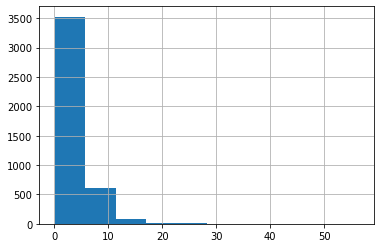

In [ ]:
dc.loc[dc['REP_SD']==0,'REP_SD'] = np.nan
dc['REP_SD'].hist()

In [ ]:
dc['REP_SD'].describe()

count    4253.000000
mean        3.247098
std         3.467008
min         0.040415
25%         0.906440
50%         2.217634
75%         4.515023
max        56.453309
Name: REP_SD, dtype: float64

In [ ]:
tot_q =  pd.qcut(dc['REP_SD'], 4)
dc['REP_SD_Q'] = tot_q
dc['REP_SD_Q'].value_counts()

(0.0394, 0.906]    1069
(2.218, 4.515]     1063
(4.515, 56.453]    1063
(0.906, 2.218]     1058
Name: REP_SD_Q, dtype: int64

In [ ]:
intervs = [0, 5, 10, 20, dc['REP_SD'].max()]
tot_i =  pd.cut(dc['REP_SD'], intervs)
dc['REP_SD_I'] = tot_i
dc['REP_SD_I'].value_counts().sort_values()

(20.0, 56.453]      17
(10.0, 20.0]       153
(5.0, 10.0]        741
(0.0, 5.0]        3342
Name: REP_SD_I, dtype: int64

### Questão 3)

Normalize a variável REP_3 utilizando dois métodos:
1. normalização robusta
2. normalização min-max para o intervalo 0 a 100.000 (cem mil)

Para isso, codifique funções que recebam uma coluna por parâmetro e retornem um atributo já normalizado

Aplique as funções criando novas variáveis com os atributos normalizados: REP_3_r e REP_3_mm

Após a normalização, quais os valores de média e mediana dessas novas variáveis, arredondando para 1 casa decimal?

(a) REP_3_r: média=0.0, mediana=0.0; REP_3_mm: média=2205.0, mediana=4514.1<br>
<font color='red'>(b) REP_3_r: média=0.3, mediana=0.0; REP_3_mm: média=4514.1, mediana=2205.0<br></font>
(c) REP_3_r: média=0.0, mediana=0.5; REP_3_mm: média=4514.1, mediana=0.0<br>
(d) REP_3_r: média=1.0, mediana=0.3; REP_3_mm: média=2205.0, mediana=0.0<br>
(e) REP_3_r: média=0.3, mediana=0.3; REP_3_mm: média=5220.0, mediana=2205.1<br>

<font color='red'>Resposta</font>: *ver codigo abaixo*

In [ ]:
dc = pd.read_csv("./dados/FLUXO_ESCOLAR_ESCOLA.csv", sep=',')

In [ ]:
def norm_robusta(att):
    # computa média e desvio padrao
    var_med = att.median()
    q25 = att.quantile(0.25)
    q75 = att.quantile(0.75)

    # computa normalizacao
    var_norm = (att - var_med) / (q75-q25)
    return var_norm

def norm_minmax(att, a=0, b=1):
    # computa minimo e maximo
    var_min = att.min()
    var_max = att.max()

    # computa normalizacao
    att_norm = a+( ((att - var_min)*(b-a)) / (var_max-var_min) )
    return att_norm

In [ ]:
# INICIAIS_n,  FINAIS_n, MEDIO_n
dc['REP_3_r'] = norm_robusta(dc['REP_3'] )
dc['REP_3_mm'] = norm_minmax(dc['REP_3'],a=0,b=100000)

In [ ]:
np.round(dc[['REP_3_r', 'REP_3_mm']].describe(),1)

REP_3_r  REP_3_mm
count   5220.0    5220.0
mean       0.3    4514.1
std        0.9    6281.8
min       -0.3       0.0
25%       -0.3       0.0
50%        0.0    2205.0
75%        0.7    6962.5
max       14.0  100000.0

### Questão 4)
 
Transforme os atributos 'ABA_3' e 'REP_3' por meio da função logarítmica na base 2. Para isso:
1. Remova todas as linhas cujos atributos possuem valor 0 em 'ABA_3'; remova ainda os que possuam valores nulos (`nan`) em 'REP_3' ou 'ABA_3'; devem restar 2273 linhas.
2. Transforme 'ABA_3' e 'REP_3' utilizando a operação logarítmica no seguinte formato: seja $x$ o atributo original, obtemos a sua versão transformada,
$$x' = \log_2{(x+1)}$$
e os adicione à base de dados com novos nomes, ex. 'ABA_3_L' e  'REP_3_L',
3. Calcule a correlação entre os atributos 'ABA_3', 'REP_3', 'ABA_3_L' e  'REP_3_L' (utilize o método `.corr()`)

Qual o valor obtido da correlação entre as variáveis ABA_3_L e REP_3_L, e entre as variáveis ABA_3 e REP_3, respectivamente, arredondando para 2 casas decimais?

(a) 0.20, 0.20<br>
(b) 0.21, 0.20<br>
<font color='red'>(c) 0.22, 0.21<br></font>
(d) 0.89, 0.22<br>
(e) 0.89, 0.91<br>

<font color='red'>Resposta</font>: *ver codigo abaixo*

In [ ]:
dc = pd.read_csv("./dados/FLUXO_ESCOLAR_ESCOLA.csv", sep=',')

In [ ]:
dc2 = dc.copy()

In [ ]:
dc2 = dc2.drop(dc2[dc2['ABA_3'] == 0].index)
dc2 = dc2.dropna(subset=['ABA_3','REP_3'])
print(dc2.shape)

(2273, 16)


In [ ]:
# vamos adicionar essas novas variaveis a base
dc2['ABA_3_L'] = np.log2(np.array(dc2['ABA_3'])+1)
dc2['REP_3_L'] = np.log2(np.array(dc2['REP_3'])+1)

In [ ]:
np.round(dc2[['ABA_3','REP_3', 'ABA_3_L','REP_3_L']].corr(),2)

ABA_3  REP_3  ABA_3_L  REP_3_L
ABA_3     1.00   0.21     0.89     0.20
REP_3     0.21   1.00     0.21     0.91
ABA_3_L   0.89   0.21     1.00     0.22
REP_3_L   0.20   0.91     0.22     1.00

### Questão 5)
 
Codifique a variável categórica 'NM_MUNICIPIO':
* use números inteiros sequenciais, iniciados por 0 para codificar a variável em ordem alfabética, e gere um novo atributo NM_MUNICIPIO_cod, por meio do uso de `cat.codes` da biblioteca `pandas`.

Observação: a intenção é que o atributo codificação tenha relação com a ordem alfabética do município. Se a intenção fosse a de posteriormente aplicar métodos que realizam comparação por distância independente da ordem alfabética, a codificação ideal seria one-hot-encoding/dummy variables.

Use a função `value_counts()` para mostrar a frequência dos códigos de NM_MUNICIPIO_cod. Quais são os dois **valores discretos** de NM_MUNICIPIO_cod (ou seja, após codificação realizada) com a maior frequência (maior contagem)?

(a) códigos 170 e 1116<br>
(b) códigos 563 e 1116<br>
(c) códigos 170 e 214<br>
<font color='red'>(d) códigos 563 e 214<br></font>
(e) códigos 214 e 1116<br>

<font color='red'>Resposta</font>: *ver codigo abaixo*


In [ ]:
dc = pd.read_csv("./dados/FLUXO_ESCOLAR_ESCOLA.csv", sep=',')

In [ ]:
dc['NM_MUNICIPIO_cod'] = dc['NM_MUNICIPIO'].astype("category").cat.codes

In [ ]:
dc['NM_MUNICIPIO_cod'].value_counts().sort_values()

360       1
170       1
536       1
469       1
519       1
       ... 
582      82
535      89
108     165
214     170
563    1116
Name: NM_MUNICIPIO_cod, Length: 644, dtype: int64

## <font color='blue'>Análise de Componentes Principais - PCA</font>

## Conteúdo
- Conceitos Fundamentais 
  - Covariância
  - Matriz de Covariância
- Componentes Principais
  - Propriedades
- Cálculo das Componentes Principais

----

Bibliograpia:
- [A Tutorial on Principal Components Analysis,  Jonathon Shlens](https://arxiv.org/pdf/1404.1100.pdf)
- [Principal Component Analysis,
H. Abdi, L.J. Williams](https://wwwpub.utdallas.edu/~herve/abdi-wireCS-PCA2010-inpress.pdf)

## Conceitos Básicos
A compreenção do método de Análise de Componentes Principais envolve quatro conceitos matemáticos:
1. Matriz de Covariância e suas Propriedades
2. Mudança de Base
3. Teorema Espectral
4. Quociente de Rayleigh

### <font color='blue'>Matriz de Covariância</font>
Considere duas sequências de valores $\mathbf{x}=\{x_1,x_2,\ldots,x_k\}$ e $\mathbf{y}=\{y_1,y_2,\ldots,y_k\}$. 

A covariância entre $\mathbf{x}$ e $\mathbf{y}$ é definida como:
$$
cov(\mathbf{x},\mathbf{y}) = \frac{1}{n}\sum_i (x_i-\mu_x)(y_i-\mu_y)
$$
onde $\mu_x$ e $\mu_y$ são a média dos valores de $\mathbf{x}$ e $\mathbf{y}$, respectivamente.

Considere $\mathbf{X}=\{\mathbf{x}_1,\ldots,\mathbf{x}_n\} $ um conjunto de pontos em  $\mathbb{R}^d$. 

Pode-se organizar os pontos como colunas de uma matriz $\mathbf{X}$ (matriz de dados) com dimensões $d\times n$:

$$
   \mathbf{X}=
    \begin{bmatrix}
      |&|&&|\\
      \mathbf{x}_1&\mathbf{x}_2&\dots&\mathbf{x}_n\\
      |&|&&|
    \end{bmatrix}=
    \begin{bmatrix}
      x_{11}                & {x_{12}} &\dots  & x_{1n}\\
      {x_{21}} & x_{22}               &\dots  & {x_{2n}}\\
      \vdots               &\vdots               &\ddots &\vdots\\
      x_{d1}                & {x_{d2}}&\dots  & x_{dn}
    \end{bmatrix}
$$

Denotando as linhas da matriz $\mathbf{X}$ por ${x}_{1:},\ldots,{x}_{d:}$, 
a matriz de covariância de $\mathbf{X}$ é:

$$
cov(\mathbf{X})=
\begin{bmatrix}
      {cov(x_{1:},x_{1:})} & cov(x_{1:},x_{2:})          & \dots  &cov(x_{1:},x_{d:})\\
      cov(x_{2:},x_{1:})          & {cov(x_{2:},x_{2:})} & \dots  &cov(x_{2:},x_{d:})\\
      \vdots                      &      \vdots                 &\ddots  &\vdots\\
      cov(x_{d:},x_{1:})          &cov(x_{d:},x_{2:})           &\dots   &{cov(x_{d:},x_{d:})}
\end{bmatrix}
$$

**Importante**: 
- Cada entrada da matrix $cov(\mathbf{X})$ corresponde a correlação entre duas coordenadas do conjunto de pontos  $\mathbf{X}$.
- Os elementos na diagonal da matriz correspondem à variância de cada coordenada.

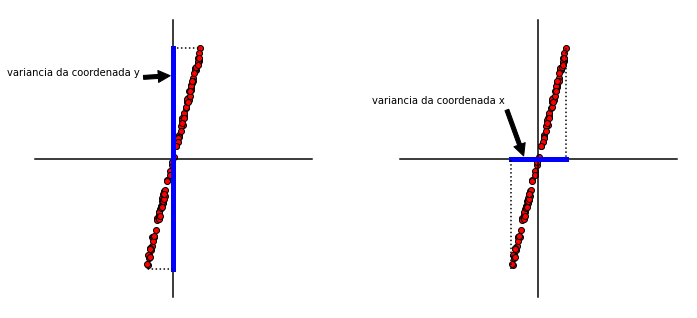

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n=100
X = np.zeros((2,n))
X[0,:] = np.random.uniform(-1,1,size=(1,n))
X[1,:] = 4*X[0,:]+np.random.uniform(-0.15,0.15,size=(1,n))
f, (ax1, ax2)  = plt.subplots(1,2,figsize=(12,6))

ax1.set_aspect('equal')
ax1.axis('off')
ax1.scatter(X[0,:],X[1,:],marker='o',color='red',edgecolor='black', linewidth=1);
ax1.plot([0,0],[-5,5],color='black');
ax1.plot([-5,5],[0,0],color='black');
ax1.plot([0,0],[-4,4],color='blue',linewidth=5);
ax1.plot([0,1],[4,4],':k');
ax1.plot([0,-1],[-4,-4],':k');
ax1.annotate('variancia da coordenada y', xy=(-0.05, 3), xytext=(-6, 3),
             arrowprops=dict(facecolor='black', shrink=0.05),
             );

ax2.set_aspect('equal')
ax2.axis('off')
ax2.scatter(X[0,:],X[1,:],marker='o',color='red',edgecolor='black', linewidth=1);
ax2.plot([0,0],[-5,5],color='black');
ax2.plot([-5,5],[0,0],color='black');
ax2.plot([-1,1],[0,0],color='blue',linewidth=5);
ax2.plot([1,1],[4,0],':k');
ax2.plot([-1,-1],[-4,0],':k');
ax2.annotate('variancia da coordenada x', xy=(-0.5, 0), xytext=(-6, 2),
             arrowprops=dict(facecolor='black', shrink=0.05),
             );

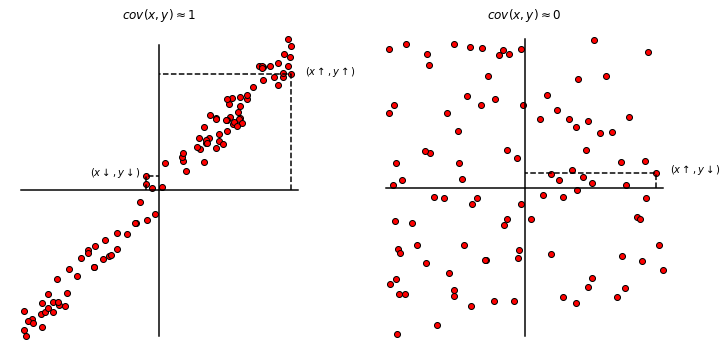

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


f, (ax1, ax2)  = plt.subplots(1,2,figsize=(12,6))

n = 100

#### figura da esquerda
Xc = np.zeros((2,n))
Xc[0,:] = np.random.uniform(-1,1,size=(1,n))
Xc[1,:] = Xc[0,:]+np.random.uniform(-0.15,0.15,size=(1,n))
Xc[0,0] = 0.95
Xc[1,0] = 0.8
Xc[0,1] = -0.1
Xc[1,1] = 0.1

ax1.axis('off')
ax1.scatter(Xc[0,:],Xc[1,:],marker='o',color='red',edgecolor='black', linewidth=1);
ax1.plot([0,0],[-1,1],color='black');
ax1.plot([-1,1],[0,0],color='black');
ax1.set_title(r'$cov(x,y)\approx 1$');
ax1.text(Xc[0,0]+0.1, Xc[1,0], r'$(x\uparrow,y\uparrow)$');
ax1.plot([Xc[0,0],Xc[0,0],0],[0,Xc[1,0],Xc[1,0]],'--k');
ax1.text(Xc[0,1]-0.4, Xc[1,1], r'$(x\downarrow,y\downarrow)$');
ax1.plot([Xc[0,1],Xc[0,1],0],[0,Xc[1,1],Xc[1,1]],'--k');

#### figura da direita
Xnc = np.zeros((2,n))
Xnc[0,:] = np.random.uniform(-1,1,size=(1,n))
Xnc[1,:] = np.random.uniform(-1,1,size=(1,n))
Xnc[0,0] = 0.95
Xnc[1,0] = 0.1

ax2.axis('off')
ax2.scatter(Xnc[0,:],Xnc[1,:],marker='o',color='red',edgecolor='black', linewidth=1);
ax2.plot([0,0],[-1,1],color='black');
ax2.plot([-1,1],[0,0],color='black');
ax2.set_title(r'$cov(x,y)\approx 0$');
ax2.text(Xnc[0,0]+0.1, Xnc[1,0], r'$(x\uparrow,y\downarrow)$');
ax2.plot([Xnc[0,0],Xnc[0,0],0],[0,Xnc[1,0],Xnc[1,0]],'--k');

**Propriedades**:

2. $cov(\mathbf{X})$ é uma matriz simétrica
3. $cov(\mathbf{X})$ é semi definida positiva 

---
**Prova da propriedade 3**: $cov(\mathbf{X})$ é semi definida positiva

O segredo da prova é enxergar que:
$$
cov(\mathbf{X})=\frac{1}{n}\sum_i (\mathbf{x}_{i}-\mu)(\mathbf{x}_{i}-\mu)^\top
$$
onde $\mu=\frac{1}{n}\sum_i \mathbf{x}_{i}$

Assim,
$$
\mathbf{u}^\top cov(\mathbf{X})\mathbf{u}\\
=\mathbf{u}^\top\left( \frac{1}{n}\sum_i (\mathbf{x}_{i}-\mu)(\mathbf{x}_{i}-\mu)^\top \right)\mathbf{u}\\
=  \frac{1}{n}\sum_i \mathbf{u}^\top(\mathbf{x}_{i}-\mu)(\mathbf{x}_{i}-\mu)^\top \mathbf{u}\\
=\frac{1}{n}\sum_i \left((\mathbf{x}_{i}-\mu)^\top \mathbf{u}\right)^2\geq 0
$$

---

Assumindo que os dados estão centralizados, isto é, $\mu=0$, a matriz de covariância pode ser calculada como:

$$
cov(\mathbf{X})=\frac{1}{n}\mathbf{X}\mathbf{X}^\top
$$

## Análise de Componentes Principais 
(Principal Component Analysis - PCA)

A idéia do método de _Análise de Componentes Principais_ é encontrar uma nova base para representar os dados de modo que a covariância entre coordenadas distintas nesta nova base seja zero.


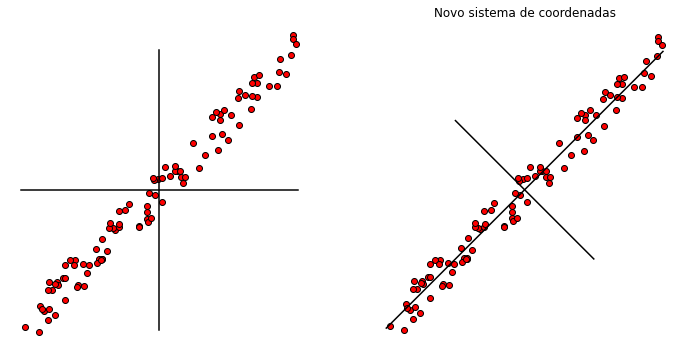

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


f, (ax1, ax2)  = plt.subplots(1,2,figsize=(12,6))

n = 100

#### figura da esquerda
Xc = np.zeros((2,n))
Xc[0,:] = np.random.uniform(-1,1,size=(1,n))
Xc[1,:] = Xc[0,:]+np.random.uniform(-0.15,0.15,size=(1,n))

ax1.axis('off')
ax1.scatter(Xc[0,:],Xc[1,:],marker='o',color='red',edgecolor='black', linewidth=1);
ax1.plot([0,0],[-1,1],color='black');
ax1.plot([-1,1],[0,0],color='black');

#### figura da direita
ax2.axis('off')
ax2.set_aspect('equal')
ax2.set_title('Novo sistema de coordenadas');
ax2.scatter(Xc[0,:],Xc[1,:],marker='o',color='red',edgecolor='black', linewidth=1);
ax2.plot([-1,1],[-1,1],color='black');
ax2.plot([-0.5,0.5],[0.5,-0.5],color='black');

---
### <font color='blue'>Matriz de mudança de base
</font>

Seja $\mathbf{x}=\{x_1,\ldots,x_d\}$ um ponto representado na base Cartesiana, ou seja:

$$
\mathbf{x}=x_1(1,0,0,\ldots,0)+x_2(0,1,0,\ldots,0)+\cdots+x_d(0,0,0,\ldots,1)
$$

Seja $\mathbf{U}$ a matriz cujas colunas $\mathbf{u}_1,\mathbf{u}_2,\cdots,\mathbf{u}_d$ formam uma base ortogonal para o espaço $\mathbb{R}^d$. As coordendas do ponto $\mathbf{x}$ na base formada pelos vetores $\mathbf{u}_i$ são dadas por:

$$
\mathbf{y} = \mathbf{U}^\top\mathbf{x}
$$

---

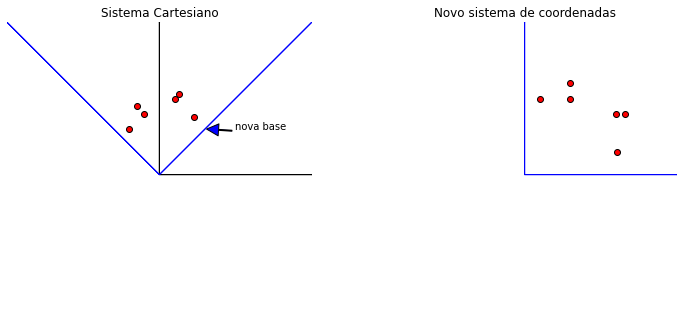

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



#### Gerando 6 pontos representados no sistema cartesiano
#### cuja base é e1=[1,0] e e2=[0,1]
Xc = np.array([[-0.1, -0.15, -0.2, 0.1, 0.13, 0.23],[0.4, 0.45, 0.3, 0.5, 0.53, 0.38]])

#### Considere uma nova base dada pelos vetores u1=[1,1] e u2[-1,1]
U = np.asarray([[1,-1],[1,1]])  # matriz de mudança de base
Yc = np.dot(U.T,Xc)             # coordenadas na nova base

f, (ax1, ax2)  = plt.subplots(1,2,figsize=(12,6))

ax1.axis('off')
ax1.set_aspect('equal')
ax1.set_title('Sistema Cartesiano');
ax1.scatter(Xc[0,:],Xc[1,:],marker='o',color='red',edgecolor='black', linewidth=1);
ax1.arrow(0,0,1,0,color='black');
ax1.arrow(0,0,0,1,color='black');
ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)
ax1.arrow(0,0,1,1,color='blue');
ax1.arrow(0,0,-1,1,color='blue');
ax1.annotate('nova base', xy=(0.3, 0.3), xytext=(0.5, 0.3),
             arrowprops=dict(facecolor='blue', shrink=0.05, width=1),
             );

#### figura da direita
ax2.axis('off')
ax2.set_aspect('equal')
ax2.set_xlim(-1, 1)
ax2.set_ylim(-1, 1)
ax2.set_title('Novo sistema de coordenadas');
ax2.scatter(Yc[0,:],Yc[1,:],marker='o',color='red',edgecolor='black', linewidth=1);
ax2.arrow(0,0,1,0,color='blue');
ax2.arrow(0,0,0,1,color='blue');

No contexto de PCA, buscamos uma matriz de mudança de base $\mathbf{P}$ tal que

$$
\mathbf{Y}=\mathbf{P}\mathbf{X} \Longrightarrow \mathbf{Y}\mathbf{Y}^\top = \mathbf{D}
$$

onde $\mathbf{D}$ é uma matriz diagonal onde os elementos da diagonal correspondem a variância de cada uma das coordenadas.

Uma vez que $\mathbf{P}$ tenha sido calculada:

- as coordenadas dos pontos na nova base serão descorrelacionadas
- algumas das coordenadas terão variância próximo de zero (coordenadas relacionada com ruído nos dados)
- a dimensão dos dados poderá ser reduzida sem grandes perdas de informação

**Calculando a mudança de base**

$$
\mathbf{Y}=\mathbf{P}\mathbf{X} 
$$

$$
\mathbf{Y}\mathbf{Y}^\top=(\mathbf{PX})(\mathbf{PX})^\top=\mathbf{P}\mathbf{X}\mathbf{X}^\top\mathbf{P}^\top
$$

---
### <font color='blue'> Teorema Espectral</font>

Se $\mathbf{A}$ é matriz simétrica, então:
$$
\mathbf{A}=\mathbf{UDU}^\top \rightarrow \mathbf{U}^\top\mathbf{AU}=\mathbf{D}
$$
onde $\mathbf{U}$ é matriz ortogonal contendo os autovetores de $\mathbf{A}$ e $\mathbf{D}$ é matriz diagonal contendo os autovalores reais de $\mathbf{A}$

---

$\mathbf{XX}^\top$ é uma matriz simétrica semi-definida positiva. Logo, os autovalores $\lambda _i$ são reais e não negativos. Armazenando os autovetores de $\mathbf{XX}^\top$ em uma matriz  $\mathbf{U}$ e fazendo:

$$\mathbf{P}=\mathbf{U}^\top$$

$$\mathbf{YY}^\top=\mathbf{U}^\top\mathbf{X}\mathbf{X}^\top\mathbf{U} = \mathbf{D}$$

$$
\mathbf{D}=
\begin{bmatrix}
cov(y_{1:},y_{1:}) & 0 & \ldots & 0 \\
0 & cov(y_{2:},y_{2:}) & \ldots & 0 \\
  &            & \vdots & \\
0 & 0 & \ldots & cov(y_{d:},y_{d:}) \\
\end{bmatrix}
$$

**Importante**: $cov(y_{i:},y_{i:}) = \lambda_i$, ou seja, os autovalores de $\mathbf{XX}^\top$ correspondem as variâncias das coordenadas na nova base. Os autovetores de $\mathbf{XX}^\top$ são os elementos da nova base, sendo que coordenadas distintas dos dados nesta nova base são "descorrelacionadas".

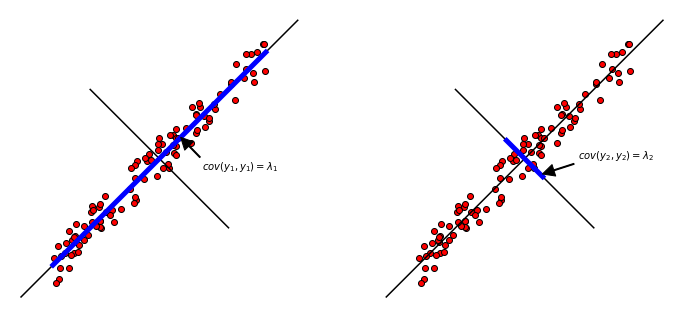

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['figure.figsize'] = [12, 6]
f, (ax1, ax2)  = plt.subplots(1,2)

n = 100

#### figura da esquerda
Xc = np.zeros((2,n))
Xc[0,:] = np.random.uniform(-1,1,size=(1,n))
Xc[1,:] = Xc[0,:]+np.random.uniform(-0.2,0.2,size=(1,n))

#### figura da direita
ax1.axis('off')
ax1.set_aspect('equal')
ax1.scatter(Xc[0,:],Xc[1,:],marker='o',color='red',edgecolor='black', linewidth='1');
ax1.plot([-1.3,1.3],[-1.3,1.3],color='black');
ax1.plot([-0.65,0.65],[0.65,-0.65],color='black');
ax1.plot([-1,1],[-1,1],color='blue',linewidth=5);
ax1.annotate(r'$cov(y_1,y_1)=\lambda_1$', xy=(0.2, 0.2), xytext=(0.4, -0.1),
              arrowprops=dict(facecolor='black', shrink=0.00,width=1),
              );

#### figura da direita
ax2.axis('off')
ax2.set_aspect('equal')
ax2.scatter(Xc[0,:],Xc[1,:],marker='o',color='red',edgecolor='black', linewidth='1');
ax2.plot([-1.3,1.3],[-1.3,1.3],color='black');
ax2.plot([-0.65,0.65],[0.65,-0.65],color='black');
ax2.plot([-0.17,0.17],[0.17,-0.17],color='blue',linewidth=5);
ax2.annotate(r'$cov(y_2,y_2)=\lambda_2$', xy=(0.15, -0.15), xytext=(0.5, 0),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1),
             );

As coordenadas dos pontos no novo sistema de coordenadas são dados por:
$$
\mathbf{y_i}=\mathbf{U}^\top\mathbf{x_i}
$$

---
### <font color='blue'>Quociente de Rayleigh</font>
    
Assumindo que os autovalores estão ordenados $\lambda_1\geq\cdots\geq\lambda_d$, o _Quociente de Rayleigh_ assegura:

$$
\mathbf{u}_1^\top\mathbf{XX}^\top\mathbf{u}_1=\lambda_1 \rightarrow \mathbf{u}_1 \mbox{ (direção de maior variância)}\\
\mathbf{u}_d^\top\mathbf{XX}^\top\mathbf{u}_d=\lambda_d \rightarrow \mathbf{u}_d \mbox{ (direção de menor variância)}
$$


---

Desta forma, pode-se desprezar as direções (coordenadas) de menor variância, uma vez que estas tipicamente correspondem a ruído nos dados

$$
\hat{\mathbf{Y}}=
\begin{bmatrix}
y_{11} & y_{21} & \cdots & y_{n1} \\
       &        & \vdots & \\
y_{1k} & y_{2k} & \cdots & y_{n} \\
0 & 0 & \cdots & 0 \\
       &        & \vdots & \\
0 & 0 & \cdots & 0 \\
\end{bmatrix}
$$

pode-se reconstuir os dados "sem ruído" na base original fazendo:

$$
\hat{\mathbf{X}}=\mathbf{U}\hat{\mathbf{Y}}
$$

### <font color='blue'>Quantidade de Informação Capturada em Cada Direção Principal</font>

Como visto acima, as direções com variância próximas de zero podem ser desconsideradas, uma vez que correspondem ao ruído inerente dos dados. 

Podemos medir a "quantidade de informação" capturada por cada direção através da chamada _proporção de variância explicada_, que matemáticamente é dada por:

$$
\frac{\lambda_i}{\lambda_1+\cdots+\lambda_d}
$$

Para cada $i$, o valor acima mede a proporção da variância capturada por cada direção principal. Desta forma, se quisermos encontrar quantas direções são necessárias para
capturar 90% da variância, basta encontrarmos o menor $k$ tal que:

$$
\frac{1}{\lambda_1+\cdots+\lambda_d}\sum_{i=1}^k \lambda_i \geq 0.9
$$

______

# Calculando PCA em Python 

In [ ]:
###########
# importing the packages
###########
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
###########
# reading data_frame
###########

file_name = 'isolet1234.csv'

df = pd.read_csv(file_name)
print(df.shape)

(6238, 618)


In [ ]:
###########
# printing the 10 rows and 8 columns of the DataFrame
###########

print(df.iloc[:10,:8])

       c0      c1      c2      c3      c4      c5      c6      c7
0 -0.4394 -0.0930  0.1718  0.4620  0.6226  0.4704  0.3578  0.0478
1 -0.4348 -0.1198  0.2474  0.4036  0.5026  0.6328  0.4948  0.0338
2 -0.2330  0.2124  0.5014  0.5222 -0.3422 -0.5840 -0.7168 -0.6342
3 -0.3808 -0.0096  0.2602  0.2554 -0.4290 -0.6746 -0.6868 -0.6650
4 -0.3412  0.0946  0.6082  0.6216 -0.1622 -0.3784 -0.4324 -0.4358
5 -0.4634  0.0306  0.3546  0.4448 -0.1022 -0.4184 -0.6388 -0.4370
6 -0.3364 -0.0102  0.2132  0.2018 -0.6146 -0.8380 -0.8130 -0.7240
7 -0.4798 -0.1580  0.1764  0.1820 -0.6378 -0.8400 -0.7280 -0.6654
8 -0.3928  0.0424  0.2166  0.2124 -0.4564 -0.6200 -0.7112 -0.6602
9 -0.5494 -0.0940  0.2868  0.2964 -0.5326 -0.7204 -0.7518 -0.7398


In [ ]:
###########
# converting data columns to numpy array
###########

data = df.values
print(type(data))

<class 'numpy.ndarray'>


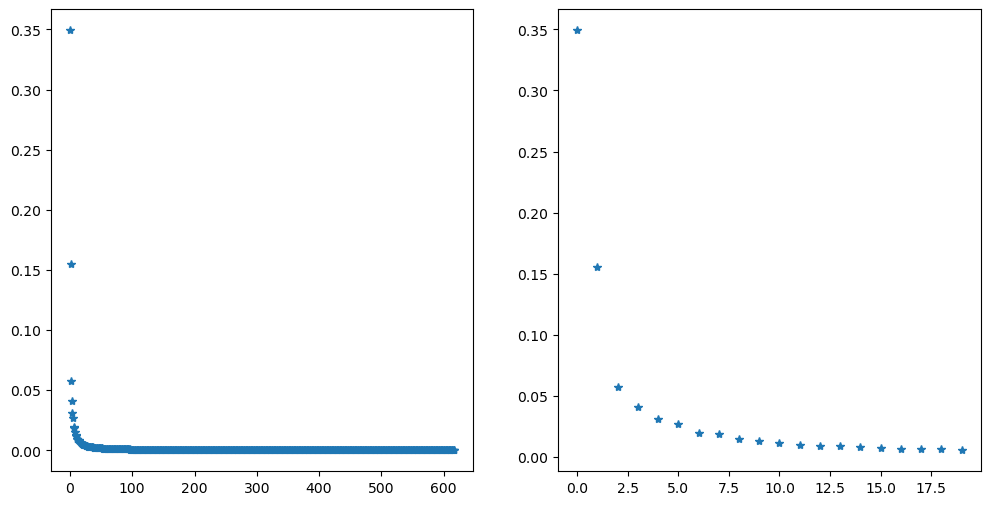

In [ ]:
from sklearn.decomposition import PCA

data_pca=PCA(svd_solver='full')
data_transformed = data_pca.fit(data)

#print(data_transformed.explained_variance_)
#print('\n ',data_transformed.explained_variance_ratio_)

plt.rcParams['figure.figsize'] = [12, 6]
f, (ax1, ax2)  = plt.subplots(1,2)

ax1.plot(data_pca.explained_variance_ratio_, '*') 
ax2.plot(data_pca.explained_variance_ratio_[:20], '*') 

(6238, 3)


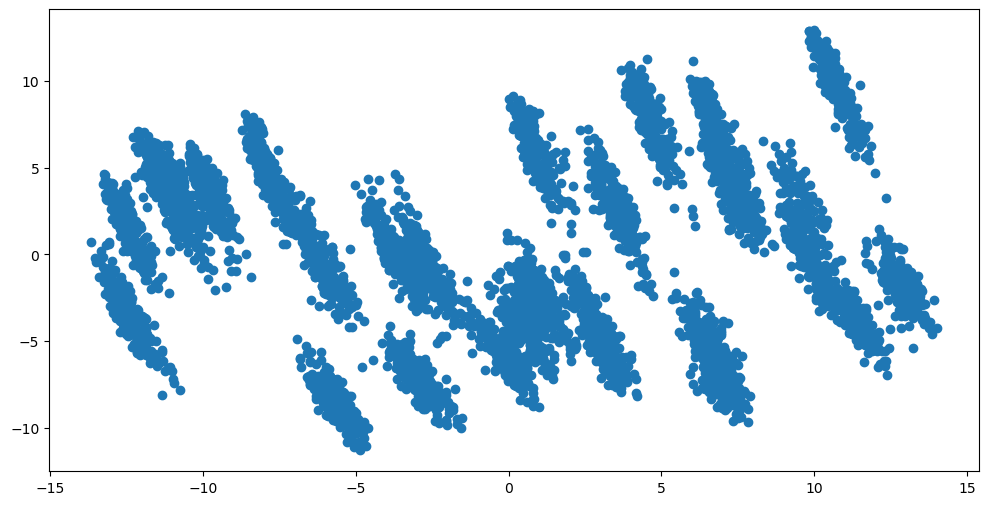

In [ ]:
###########
# projecting data in 2D
###########

pca_proj=PCA(n_components=3)
data_2d=pca_proj.fit_transform(data)
print(data_2d.shape)

plt.scatter(data_2d[:,0],data_2d[:,1])

## <span style="color:blue">Análise de Componentes Principais<br> Exercícios</span>

Os exercícios abaixo farão uso do conjunto de dados <font style="font-family: monaco">blobs.csv</font> disponível no _moodle_.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Exercício 1)
Calcule as direções principais do conjunto de dados armazenado na variável X definida no código abaixo. Imprima as 3 direções principais com maior variância.

In [ ]:
from sklearn.decomposition import PCA

X = pd.read_csv('blobs.csv').values
print(X.shape)

pca_obj=PCA(svd_solver='full')
X_transformed = pca_obj.fit(X)

# o atribudo "components_" é um array onde as direções principais 
# estão armazenadas nas linhas, sendo a componente principal de maior 
# variância armazenada na linha 0, componente principal com a 
# segunda maior variância na linha 1 e assim por diante
print('\nTres direcoes com maior variancia\n')
print(X_transformed.components_[0:3])

(500, 25)

Tres direcoes com maior variancia

[[ 1.92197646e-02 -2.06435693e-02  2.03149133e-02  2.85215074e-02
  -9.90931578e-03  6.80511220e-04  1.11433172e-02 -6.95451279e-03
  -9.92677418e-01  3.67757946e-02 -1.85597158e-02  1.95100212e-02
   1.83684280e-02 -4.39279974e-02  2.90013592e-02  1.70472900e-02
   5.19817429e-02 -1.05752911e-02  1.55291901e-02 -7.74234160e-03
   3.98920576e-03 -1.37186521e-02  5.08262800e-02 -8.95014464e-03
   2.89781030e-02]
 [ 1.79461688e-01  1.01948228e-01  1.16622674e-01  1.94845330e-01
   1.55385732e-01  1.62598385e-01  9.51584471e-03  3.46145642e-01
  -4.89428134e-02 -8.16320250e-02  3.00809995e-01  1.32208382e-01
   1.42191888e-01  3.14145675e-01 -1.88654700e-01 -9.56956086e-02
  -3.32721341e-01  3.93560366e-01 -1.26123633e-01  3.48592275e-01
   1.98752815e-01  4.19471732e-02 -4.46140845e-02 -5.39292086e-02
  -7.40742427e-02]
 [-2.39084918e-01 -7.29413297e-02 -3.58568151e-01  2.96299394e-02
  -1.51125110e-02  3.43591444e-02 -8.80850946e-02 -8.82816

### Exercício 2)
Faça um gráfico mostrando o decaimento no valor das variâncias. Faça um segundo gráfico mostrando o decaimento no valor da proporção de variância explicada por cada direção principal.

**Dica**: Utilize os atributos "explained_variance_" e "explained_variance_ratio_". Veja [documentação](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) para entender claramente a diferença entre tais atributos.

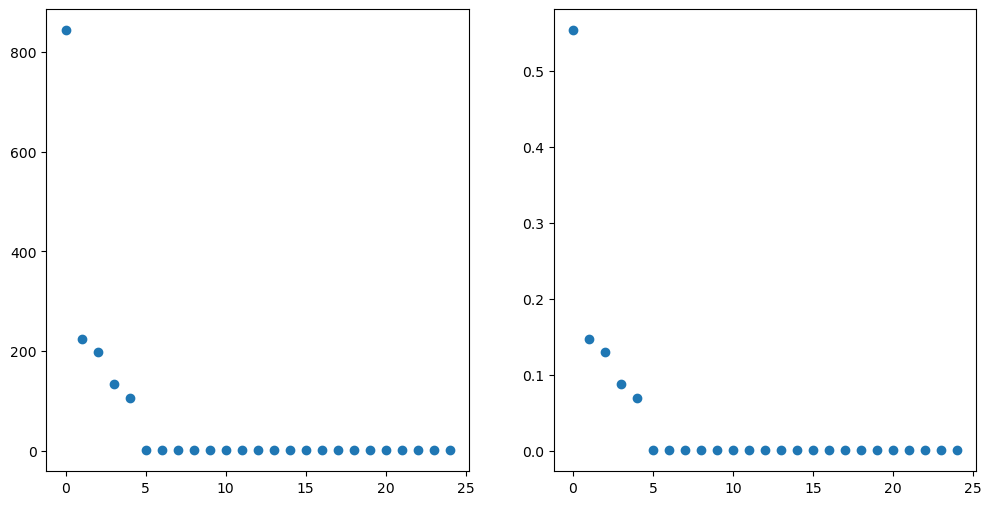

In [ ]:
plt.rcParams['figure.figsize'] = [12, 6]
f, (ax1, ax2)  = plt.subplots(1,2)

ax1.plot(X_transformed.explained_variance_, 'o')
ax2.plot(X_transformed.explained_variance_ratio_, 'o')

### Exercício 3)
Calcule quantas direções principais são necessárias para representar $80\%$ da variância contida nos dados.

In [ ]:
# O atributo "explained_variance_ratio_" contém a porcentagem de
# informação representada em cada direção (ordenado da maior para a menor)
# Para encontrar o número de direções necessárias para representar
# 80% da informação basta somar os valores de "explained_variance_ratio_"
# até que se obtenha 80%

percentage_info = 0.0
num_components80 = 0
for i in range(X_transformed.explained_variance_ratio_.shape[0]):
    percentage_info += X_transformed.explained_variance_ratio_[i]
    if percentage_info >= 0.8:
        num_components80 = i+1
        break
        
print('Numero de componentes com no mínimo 80% da informacao: ',
     num_components80)
print('\nPorcentagem da informacao: ',percentage_info)

Numero de componentes com no mínimo 80% da informacao:  3

Porcentagem da informacao:  0.8306501032848949


### Exercício 4)
Utilizando apenas as duas componentes com maior variância, projete os dados originais nestas duas componentes e faça um "scatter plot" dos dados em duas dimensões.

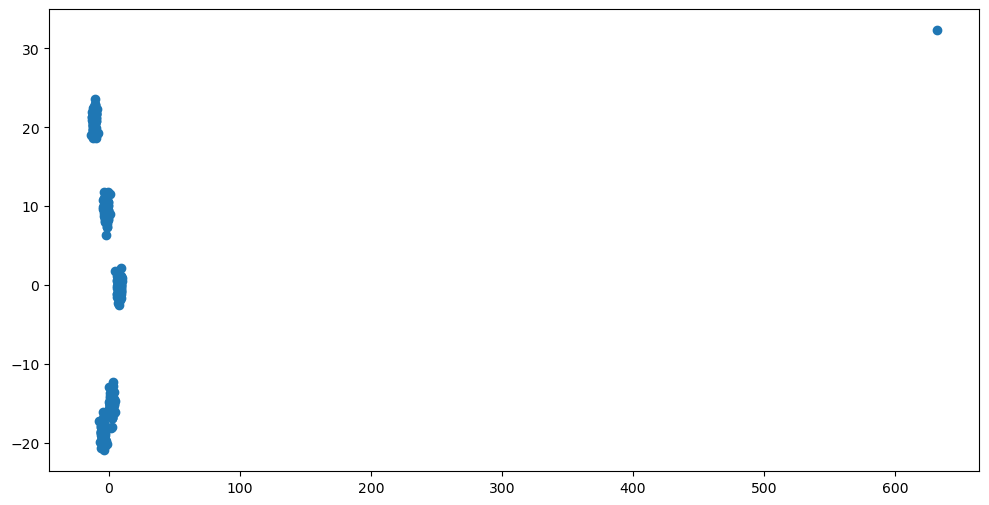

In [ ]:
X2D = np.dot(X,X_transformed.components_[0:2].T)

plt.scatter(X2D[:,0],X2D[:,1])

### Exercício 5)
Analisando o "scatter plot" do exercício anterior você deve ter notado que existem _outliers_ nos dados originais (pontos muito distantes dos demais). Encontre os _outliers_ e remova-os dos dados originais.

In [ ]:
# utilizando z-score para encontrar outliers
# o pacote scipy possui um método para encontrar o z-score

from scipy.stats import zscore

# calculando z-scores
Xzscore = zscore(X,axis=0)

# encontrando outliers
outliers = np.abs(Xzscore) > 2.8 # 2.8 é o threshold utilizado para 
                                 # identificar um valor como outlier
    
outliers_id = np.argwhere(outliers == True)
print('indice das linhas dos elementos "outliers":\n',outliers_id)

# removendo outliers
df = pd.DataFrame(data=X)
print(df.shape)
df = df.drop(outliers_id[:,0],axis=0)
print(df.shape)

X_no_outliers = df.values

indice das linhas dos elementos "outliers":
 [[421   8]
 [426  15]]
(500, 25)
(498, 25)


### Exercício 6)
Um dos problemas de PCA é sua sensibilidade à outliers, isto é, outliers interferem muito no cálculo das direções principais. Recalcule as direções principais dos dados cujos outliers foram removidos e verifique o quanto a direção principal de maior variância mudou.

**DICA**: utilize o ângulo entre as direções principais com e sem outliers para medir a mudança nas direções.

In [ ]:
pca_obj2=PCA(svd_solver='full')
X_no_outliers_transformed = pca_obj2.fit(X_no_outliers)

# Calculando o ângulo entre as direções principais com e 
# sem outliers: cos(angulo) = np.dot(v1,v2)/(np.norm(v1)*np.norm(v2))
# angulo = arccos(np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))

v1 = X_transformed.components_[0] # direcao principal de maior variancia com outliers
v2 = X_no_outliers_transformed.components_[0] # direcao principal de maior variancia sem outliers

cos_comp = np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))               
ang = np.arccos(cos_comp)
print(ang)
print('angulo de ',ang*180/3.1415,' graus entre direcoes principais')

1.8486406879051454
angulo de  105.92243317616622  graus entre direcoes principais


### Exercício 7)
Compare visualmente o decaimento da proporção de variância explicada com e sem outliers (valores do atributo "explained_variance_ratio_"). 

Text(0.5, 1.0, 'Sem Outliers')

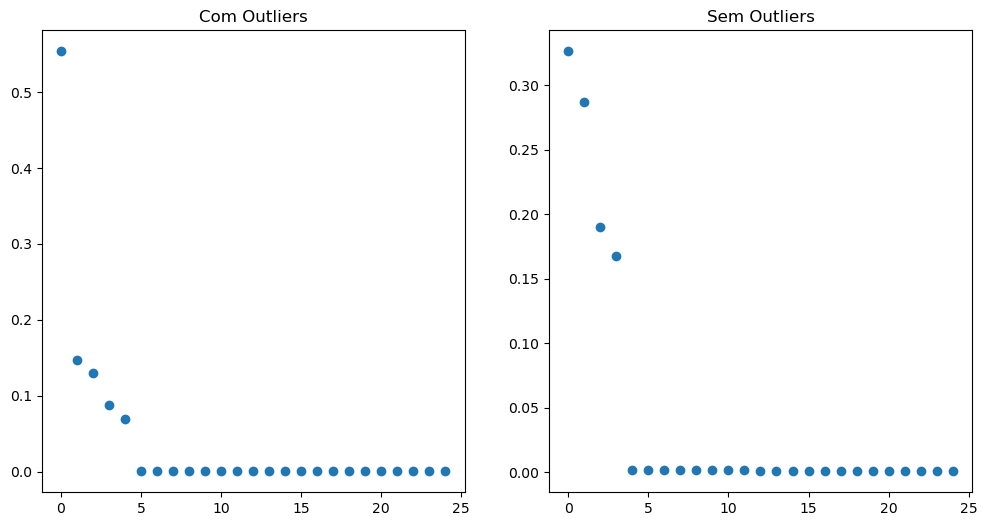

In [ ]:
plt.rcParams['figure.figsize'] = [12, 6]
f, (ax1, ax2)  = plt.subplots(1,2)

ax1.plot(X_transformed.explained_variance_ratio_, 'o')
ax1.set_title('Com Outliers')
ax2.plot(X_no_outliers_transformed.explained_variance_ratio_, 'o')
ax2.set_title('Sem Outliers')

### Exercício 8)
Qual a proporção de variância explicada pelas 4 primeiras componentes principais após a remoção dos outliers?

In [ ]:
perc_exp = np.sum(X_no_outliers_transformed.explained_variance_ratio_[0:4])
print('Porcentagem de informacao 4 primeiras componentes principais: ',
      100*perc_exp,'%')

Porcentagem de informacao 4 primeiras componentes principais:  97.07288797875442 %


### Exercício 9)
Repita o exercício 4), utilizando os dados sem outliers, ou seja, projete os dados sem outliers nas duas primeiras direções principais e faça um scatter plot.

Os clusters contidos nos dados devem ser claramente visíveis após a remoção dos outliers.

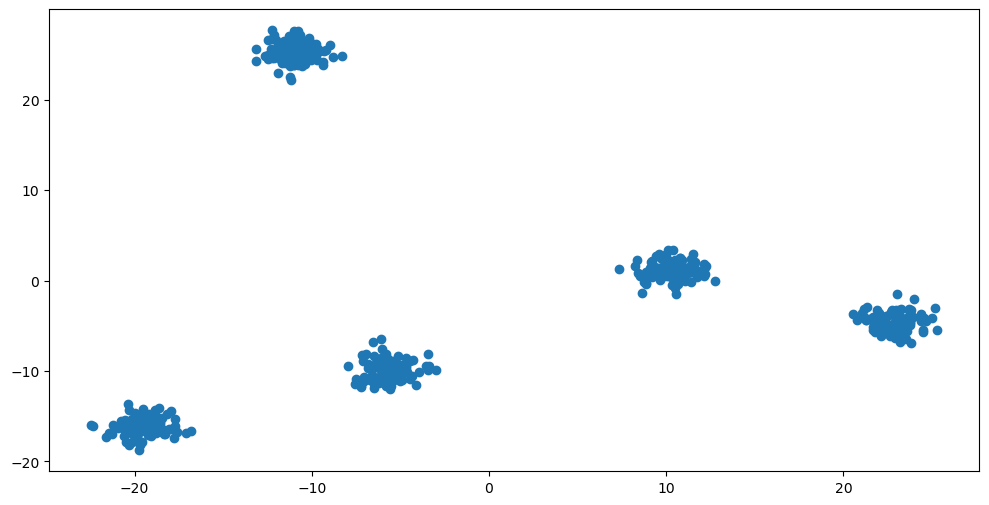

In [ ]:
X2D_no_outliers = np.dot(X_no_outliers,X_no_outliers_transformed.components_[0:2].T)

plt.scatter(X2D_no_outliers[:,0],X2D_no_outliers[:,1])

## <span style="color:blue">Análise de Componentes Principais -  Avaliação</span>

Os exercícios abaixo farão uso do conjunto de dados <font style="font-family: monaco">blobs2.csv</font> disponível no _moodle_.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Exercício 1)
Calcule as direções principais dos dados contidos no arquivo <font style="font-family: monaco">blobs2.csv</font>. Qual a proporção de variância explicada pelas duas direções principais de maior variância?

a) 17.0%<br>
b) 21.3%<br>
c) 35.1% <br>
<font color='red'>d) 41.1%</font>


In [ ]:
from sklearn.decomposition import PCA

X = pd.read_csv('blobs2.csv').values

pca_obj=PCA(svd_solver='full')
X_transformed = pca_obj.fit(X)

print('Porcentagem explicada pelas duas direções de maior variância:',
      np.sum(X_transformed.explained_variance_ratio_[0:2])*100)

Porcentagem explicada pelas duas direções de maior variância: 41.11181403653752


### Exercício 2)
Qual o número mínimo de direções principais necessárias para representar $75\%$ da variância contida nos dados?

<font color='red'>a) 4</font><br>
b) 5<br>
c) 6<br>
d) 7

In [ ]:
percentage_info = 0.0
num_components = 0
for i in range(X_transformed.explained_variance_ratio_.shape[0]):
    percentage_info += X_transformed.explained_variance_ratio_[i]
    print(percentage_info)
    if percentage_info >= 0.75:
        num_components = i+1
        break
        
print('Numero de componentes contendo 75% da informacao: ',num_components)
print('\nPorcentagem da informacao: ',percentage_info)

0.22168097004546594
0.4111181403653752
0.5938668154912066
0.7583245900745524
Numero de componentes contendo 75% da informacao:  4

Porcentagem da informacao:  0.7583245900745524


### Exercício 3)
Existem _outliers_ nos dados originais. Utilize z-score com um threshold de 2.8 para identificar os outliers e removê-los dos dados. Quantos outliers foram identificados?

a) 3<br>
b) 4<br>
<font color='red'>c) 5</font><br>
d) 6

In [ ]:
from scipy.stats import zscore

# calculando z-scores
Xzscore = zscore(X,axis=0)

# encontrando outliers
outliers = np.abs(Xzscore) > 2.8
outliers_id = np.argwhere(outliers == True)
print('quantidade de outliers: ',outliers_id.shape[0])

# removendo outliers
df = pd.DataFrame(data=X)
print(df.shape)
df = df.drop(outliers_id[:,0],axis=0)
print(df.shape)

X_no_outliers = df.values

[[116  13]
 [240  16]
 [286   5]
 [298  17]
 [398   6]]
quantidade de outliers:  5
(600, 25)
(595, 25)


### Exercício 4)
Qual a porcentagem de variância explicada pelas duas primeiras componentes principais após a remoção dos outliers?

a) aproximadamente 90.1% <br>
b) aproximadamente  97.3% <br>
c) aproximadamente 80.6% <br>
<font color='red'> d) aproximadamente 75.3% </font>

In [ ]:
pca_obj2=PCA(svd_solver='full')
X_no_outliers_transformed = pca_obj2.fit(X_no_outliers)

perc_exp = np.sum(X_no_outliers_transformed.explained_variance_ratio_[0:2])
print('Porcentagem de variância explicada pelas 2 primeiras componentes principais: ',
      '{:.1f}'.format(100*perc_exp),'%')

Porcentagem de variância explicada pelas 2 primeiras componentes principais:  75.3 %


### Exercício 5)
Projete os dados sem outliers nas duas primeiras direções principais. Quantos clusters você consegue visualizar claramente na projeção dos dados?

a) 1 <br>
b) 2<br>
c) 3<br>
<font color='red'>d) 4</font>


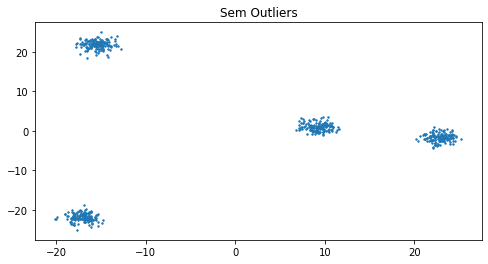

In [ ]:
X2D_no_outliers = np.dot(X_no_outliers,X_no_outliers_transformed.components_[0:2].T)

plt.rcParams['figure.figsize'] = [8, 4]
f, ax1  = plt.subplots(1,1)
ax1.set_title('Sem Outliers')
ax1.scatter(X2D_no_outliers[:,0],X2D_no_outliers[:,1],s=2)

## <font color="blue"> Identificação e Extração de Texto </font>

## Conteúdo
- OCR
   - Imagens
   - Arquivos PDF
- Expressões Regulares

**IMPORTANTE**: As imagens e arquivos PDF empregados neste notebook, nos exercícios e na avaliação estão contidos no arquivo
<font style="font-family: monaco">arquivos de apoio.zip</font>.
Você deve descompactar o ZIP e mover os arquivos gerados para o mesmo diretório onde os notebooks estão sendo executados.

## <font color='blue'>OCR</font>
Optical Character Recognition (OCR) é o processo de identificar e extrair textos (no formato "ascii") que estejam contidos em imagens. 

$$
\fbox{Imagem} \Longrightarrow \fbox{Texto (String)}
$$

Existem vários pacotes disponíveis para python dedicados a tal tarefa:
- **pytesseract**
- **pyocr**
- **textract**

A maior parte destes pacotes são "wrappers" em Python da biblioteca Tesseract-OCR. Em particular, <font color='blue'>pytesseract</font> tem ganhado muita atenção nos últimos anos, incorporando soluções baseadas em deep learning que melhoram muito a qualidade dos resultados quando comparados aos de outros pacotes.

O pacote <font color='blue'>pytesseract</font> não faz parte da instalação padrão do Anaconda, e deve ser instalado separadamente. Para realizar a instalação é necessário primeiro instalar a biblioteca <font color='blue'>tesseract</font> (não é uma biblioteca python). As instruções de instalação desta biblioteca podem ser encontradas  [aqui](https://anaconda.org/conda-forge/tesseract) (assumindo que sua instalação do Python é via Anaconda). 

A instalação Anaconda vem com suporte à **língua portuguesa**. Após instalar a biblioteca <font color='blue'>tesseract</font> execute o comando abaixo (assumindo que sua instalação do Python é via Anaconda)
```os
conda install -c conda-forge pytesseract 
```
para instalar o "wrapper" python para <font color='blue'>tesseract</font>.

**RECOMENDAÇÃO MUITO IMPORTANTE**: Para este módulo do curso, recomendamos fortemente utilizar o **Colab** do Google para rodar os notebooks. Para instalar o <font color='blue'>tesseract</font> no Colab basta rodar a célula abaixo.

Se você tiver dificuldade com a instalação, peça ajuda aos monitores.

---

In [ ]:
# Instalando as bibliotecas necessárias para este módulo no Colab

!apt install tesseract-ocr
!apt install tesseract-ocr-por
!apt install libtesseract-dev
!apt install poppler-utils
!pip install pytesseract
!pip install pdf2image

### OCR em Imagens
Em geral, o procedimento de extração de texto demanda etapas de pré-processamento, que vão desde a leitura de documentos até mudanças de representação do sistema de cor. 

A primeira tarefa é carregar a imagem que será processada. Utilizaremos o pacote <font color='blue'>PIL</font> para este fim. A escolha do pacote <font color='blue'>PIL</font> se justifica pelo fato do pacote OCR <font color='blue'>pytesseract</font> (que será utilizado em nossos exemplos) trabalhar com objetos gerados pelo <font color='blue'>PIL</font>.

Uma vez que a imagem tenha sido carregada, a utilização do <font color='blue'>pytesseract</font> se resume a enviar a imagem como argumento e receber uma string como resposta.

#### Qualidade do Resultado
A qualidade do resultado produzido pelo <font color='blue'>pytesseract</font> está diretamente relacionanda com as propriedades da imagem enviada como argumento. Considere a imagem
<img src="imagem_test1.png" alt="drawing" width="200"/>
Vamos utilizar o <font color='blue'>pytesseract</font> para extrair o texto contido nesta imagem.

In [ ]:
import pytesseract as ocr, pytesseract
from PIL import Image

pytesseract.pytesseract.tesseract_cmd = 'C:\\Users\\maaveiro\\AppData\\Local\\Programs\\Tesseract-OCR\\tesseract.exe'

phrase = ocr.image_to_string(Image.open('imagem_test1.png'), lang='por')
print(phrase)

Para a imagem `imagem_test1.png`, o OCR não deve ter sido capaz de detectar e extrair o texto _"Texto para ser extraido"_. Considere agora a imagem abaixo, que é a mesma do exemplo anterior, porém com a posição do texto deslocada para baixo:
<img src="imagem_test2.png" alt="drawing" width="200"/>

In [ ]:
phrase = ocr.image_to_string(Image.open('imagem_test2.png'), lang='por')
print(phrase)

Texto para ser extraido




Note que para a imagem `imagem_test2.png` o texto foi perfeitamente extraído. A razão é que o contraste entre o fundo e o texto fica mais acentuado quando o texto foi deslocado para a região mais "clara" da imagem.

Vejamos outros exemplos:

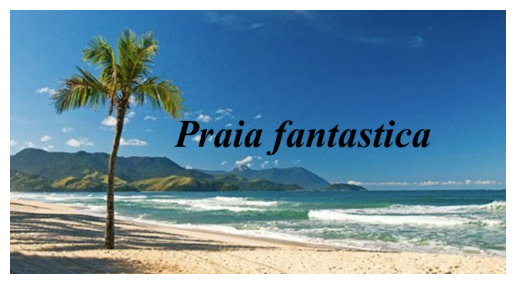

Texto extraido:  


In [ ]:
import matplotlib.pyplot as plt

im = Image.open("imagem_test3.png")
plt.axis('off')
plt.imshow(im)
plt.show()

phrase = ocr.image_to_string(im, lang='por')
print('Texto extraido: ',phrase) # como o contraste entre a imagem e o fundo não é grande
                                 # o OCR não consegue extrair corretamente a frase "praia fantastica"

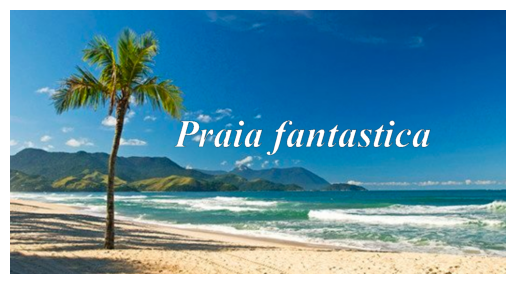

Texto extraido:  ) [ Ve
23 W

paia fantastica




In [ ]:
im = Image.open("imagem_test4.png")
plt.axis('off')
plt.imshow(im)
plt.show()

phrase = ocr.image_to_string(im, lang='por')
print('Texto extraido: ',phrase) # mudando o contraste entre a imagem e o fundo 
                                 # o OCR consegue extrair corretamente a frase 
                                 # "praia fantastica", mas alguns caracteres indesajados 
                                 # são obtidos

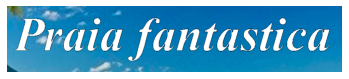

Texto extraido:  Práia fantastica



In [ ]:
im = Image.open("imagem_test5.png")
plt.axis('off')
plt.imshow(im)
plt.show()

phrase = ocr.image_to_string(im, lang='por')
print('Texto extraido: ',phrase) # recortando da imagem apenas o pedaço que contém a fase
                                 # o OCR tem um desempenho melhor

Recortando a parte da imagem que contém o texto resulta em uma extração de muito melhor qualidade. 

Os exemplos acima mostram que as propriedades da imagem onde o texto está inserido impactam drasticamente na qualidade do resultado do OCR.

Existe um conjunto de recomendações para que se obtenha resultados satisfatórios com o OCR:

1. Deve-se sempre utilizar imagens em tons de cinza ao invés de imagens coloridas
2. Remover ruídos da imagem
3. Manter uma resolução de 300dpi
4. Manter o texto alinhado na horizontal
5. Os caracteres do texto a ser extraído devem ter pelo menos 10 pixels de altura
6. O texto a ser extraído deve estar em uma única língua
7. Sempre que possível recortar o pedaço da imagem onde o texto está inserido

O <font color='blue'>tesseract</font> aplica técnicas de processamento de imagens internamente a fim de satisfazer as recomendações acima, porém, nem sempre o resultado é satisfatório. Desta forma, um pré-processamento manual pode ser necessário. 

Quando uma quantidade grande de imagens precisa ser processada, o ideal é que se estabeleça um protocolo que garanta as recomendações acima para todas as imagens na base, como por exemplo, seguir um padrão para digitalização de documentos, controlando iluminação na captura de imagens, etc.

### OCR em arquivos PDF 

Um procedimento bastante comum para ser extrair texto de arquivos PDF é primeiro converter o arquivo PDF em uma imagem, aplicando o OCR na imagem resultante. 

Exitem alguns pacotes python para converter arquivos PDF em imagens, sendo o <font color='blue'>wand</font> e <font color='blue'> pdf2image </font> os mais utilizados. Iremos utilizar  <font color='blue'> pdf2image</font>, que também não é um pacote nativo do Python. De fato, o pacote <font color='blue'> pdf2image </font> é um wrapper python para a biblioteca <font color='blue'>poppler</font>, que precisa ser instalada manualmente, como foi feito com o <font color='blue'>tesseract</font>. Detalhes de como realizar a instalação podem ser encontrados [aqui](https://pypi.org/project/pdf2image/) e [aqui](https://pdf2image.readthedocs.io/en/latest/). Uma vez instalada a biblioteca, execute o comando:
```os
conda install -c conda-forge pdf2image
```
para instalar o wrapper <font color='blue'> pdf2image </font> para python, 

#### pdf2image
A conversão de arquivos PDF para imagem é feita de modo que cada página do arquivo se torne uma imagem.

$$
\fbox{PDF}\Longrightarrow\fbox{Imagem}\Longrightarrow\fbox{Texto}
$$

In [ ]:
# Convertendo as páginas do arquivo PDF 'pdf_test.pdf' em imagens

import os
from PIL import Image 
import pytesseract 
from pdf2image import convert_from_path 
poppler_path = 'C:\\Users\\maaveiro\\AppData\\Local\\Programs\\poppler-0.67.0\\bin'

# Carrega o PDF e armazenas todas as páginas separadamente
# na variável
imagem_paginas = convert_from_path('pdf_test.pdf', poppler_path=poppler_path) 

# Voce precisa criar um diretorio chamado "paginas"
# na mesma pasta onde este notebook esta armazenado

# Criando diretorio onde iremos salvar as paginas
# Checar se existe o diretorio
directory = "paginas"
if not os.path.exists(directory):
    # If it doesn't exist, create it
    os.makedirs(directory)

# Salvando cada imagem das páginas em um arquivo
for i,pagina in enumerate(imagem_paginas): 
    # PDF pagina 1 -> pagina_1.png  
    # PDF pagina 2 -> pagina_2.png  
    # .... 
    filename = "paginas/pagina_"+str(i)+".png"
      
    # Salavando a imagen da página em um arquivo
    print('Gravando pagina: ',filename)
    pagina.save(filename, 'PNG') 

Gravando pagina:  paginas/pagina_0.png
Gravando pagina:  paginas/pagina_1.png


In [ ]:
# utilizando OCR para extrair o texto das imagens das paginas do aquivo PDF
import pytesseract as ocr
from PIL import Image
import glob  

files = glob.glob("paginas/*")

texto = []
for filename in files:
    t = ocr.image_to_string(Image.open(filename), lang='por')
    texto.append(t)

for i,t in enumerate(texto):
    print(5*'**','Texto da pagina ',i,5*'**','\n')
    print(texto[i])

********** Texto da pagina  0 ********** 

Falta de Gas em São Carlos

Muitos leitores entraram em contato com o whatsapp do SCA reclamando da falta de gás
em distribuidoras de gás de cozinha na cidade. Está muito difícil de achar o botijão GLP de
13 kg.

O SCA entrou em contato com algumas revendedoras e a resposta é que não havia o
produto para entregar e não há previsão de chegada. Em um estabelecimento chegaram 10
botijões que foram vendidos rapidamente para pessoas que estavam aguardando na fila na
frente do depósito.

A falta de gás se deve a grande procura do produto por causa da pandemia de coronavírus
e os consumidores estão estocando desnecessariamente botijões. Outro fator é que
aumentou o consumo, já que muitas pessoas estão comendo em casa, gastando mais gás,
devido as medidas de distanciamento social.

Leia mais em:
https://www.saocarlosagora.com.br/cidade/falta-gas-de-cozinha-em-sao-carlos/124785/

********** Texto da pagina  1 ********** 

Corona em São Carlos

A Vigilâ

### Outras alternativas ###
O procedimento descrito acima para extrair texto de documentos PDF é bastante geral e funciona bem na maioria dos casos. Porém, existem pacotes Python capazes de extrair o texto de arquivos PDF sem a necessidade da pré-conversão das páginas para imagem. Dentre tais pacotes destacam-se:

- PDFPlumber
- PyMuPDF
- PDFMiner

A qualidade do texto extraído por tais pacotes depende de como o PDF foi gerado. Não entraremos em detalhes sobre tais pacotes, mas fica aqui a dica.

## <font color='blue'>Expressões Regulares</font>
Uma expressão regular é uma sequência de caracteres que segue um padrão específico. Por exemplo, o CPF das pessoas segue um padrão de caracteres específico, com o formato:
```os
ddd.ddd.ddd-dd
```
onde 'd' é um dígito [0-9]. Outro exemplo é a numeração de placas de veículos, que, com o padrão Mercosul, passou a ter o formato:
```os
wwwdwdd
```
onde 'w' é um caracter do alfabeto [A-Z] e 'd' um dígito numérico [0-9].

Muitas aplicações de identificação de texto envolvem a questão de procurar por padrões específicos em um bloco de texto.

### O pacote <font color='blue'> re </font> (regex)
O pacote de expressões regulares do python, chamado <font color='blue'>regex</font> e denominado <font color='blue'> re</font>, é uma poderosa ferramenta para identificar e extrair padrões como sequências de caracteres a partir de strings. Os métodos do pacote <font color='blue'> re </font> utilizam uma simbologia para representar as expressões regulares, permitindo a realização de buscas bastante complexas. Vejamos alguns exemplos da simbologia utilizada e seu funcionamento.

In [ ]:
import re

#### símbolo <font color='blue'>*</font>
O símbolo '*' permite encontrar zero ou mais ocorrências de uma sequência 
de caracteres que precedem o símbolo.

In [ ]:
texto = 'O pacote RE é complicado no começo mas é só no commmeço'


print(re.findall('com*',texto)) # busca todas as ocorrências da 
                                # sequência 'co' seguida ou não da letra
                                # 'm', não importando o número de vezes
                                # que 'm' ocorra

['co', 'com', 'com', 'commm']


#### símbolo <font color='blue'>[ ] </font>
O símbolo '[ ]' permite encontrar qualquer um dos caracteres que aparece 
no conjunto

In [ ]:
texto = 'O pacote RE é complicado no começo, mas é coisa rápida conhecer'

print(re.findall('co[tm]',texto)) # encontra todas as ocorrências 
                                  # de 'co' seguidas de 't' ou 'm'
    
    
print(re.findall('co[tm]*',texto)) # quando combinado com *, econtra as ocorrências
                                   # de 'co' mesmo que não sejam
                                   # seguidas de 't' ou 'm'

['cot', 'com', 'com']
['cot', 'com', 'com', 'co', 'co']


#### símbolo <font color='blue'> + </font>
O símbolo '+' é quivalente ao símbolo '*', porém, pelo menos uma ocorrência do caractere (ou conjunto de caracteres) que precede o símbolo deve aparecer.

In [ ]:
texto = 'Nesta sequência várias vezes apareceriam ia,'
texto += ' mas quantas seriammm? ia sozinho só vai aparecer ' 
texto += 'quando * for usado'

print(re.findall('ia[,m]',texto)) # busca a sequência 'ia' seguida 
                                  # de ',' ou 'm'  
    
print(re.findall('ia[,m]+',texto)) # com o '+' multiplas ocorrências
                                  # de ',' ou 'm' são válidas
    
print(re.findall('ia[,m]*',texto)) # com o '*' multiplas ocorrências
                                  # de ',' ou 'm' também são válidas
                                

['iam', 'ia,', 'iam']
['iam', 'ia,', 'iammm']
['ia', 'ia', 'iam', 'ia,', 'iammm', 'ia']


#### símbolos <font color='blue'> \d \w </font>
O símbolo '\d' corresponde aos dígitos [0-9] e '\w' significa qualquer caractere alfanumérico [a-zA-Z0-9].

In [ ]:
texto = 'Nesta sequência várias vezes apareceriam ia, '
texto += 'mas ia0 aparece somente uma vez'

print(re.findall('ia[a-zA-Z]',texto)) # 'ia' seguido que qualquer letra do alfabeto
print(re.findall('ia\w',texto)) # 'ia' seguido que qualquer caractere alfanumérico

['ias', 'iam']
['ias', 'iam', 'ia0']


In [ ]:
texto = 'afde 86,87 asdf178,2324  45432,asg 1235'

# encontrando uma sequência de dois dígitos seguidos por vírgula
print(re.findall('\d\d,',texto))

# encontrando qualquer número com dois ou mais dígitos seguidos por vírgula
print(re.findall('[\d]+,',texto))

['86,', '78,', '32,']
['86,', '178,', '45432,']


Existem muitos outros símbolos que podem ser utilizados. Outros métodos de busca como <font color='blue'>search()</font>, <font color='blue'>sub()</font>, dentre outros, também estão disponíveis no pacote <font color='blue'>re</font>.


Mais detalhes sobre o pacote <font color='blue'> re </font> pode ser encontrado [aqui](https://www.w3schools.com/python/python_regex.asp) ou [aqui](https://docs.python.org/3/library/re.html).

## <font color="blue">Solução dos Exercícios</font>

Os exercícios a seguir farão uso dos seguintes aquivos:

-<font style="font-family: monaco"> pdf_exercicios.pdf</font><br>
-<font style="font-family: monaco"> cupom_fiscal1.png </font><br>
-<font style="font-family: monaco"> cupom_fiscal2.png </font><br>
-<font style="font-family: monaco"> nfe-example.pdf</font>

Tais arquivos estão no <font style="font-family: monaco">arquivos de apoio.zip</font>, disponível para download no Moodle.

**RECOMENDAÇÃO MUITO IMPORTANTE**: Para este módulo do curso, recomendamos fortemente utilizar o **Colab** do Google para rodar os notebooks. Para instalar o <font color='blue'>tesseract</font> no Colab basta rodar a célula abaixo.

Se você tiver dificuldade com a instalação, peça ajuda aos monitores.

---

In [ ]:
# Bibliotecas que iremos utilizar no módulo

!apt install tesseract-ocr
!apt install tesseract-ocr-por
!apt install libtesseract-dev
!apt install poppler-utils
!pip install pytesseract
!pip install pdf2image

### Exercício 1)
Arquivos PDF tipicamente possuem diversas páginas. O processo de extração do conteúdo textual de cada página consiste de duas etapas principais:
1. Conversão das páginas pdf em imagens
2. Extração do texto a partir das imagens das páginas.

A fim de faciliar a etapa 2, recomenda-se salvar as imagens das páginas em um diretório que contenha apenas as imagens geradas a partir das páginas. Escreva uma função em Python que receba como atributo o nome de um arquivo PDF e crie um diretório com o mesmo nome do arquivo seguido pela palavra "\_imagens". Por exemplo, se o arquivo PDF for chamado `meu_arquivo.pdf`, o diretório criado deverá ser `meu_arquivo_imagens`.

A função deve verificar se o diretório já existe. Se não existir, deve criá-lo. Se o diretório já existe, então todos os arquivos contidos no 
diretório devem ser removidos para que o diretório se torne vazio.

**Dica**: Utilize os métodos <font color='blue'>os.path.exists</font>, <font color='blue'>os.makedirs</font> e <font color='blue'>os.remove</font> do pacote <font color='blue'>os</font> combinados com o método <font color='blue'>glob.glob</font> do pacote <font color='blue'>glob</font>.

In [ ]:
import os
import glob

def create_image_dir(filename):
    name = filename.split('.')[0]
    dir_name = name+'_imagens'
    if not os.path.exists(dir_name):  # verificando se o diretório existe
        os.makedirs(dir_name)      
    else:
        files = glob.glob(dir_name+'/*') # removendo arquivos do
        for f in files:                  # diretório caso ele já exista
            os.remove(f)
            
    return(dir_name)
    
create_image_dir('testando arquivo.pdf')

'testando arquivo_imagens'

### Exercício 2)
Converta cada página do arquivo <font style="font-family: monaco"> pdf_exercicios.pdf</font> em uma imagem, utilizando a função criada no exercício 1) para criar um diretório e armazenar as imagens geradas no diretório criado.

In [ ]:
from pdf2image import convert_from_path 

filename = 'pdf_exercicios.pdf'
diretorio = create_image_dir(filename)

imagem_paginas = convert_from_path(filename)

for i,pagina in enumerate(imagem_paginas): 
    image_name = diretorio + "/pagina_"+str(i)+".png"  # nome do arquivo da imagem
      
    # Salavando a imagen da página em um arquivo
    print('Gravando pagina: ',image_name)
    pagina.save(image_name, 'PNG') 

Gravando pagina:  pdf_exercicios_imagens/pagina_0.png
Gravando pagina:  pdf_exercicios_imagens/pagina_1.png
Gravando pagina:  pdf_exercicios_imagens/pagina_2.png


### Exercício 3)
Utilize o pacote <font color='blue'>PIL</font> combinado com <font color='blue'>matplotlib</font> para exibir todas as imagens criadas.

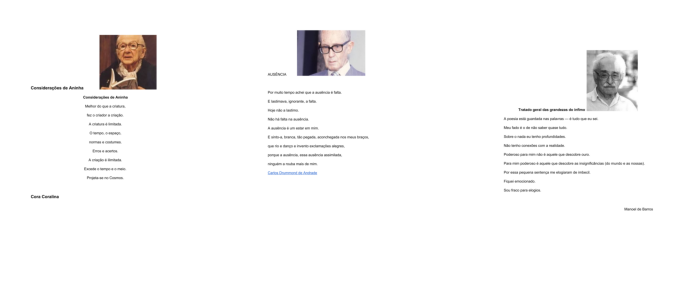

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

files = glob.glob(diretorio+'/*') # obtendo os nomes das imagens
n = len(files)                    # quantidade de imagens

fig,ax = plt.subplots(1,n)    # montando um subplot para cada imagem
fig.set_size_inches(12, 6)
for i,f in enumerate(files):
    image = Image.open(f)
    ax[i].axis('off')
    ax[i].imshow(image) 

### Exercício 4)
Aplique o OCR em cada imagem das páginas do arquivo <font style="font-family: monaco"> pdf_exercicios.pdf</font>. Armazene o texto de cada página em um dicionário onde a chave é o número da página e o valor a string extraída da página.  

In [ ]:
import pytesseract as ocr
from PIL import Image
import glob 

files = glob.glob(diretorio+'/*')

dpaginas = {}
for f in files:
     # como o glob nao retorna os arquivos 
     # ordenados de acordo com as pagina
     # precisamos pegar o número da pagina
     # a partir do nome do arquivo
    page_number = int(f.split('.')[0][-1]) # número da página
    dpaginas[page_number] = ocr.image_to_string(Image.open(f), lang='por')

print(dpaginas.keys())

dict_keys([1, 0, 2])


### Exercício 5)
Cada página do arquivo <font style="font-family: monaco"> pdf_exercicios.pdf</font> corresponde a um poema cujo nome do autor aparece logo abaixo do texto do poema. Encontre o nome dos autores de cada um dos peomas e armazene-os em uma lista.

In [ ]:
# Para encontrar o nome do autor temos que fazer algumas suposições 
# Neste caso iremos supor que o nome do autor corresponde a última sequência de
# carateres alfa-numéricos da string detectada pelo OCR que é precedida por uma
# quebra de linha ('\n'). 
# Desta forma, percorremos cada string em sentido reverso até encontrar
# o primeiro caractere alfa-numérico e então extraímos os caracteres até que 
# uma quebra de linha seja encontrada.

autores = []
for k,v in dpaginas.items():
    i = -1
    while(not v[i].isalpha()):   # encontra o primeiro caracter alfa-numérico no sentido reverso
        i = i - 1                # da string. A variável i indica onde este caracter está
    autor = ''
    while(v[i]!='\n'):           # extrai todos os caracteres até que uma quebra de linha 
        autor += v[i]            # seja encontrada
        i = i - 1
    autores.append(autor[::-1])  # armazena o nome do autor em uma lista
    
print(autores)

['Cora Coralina', 'Carlos Drummond de Andrade', 'Manoel de Barros']


In [ ]:
# Solução usando Regex
import re

autores = []
for k,v in dpaginas.items():
    v = v[::-1]     # reverte a ordem da string (só para faciliar)
    m = re.search('[a-zA-Z]', v)         # encontra a posição do primeiro caracter válido
    n = re.search('[\n]', v[m.start():]) # encontra o primeiro símbolo de quebra de linha 
                                         # após a seq. de caracteres
    autores.append(v[m.start():n.start()+2][::-1])  # o método start retorna a posição 
                                                    # retornada pela busca. O +2 no comando
                                                    # n.start()+2 é necessário pois a busca
                                                    # retorna a posição do '\n' e o caractere
                                                    # do inicio do nome está duas posições a frente
    
print(autores)

['Cora Coralina', 'Carlos Drummond de Andrade', 'Manoel de Barros']


### Exercício 6)
Encontre qual a página que corresponde ao poema de Cora Coralina e imprima o texto todo.

In [ ]:
for k,v in dpaginas.items():
    if 'Cora Coralina' in v:
        print(v)

 

Considerações de Aninha
Considerações de Aninha
Melhor do que a criatura,
fez o criador a criação.
A criatura é limitada.
O tempo, o espaço,
normas e costumes.
Erros e acertos.
A criação é ilimitada.
Excede o tempo e o meio.

Projeta-se no Cosmos.

Cora Coralina




### Exercício 7)
Os arquivos <font style="font-family: monaco"> cupom-fiscal1.png </font>  e <font style="font-family: monaco"> cupom-fiscal2.png </font> correspondem a imagens de cupons fiscais. Aplicando OCR, extraia o texto contido nas imagens e armazene em variáveis do tipo string.

In [ ]:
import pytesseract as ocr
from PIL import Image

text_cupom1 = ocr.image_to_string(Image.open('cupom-fiscal1.png'), lang='por')
text_cupom2 = ocr.image_to_string(Image.open('cupom-fiscal2.png'), lang='por')
print(text_cupom1)
print(5*'--')
print(text_cupom2)

22/05/2013 15:11:33 CCF:000012 oo: 000022

CUPOM FISCAL

ITEM CópIGO DESCRIÇÃO
QTD. UM VL UNI Ré st vwL ITEM RS
1 E CAMISA BRASIL 15UN X 10,00 I1 150,00
TOTAL R$ 150,00
Dinheizo 150,00

LojaFacil v5.0
Val. Aprox. dos Tributos: R$48,14 (32,098) (IBPT)

ACE1Z4  2CDAE4  SSEISB  ISDSAS  SCECZA  21C521
EPSON TM-TEI EBII
ECE-IF VERSÃO:01.03.00 ECF:001 LJsLJ01
cecececececoanrace 22/05/2013 15:11:40
FAB: EPMMO40OOOO000000001

   


----------
METALNOX INDÚSTRIA METALÚRGICA LTDA
RUA JOSÉ THEODORO RIBEIRO - 3571, ILHA DA FIGUEIRA
CEP: 89.258-001 JARAGUÁ DO SUL, SC

CNPJ; 78.810.975/0001-72
TE: XXX XKXXXX

20/06/2015 11:55:23 CCF: 012249 COD: 020990
CNPJICPF consumidor: 754.523,157-05
NOME: JOÃO DOS SANTOS
END: RUA GETÚLIO VARGAS, 449 - SÃO PAULO
CUPOM FISCAL

ITEM CÓDIGO DESCRIÇÃO QTD UN VLUNIT(RS) ST VL ITEMIRS)

001 1955 PONTEIRAPARAPER 204250 TI700% 50,00
001 1875  RODIZIOSFAZMM 204280  T1700% 56,00
TOTAL R$ 106,00
Dinheiro 150,00
TROCO 44,00
Vendedor: 000008 000213946-01 - CX 1 -SIP-
Valor 

### Exercício 8)
Utilize o pacote <font color='blue'> re </font> para identificar nas strings extraídas dos cupons ficais do exercício 7), todos os valores que possam estar relacionados com preços, ou seja, sequências de dígitos numéricos que precedam uma virgula, seguido de **exatamente dois** dígitos depois da vírgula. Por exemplo, quando aplicado à string, 
```python
'754.523,157-05 1050,00 FAZMM 204280 (32,098) R$48,14'
```
o processo deve resultar em:
```python
['1050,00 ', '48,14']
```


In [ ]:
import re

texto = '754.523,157-05 1050,00 FAZMM 204280 (32,098) R$48,14'

print(re.findall('[\d]+,[\d]{2}\s+|[\d]+,[\d]{2}$',texto))
# a busca demanda duas opcoes [\d]+,[\d]{2}\s+ ou [\d]+,[\d]{2}$
# o simbolo '|' corresponde ao 'ou' 
# o simbolo {2} força apenas dois digitos depois da vírgula 
# o simbolo \s garante que depois dos dois digitos não existem caracteres,
# apenas espaço em branco, tabular ou quebra de linha
# o simbolo $ admite final da string

['1050,00 ', '48,14']


In [ ]:
print(text_cupom1)
print('\n'+5*'--'+'Valores Identificados'+5*'--')
print(re.findall('[\d]+,[\d]{2}\s+|[\d]+,[\d]{2}$',text_cupom1))

22/05/2013 15:11:33 CCF:000012 oo: 000022

CUPOM FISCAL

ITEM CópIGO DESCRIÇÃO
QTD. UM VL UNI Ré st vwL ITEM RS
1 E CAMISA BRASIL 15UN X 10,00 I1 150,00
TOTAL R$ 150,00
Dinheizo 150,00

LojaFacil v5.0
Val. Aprox. dos Tributos: R$48,14 (32,098) (IBPT)

ACE1Z4  2CDAE4  SSEISB  ISDSAS  SCECZA  21C521
EPSON TM-TEI EBII
ECE-IF VERSÃO:01.03.00 ECF:001 LJsLJ01
cecececececoanrace 22/05/2013 15:11:40
FAB: EPMMO40OOOO000000001

   



----------Valores Identificados----------
['10,00 ', '150,00\n', '150,00\n', '150,00\n\n', '48,14 ']


In [ ]:
print(text_cupom2)
print('\n'+5*'--'+'Valores Identificados'+5*'--')
print(re.findall('[\d]+,[\d]{2}\s+|[\d]+,[\d]{2}$',text_cupom2))

METALNOX INDÚSTRIA METALÚRGICA LTDA
RUA JOSÉ THEODORO RIBEIRO - 3571, ILHA DA FIGUEIRA
CEP: 89.258-001 JARAGUÁ DO SUL, SC

CNPJ; 78.810.975/0001-72
TE: XXX XKXXXX

20/06/2015 11:55:23 CCF: 012249 COD: 020990
CNPJICPF consumidor: 754.523,157-05
NOME: JOÃO DOS SANTOS
END: RUA GETÚLIO VARGAS, 449 - SÃO PAULO
CUPOM FISCAL

ITEM CÓDIGO DESCRIÇÃO QTD UN VLUNIT(RS) ST VL ITEMIRS)

001 1955 PONTEIRAPARAPER 204250 TI700% 50,00
001 1875  RODIZIOSFAZMM 204280  T1700% 56,00
TOTAL R$ 106,00
Dinheiro 150,00
TROCO 44,00
Vendedor: 000008 000213946-01 - CX 1 -SIP-
Valor trib. aprox. [Fed= 0,44] [Est= 0,50)

Fonte: IBPIFECOMERCIO SP 9013aC
BR



----------Valores Identificados----------
['50,00\n', '56,00\n', '106,00\n', '150,00\n', '44,00\n']


### Exercício 9)
Extraia o texto contido no arquivo <font style="font-family: monaco"> nfe-example.pdf</font>. Você deve extrair primeiro a imagem da página (o PDF contém apenas uma página), armazenando a imagem em um arquivo. 

In [ ]:
from pdf2image import convert_from_path 
import pytesseract as ocr
from PIL import Image

filename = 'nfe-example.pdf'

nfe_imagem = convert_from_path(filename)

for i,pagina in enumerate(nfe_imagem): 
    # Salavando a imagen da página em um arquivo
    pagina.save('nfe-example.png', 'PNG') 

text_nfe = ocr.image_to_string(Image.open('nfe-example.png'), lang='por')

In [ ]:
print(text_nfe)

 

 

SERVIÇOS CONSTANTES DA NOTA FISCAL INDICADO AO LADO

 

DATA DE RECEBIMENTO

 

IDENTIFICAÇÃO E ASSINATURA DO RECEBEDOR

 

NF-e

Nº 00000
SÉRIE 001

 

 

 

IDENTIFICAÇÃO DO EMITENTE

DANFE

DOCUMENTO AUXILIAR DA
NOTA FISCAL ELETRÔNICA

 

0 - ENTRADA 1
1- SAÍDA

 

 

 

CHAVE DE ACESSO

 

 

SÉRIE 001

Nº 000006334 FL. 1 /1

Consulta de autenticidade no portal nacional da NF-e
www nfe fazenda gov br/portal

ou no site da Sefaz Autorizadora

 

NATUREZA DE OPERAÇÃO
Simples remessa de transporte

 

PROTOCOLO DE AUTORIZAÇÃO DE USO

 

 

 

 

 

 

 

 

 

 

 

TNSCRIÇÃO ESTADUAL INSCRIÇÃO ESTADUAL DO SUBST. TRIB. CNPITCPE

DESTINATÁRIO / REMETENTE

NOME | RAZÃO SOCIAL CNPJ/CPF DATA DA EMISSÃO

14/02/2020

ENDEREÇO BAIRRO / DISTRITO TER DATA SAIDA [ENTRADA
PARQUE ARNOLD SCHIMIDT 17256111 | 14/02/2020

MUNICÍPIO FONE / FAX UF INSCRIÇÃO ESTADUAL HORA DA SAÍDA

SAO CARLOS -(16) 5533-5353 SP 08:21:36

 

INFORMAÇÕES DO LOCAL DE RETIRADA

 

NOME / RAZÃO SOCIAL,

 

 

 

 

 



### Exercício 10)
Escreva uma expressão regular para encontrar todos os valores monetários do texto extraido (por exemplo: xx.xxx,xx ou xxx,xx). Converta os valores encontrados de _string_ para _float_ e some todos os valores.

In [ ]:
import re

expreg = '[\d]+\.\d\d\d,\d\d|[\d]+,\d\d'

valores = re.findall(expreg,text_nfe)
print(valores)

['0,00', '0,00', '0,00', '0,00', '4.373,49', '100,00', '0,00', '0,00', '0,00', '1,00', '1.377,69', '1.377,69', '0,00', '0,00', '0,00', '0,00', '0,00', '0,00', '1,00', '1.826,92', '1.826,92', '0,00', '0,00', '0,00', '0,00', '0,00', '0,00', '1,00', '1.168,88', '1.168,88', '0,00', '0,00', '0,00', '0,00', '0,00', '0,00']


In [ ]:
# convertendo para float

# removendo espacos em branco, \n, \t, etc
print('Removendo espaço em branco, quebra de linha, tabulações, etc..')
float_list = [''.join(s.split()) for s in valores] 
print(float_list)

# removendo '.' e substituindo ',' por '.' 
print("\nRemovendo '.' e substituindo ',' por '.' ")
float_list = [s.replace('.','').replace(',','.') for s in float_list] 
print(float_list)

# convertendo para float e somando
print("\nConvertendo para float")
float_list = [float(s) for s in float_list] 
print(float_list)
print('\nSoma total: ',sum(float_list))

Removendo espaço em branco, quebra de linha, tabulações, etc..
['0,00', '0,00', '0,00', '0,00', '4.373,49', '100,00', '0,00', '0,00', '0,00', '1.377,69', '1.377,69', '0,00', '0,00', '0,00', '0,00', '1.826,92', '1.826,92', '0,00', '0,00', '0,00', '0,00', '1.168,88', '1.168,88', '0,00', '0,00', '0,00', '0,00']

Removendo '.' e substituindo ',' por '.' 
['0.00', '0.00', '0.00', '0.00', '4373.49', '100.00', '0.00', '0.00', '0.00', '1377.69', '1377.69', '0.00', '0.00', '0.00', '0.00', '1826.92', '1826.92', '0.00', '0.00', '0.00', '0.00', '1168.88', '1168.88', '0.00', '0.00', '0.00', '0.00']

Convertendo para float
[0.0, 0.0, 0.0, 0.0, 4373.49, 100.0, 0.0, 0.0, 0.0, 1377.69, 1377.69, 0.0, 0.0, 0.0, 0.0, 1826.92, 1826.92, 0.0, 0.0, 0.0, 0.0, 1168.88, 1168.88, 0.0, 0.0, 0.0, 0.0]

Soma total:  13220.470000000001


## <font color="blue">Avaliação Solução</font>

**RECOMENDAÇÃO MUITO IMPORTANTE**: Para este módulo do curso, recomendamos fortemente utilizar o **Colab** do Google para rodar os notebooks. Para instalar o <font color='blue'>tesseract</font> no Colab basta rodar a célula abaixo.

Se você tiver dificuldade com a instalação, peça ajuda aos monitores.

---

In [ ]:
# Bibliotecas que iremos utilizar no módulo

!apt install tesseract-ocr
!apt install tesseract-ocr-por
!apt install libtesseract-dev
!apt install poppler-utils
!pip install pytesseract
!pip install pdf2image

Os exercícios a seguir farão uso do aquivo <font style="font-family: monaco"> nfe-avaliacao.pdf</font>, que está no <font style="font-family: monaco">arquivos de apoio.zip</font>, disponível para download no Moodle.

### Exercício 1)
Considere a nota fiscal eletrônica representada no arquivo <font style="font-family: monaco"> nfe-avaliacao.pdf</font>. Converta o arquivo PDF em uma imagem no formato PNG. Utilize o pacote <font color='blue'>PIL</font> para carregar a imagem gerada. Qual a resolução da imagem gerada?

<font color='red'> a) 1653 X 2339 </font><br>
b) 1024 X 640 <br>
c) 640 X 2339<br>
d) 1001 X 2020


**Dica**: Utilize o atribute `size` do objeto PIL para obter as dimensões da imagem e empregue os parâmetros default do método <font color='blue'>convert_from_path</font> para gerar a imagem.


In [ ]:
from pdf2image import convert_from_path 
from PIL import Image

filename = 'nfe-avaliacao.pdf'

nfe_imagem = convert_from_path(filename)

for i,pagina in enumerate(nfe_imagem): 
    # Salavando a imagen da página em um arquivo
    pagina.save('nfe-avaliacao.png', 'PNG') 

In [ ]:
# carregando a imagem e verificando as dimensões

nfe_image = Image.open('nfe-avaliacao.png')
print('Dimensões da imagem',nfe_image.size)
print()

Dimensões da imagem (1653, 2339)


### Exercício 2)
Aplique OCR para extrair o texto contido na imagem gerada no exercício 1) da avaliação. Qual a primeira sequência de caractares alfanuméricos que aparece quando o comando <font color='blue'>print</font> é aplicado no texto extraído?

a) No:<br>
b) Série: 1 <br>
c) IDENTIFICAÇÃO DO EMITENTE<br>
<font color='red'>d) DATA DE RECEBIMENTO</font><br>


**Dica**: Para contar as linhas, procure pelo número de ocorrências do símbolo '\n' no texto extraído.

In [ ]:
import pytesseract as ocr
text_nfe = ocr.image_to_string(Image.open('nfe-avaliacao.png'), lang='por')

#print(repr(text_nfe))
print(text_nfe)

 

 

DATA DE RECEBIMENTO

 

IDENTIFICAÇÃO E ASSINATURA DO RECEBEDOR

 

 

 

 

 

 

IDENTIFICAÇÃO DO EMITENTE

DA

0 -

Nº

 

DOCUMENTO AUXILIAR

ELETRÔNICA

ENTRADA 1
1 - SAÍDA

Série 1
Folha 1/1

NOTA FISCAL

 

 

 

CHAVE DE ACESSO

 

 

 

173550010000012101043403614

 

Autorizadora.

Consulta de autenticidade no portal nacional da NF-e
www.nfe.fazenda.gov.br/portal ou no site da Sefaz

 

NATUREZA DE OPERAÇÃO
Ss -

REMESSA DE FATURAMENTO ANTECIPADO

 

PROTOCOLO DE AUTORIZAÇÃO DE USO

2019 15:04:31

 

 

 

 

 

INSCRIÇÃO ESTADUAL INSCRIÇÃO ESTADUAL DO SUBST. TRIBUT. ENPI
DESTINATÁRIO / REMETENTE
NOME / RAZÃO SOCIAL CNPJ 7 CPF PATA DE EMISSÃO

 

 

 

 

26/11/2019
ENDEREÇO BAIRRO / DISTRITO EP DATA DA ENTRADA/SAÍDA
LOTE 227 PARQUE TECNOLOGICO 17500-200 28/11/2019
MUNICÍPIO FONE / FAX Us [INSCRIÇÃO ESTADUAL HORA DA SAÍDA
SAO CARLOS SP 08:00

 

 

 

 

FATURA / DUPLICATA

 

 

CÁLCULO DO IMPOSTO

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 


### Exercício 3)
Escreva uma expressão regular para encontrar sequências de dígitos separados por vírgulas no texto extraído no exercício 2) da avaliação. Ou seja, todas as ocorrências de uma sequência de dígitos que precedem uma vírgula, a qual é seguida por outra sequência de dígitos (por exemplo: 7545,436). Quantas sequências destes tipo foram encontradas?


a) Menos de 10 <br>
b) Entre 11 e 19<br>
c) Entre 20 e 29<br>
<font color='red'>d) Mais de 30</font>

**DICA**: Combine os símbolos <font color='blue'>[], \d, +</font> 

In [ ]:
import re

#expreg = '[\d]+,\d\d\s'
expreg = '[\d]+,[\d]+'

valores = re.findall(expreg,text_nfe)
print(valores)
print(len(valores))

['0,00', '0,00', '0,00', '0,00', '5687,62', '250,00', '0,00', '337,62', '0,00', '0,00', '1425,19', '5600,00', '1358,617', '1345,008', '8,58', '67,90', '582,58', '0,00', '0,00', '0,00', '0,00', '16,66', '134,90', '2247,43', '0,00', '0,00', '0,00', '0,00', '51,12', '55,90', '2857,61', '0,00', '0,00', '0,00', '0,00', '0,00', '0,00', '0,00']
38


### Exercício 4)
Escreva uma expressão regular para encontrar palavras no texto extraído no exercício 2) da avaliação que contenham a sequência 'ITO','STO', ou 'UTO'. Por exemplo, 'IMPOSTO' e 'PRODUTOS' são resultados válidos. Quantas palavras **distintas** foram encontradas?

a) Menos que 5 <br>
<font color='red'>b) Entre 5 e 7</font><br>
c) Entre 8 e 10<br>
d) Mais 10

**OBS 1**: Considere apenas as sequências onde 'ITO','STO', ou 'UTO' aparecem com letras maiúsculas. 

**OBS 2**: Preste atenção para não contar mais de uma vez cada palavra. Você pode utilizar o comando <font color='blue'> set </font> para extrair as palavras distintas da lista de palavras encontradas.

In [ ]:
cri = '[\w]+[UIS]TO[\w]*'

com_cri = re.findall(cri,text_nfe)
print(set(com_cri))

{'BRUTO', 'DISTRITO', 'IMPOSTO', 'PRODUTOS', 'TRIBUTOS', 'AUTORIZAÇÃO'}


### Exercício 5)
O texto da célula abaixo foi obtido aplicando OCR em um documento PDF. Como pode ser notado, o OCR gerou alguns caracteres errados, principalmente a letra "v" da palavra "valor", que, por alguma razão, pode não ter sido corretamente reconhecida pelo OCR. Note que em alguns casos a letra "v" nem foi identificada, resultando em "alor", o que também foi um erro do OCR. 

Encontre todas as ocorrências da palavra "valor" e suas variações (como "valores" e "valorizado"), considerando os erros de identificação do OCR. Quantas ocorrências distintas foram encontradas (distintas significa não considerar a mesma palavra mais que uma vez)? 

<font color='red'>a) 11 </font><br>
b) 12<br>
c) 13<br>
d) 14

**Dica 1:** Preste atenção para não contar mais de uma vez cada palavra. Você pode utilizar o comando <font color='blue'> set </font> para extrair as palavras distintas da lista de palavras encontradas.

In [ ]:
texto_from_ocr = "O valor e um conceito fundamental em diversas areas \
da vida, desde a economia ate a filosofia. O valor pode ser entnndido \
como a importancia ou significado atribuído a algo ou alguém, podendi \
ter diferentes conotações. Na área econômica, o ualor pode ser entendido \
como o preço que um produto ou serviço possui. Um produto pode ser \
valorado a partir de fatores externos, como mudanças na economia ou \
nas tendências de consumo. Na área social, o alor pode ser entendido \
como a importancia que uma sociedade atribui a determinados \
comportamentos ou valores morais. Esses jalores podem variar de acordo \
com a cultura ou época histórica. Valoros como a honestidade, \
a solidariedade, a tolerância e o respeito são exemplos de valores \
sociais que são considerados importantes em muitas culturas.\
Na área pessoal, valorizar a importancia de cada indivíduo frente a \
diferentes aspectos de sua vida é fundamental. \
Cada pessoa tem seus próprios valores e prioridades, e esses ualores \
podem influenciar decisões e escolhas. Valorizar a liberdade, \
a felicidade, a realização pessoal e o equilíbrio entre vida pessoal e\
profissional podem ser importante para diferentes pessoas. \
Em resumo, o kalor é um conceito amplo e multifacetado, que está \
presente em diversas áreas da vida. É importante refletir sobre quais \
são os nossos valores e prioridades, e como eles podem nos ajudar a \
alcançar nossos objetivos e viver uma vida mais significativa."

In [ ]:
import re

exp_valor = r'[\w]*alor[\w]*'
valor = re.findall(exp_valor,texto_from_ocr)
print(valor)
print(len(valor))
print(set(valor))
print(len(set(valor)))

['valor', 'valor', 'ualor', 'valorado', 'alor', 'valores', 'jalores', 'Valoros', 'valores', 'valorizar', 'valores', 'ualores', 'Valorizar', 'kalor', 'valores']
15
{'alor', 'valor', 'jalores', 'Valoros', 'Valorizar', 'kalor', 'valorado', 'valores', 'ualores', 'valorizar', 'ualor'}
11


## <font color="blue"> Matriz Documento $\times$ Palavras - Bag of Words</font>

---
## Conteúdo
- Introdução
- Pré-processamento
    - Extração de palavras
    - Limpeza de símbolos
    - Stemming
- Construção da Matriz Documentos $\times$ Palavras
    - TF-IDF
    - Remoção das palavras mais e menos frequentes
    
**Bibliografia**
- https://www.nltk.org/book/

Os códigos abaixo fazem uso da coleção de documentos presente no diretório `DocCol1` contido no arquivo <font style="font-family: monaco"> DocCol.zip</font>, o qual pode ser baixado do Moodle.

## Introdução
Analisar, comparar e agrupar documentos textuais com base na similaridade de seus conteúdos são tarefas essenciais em muitas aplicações, como análise de sentimentos, levantamento de fatos históricos, dentre outras. 

Porém, documentos são conjuntos de textos no formato ASCII (ou pondem ser transformados para o formato ASCII), portanto, são dados não estruturados, o que dificulta as tarefas de análise e comparação. Desta forma, é necessário "vetorizar" textos a fim de viabilizar o emprego de processos matemáticos e computacionais como forma de tratamento e análise.

Um mecanismo bastante importante para "vetorizar" documentos é a construção das chamadas matrizes <font color='blue'>Documentos $\times$ Palavras</font>.

O processo de vetorização envolve a extração de palavras relevantes contidas nos textos, descartando símbolos, pontuação, artigos, preposições, pronomes, etc.

## Pré-processamento
A construção de uma matriz Documentos $\times$ Palavras envolve diversas etapas de pré-processamento:

1. Obter a "string" correspondente ao texto de cada documento
2. Extrair as palavras de cada string
3. Remover pontuação e símbolos
4. Remover "Stop Words"
5. Extrair bigramas, trigramas, ...
5. Normalização Léxica

### Obtendo String a partir de Coleção de Documentos

O diretório `DocCol1` contém um conjunto de documentos relacionados a dois tópicos distintos, desenvolvimento espacial (arquivos com as iniciais _sp_) e esportores (arquivos com as iniciais _ba_). O código abaixo carrega todos os documentos e concatena em uma única string.

In [ ]:
# Lendo o documento como uma string
import glob  # glob é um pacote que permite varrer arquivos e diretorios

files = glob.glob("DocCol1/*")  # O diretório contém um conjunto de documentos já no formato ASCII
print(files[:5])

docs = ''
for fname in files:
    with open(fname,'r') as f:
        docs = docs+' '+f.read()  # todos os documentos
                                  # são concatenadas na string 'docs'

['DocCol1/ba12', 'DocCol1/ba5', 'DocCol1/ba4', 'DocCol1/ba18', 'DocCol1/sp25']


### Extraindo Palavras

Uma etapa importante do processo de construção de uma matriz <font color='blue'>Documentos $\times$ Palavras</font> é a identificação das palavras, separando-as dos símbolos, números, etc. O pacote <font color='blue'>nltk</font> do Python possui diversos métodos para processar conjuntos de palavras, incluindo <font color='blue'>word_tokenize</font> que separa as palavras, símbolos, números e outros ''tokens''.

In [ ]:
# nltk.word_tokenize transforma a string em uma lista de palavras
import nltk
nltk.download('punkt')

words = nltk.word_tokenize(docs) # extrai as palavras
print(words[:20])    # 20 primeiras palavras extraidas

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['From', ':', 'hasch', '@', 'jhuvms.hcf.jhu.edu', '(', 'Bruce', "'DoppleAckers", 'Anonymous', "'", 'Hasch', ')', 'Subject', ':', 'Re', ':', 'DAVE', 'KINGMAN', 'FOR', 'THE']


### Removendo Símbolos e Caracteres Isolados

O resultado do método <font color='blue'>word_tokenize</font> é uma lista onde cada elemento é um ''token''. Para limparmos a lista de modo a preservarmos somente as plavras (removendo símbolos, etc.) utilizando o pacote <font color='blue'>string</font> do Python.

In [ ]:
import string
# removend todos os simbolos da lista de palavras
# o método "isalpha" retorna True quando a string é 
# formada apenas por letras do alphabeto
# string.ascii_letters contém a lista de todas as letras do alphabeto

# remove simbolos da
# lista de palavras
words = [w.lower() for w in words if w.isalpha() and w not in string.ascii_letters]  

print(words[:20])

['from', 'hasch', 'bruce', 'anonymous', 'hasch', 'subject', 're', 'dave', 'kingman', 'for', 'the', 'hall', 'of', 'fame', 'in', 'article', 'steve', 'tomassi', 'writes', 'hi']


### Removendo Stop Words
Algumas palavras não contribuem para a semântica dos documentos e devem ser removidas, pois geram um ruído que atrapalha as análises. O método <font color='blue'> stopwords </font> do pacote <font color='blue'> nltk </font> fornece, para várias línguas diferentes, uma lista do que se considera palavras irrelevântes para fins de análise semântica.

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# lista das stop words
stop_words = stopwords.words('english')
print(stop_words[:5])

words = [w for w in words if w not in stop_words] # removendo palavras irrelevantes da lista
print('Palavras Relevantes\n',words[:20])                                 # de palavras

['i', 'me', 'my', 'myself', 'we']
Palavras Relevantes
 ['hasch', 'bruce', 'anonymous', 'hasch', 'subject', 'dave', 'kingman', 'hall', 'fame', 'article', 'steve', 'tomassi', 'writes', 'hi', 'baseball', 'fans', 'say', 'think', 'deserves', 'mean']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Bigramas, Trigramas, ...
Algumas expressões compostas por duas (bigramas) ou mais palavras (n-gramas) contém grande significado semântico, sendo interessante mantê-las juntas na lista de palavras relevantes. O pacote <font color='blue'> nltk </font> contém métodos específicos para extrair bigramas, trigramas, etc.

In [ ]:
from nltk import word_tokenize
from nltk.collocations import * # collocations é o subpacote para 
                                # manipular n-gramas

# BigramAssocMeasures() possui medidas de importância para n-gramas
bigram_measures = nltk.collocations.BigramAssocMeasures() 

# encontrando os top 20 bigramas
finder = BigramCollocationFinder.from_words(words)
for i in finder.nbest(bigram_measures.raw_freq,20):
    words.append(i[0].lower()+' '+i[1].lower())
    
print(words[-10:])

['national space', 'degrees fahrenheit', 'space center', 'astronomical society', 'degrees celsius', 'dewey larson', 'mark singer', 'thu apr', 'celsius degrees', 'jon leech']


## Normalização Léxica

Existem vários métodos de normalização lexica, sendo que _Stemming_ e _Lematização_ estão entre os mais relevantes. Nos exemplos abaixo utilizaremos o método de _Stemming_. Informações e conceitos sobre _Lematização_ podem ser encontrados [aqui](https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk)

### Stemming
O processo de stemming busca converter as palavras para sua forma base, por exemplo: 

ando, andando, andei, andarei $\longrightarrow$ andar

O pacote <font color='blue'>nltk</font> possui o método <font color='blue'>PorterStemmer</font> que executa o steeming das palavras.

In [ ]:
from nltk.stem import PorterStemmer

words = [PorterStemmer().stem(w) for w in words]
print(words[:100])

['hasch', 'bruce', 'anonym', 'hasch', 'subject', 'dave', 'kingman', 'hall', 'fame', 'articl', 'steve', 'tomassi', 'write', 'hi', 'basebal', 'fan', 'say', 'think', 'deserv', 'mean', 'heck', 'dave', 'winfield', 'serious', 'consid', 'lee', 'smith', 'ha', 'give', 'dave', 'kingman', 'chanc', 'darrel', 'evan', 'yeah', 'yeah', 'hall', 'fame', 'take', 'take', 'eddi', 'murray', 'jeff', 'reardon', 'oh', 'yeah', 'dave', 'winfield', 'margin', 'player', 'guy', 'hit', 'lick', 'neglig', 'power', 'crap', 'fielder', 'stay', 'power', 'dave', 'winfield', 'enter', 'believ', 'big', 'leagu', 'season', 'still', 'damn', 'decent', 'hitter', 'admittedli', 'defens', 'slip', 'great', 'deal', 'prime', 'power', 'arm', 'great', 'rang', 'take', 'look', 'stat', 'know', 'even', 'begin', 'make', 'argument', 'winfield', 'kingman', 'similar', 'player', 'kingman', 'power', 'hitter', 'could', 'field', 'ran', 'like', 'anvil']


## Construindo a Matriz Documentos $\times$ Palavras
A contrução de uma "Bag of Words" (matrix Documentos $\times$ Palavras) é feita aplicando todos os passos acima em cada documento, juntando todas as informações em um DataFrame (ou array) onde as linhas representam os documentos e as colunas o conjunto de palavras. Cada entrada $(i,j)$ do DataFrame representa o número de vezes que a palavra $j$ aparece no documento $i$, ou seja:

$$
\begin{array}{c}\\
Doc_1\\
Doc_2\\
\vdots\\
Doc_n
\end{array}
\quad\Longrightarrow\quad
\begin{array}{lcccc}
     & palavra_1 & palavra_2 & \cdots & palavra_m\\
Doc_1 & 0 & 2 &  & 0\\ 
Doc_2 & 3 & 0 &  & 1\\
      &   &   & \vdots & \\
Doc_n & 0 & 0 &  & 0\\     
\end{array}
$$

In [ ]:
# constuindo um dicionario onde a chave é o rótulo do documento e o valor 
# as palavras que ocorrem no documento
import os
import glob
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

# lista das stop words
stop_words = stopwords.words('english')

files = glob.glob("DocCol1/*")  # vamos utilizar os documento que estão no diretório DocCol3 

ddocs = {}
for fname in files:
    key = fname.split(os.sep)[-1]  # rotulo do documento
    with open(fname,'r') as f:  # obtendo a lista de palavras processadas de cada documento
        doc = f.read()
        # obtendo palavras do documento
        words = nltk.word_tokenize(doc) 
        # removendo simbolos
        words = [w.lower() for w in words if w.isalpha()] 
        # removendo stop words
        words = [w for w in words if w not in stop_words]
        # stemming
        words = [PorterStemmer().stem(w) for w in words]
        # calculando a frequência de palavras
        ddocs[key] = dict(Counter(words))
      
print(list(ddocs.keys())[0],'-->',ddocs[list(ddocs.keys())[0]])

# No processo acima não incluimos bigramas ou trigramas. 
# Como exercício, modifique o processo para incorporar
# bigramas ou trigramas

ba12 --> {'hasch': 4, 'bruce': 2, 'anonym': 1, 'subject': 2, 'dave': 5, 'kingman': 4, 'hall': 5, 'fame': 4, 'articl': 1, 'steve': 2, 'tomassi': 1, 'write': 1, 'hi': 1, 'basebal': 1, 'fan': 2, 'say': 1, 'think': 2, 'deserv': 6, 'mean': 3, 'heck': 1, 'winfield': 5, 'serious': 1, 'consid': 5, 'lee': 4, 'smith': 6, 'ha': 1, 'give': 2, 'chanc': 1, 'darrel': 2, 'evan': 2, 'yeah': 3, 'take': 4, 'eddi': 2, 'murray': 3, 'jeff': 1, 'reardon': 2, 'oh': 1, 'margin': 3, 'player': 5, 'guy': 6, 'hit': 3, 'lick': 1, 'neglig': 1, 'power': 5, 'crap': 1, 'fielder': 1, 'stay': 1, 'enter': 1, 'believ': 4, 'big': 2, 'leagu': 2, 'season': 2, 'still': 2, 'damn': 3, 'decent': 1, 'hitter': 4, 'admittedli': 3, 'defens': 3, 'slip': 1, 'great': 6, 'deal': 2, 'prime': 1, 'arm': 1, 'rang': 2, 'look': 2, 'stat': 2, 'know': 2, 'even': 4, 'begin': 1, 'make': 6, 'argument': 2, 'similar': 1, 'could': 2, 'field': 1, 'ran': 1, 'like': 6, 'anvil': 1, 'low': 1, 'averag': 2, 'though': 1, 'rememb': 1, 'right': 2, 'obp': 2, 'hi

A variável `ddocs` é um dicionário onde cada chave é o nome de um documento e o valor correspondente é um outro dicionário, cuja chave é uma palavra relevante do documento e o valor o número de ocorrências da palavra no documeto. Ou seja:
```
{
    'Doc1' : {p1: np1, p2:np2,...}
    'Doc2' : {p1: np1, p5:np2,...}
      :
      :
}
```

In [ ]:
# constrindo a lista de todas as palavras
# precisamos desta lista para definir as colunas do DataFrame Documentos X Palavras
corpus = []

for v in ddocs.values():
    corpus.extend(list(v.keys()))  # juntando as listas de 
                                   # palavras de cada documento
    
corpus = list(set(corpus)) # removendo palavras repetidas
print(corpus[:10])

['tumbl', 'jupit', 'recruit', 'offlin', 'track', 'jdishaw', 'affect', 'exet', 'amherst', 'interpret']


In [ ]:
# construindo um DataFrame onde os rótulos das colunas são
# as palavras e os das linhas os documentos
import pandas as pd
import numpy as np

rows = list(ddocs.keys())

BoW = pd.DataFrame(data=np.zeros((len(rows),len(corpus))),
                   columns=corpus,index=rows,dtype=int)

for k in ddocs.keys():
    BoW.loc[k,list(ddocs[k].keys())] = list(ddocs[k].values())

BoW.head()  

#BoW.to_csv('bag_of_words.csv')

tumbl  jupit  recruit  offlin  track  jdishaw  affect  exet  amherst  \
ba12      0      0        0       0      0        0       0     0        0   
ba5       0      0        0       0      0        0       0     0        0   
ba4       0      0        0       0      0        0       0     0        0   
ba18      0      0        0       0      0        0       0     0        0   
sp25      0     29        0       0      0        0       2     0        0   

      interpret  ...  jenk  piazza  sport  squirt  correct  vaniman  slar  \
ba12          0  ...     0       0      0       0        0        0     0   
ba5           1  ...     0       0      0       0        0        0     0   
ba4           0  ...     0       0      0       0        0        0     0   
ba18          0  ...     0       0      0       0        0        0     0   
sp25          1  ...     0       0      0       0        0        0     0   

      denni  sam  nearli  
ba12      0    0       0  
ba5       0    0       0  
ba4       0    0       0  
ba18      0    0       0  
sp25      0    0       2  

[5 rows x 6686 columns]

### Removendo palavras mais e menos frequentes
Palavras que aparecem em apenas um documento ou que aparece em quase todos os documentos não são úteis para discriminar os documentos, sendo necessário removê-las.

In [ ]:
frequency = BoW.sum(axis=0) # conta o número de vezes que cada palavra aparece no corpus
smaller = 1.0               # palavras que aparecem "smaller" ou menos vezes serão removidas
larger = 0.7*BoW.shape[0]   # palavras que aparecem "larger" ou mais vezes serão removidas

s_mask = (frequency <= smaller) | (frequency >= larger)  # mascara boleana indicando as palavras
words_to_remove = frequency[s_mask].index.values         # que serão removidas

m = BoW.shape[1]
BoW = BoW.drop(words_to_remove, axis=1)  # remove as colunas do DataFrame correspondentes 
                                         # as palavras que devem ser removidas
print('Foram removidas',m-BoW.shape[1],'palavras')

Foram removidas 3006 palavras


### Visualizando os documentos
Uma das aplicações interessantes de PCA é utilizar uma Bag of Words para encontrar tópicos associados aos documentos. A ideia é que palavras dentro de um mesmo tópico tendem a estar correlacionadas na Bag of Words e tais correlações tendem a ser capturadas pelas direções principais.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

docid = {}
for i,c in enumerate(BoW.index.values):
   if c[0:2] not in docid:              # as duas letras iniciais do indice indicam o
      docid[c[0:2]] = i                 # tópico ao qual o documento está relacionado
                                        # docid armazena como chave o tópico e valor 
print(docid)                            # a linha onde aparece pela primeira vez 
        
doc_ids = [docid[c[0:2]] for c in BoW.index.values] # cria uma lista de labels indicando
                                                    # a qual topico o documento pertence.  
                                                    # Os labels serão utilizados para colorir
                                                    # os documentos de acordo com seu tópico
X = BoW.values
X = StandardScaler().fit_transform(X)               # Aplica uma normalização Z-score
                                                    # nos dados para melhorar o resultado do PCA

pca_obj = PCA(n_components=2)
Xpca = pca_obj.fit_transform(X)

print(Xpca.shape)

#BoW.to_csv('bag_of_words_4.csv')

{'ba': 0, 'sp': 4}
(54, 2)


[0 4]


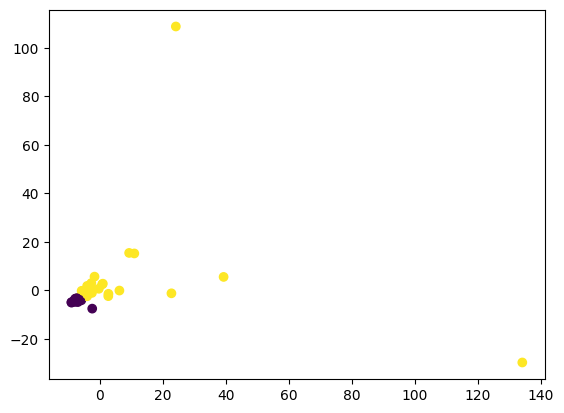

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

print(np.unique(doc_ids))
plt.scatter(Xpca[:,0],Xpca[:,1],c=doc_ids)

O resultado do PCA mostra que existem outliers, porem, facando a visualização no cluster inferior esquerdo (veja figura abaixo), vemos uma separação dos documentos de acordo com os tópicos, mostrando que a representação via matriz Documentos $\times$ Palavras, está, até certo ponto, sendo capaz de representar os documentos de acordo com os tópicos.

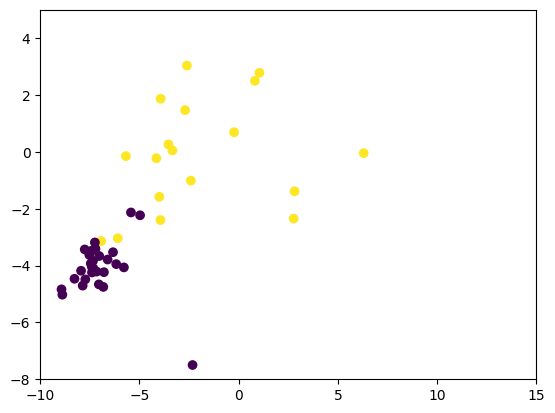

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(-10, 15)
ax.set_ylim(-8, 5)

plt.scatter(Xpca[:,0],Xpca[:,1],c=doc_ids)

## Term Frequency and Inverse Document Frequency (TF-IDF)
TF-IDF é uma técnica para quantificar a importância das palavra nos documentos.

**Nomenclatura**:
- t — palavra
- d — documento (conjunto de palavras)
- N — número de documentos

#### TF
TF mede a frequência de uma palavra em um documento. TF depende muito do tamanho do documento e da generalidade da palavra.

$$
TF(t,d)= \frac{\# t \mbox{ em } d}{\#\mbox{ palavras em } d} 
$$

onde $t$ é uma palavra e $d$ um documento.

#### IDF
IDF mede o quão informativa cada palavra é no conjunto de documentos. Uma palavra que aparece frequentemente em muitos documentos não é útil para discriminar os documentos, portanto seu IDF deve ser próximo de zero.

$$
IDF(t) = \frac{N}{\# t \mbox{ em todos os documentos}}
$$

onde $N$ é o número de documentos no corpus.

Combinando as duas métricas temos o chamado TF-IDF:

$$
TFIDF(t,d) = TF(t,d)*\log(IDF(t))
$$

In [ ]:
X = BoW.values

# calculando o IDF das palavras
X_idf = X.shape[0]/np.sum(X,axis=0)
print(X_idf.shape)

# calculando TF de palavras em cada documento
X_tf = np.apply_along_axis(lambda x: x/np.sum(x>0),1,X)
print(X_tf.shape)

# calculando TF-IDF
X_tfidf = np.apply_along_axis(lambda x: x*np.log(X_idf),1,X_tf)
print(X_tfidf.shape)

M = (X_tfidf<0)   # valores negativos são zerados
X_tfidf[M] = 0.0

(3680,)
(54, 3680)
(54, 3680)


Os valores na matriz de Documentos $\times$ Palavras geralmente são substituidos pelos seus correspondentes TF-IDF, o que tende a gerar representações melhores para cada documento.

(54, 2)


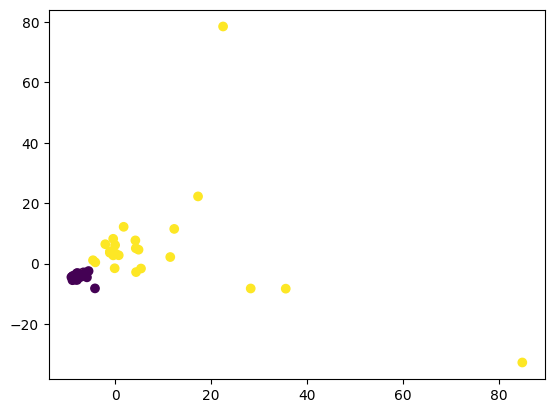

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X_tfidf)

pca_obj = PCA(n_components=2)
Xpca = pca_obj.fit_transform(X)

print(Xpca.shape)

fig, ax = plt.subplots()
plt.scatter(Xpca[:,0],Xpca[:,1],c=doc_ids)

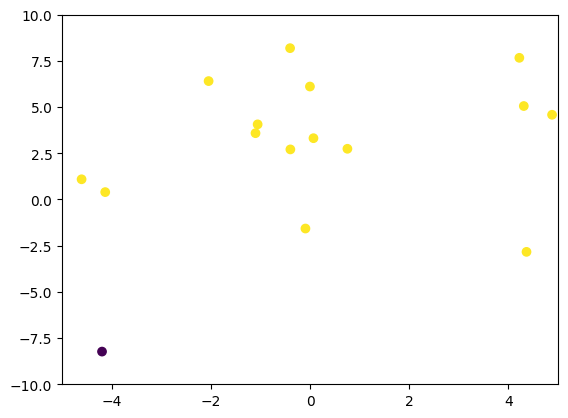

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(-5,5)
ax.set_ylim(-10,10)

plt.scatter(Xpca[:,0],Xpca[:,1],c=doc_ids)

In [ ]:
# gerando um data frame com a BoW usando TFIDF
df_out = pd.DataFrame(data=X_tfidf,columns=BoW.columns.values,index=rows)

df_out.to_csv('bag_of_words_4.csv',index=True)

## <font color="blue"> Matriz Documento $\times$ Palavras - Bag of Words</font>
    
### <font color="blue">Solução dos Exercícios</font>

Os exercícios abaixo fazem uso da coleção de documentos presente no diretório `DocCol2` contido no arquivo <font style="font-family: monaco"> DocCol.zip</font>, o qual pode ser baixado do Moodle.

### Exercício 1)
Armazene os documentos disponíveis no diretório `DocCol2` em um dicionário onde a chave é o nome do arquivo e o valor é a string contida no arquivo.

In [ ]:
# Lendo o documento como uma string
import os  # os é um módulo que permite, de maneira simples, usar funcionalidades dependentes do sistema operacional
import glob  # glob é um pacote que permite varrer arquivos e diretorios utilizando sintaxe linux

files = glob.glob("DocCol2/*")

docs = {}
for fname in files:
    with open(fname,'r') as f:
        key = fname.split(os.sep)[-1]
        docs[key] = f.read() 
        
print(docs.keys())

dict_keys(['ch42', 'gr19', 'ch5', 'ch23', 'ch1', 'gr24', 'ch33', 'au6', 'ch20', 'ch39', 'ch36', 'gr10', 'ch2', 'au13', 'gr2', 'gr9', 'gr23', 'gr21', 'ch30', 'gr12', 'ch24', 'au12', 'gr14', 'au10', 'au9', 'ch12', 'ch37', 'ch21', 'ch7', 'au2', 'gr1', 'ch47', 'gr20', 'au3', 'ch16', 'ch28', 'gr6', 'gr15', 'ch29', 'ch18', 'gr13', 'gr22', 'gr16', 'ch50', 'gr4', 'ch41', 'ch43', 'au7', 'au1', 'gr17', 'ch31', 'ch17', 'ch38', 'au15', 'gr8', 'gr5', 'gr25', 'ch10', 'au14', 'ch32', 'ch27', 'ch22', 'ch44', 'ch14', 'ch48', 'ch4', 'ch13', 'ch8', 'ch34', 'ch15', 'ch3', 'ch26', 'ch49', 'ch40', 'ch46', 'ch45', 'au8', 'gr26', 'au4', 'au5', 'gr3', 'ch6', 'ch35', 'gr18', 'ch9', 'au11', 'ch11', 'gr11', 'ch25', 'gr7', 'ch19'])


### Exercício 2)
Percorra as strings armazenadas como valores no dicionário criado no exercício 1), concatenando-as em uma única string. Quebre a string gerada em uma lista de palavras.

**DICA**: Utilize <font color='blue'>word_tokenize</font> do pacote <font color='blue'>nltk</font>

In [ ]:
import nltk
nltk.download('punkt')

words = ''
for k,s in docs.items():   # concatenando as strings
    words = words+s
    
words = nltk.word_tokenize(words)  # lista de palavras
print(words[:10])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['From', ':', 'brother.roy', '@', 'almac.co.uk', '(', 'Brother', 'Roy', ')', 'Subject']


### Exercício 3)
Remova todas os "tokens" da lista criada no exercício 2) que sejam de comprimento 1 ou que contenham caractéres que não são letras do alfabeto. Faça com que todas as palavras estajam em letras minúsculas na lista resultante.

In [ ]:
words = [w.lower() for w in words if w.isalpha() and len(w) != 1]
print(words[:20])

['from', 'brother', 'roy', 'subject', 'rfd', 'this', 'is', 'rfd', 'on', 'proposal', 'for', 'newsgroup', 'which', 'would', 'promote', 'sharing', 'on', 'the', 'johannine', 'hours']


### Exercício 4)
Remova da lista de palavras resultante do exercício 3) todas as "stop_words". Lembre-se que as palavras são da língua inglesa.

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# lista das stop words
stop_words = stopwords.words('english')

words = [w for w in words if w not in stop_words]
print(words[:20])

['brother', 'roy', 'subject', 'rfd', 'rfd', 'proposal', 'newsgroup', 'would', 'promote', 'sharing', 'johannine', 'hours', 'proposed', 'month', 'monks', 'ecumenical', 'community', 'taize', 'pronounced', 'france']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Exercício 5) 
Faça a normalização léxica (stemming) das palavras da lista resultante do exercício 4) e remova palavras repetidas após a normalização. Quantas palavras foram removidas após a normalização léxica?

**Dica**: Utilize o método <font color='blue'>PorterStemmer</font> do pacote <font color='blue'>nltk.stem</font>

In [ ]:
from nltk.stem import PorterStemmer

n_antes = len(words)
print(n_antes)
words = [PorterStemmer().stem(w) for w in words]
words = list(set(words))
n_depois = len(words)
print('Foram removidas ',n_antes-n_depois,' palavras')

#print(len(words),words[:20])

47253
Foram removidas  40472  palavras


### Exercício 6) 
Gere uma lista de palavras para cada documento armazenado como valores no dicionário do exercício 1) aplicando os passos dos exercícios de 2 a 5 para cada documento.
Porém, no passo 5 não remova palavras repetidas após a normalização léxica. Armazene o resultado em um novo dicionário onde as chaves são os nomes dos documentos, como no dicionário do exercício 1), e os valores são as listas de palavras geradas para cada documento.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
import numpy as np
from collections import Counter

In [ ]:
stop_words = stopwords.words('english')
docsXwords = {}
for key, value in docs.items():
    words = nltk.word_tokenize(value)
    words = [w.lower() for w in words if w.isalpha() and len(w) != 1]
    words = [w for w in words if w not in stop_words]
    words = [PorterStemmer().stem(w) for w in words]
    docsXwords[key] = words

### Exercício 7)
Utilize o dicionário contruído no exercício anterior para construir
uma matriz Documentos $\times$ Palavras para a coleção de documentos contidos no diretório `DocCol2`.

In [ ]:
# unificando todas as palavras em uma única lista
corpus = [palavras for sublista in list(docsXwords.values()) for palavras in sublista]

# removendo repeticoes
corpus = list(set(corpus))

df_dXp = pd.DataFrame(data=np.zeros((len(list(docs.keys())),len(corpus))),
                      index = list(docs.keys()), columns = corpus)

for key,value in docsXwords.items():
    dtemp = dict(Counter(value))
    df_dXp.loc[key,list(dtemp.keys())] = list(dtemp.values())
    
print(df_dXp.head())

      almost  relationship  puf  mistaken  linkop  washington  manner  turn  \
ch42     1.0           0.0  0.0       0.0     0.0         0.0     0.0   0.0   
gr19     0.0           0.0  0.0       0.0     0.0         0.0     0.0   0.0   
ch5      2.0           0.0  0.0       0.0     0.0         0.0     0.0   0.0   
ch23     0.0           0.0  0.0       0.0     0.0         0.0     0.0   1.0   
ch1      1.0           0.0  0.0       0.0     0.0         0.0     0.0   1.0   

      fox  ampl  ...  statement  audiowork  nomin  scism  joe  weber  \
ch42  0.0   0.0  ...        0.0        0.0    0.0    0.0  0.0    0.0   
gr19  0.0   0.0  ...        0.0        0.0    0.0    0.0  0.0    0.0   
ch5   0.0   0.0  ...        1.0        0.0    0.0    0.0  0.0    0.0   
ch23  0.0   0.0  ...        1.0        0.0    0.0    0.0  0.0    0.0   
ch1   0.0   0.0  ...        0.0        0.0    0.0    0.0  0.0    0.0   

      landmark  profound  ley  psycholog  
ch42       0.0       0.0  0.0        0.0  
gr19  

### Exercício 8)
Utilizando PCA, projete a coleção de documentos no espaço gerado pelas duas direções principais da matriz Documentos $\times$ Palavras.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# encontrando as classes dos documentos a partir das iniciais dos
# nomes dos documentos
docid = {}
for i,c in enumerate(df_dXp.index.values):
   if c[0:2] not in docid:
      docid[c[0:2]] = i
        
print(docid)
        
doc_class = [docid[c[0:2]] for c in df_dXp.index.values]

X = df_dXp.values
X = StandardScaler().fit_transform(X)

pca_obj = PCA(n_components=2)
Xpca = pca_obj.fit_transform(X)

{'ch': 0, 'gr': 1, 'au': 7}


### Exercício 9)
Visualize a projeção da coleção de documentos no espaço bidimensional gerado no exercício anterior e se necessário faça um zoom para melhor visualizar a distribuição dos documentos.

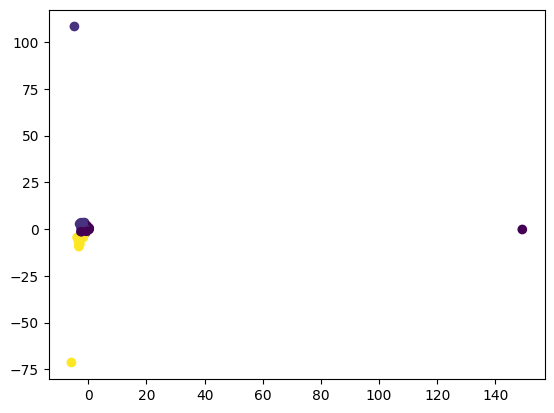

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(Xpca[:,0],Xpca[:,1],c=doc_class)

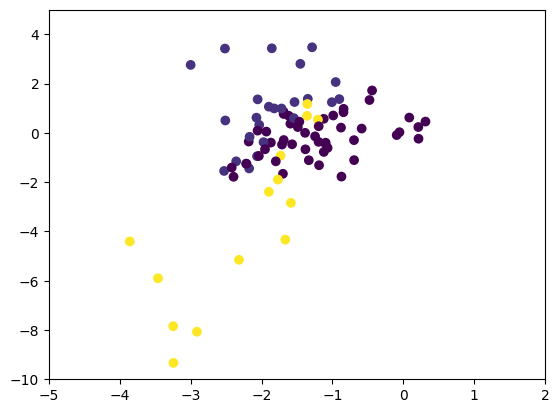

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(-5, 2)
ax.set_ylim(-10, 5)

plt.scatter(Xpca[:,0],Xpca[:,1],c=doc_class)

### Exercício 10)
Dado o documento `au8` (linha de rótulo `au8` no DataFrame Documentos $\times$ Palavras) e utilizando a distância "cosseno"  (cosseno entre dois vetores correspondendo a vetorização dos documentos), encontre qual o documento mais parecido com `au8`. Calcule o cosseno entre a linha representada por `au8` na matriz Documentos $\times$ Palavras e todas as outras linhas, tomando o maior valor como correspondendo ao documento mais parecido.
Repita a projeção realizada no exercício 8), ressaltando o documento `au8` e o documento mais parecido com ele. 

In [ ]:
# encontrando o indice da linha de 'au8' no DataFrame
au8_id = np.argwhere(df_dXp.index.values=='au8')[0][0]
print(au8_id)
X = df_dXp.values
X = StandardScaler().fit_transform(X)

# calculando o cosseno utilizando a formula
# cos(x,y) = np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))
cosau8 = np.apply_along_axis(lambda x: 
             np.dot(X[au8_id],x)/(np.linalg.norm(au8_id)*np.linalg.norm(x)),1,X)

# ordenando e pegando o maior valor (note que o elemento [-1] é o 
# próprio documento au8)
sim_au8_id = np.argsort(cosau8)[-2]
print('Documento mais parecido com au8: ',df_dXp.index.values[sim_au8_id])

fig, ax = plt.subplots()
ax.set_xlim(-5, 2)
ax.set_ylim(-10, 5)

# au8 e o documento mais parecido estão marcos com um X vermelho
plt.scatter(Xpca[:,0],Xpca[:,1],c=doc_class)
plt.scatter(Xpca[[au8_id,sim_au8_id],0],Xpca[[au8_id,sim_au8_id],1],marker='x',color='r')

NameError: name 'np' is not defined

## <font color="blue"> Matriz Documento $\times$ Palavras - Bag of Words</font>
### <font color="blue">Avaliação Solução</font>

Os exercícios abaixo fazem uso da coleção de documentos presente no diretório `DocCol2` contido no arquivo <font style="font-family: monaco"> DocCol.zip</font>, o qual pode ser baixado do Moodle.

In [ ]:
import glob
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
import numpy as np
from collections import Counter

### Exercício 1)
Armazene os documentos disponíveis no diretório `DocCol2` em um dicionário onde a chave é o nome do arquivo e o valor é a string contida no arquivo. O número médio de strings contidas nos documentos é:

a) 970.3<br>
b) 1786.7<br>
<font color='red'> c) 1225.5 </font><br>
d) 2683.1

**Dica**: Separe as strings de cada documento utilizando o comando <font color='blue'> split(' ') </font> e faça a média do número de strings nos documentos (total de strings divido pelo número de documetos).

In [ ]:
files = glob.glob("DocCol2/*")

docs = {}
larger_doc = ('',0)
media_strings = 0
for fname in files:
    with open(fname,'r') as f:
        key = fname.split('/')[-1]
        docs[key] = f.read() 
        strings = docs[key].split(' ')
        media_strings = media_strings + len(strings)

media_strings = media_strings/len(files)        
print('Número médio de strings nos documentos: ',media_strings)

Número médio de strings nos documentos:  1225.5054945054944


### Exercício 2)
Crie um dicionário chamado `docsXwords` onde as chaves são os nomes dos arquivos e os valores correspondem a lista de palavras do documento correspondente. As palavras em cada uma das listas devem ser constituídas apenas por letras do alfabeto, estarem lexicamente normalizadas e contendo dois ou mais caracteres. Qual o documento com o maior número de palavras na lista de palavras resultante do processamento:

a) gr22 com 1701 palavras<br>
b) ch30 com 1513 palavras<br>
<font color='red'> c) au2 com 1678 palavras</font><br>
d) au8 com 1525 palavras

In [ ]:
nltk.download('punkt')

docsXwords = {}
for key, value in docs.items():
    words = nltk.word_tokenize(value)
    words = [w.lower() for w in words if w.isalpha() and len(w) != 1]
    words = [PorterStemmer().stem(w) for w in words]
    docsXwords[key] = words
    
d={}
for key,value in docsXwords.items():
    d[key] = len(value)
    
dsorted = sorted(d.items(), key=lambda x: x[1], reverse=True)
print(dsorted[:5])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('au2', 1678), ('ch30', 1525), ('au14', 1503), ('ch44', 1481), ('ch28', 1422)]


In [ ]:
print(docsXwords['au2'][:30])
print(docsXwords['ch30'][:30])

['from', 'welti', 'richard', 'welti', 'subject', 'welcom', 'to', 'to', 'the', 'new', 'reader', 'most', 'recent', 'chang', 'march', 'addit', 'of', 'rpw', 'welcom', 'to', 'thi', 'articl', 'is', 'sent', 'out', 'automat', 'each', 'month', 'and', 'contain']
['from', 'andrew', 'byler', 'subject', 'the', 'nicen', 'creed', 'wa', 're', 'major', 'view', 'of', 'the', 'triniti', 'michael', 'bushnel', 'write', 'the', 'creed', 'of', 'athanasiu', 'howev', 'ha', 'alway', 'been', 'western', 'creed', 'and', 'ha', 'alway']


### Exercício 3)
As listas de palavras do dicionário `docsXwords` possuem palavras repetidas. Quais as três palavras que mais aparecem na coleção de documentos:

a) the, is, of<br>
b) that, is, of<br>
<font color='red'> c) the, of, to </font><br>
d) to, is, of

In [ ]:
# unificando todas as palavras em uma única lista
corpus = [palavras for sublista in list(docsXwords.values()) for palavras in sublista]

d = dict(Counter(corpus))
dsorted = sorted(d.items(), key=lambda x: x[1], reverse=True)
print(dsorted[:5])

[('the', 5014), ('of', 2627), ('to', 2611), ('and', 2094), ('is', 1767)]


### Exercício 4)
Qual o documento cuja lista de palavras possui o **maior** número de "stop words"? Quantas "stop words" aparecem neste documento:

<font color='red'> a) ch30 com 835 "stop words" </font><br>
b) gr17 com 147 "stop words"<br>
c) au2 com 717 "stop words"<br>
d) gr17 com 637 "stop words"

**Dica**: Crie um dicionário a partir de docsXwords onde a chave é o nome do documento e o valor é o número de stop words no documento.

In [ ]:
# lista das stop words
nltk.download('stopwords')
stop_words = stopwords.words('english')

d={}
for key,value in docsXwords.items():
    nantes = len(value)
    ndepois = len([w for w in value if w not in stop_words]) 
    d[key] = nantes - ndepois  # número de stop words
    
dsorted = sorted(d.items(), key=lambda x: x[1], reverse=True)
print(dsorted[:5])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('ch30', 835), ('ch44', 734), ('au2', 717), ('ch24', 708), ('ch21', 704)]


### Exercício 5) 
Utilize o dicionário `docsXwords` para construir
uma matriz Documentos $\times$ Palavras para a coleção de documentos do diretório `DocCol2`. Quantas palavras aparecem somente uma vez na matriz Documentos $\times$ Palavras?

a) 3451<br>
b) 1754 <br>
<font color='red'> c) 2862 </font><br>
d) 245

In [ ]:
# unificando todas as palavras em uma única lista
corpus = [palavras for sublista in list(docsXwords.values()) for palavras in sublista]

# removendo repeticoes
corpus = list(set(corpus))

df_dXp = pd.DataFrame(data=np.zeros((len(list(docs.keys())),len(corpus))),
                      index = list(docs.keys()), columns = corpus)

for key,value in docsXwords.items():
    dtemp = dict(Counter(value))
    df_dXp.loc[key,list(dtemp.keys())] = list(dtemp.values())
    
print(df_dXp.head())

      poley  macintosh  pridi  guard  argu  neighbour  janet  shadow  episod  \
ch42    0.0        0.0    0.0    0.0   0.0        1.0    0.0     0.0     0.0   
gr19    0.0        0.0    0.0    0.0   0.0        0.0    0.0     0.0     0.0   
ch5     0.0        0.0    0.0    0.0   0.0        0.0    0.0     0.0     0.0   
ch23    0.0        0.0    0.0    0.0   0.0        0.0    0.0     0.0     0.0   
ch1     0.0        0.0    0.0    0.0   0.0        0.0    0.0     0.0     0.0   

      washington  ...  oklahoma  segment  fashion  mindset  trust  kritik  \
ch42         0.0  ...       0.0      0.0      0.0      0.0    3.0     0.0   
gr19         0.0  ...       0.0      0.0      0.0      0.0    0.0     0.0   
ch5          0.0  ...       0.0      0.0      0.0      0.0    0.0     0.0   
ch23         0.0  ...       0.0      0.0      0.0      0.0    0.0     0.0   
ch1          0.0  ...       0.0      0.0      0.0      0.0    0.0     1.0   

      given  autocad  convict  goldberg  
ch42    1.0   

In [ ]:
S = df_dXp.sum(axis=0)
print(S.sort_values())
uniques = S.where(S==1.0)
uniques = uniques.dropna()
print(uniques.sum())

goldberg       1.0
niether        1.0
pascal         1.0
succeed        1.0
therebi        1.0
             ...  
is          1767.0
and         2094.0
to          2611.0
of          2627.0
the         5014.0
Length: 6880, dtype: float64
2862.0


## <span style="color:blue">Módulo VII - Dados não estruturados: sinais e imagens</span>
### <span style="color:blue">Representações digitais de dados não estruturados: imagens e sinais</span>

__Conteúdo:__
1. Representações digitais de dados sequenciais e espaciais
2. Sinais e propriedades
3. Imagens e propriedades


__Referência complementar__

GONZALES, R.C.; WOODS, R.E. **Processamento Digital de Imagens**. 3.ed. 2010.

***

## Representações digitais de sinais e imagens

Possuem propriedades **sequenciais** e **espaciais**

* Sequenciais: séries temporais, sinais, etc.
* Espaciais: imagens, mapas, etc.

### Sequenciais:

> Um ponto amostrado afeta a probabilidade do próximo ponto.

Esse tipo de dado não possui a caracerística (i)ndependente e (i)denticamente (d)istribuído - i.i.d.

* **Dados sequenciais**: a ordenação dos dados importa, não necessariamente no domínio temporal.
    * Texto
    * Sequências de DNA
    
    
* **Séries temporais**: dados coletados em intervalos de tempo, regulares ou não. A frequência de aquisição pode variar: milissegundos, semanas, etc.
    * Dados de clima
    * Mercado de ações
    * Moedas e câmbio
    
    
* **Sinais**: comumente coletados por sensores a uma taxa alta de amostragem (medida em Hertz / Hz), com muitos pontos por unidade de tempo.
    * Músicas
    * Fala
    * Acelerometria e dados inerciais

### Espaciais

Esse tipo de dado comumente também não é i.i.d., mas aqui há uma dependência em termos de uma vizinhança, comumente definida em uma grade regular.

**Imagens** são a manifestação mais comum desse tipo de dados, como:
* Fotografias
* Clip-art / vetorial 2D
* Arte-vetorial 3D
* Desenhos

Também são coletados e armazenados dados em grade regular para outras aplicações como *mapas* e *superfícies*.

**Grafos** também são representações que permite organização espacial, porém não em uma grade regular

---
## <font color="blue">Sinais</font>

São comumente representados como uma função matemática $f(x)$, em que $x$ pode representar o tempo em que um determinado valor $f(x)$ foi observado.

O conceito de **resolução** é importante aqui, pois define quantos pontos foram amostrados em uma certa unidade de tempo.
* relacionado à *frequência* de aquisição em Hz (ciclos por segundo).

Um sinal amostrado a 100 Hz possui 100 pontos para cada segundo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# define amostragem ao longo do tempo
F = 10
# define os segundos
secs = 1
# prepara o eixo real onde iremos amostrar a funcao
x = np.arange(0, secs, (1/F))
print(x)

# computa a funcao
f_x = 0.5 + 0.1*x + x**2 
f_x

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


array([0.5 , 0.52, 0.56, 0.62, 0.7 , 0.8 , 0.92, 1.06, 1.22, 1.4 ])

Text(0.5, 1.0, 'Pontos: 10 - interpolados')

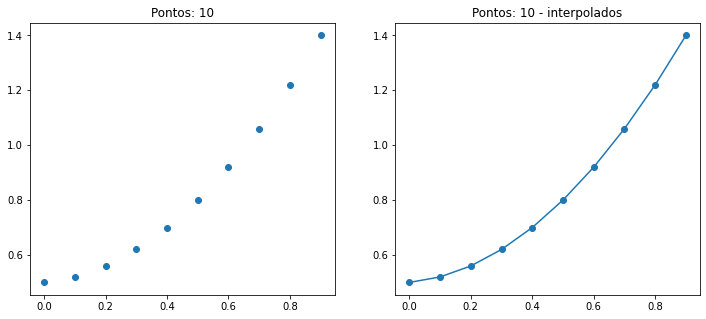

In [ ]:
# exibe a funcao num gráfico
plt.figure(figsize=(12,5))
plt.subplot(121); plt.plot(x, f_x, 'o')
plt.title("Pontos: %d" % x.shape)
plt.subplot(122); plt.plot(x, f_x, 'o-')
plt.title("Pontos: %d - interpolados" % x.shape)

---
Vemos então que a **representação digital de sinais ou sequencias** de dados é feita na forma vetorial, com uma sequência de valores numéricos.

Seguindo essa ideia podemos representar diferentes padrões de variação sequencial.

Text(0.5, 1.0, 'Pontos: 100')

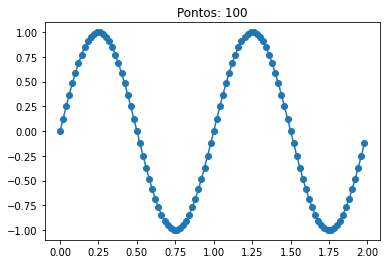

In [ ]:
# define amostragem ao longo do tempo
F = 50
# define os segundos
secs = 2
# prepara o eixo ao longo do qual iremos amostrar a funcao
x = np.arange(0, secs, (1/F))

# computa a funcao
f_sin = np.sin(x * 2 * np.pi)

plt.plot(x, f_sin, 'o-')
plt.title("Pontos: %d" % x.shape)

Text(0.5, 1.0, 'Pontos: 500')

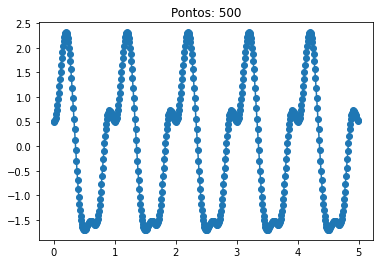

In [ ]:
# define amostragem ao longo do tempo
F = 100
# define os segundos
secs = 5
# prepara o eixo ao longo do qual iremos amostrar a funcao
t = np.arange(0, secs, (1/F))

# combinacao de senos e cossenos
f =  1.6*(np.sin(t*2*np.pi)**3) +1.3*np.cos(t*2*np.pi) -0.5*np.cos(2*t*2*np.pi) -0.2*np.cos(3*t*2*np.pi) - 0.1*np.cos(4*t*2*np.pi)

plt.plot(t, f, 'o-')
plt.title("Pontos: %d" % f.shape)

Text(0.5, 1.0, 'Pontos: 400')

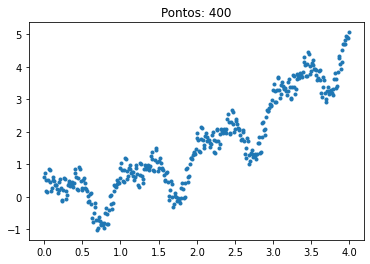

In [ ]:
# define amostragem ao longo do tempo
F = 100
# define os segundos
secs = 4
# prepara o eixo ao longo do qual iremos amostrar a funcao
x = np.arange(0, secs, (1/F))

# computa a funcao
f_com = 0.2*np.sin(x * 2 * np.pi*20) + 0.2*np.cos(x * 2 * np.pi * 15) + 0.4*np.cos(x * 2 * np.pi*2) + 0.6*np.sin(x * 2 * np.pi) + 0.3*x**2 

plt.plot(x, f_com, '.')
plt.title("Pontos: %d" % x.shape)


Text(0.5, 1.0, 'Pontos: 400')

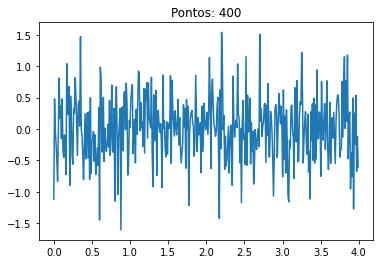

In [ ]:
f_rnd = np.random.randn(x.shape[0])*0.5
plt.plot(x, f_rnd)
plt.title("Pontos: %d" % x.shape)

---
## <font color="blue">Imagens</font>

Escritos como uma função $f(x,y)$, em que $x,y$ representam coordenadas espaciais onde $f(x,y)$ foi observado.

O conceito de **resolução** espacial define quantos pontos foram amostrados em um certo espaço planar.
* pixels (ou megapixels), representam o valor absoluto da quantidade de pontos
* pontos por polegada, representando quantos pixels por polegada (unidade que equivale a $\approx 2.5$ cm) foram capturados
* pixels por centímetro quadrado

Resolução = 240 x 360 = 86400


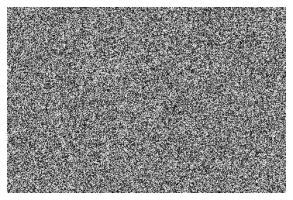

In [ ]:
# tamanho (resolucao) da imagem
n = 240
m = 360

# criando uma imagem aleatória com valores entre 0 e 255
f_rnd = np.random.randint(0,256,[n,m])

plt.figure(figsize=(5,5))
plt.imshow(f_rnd, cmap="gray")
plt.axis('off')
print("Resolução = %d x %d = %d" % (n,m, n*m))

In [ ]:
f_rnd[6,10]

210

In [ ]:
np.max(f_rnd)

255

In [ ]:
# agora uma imagem criada a partir de uma função linear
n = 32
m = 32
x = np.arange(n)/(n-1)
y = np.arange(m)/(m-1)
print(x)

[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097 0.51612903 0.5483871
 0.58064516 0.61290323 0.64516129 0.67741935 0.70967742 0.74193548
 0.77419355 0.80645161 0.83870968 0.87096774 0.90322581 0.93548387
 0.96774194 1.        ]


In [ ]:
x.shape = (n,1) # cria vetor coluna
y.shape = (1,m) # cria vetor linha
print(x)
print(y)

[[0.        ]
 [0.03225806]
 [0.06451613]
 [0.09677419]
 [0.12903226]
 [0.16129032]
 [0.19354839]
 [0.22580645]
 [0.25806452]
 [0.29032258]
 [0.32258065]
 [0.35483871]
 [0.38709677]
 [0.41935484]
 [0.4516129 ]
 [0.48387097]
 [0.51612903]
 [0.5483871 ]
 [0.58064516]
 [0.61290323]
 [0.64516129]
 [0.67741935]
 [0.70967742]
 [0.74193548]
 [0.77419355]
 [0.80645161]
 [0.83870968]
 [0.87096774]
 [0.90322581]
 [0.93548387]
 [0.96774194]
 [1.        ]]
[[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
  0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
  0.38709677 0.41935484 0.4516129  0.48387097 0.51612903 0.5483871
  0.58064516 0.61290323 0.64516129 0.67741935 0.70967742 0.74193548
  0.77419355 0.80645161 0.83870968 0.87096774 0.90322581 0.93548387
  0.96774194 1.        ]]


In [ ]:
# cria matriz multiplicando os vetores x.y
f_xy = x.dot(y)

(-0.5, 31.5, 31.5, -0.5)

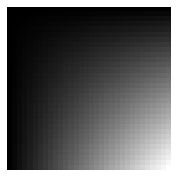

In [ ]:
plt.figure(figsize=(3,3))
plt.imshow(f_xy, cmap="gray")
plt.axis('off')

In [ ]:
f_xy[31,31]

1.0

In [ ]:
np.max(f_xy)

1.0

In [ ]:
32*32

1024

In [ ]:
len(np.unique(f_xy))

352

Notamos que os valores dessa matriz estão aproximadamente entre 0 e 1, organizados de forma **espacial** nas coordenadas $(x,y)$

* primeira imagem: valores não estão correlacioandos
* segunda imagem: há relação entre os valores nas direções $x$ e $y$

---
Em imagens de tons de cinza, temos uma representação de **1 byte por pixel**

Assim, o monitor sempre exibirá 256 tons de cinza distintos.

A segunda matriz que exibimos possui mais valores, porém foi normalizada na visualização para valores entre 0 (preto) e 255 (branco).

In [ ]:
# transformando em imagem tons de cinza
f_xy_uint = (f_xy*255).astype(np.uint8)
f_xy_uint[1:5,1:5]

array([[0, 0, 0, 1],
       [0, 1, 1, 2],
       [0, 1, 2, 3],
       [1, 2, 3, 4]], dtype=uint8)

In [ ]:
f_xy[1:5,1:5]

array([[0.00104058, 0.00208117, 0.00312175, 0.00416233],
       [0.00208117, 0.00416233, 0.0062435 , 0.00832466],
       [0.00312175, 0.0062435 , 0.00936524, 0.01248699],
       [0.00416233, 0.00832466, 0.01248699, 0.01664932]])

Valores únicos float =  352
Valores únicos uint8 =  186


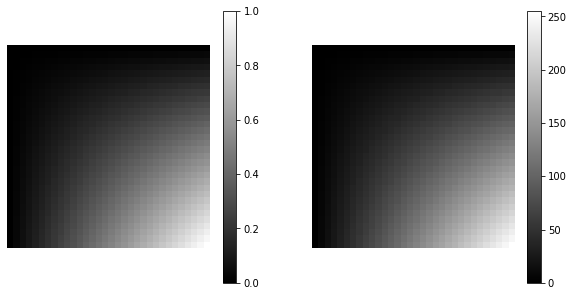

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(f_xy, cmap="gray"); plt.colorbar()
plt.axis('off')
plt.subplot(122)
plt.imshow(f_xy_uint, cmap="gray"); plt.colorbar()
plt.axis('off')

print("Valores únicos float = ",np.shape(np.unique(f_xy))[0])
print("Valores únicos uint8 = ",np.shape(np.unique(f_xy_uint))[0])

---
Imagens coloridas são comumente representadas por 3 matrizes:
* R - vermelho
* G - verde
* B - azul

vamos usar 3 matrizes para combinar as cores-luz primária R, G e B:

In [ ]:
n = 32
m = 32
f_R = np.zeros([n,m]).astype(np.uint8)
f_G = np.zeros([n,m]).astype(np.uint8)
f_B = np.zeros([n,m]).astype(np.uint8)

n2 = n//2
m2 = m//2
f_R[:n2+2,:m2+2] = 255
f_G[n2-2:,:m2+2] = 255
f_B[n2-8:-8,m2-2:] = 255

f_col = np.empty([n,m,3]).astype(np.uint8)
f_col[:,:,0] = f_R
f_col[:,:,1] = f_G
f_col[:,:,2] = f_B

Text(0.5, 1.0, 'B')

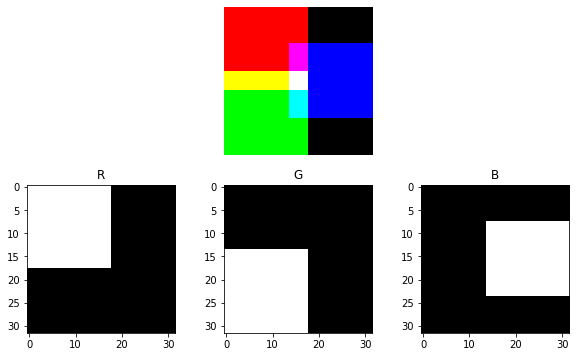

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(232)
plt.imshow(f_col)
plt.axis('off')
plt.subplot(234); 
plt.imshow(f_R, cmap="gray", vmin=0, vmax=255); plt.title('R')
plt.subplot(235); 
plt.imshow(f_G, cmap="gray", vmin=0, vmax=255); plt.title('G')
plt.subplot(236); 
plt.imshow(f_B, cmap="gray", vmin=0, vmax=255); plt.title('B')

---
Assim, cada pixel é representado por 8 x 3 bits = 24 bits, sendo possível codificar
$2^{24} \approx 16$ milhões de cores

In [ ]:
2**24

16777216

Há outros espaços de cor possíveis, como o HSV que divide os canais em Matiz (Hue), Saturação (Saturation) e Valor (Value).

### Resumo:

* Dados não estruturados sequenciais
    * medidas tomadas em sequência, em que comumente uma medida influencia a probabilidade da próxima
    * comumente representados por séries temporais ou sinais

* Dados não estruturados espaciais
    * a dependência agora pode existir espacialmente em duas direções
    * os dados podem ser de qualquer tipo
    * mas para visualização imagens em tons de cinza (1 byte/pixel) ou RGB coloridas (3 bytes/pixel)

## <span style="color:darkred">Módulo VII - Dados não estruturados: sinais e imagens</span>
### <span style="color:darkred">Descritores de sinais</span>

__Conteúdo:__
1. Características temporais / sequenciais
2. Características em frequência

***


## <font color="blue">Características temporais</font>
Características extraídas com relação ao domínio original do sinal, dos pontos amostrados em sequência (comumente temporal).

Todo o sinal então pode ser **descrito** por meio dessas características computadas.

Assim ao invés de utilizar a representação original, por meio de pontos amostrados sequencialmente, utilizo uma variável que *descreve* o conteúdo.

Veremos as seguintes características:


| Característica |  (em inglês) |	Descrição |
|:--- |:--- |:--- |
| Cruzamentos por zero | Zero Crossing Rate |	A taxa de mudanças de sinal (positivo/negativo) com a qual os dados mudam durante uma certa janela observada. |
| 	Energia 	| Energy | A soma dos quadrados das amplitudes normalizada pelo tamanho da janela. |
|   Entropia da energia | 	Entropy of energy | A entropia das energias normalizadas de janelas. Uma medida relacionada a mudanças abruptas. |
|  Momentos estatísticos | 	Statistical moments | Cálculo de momentos estatísticos do sinal global ou de forma local. |

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


Para estudar características temporais, vamos simular 3 sinais

Text(0.5, 1.0, 'Pontos: 400')

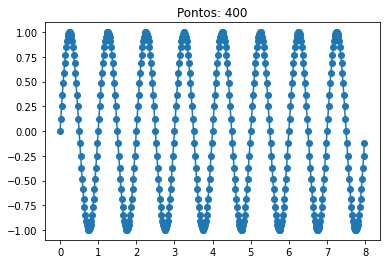

In [ ]:
# define amostragem ao longo do tempo
F = 50
# define os segundos
secs = 8
# prepara o eixo real onde iremos amostrar a funcao
t = np.arange(0, secs, (1/F))

# computa a funcao
f_sin = np.sin(t * 2 * np.pi)

plt.plot(t, f_sin, 'o-')
plt.title("Pontos: %d" % t.shape)

Text(0.5, 1.0, 'Pontos: 600')

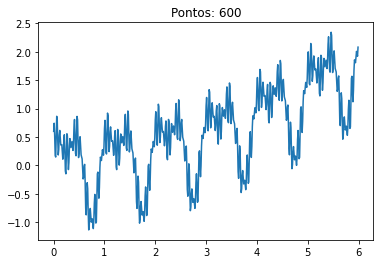

In [ ]:
# define amostragem ao longo do tempo
F = 100
# define os segundos
secs = 6

# prepara o eixo real onde iremos amostrar a funcao
t = np.arange(0, secs, (1/F))

# computa a funcao
f_1 = 0.2*np.sin(t*2*np.pi*20) + 0.2*np.cos(t*2*np.pi*15) + 0.4*np.cos(t * 2 * np.pi*2) + 0.6*np.sin(t * 2 * np.pi) + 0.05*t**2 

plt.plot(t, f_1)
plt.title("Pontos: %d" % t.shape)


Text(0.5, 1.0, 'Pontos: 240')

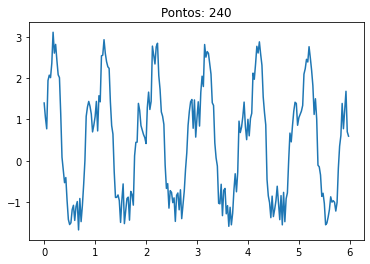

In [ ]:
# define amostragem ao longo do tempo
F = 40
# define os segundos
secs = 6
# prepara o eixo real onde iremos amostrar a funcao
t = np.arange(0, secs, (1/F))

f_2 = 1.6*(np.sin(t*2*np.pi)**3)+1.3*np.cos(t*2*np.pi)-.5*np.cos(2*t*2*np.pi)-.3*np.cos(3*t*2*np.pi)-0.1*np.cos(4*t*2*np.pi)
f_2 = f_2 + np.random.rand(f_2.shape[0])*1

plt.plot(t, f_2)
plt.title("Pontos: %d" % f_2.shape)


In [ ]:
def taxa_cruzamentos_por_zero(sinal):
    '''Cruzamentos por zero em um intervalo de tempo '''
    M = len(sinal)
    cont_zero = np.sum(np.abs(np.diff(np.sign(sinal)))) / 2
    return np.float64(cont_zero) / np.float64(M - 1.0)

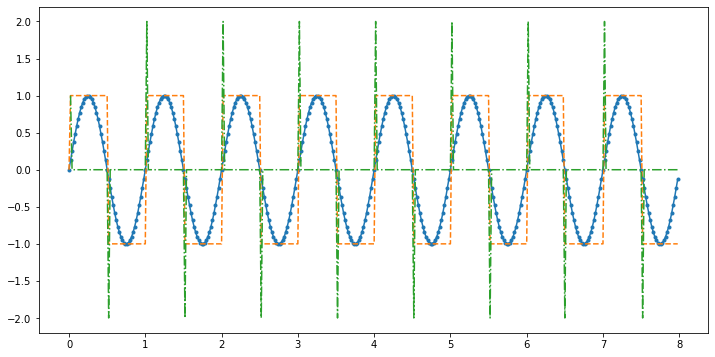

In [ ]:
# exemplifica usando funcao Seno
F = 50
secs = 8
t = np.arange(0, secs, (1/F))

plt.figure(figsize=(12,6))
plt.plot(t, f_sin, '.-')
plt.plot(t, np.sign(f_sin), '--')
plt.plot(t[1:], np.diff(np.sign(f_sin)), '-.')

In [ ]:
print("Seno = ", taxa_cruzamentos_por_zero(f_sin))
print("F1 = ", taxa_cruzamentos_por_zero(f_1))
print("F2 = ", taxa_cruzamentos_por_zero(f_2))

Seno =  0.03884711779448621
F1 =  0.05008347245409015
F2 =  0.0502092050209205


In [ ]:
def energia(sinal):
    '''Energia do sinal (normalizada)'''
    return np.sum(sinal ** 2) / np.float64(len(sinal))

In [ ]:
print("Seno = ", energia(f_sin))
print("F1 = ", energia(f_1))
print("F2 = ", energia(f_2))

Seno =  0.5
F1 =  0.8859123670816745
F2 =  2.044601750612628


In [ ]:
def entropia_energia(sinal, n_blocos=10):
    '''Entropia da energia do sinal'''
    # energia total 
    energia_sinal = np.sum(sinal ** 2)
    M = len(sinal)
    
    # calcula janelas dentro do sinal
    M_janelas = int(np.floor(M / n_blocos))
    # verifica se tamanho dos blocos 
    # é multiplo do tamanho do sinal
    if M != M_janelas * n_blocos:
        sinal = sinal[0:M_janelas * n_blocos]

    # monta matriz [M_janelas x n_blocos]
    janelas = sinal.reshape(M_janelas, n_blocos, order='F').copy()
    
    # Computa energias de cada janela (normalizada pela do sinal)
    e_janelas = np.sum(janelas ** 2, axis=0) / (energia_sinal + 0.0001)
    #print(e_janelas)

    # Computa entropia entre energias das janelas
    entropia = -np.sum(e_janelas * np.log2(e_janelas + 0.0001))
    return entropia

In [ ]:
print("Seno = ", entropia_energia(f_sin))
print("F1 = ", entropia_energia(f_1))
print("F2 = ", entropia_energia(f_2))

Seno =  3.307447020274472
F1 =  2.856682723215566
F2 =  3.24597359050579


In [ ]:
def momentos_estatisticos(sinal, n_blocos=1):
    '''Calcula quatro momentos estatísticos
       Parâmetros
           n_blocos: número de blocos para calcular 
                     momentos localmente (default = 1, global)
    '''

    # calcula janelas dentro do sinal
    M = len(sinal)
    M_janelas = int(np.floor(M / n_blocos))
    # verifica se tamanho dos blocos 
    # é multiplo do tamanho do sinal
    if M != M_janelas * n_blocos:
        sinal = sinal[0:M_janelas * n_blocos]

    # monta matriz [M_janelas x n_blocos]
    if (n_blocos == 1):
        janelas = sinal
    else:
        janelas = sinal.reshape(M_janelas, n_blocos, order='F').copy()

    # 4 momentos estatísticos
    m0 = np.mean(janelas, axis=0) # media
    m1 = np.std(janelas, axis=0) # desvio padrao
    m2 = np.mean((janelas-m0)**3)/(m1**(3/2)) # obliquidade
    m3 = (np.mean((janelas-m0)**4)/(m1**2))-3 # curtose
    
    return m0, m1, m2, m3

In [ ]:
print("Seno = ", np.round(momentos_estatisticos(f_sin),4))
print("F1 = ", np.round(momentos_estatisticos(f_1),4))
print("F2 = ", np.round(momentos_estatisticos(f_2),4))


Seno =  [ 0.      0.7071  0.     -2.25  ]
F1 =  [ 0.5985  0.7264 -0.0651 -1.6074]
F2 =  [0.452  1.3566 0.2017 0.1803]


---
## <font color="blue">Características em frequência</font>

Processar o sinal em seu domínio original tem algumas limitações.

Transformações matemáticas que **alterem a representação** dos dados podem ajudar na análise de sinais não estruturados.
* A análise de componentes principais por exemplo, altera a base dos dados produzindo um novo espaço de características.

--- 
Para sinais e imagens uma técnica amplamente utilizada é a **Transformada de Fourier**, que descreve sinais por meio de coeficientes de frequência.
* Ao invés de utilizar a representação de sinais por meio dos pontos amostrados ao longo de $x$, vamos mudar o eixo para frequências $u$.

> **Representação em frequência** : representar um sinal pela combinação de senos e cossenos em diferentes frequências

Assume que: *podemos aproximar qualquer sinal somando senos e cossenos com diferentes frequências e com diferentes amplitudes*

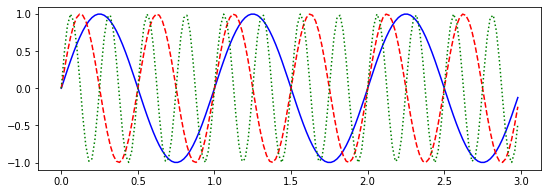

In [ ]:
# define amostragem ao longo do tempo
F = 50
# define os segundos
secs = 3
# prepara o eixo real onde iremos amostrar a funcao
x = np.arange(0, secs, (1/F))

f_sin1 = np.sin(x * (2*np.pi))
f_sin2 = np.sin(x * (2*np.pi) *2 )
f_sin4 = np.sin(x * (2*np.pi) *4 )

plt.figure(figsize=(9,3))
plt.plot(x, f_sin1, 'b-')
plt.plot(x, f_sin2, 'r--')
plt.plot(x, f_sin4, 'g:')

--- 
**Aúdio e música** podem ser bem caracterizados por diferentes frequências

* Frequências *baixas* caracterizam sons *graves* (ondas mais *lentas*)
* Frequências *altas* caracterizam sons *agudos* (ondas mais *rápidas*)

In [ ]:
import IPython.display as ipd

In [ ]:
FS = 22050 # define amostragem de 22KHz
secs = 1.0 # 1 segundo de áudio

# prepara audio simulado
Fr1 = 164  # primeira frequencia 164 Hz (E3)
Fr2 = 261  # segunda frequencia 261 Hz (C4)
Fr3 = 440  # segunda frequencia 440 Hz (A4)

# pesos de cada frequência
wFr1 = 1.0 
wFr2 = 0.6
wFr3 = 0.3

# montando áudio 
t = np.arange(0, secs, (1/FS))
audio = wFr1*np.sin(t*(2*np.pi) * Fr1) + \
        wFr2*np.sin(t*(2*np.pi) * Fr2) + \
        wFr3*np.sin(t*(2*np.pi) * Fr3)

# converte para 2^16 valores diferentes
audio16 = (audio * (2**15 - 1) / np.max(np.abs(audio))).astype(np.int16)

# toca áudio
ipd.Audio(audio16, rate=FS)

> **Transformada de Fourier** <font color=blue>"descobre"</font> as frequências (e coeficientes/pesos) de um sinal arbitrário

para cada frequência $u = 0..N-1$:
$$F(u) = \sum_{t=0}^{N-1} f(t) e^{-j2\pi \frac{u x}{N}}$$

Utilizamos para isso o algoritmo FFT - Fast Fourier Transform

O valor absoluto da transformada é chamado de *espectro de frequência* ou *magnitude do espectro*

In [ ]:
f_fft16 = np.fft.fft(audio16)

plt.figure()
plt.plot(np.arange(500), np.abs(f_fft16[:500]) )

| Característica |  (em inglês) |	Descrição |
|:--- |:--- |:--- |
| 	Centróide espectral | Spectral Centroid |	O centro de gravidade do espectro.  |
| 	Dispersão do espectro | Spectral Spread |	O desvio padrão do espectro do sinal. |
| 	Entropia espectral  | Spectral Entropy | Entropia das energias espectrais normalizadas, para um conjunto de sub-janelas. |

In [ ]:
def centroide_dispersao_espectral(sinal, tx_amostragem):
    '''Calcula o centro de massa e dispersão do espectro do sinal'''
    
    fft_abs = np.abs( np.fft.fft(sinal) )
    N = len(fft_abs)
    
    # indices de frequencia
    ind = (np.arange(1, N+1)) * (tx_amostragem / (2.0*N))

    # calcula a distribuicao do espectro normalizando para soma unitária
    Xt = fft_abs.copy()
    Xt = Xt / Xt.max()
    NUM = np.sum(ind * Xt)
    DEN = np.sum(Xt) + 0.0001 

    # Centroide:
    centroide = (NUM / DEN)

    # Dispersão:
    dispersao = np.sqrt(np.sum(((ind - centroide) ** 2) * Xt) / DEN)

    # Normalizando:
    centroide = centroide / (tx_amostragem / 2.0)
    dispersao = dispersao / (tx_amostragem / 2.0)

    return centroide, dispersao


In [ ]:
print("Seno = ", np.round(centroide_dispersao_espectral(f_sin, 50),6))
print("F1 = ", np.round(centroide_dispersao_espectral(f_1, 100),6))
print("F2 = ", np.round(centroide_dispersao_espectral(f_2, 40),6))
print("Am = ", np.round(centroide_dispersao_espectral(audio16, 22050),6))


In [ ]:
def entropia_espectral(sinal, n_blocos=16):
    """Computes the spectral entropy"""
    
    fft_abs = np.abs(np.fft.fft(sinal))
    
    entropia_esp = entropia_energia(fft_abs, n_blocos=n_blocos)

    return entropia_esp

In [ ]:
print("Seno = ", entropia_espectral(f_sin))
print("F1 = ", entropia_espectral(f_1))
print("F2 = ", entropia_espectral(f_2))
print("Am = ", entropia_espectral(audio16))

### Resumo:

* Sinais são dados não estruturados sequenciais
    * amostras tomadas ao longo de uma sequência
    * a taxa de amostragem é um parâmetro importante

* Descritores
    * no domínio original, ex: tempo
    * no domínio da frequência

## <span style="color:darkred">Módulo VII - Dados não estruturados: sinais e imagens</span>
### <span style="color:darkred">Descritores de imagens</span>

__Conteúdo:__
1. Características de cor baseadas em histograma
2. Características de textura por padrões binários locais

***

Existem centenas de *descritores de imagens*. Os clássicos relacionam aspectos visuais que podemos decrever como humanos. Entre outros:

* cor
* textura
* forma
* gradiente

Descritores simples podem ser muito úteis para recuperação de imagens baseada em conteúdo por meio de *engenharia de características*

Atualmente, Deep Learning (a ser visto futuramente no curso) é considerado o estado da arte para esse tipo de análise, mas suas características possuem baixo nível de interpretação.

Veremos dois exemplos de descritores interpretáveis e que podem ser úteis para propósito geral e como base para construir soluções mais complexas.

## Características de cor




Imagens possuem sua cor codificada em:

* **tons de cinza / intensidades**: 1 canal de cor com 8 bits por pixel
     * 16 em alguns casos, como o de imagens médicas
     
     
* **coloridas**: RGB, com 3 canais de cor com 8 bits cada (total 24 bits)
    * também podem ser codificadas em outros espaços de cores, como HSV (Hue, Saturation, Value), Lab, Luv, entre outros.

--- 
O descritor de cor (ou intensidade) mais simples é o **histograma global de cores**.

Vamos usar como exemplo um caso anterior que vimos na primeira aula!

Text(0.5, 1.0, 'Rank 2 : 8021.9')

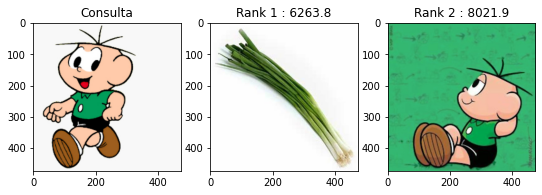

In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

# carregar e exibir imagens da "base de dados"
img1 = imageio.imread("dados/cebolinha3.jpg")
img2 = imageio.imread("dados/cebolinha2.jpg")

# carregar imagem de consulta e codificar funcao de distancia
# computar as distancias e exibir
imgQ = imageio.imread("dados/cebolinha1.jpg")

def Euclidean_distance(A, B):
    """ Calcula a distancia Euclidiana entre dois vetores de mesmo tamanho"""
    return  np.sqrt( np.sum((A-B)**2) )

dQ1 = Euclidean_distance(imgQ, img1)
dQ2 = Euclidean_distance(imgQ, img2)

plt.figure(figsize=(9,3))
plt.subplot(131); plt.imshow(imgQ); plt.title('Consulta')
plt.subplot(132); plt.imshow(img1); plt.title('Rank 1 : %.1f' % dQ1)
plt.subplot(133); plt.imshow(img2); plt.title('Rank 2 : %.1f' % dQ2)

In [ ]:
def histograma_global(img, bins):

    # um único canal de cor
    if (len(img.shape) == 2):
        hist,_ = np.histogram(img, bins=bins)
    # mais do que um canal de cor RGB
    if (len(img.shape) == 3):
        hist_R,_ = np.histogram(img[:,:,0], bins=bins)
        hist_G,_ = np.histogram(img[:,:,1], bins=bins)
        hist_B,_ = np.histogram(img[:,:,2], bins=bins)
        
        hist = np.concatenate([hist_R, hist_G, hist_B])
    
    # normaliza o vetor resultante pela soma dos valores
    hist = hist.astype("float")
    hist /= (hist.sum() + 0.0001)        
    
    return hist

Text(0.5, 1.0, 'Rank 2: 0.4683')

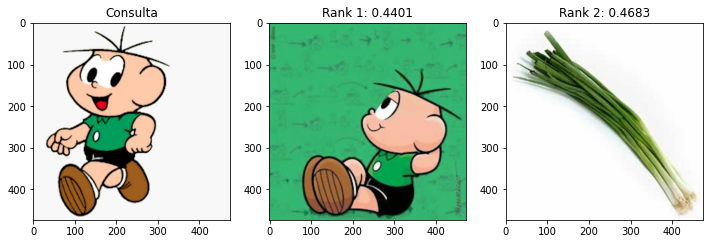

In [ ]:
HQ = histograma_global(imgQ, 64)
H1 = histograma_global(img1, 64)
H2 = histograma_global(img2, 64)

dQ1_H = Euclidean_distance(HQ, H1)
dQ2_H = Euclidean_distance(HQ, H2)

plt.figure(figsize=(12,4))
plt.subplot(131); plt.imshow(imgQ); plt.title('Consulta')
plt.subplot(132); plt.imshow(img2); plt.title('Rank 1: %.4f' % dQ2_H)
plt.subplot(133); plt.imshow(img1); plt.title('Rank 2: %.4f' % dQ1_H)

#### vantagens em utilizar descritores:
* vetores de característica possuem menor dimensão do que o espaço de pixels e podem ser usados como índices,
* imagens de resolução diferentes podem ser comparadas, 
* é possível aplicar redução de dimensionalidade


In [ ]:
print("Dimensionalidade pixels = ", np.product(imgQ.shape))
print("Dimensionalidade histograma = ", np.product(HQ.shape))

Dimensionalidade pixels =  674028
Dimensionalidade histograma =  192


In [ ]:
img3 = imageio.imread("dados/magali.jpg")
print("Dimensionalidade pixels = ", np.product(img3.shape))

dQ3 = Euclidean_distance(imgQ, img3)

Dimensionalidade pixels =  923520


ValueError: operands could not be broadcast together with shapes (474,474,3) (640,481,3) 

O erro é de incompatibilidade nos tamanhos das imagens, de forma que diferentes resoluções não permita comparação direta.

Text(0.5, 1.0, 'Rank 2 : 0.4683')

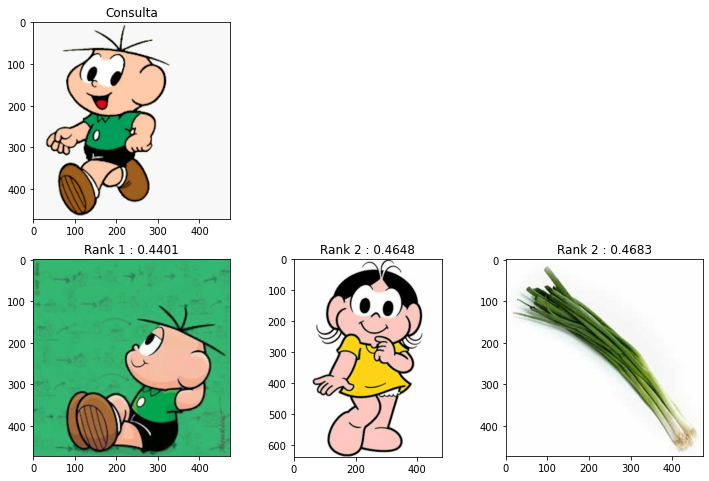

In [ ]:
H3 = histograma_global(img3, 64)
dQ3_H = Euclidean_distance(HQ, H3)

plt.figure(figsize=(12,8))
plt.subplot(231); plt.imshow(imgQ); plt.title('Consulta')
plt.subplot(234); plt.imshow(img2); plt.title('Rank 1 : %.4f' % dQ2_H)
plt.subplot(235); plt.imshow(img3); plt.title('Rank 2 : %.4f' % dQ3_H)
plt.subplot(236); plt.imshow(img1); plt.title('Rank 2 : %.4f' % dQ1_H)

#### outros descritores de cor
* Border/Interior Classification (BIC): computa dois histogramas um para regiões planas (interior) e um para bordas ou regiões com variação (border)


* Autocorrelograma de cores: computa uma matriz que verifica a ocorrência de uma cor em relação às outras

---
### Características de textura

Consideram não apenas os valores absolutos dos pixels, mas também sua relação com vizinhos.
* regiões planas tem significado diferente de regiões com alta variação
* diferentes padrões de variação possuem significado diferente de textura

| Textura | Exemplo | Textura | Exemplo
|:---:|:---:|:---:|:---:|
| Entrelaçado | ![Entrelaçado](dados/texture_interlaced.jpg)|  Borbulhante | ![Borbulhante](dados/texture_bubbly.jpg)|
| Espargido | ![Polvilhado](dados/texture_sprinkled.jpg)| Pontilhado | ![Pontuado](dados/texture_dotted2.jpg)|
| Trançado | ![Trançado](dados/texture_braided.jpg)| Xadrez | ![Xadrez](dados/texture_chequered.jpg)|
    


Ainda que características de *frequência* possam ser utilizadas nesse caso, a Tranformada de Fourier não permite a localização das frequências, atuando apenas de forma global.

Um descritor bastante utilizado é o **Local Binary Patterns (LBP)**, implementado na biblioteca `scikit-image`

Ele busca por padrões locais em que cada pixel central é comparado com os vizinhos de forma binária:
* valores maiores o iguais se transformam em 1
* valores menores se transformam em 0

<img src="imagens/LBP.png" width=460></img>

Considerando uma vizinhança de 8 pixels, temos $2^8 = 256$ códigos distintos, dos quais obtemos um histograma

In [ ]:
from skimage import feature

def lbp_features(img):
    
    # LBP opera em imagens de um só canal, aqui vamos converter 
    # RGB para escala de cinza usando o método Luminance
    img_gray = img[:,:,0].astype(float)*0.3 + img[:,:,1].astype(float)*0.59 + img[:,:,2].astype(float)*0.11
    
    # aqui definimos o numero de pontos e o raio, padrao = 8, 1
    lbp = feature.local_binary_pattern(img_gray.astype(np.uint8), 8, 1, method="uniform")
    
    # lbp retorna um matriz com os códigos, então devemos extraír o histograma
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, 8 + 3), range=(0, 8 + 2))

    # normaliza o histograma
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    # return the histogram of Local Binary Patterns

    return hist

Text(0.5, 1.0, 'Rank 5 : 0.2586')

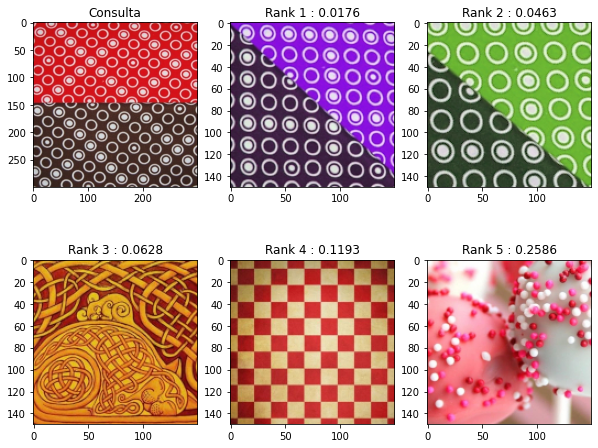

In [ ]:
img1 = imageio.imread("dados/texture_dotted.jpg")
img2 = imageio.imread("dados/texture_dotted3.jpg")
img3 = imageio.imread("dados/texture_dotted2.jpg")
img4 = imageio.imread("dados/texture_interlaced.jpg")
img5 = imageio.imread("dados/texture_chequered.jpg")
img6 = imageio.imread("dados/texture_sprinkled.jpg")

lbp1 = lbp_features(img1)
lbp2 = lbp_features(img2)
lbp3 = lbp_features(img3)
lbp4 = lbp_features(img4)
lbp5 = lbp_features(img5)
lbp6 = lbp_features(img6)

dQ2_H = Euclidean_distance(lbp1, lbp2)
dQ3_H = Euclidean_distance(lbp1, lbp3)
dQ4_H = Euclidean_distance(lbp1, lbp4)
dQ5_H = Euclidean_distance(lbp1, lbp5)
dQ6_H = Euclidean_distance(lbp1, lbp6)

plt.figure(figsize=(10,8))
plt.subplot(231); plt.imshow(img1); plt.title('Consulta')
plt.subplot(232); plt.imshow(img2); plt.title('Rank 1 : %.4f' % dQ2_H)
plt.subplot(233); plt.imshow(img3); plt.title('Rank 2 : %.4f' % dQ3_H)
plt.subplot(234); plt.imshow(img4); plt.title('Rank 3 : %.4f' % dQ4_H)
plt.subplot(235); plt.imshow(img5); plt.title('Rank 4 : %.4f' % dQ5_H)
plt.subplot(236); plt.imshow(img6); plt.title('Rank 5 : %.4f' % dQ6_H)

(-0.8900000000000001, 9.89, 0.0, 0.3422066666514575)

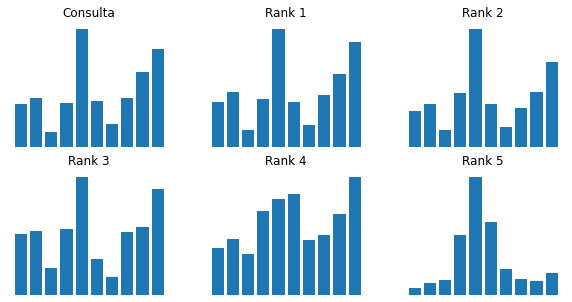

In [ ]:

vals = range(len(lbp1))
plt.figure(figsize=(10,5))
plt.subplot(231); plt.bar(vals,lbp1); 
plt.title('Consulta'); plt.axis('off')
plt.subplot(232); plt.bar(vals,lbp2); 
plt.title('Rank 1'); plt.axis('off')
plt.subplot(233); plt.bar(vals,lbp3); 
plt.title('Rank 2'); plt.axis('off')
plt.subplot(234); plt.bar(vals,lbp4); 
plt.title('Rank 3'); plt.axis('off')
plt.subplot(235); plt.bar(vals,lbp5); 
plt.title('Rank 4'); plt.axis('off')
plt.subplot(236); plt.bar(vals,lbp6); 
plt.title('Rank 5'); plt.axis('off')


---
### Outros descritores de imagens

* HoG - histogram of oriented gradients
    * usados em reconhecimento de pessoas e objetos

* Haar-like features
    * usados em detecção facial
    
* SIFT - scale-invariant feature transform
    * foi por um bom tempo estado-da-arte, posteriormente patenteado mas há similares como o DAISY
        
* BRIEF - descritor binário local
    * também similar ao SIFT, mas binário e utilizado para matching de regiões em imagens
    
* Gray-level Co-ocurrence Matrices (GLCM) - também conhecidos por descritores de Haralick
    * utilizado para textura


### Resumo:

* Imagens são dados não estruturados espaciais
    * amostras tomadas em uma grade regular
    * a representação pode ser em intensidades (um canal) ou cores (geralmente RGB, 3 canais)

* Descritores
    * pixels da imagem
    * histogramas de cores ou intensidades
    * textura, com relação entre pixels numa vizinhança

### <span style="color:darkred">Módulo VII - Dados não estruturados: sinais e imagens</span>
### <span style="color:darkred">Bag of Features</span>

O método **Bag of Features** é um framework genérico para obter descritores aprendidos a partir dos dados.

Quando aplicado em imagens também é chamado de *Bag of Visual Words*

Possui os seguintes passos:

1. extrair características localmente

2. aprender um dicionário de palavras visuais (vocabulário)
    
3. quantizar ou agrupar as características usando o dicionário
    
4. cada imagem é representada pela frequência das palavras visuais (histograma)

Essa técnica teve origem ao mesmo tempo na literatura de texto (Bag of Words) e análise de textura (Textons).

Nesse aula vamos exemplificar usando imagens.

<img src=imagens/textons1.jpg width=720>

Temos 3 imagens, e para cada imagem aprendemos um conjunto de subimagens representativas formando um **dicionário visual** ou *codebook*.

Podemos usar:
* o espaço de pixels original,
* o espaço de pixels projetado utilizando PCA, 
* descritores ou vetores de características extraídos.

A partir de então para cada subimagem, verificamos sua similaridade com o dicionário, e contamos a ocorrência da palavra visual mais similar, formando histogramas que serão utilizados para as tarefas de reconhecimento.

<img src=imagens/textons2.jpg width=720>

Detalhando o método **Bag of Features**

1. definir um conjunto de características ou descritores base




2. dos dados de treinamento: extrair as características de maneira local em *patches*
    * subimagens
    * trechos de sinais

<img src=imagens/bof1.jpg width=680>

    


3. o espaço de características será formado por múltiplos vetores locais
    * extraídos dos *patches*
    * assim temos múltiplos vetores por imagem ou sinal

<img src=imagens/bof2.jpg width=680>    



    
4. montar um *codebook* ou *dicionário* obtido a partir de todo o universo de vetores de treinamento, 
    1. definir o tamanho do dicionário $K$
    2. executar um algoritmo de agrupamento e definir os centros dos $K$ clusters como elementos do dicionário

<img src=imagens/bof3.jpg width=680>    

    


5. o vetor de características é um histograma obtido da seguinte forma:
    1. o histograma tem um *bin* para cada elemento do dicionário
    2. extraia o próximo *patch*
    3. conte +1 ao código do dicionário mais similar ao *patch* extraído

<img src=imagens/bof4.jpg width=680>    


---
### Passo 1 - obter imagens e patches

Vamos usar a função `extract_patches_2d()` da `sklearn.feature_extraction.image`

Várias outras bibliotecas serão utilizadas. Alguns destaques:
* joblib: Parallel, delayed - permite executar uma função em modo paralelo
* os: listdir - para listar arquivos numa pasta

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from os import listdir
from imageio import imread
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from joblib import Parallel, delayed


def get_patches(img_file, random_state, tam_patch=(11, 11), n_patches=250):
    '''Extração de subimagens a partir de uma imagem
       Parametros
           img_file: caminho para a imagem
           random_state: semente aleatoria
           tam_patches: tamanho de cada subimagem
           n_patches: numero maximo de subimagens a extrair
    '''

    img = imread(img_file)
    
    # Extrai subimagens
    patch = extract_patches_2d(img, 
                               patch_size=tam_patch,
                               max_patches=n_patches, 
                               random_state=random_state)
    
    return patch.reshape((n_patches, 
                          np.prod(tam_patch) * len(img.shape)))

Temos que definir:
* o tamanho de cada patch e o total de patches
* o diretório a buscar imagens
* cada patch terá ainda uma dimensão extra, relativa ao número de canais de cor (1 para cinza, 3 para RGB) 

Patches extraídos para criação do dicionário de features
Total de imagens =  80
Tamanho de cada array de patches =  (1000, 507)


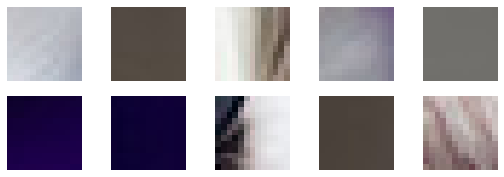

In [ ]:
# Parametros do BOF
tam_patch = (13, 13)
n_patches = 1000
path_imgs = './dados/flickr_map_training/'
random_state = 1
# pega lista de arquivos no caminho
l_imgs = listdir(path_imgs)

# total de imagens
n_imgs = len(l_imgs)

# Extrai patches de cada imagem, de forma paralela para cada imagem
# retorna uma lista do mesmo tamanho do número de imagens
patch_arr = Parallel(n_jobs=-1)(delayed(get_patches)(path_imgs+arq_img, 
                                                    random_state,
                                                    tam_patch,
                                                    n_patches)
                                for arq_img in l_imgs)

print('Patches extraídos para criação do dicionário de features')
print('Total de imagens = ', len(patch_arr))
print('Tamanho de cada array de patches = ', patch_arr[0].shape)

# exibe alguns patches de uma imagem
img_ind = 1
plt.figure(figsize=(9,3))
for i in np.arange(1,11):
    plt.subplot(2,5,i)
    plt.imshow(patch_arr[img_ind][i].reshape((tam_patch[0],tam_patch[1],3)))
    plt.axis('off')

---
### Passo 2 - obter features a partir dos patches

Como o número de pixels em cada patch é de alta dimensionalidade, podemos extrair features para tornar o vetor mais compacto.

Aqui utilizamos o PCA como extrator de características

In [ ]:
pca_components = 20

# Criando matriz com todos os patches para aplicar PCA
patch_arr2 = np.array(patch_arr, copy=True)
patch_arr2 = patch_arr2.reshape((patch_arr2.shape[0] * patch_arr2.shape[1],
                               patch_arr2.shape[2]))

print('Total de instancias = ', len(patch_arr2), ' de tamanho = ', patch_arr2[0].shape[0])

# Construindo modelo de componentes principais
modelo_PCA = PCA(n_components=pca_components, random_state=random_state)
modelo_PCA.fit(patch_arr2)
patch_pca = modelo_PCA.transform(patch_arr2)

print('Espaço de características PCA criado')

print('\tpatches = ', len(patch_pca), ' de tamanho = ', patch_pca[0].shape[0])

Total de instancias =  80000  de tamanho =  507
Espaço de características PCA criado
	patches =  80000  de tamanho =  20


---
### Passo 3 - obter Dicionário / Codebook / Vocabulário

Para isso utilizaremos o KMeans. É preciso definir:
* o número de palavras visuais no vocabulário
    * o padrão é um valor entre 50 e 1000 elementos
    

In [ ]:
n_dic = 32
random_state = 1

# Construindo o dicionário
kmeans_model = KMeans(n_clusters=n_dic, 
                      verbose=False, 
                      init='random',
                      random_state=random_state, 
                      n_init=3)
kmeans_model.fit(patch_pca)

print('Dicionário aprendido')

Dicionário aprendido


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int32)

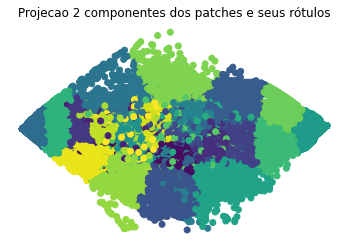

In [ ]:
plt.scatter(patch_pca[:, 0], patch_pca[:, 1], c=kmeans_model.labels_)
plt.title('Projecao 2 componentes dos patches e seus rótulos')
plt.axis('off')

np.unique(kmeans_model.labels_)

---
### Passo 4 - obter histogramas como features da Bag of Featurees

Sabemos que cada uma das `n_imgs` imagens possui número de patches = `n_patches`

Vamos agora verificar a frequência de cada palavra visual no dicionário em cada uma das imagens de treinamento

In [ ]:
img_feats = []

# para cada imagem
for i in range(n_imgs):
    # predicao para os n_patches de uma imagem
    y = kmeans_model.predict(patch_pca[i*n_patches: (i*n_patches)+n_patches])

    # computa histograma e armazena no array de features
    hist_bof,_ = np.histogram(y, bins=range(n_dic+1), density=True)
    img_feats.append(hist_bof)

img_feats = np.array(img_feats, copy=False)
print('Número de imagens e features = ', img_feats.shape)

Número de imagens e features =  (80, 32)


O array `img_feats` é um índice com características para cada imagem

---
### Passo 5 - utilizar as features para tarefas de reconhecimento

Aqui vamos usar para *recuperação de imagem baseada em conteúdo*, a partir de uma imagem de consulta.

Mas essas features podem ser usadas para realizar treinamento de modelos ou outras análises.

Patches extraídos
(1000, 507)
PCA executado
(1000, 20)
Features do BOF obtidas
Distancias calculadas
imagem mais similar = 40  distancia = 0.24001249967449612


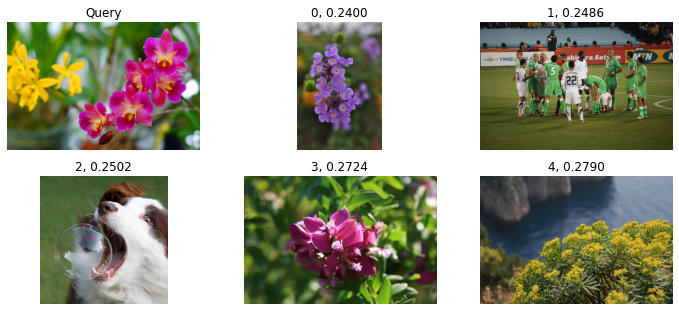

In [ ]:
path_query = './dados/flickr_map_test/flower.jpg'
# pegando patches
query_patches = get_patches(path_query, random_state, tam_patch, n_patches)
query_patches = np.array(query_patches, copy=False)
print('Patches extraídos')
print(query_patches.shape)

# redimensionando e aplicando pca
query_pca = modelo_PCA.transform(query_patches)
print('PCA executado')
print(query_pca.shape)

# obtem palavras visuais
y = kmeans_model.predict(query_pca)
# computa histograma como feature
query_feats,_ = np.histogram(y, bins=range(n_dic+1), density=True)

print('Features do BOF obtidas')

dists = []
for i in range(n_imgs):
    diq = np.sqrt(np.sum((img_feats[i]-query_feats)**2))
    dists.append(diq)

# pega imagens mais proximas    
k_cbir = np.argsort(dists)[:5]

print('Distancias calculadas')
print('imagem mais similar =', k_cbir[0], ' distancia =', dists[k_cbir[0]])

import imageio
imgq = imageio.imread(path_query)

plt.figure(figsize=(12,8))
plt.subplot(331); plt.imshow(imgq)
plt.title('Query'); plt.axis('off')

imgs = []
for i in range(5):
    imgs.append(imageio.imread(path_imgs+l_imgs[k_cbir[i]]))
    plt.subplot(3,3,i+2); plt.imshow(imgs[i])
    plt.title('%d, %.4f' % (i, dists[k_cbir[i]])); plt.axis('off')


### Resumo:

* Bag of Features é um *framework* para obter características
    * útil para obter representações compactas e com certo grau de interpretabilidade
    * estado da arte pré-Deep Learning

* Etapas críticas
    * definição do descritor base
    * definição do dicionário
    
* Pode ser usado para qualquer dado não estruturado, seguindo as mesmas etapas
    * texto - Bag of Words
    * sinais
    * outros

## <span style="color:darkred">Módulo VII - Dados não estruturados: sinais e imagens</span>
### <span style="color:darkred">Exercícios - com soluções</span>

In [ ]:
# carregando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Exercício 1)

Quando comparamos imagens e sinais e suas características, o que devemos considerar a priori?

(a) Sinais possuem valores independente e identicamente distribuídos, enquanto Imagens possuem pixels organizados de forma espacial<br>
(b) Sinais possuem valores codificados em 16 bits, enquanto imagens possuem valores codificados em 8 bits<br>
(c) Sinais possuem valores com dependência sequencial, enquanto imagens não possuem padrão de dependência<br>
<font color='red'>(d) Sinais possuem valores com dependência sequencial, enquanto Imagens possuem dependência espacial de seus valores<br></font>

<font color='red'>Resposta</font>: *a priori, sempre devemos considerar que sinais e imagens possuem valores com dependência respectivamente sequencial e espacial. Ainda que sinais e imagens podem ser observados com dados i.i.d., quando isso acontece perdemos a coerencia espacial (no caso de imagens) e sequencial (no caso de sinais) que os caraterizam.*


### Exercício 2)

Sejam sinais representados por 32 bits (int32) e imagens representadas por 16 bits sem sinal (uint16). Quantos valores distintos é possível representar em cada um desses dados?

(a) Sinais: 4,29 Bilhões; Imagens 32,76 Mil<br>
<font color='red'>(b) Sinais: 4,29 Bilhões; Imagens 65,53 Mil<br></font>
(c) Sinais: 2,14 Bilhões; Imagens 32,76 Mil<br>
(d) Sinais: 2,14 Bilhões; Imagens 65,53 Mil<br>

<font color='red'>Resposta</font>: $2^{32}=4,29$ bilhões, $2^{16}=65,53$ mil, independente da representação permitir ou não sinais o número de valores distintos é obtido da mesma maneira. 

### Exercício 3)

Carregue os dados do arquivo `sinais2.csv` utilizando 

`signals = np.genfromtxt(arquivo, delimiter=',').astype(np.float32)`.

O array resultante possui um sinal por linha, i.e. `sinal[i]`

Utilizando os sinais carregados utilize a `np.fft.fft()` para obter a Transformada de Fourier dos sinais. Depois, considerando apenas frequências até 50 Hz, calcule quais são as 4 frequências de maior valor de magnitude (maginute calculada pelo `np.abs()`). Aqui não queremos os valores da magnitude, mas a quais frequências (índices) elas se referem. Para complementar a análise, plote as magnitudes das transformadas até a frequência 50.

Analisando as frequências de maior magnitude temos as frequências que mais caracterizam o sinal. Considerando as 4 frequências computadas anteriormente, podemos dividir os sinais em categorias distintas. Nesse sentido, qual análise abaixo está correta?

(a) O sinal 4 possui frequências inferiores quando comparado com os demais, indicando que o sinal 4 é provavalmente  dependente sequencialmente, enquanto os demais são i.i.d.; assim podemos dividí-los em duas categorias: sinal 4 e sinais 0, 1, 2 e 3.<br>
(b) O sinal 3 possui frequências mais significativas 20 Hz ou superior, indicando que é um sinal com maior qualidade de aquisição, e assim podemos categorizar em: sinal 3, e sinais 0, 1, 2 e 4.<br>
(c) Todas as frequências estão abaixo de 50 Hz, sendo assim podemos dizer que os sinais são todos similares, sendo impossível dividí-los em categorias.<br>
<font color='red'>(d) O sinal 3 possui frequências mais significativas 20 Hz ou superior, possuindo transições mais rápidas de valores do que os outros com frequências caracerísticas menores do que 12Hz; e assim podemos categorizar em: sinal 3, e sinais 0, 1, 2 e 4.</font><br>

<font color='red'>Resposta</font>: *o sinal 3 se destaca por possuir frequências características na média 2 vezes superiores quando comparado aos demais, e acima de 20Hz. Assim como na análise de autocorrelação, esse sinal é distinto dos demais, cujas frequências são mais baixas. Mas frequências superiores não indicam melhor qualidade do sinal, descartando a alternativa (b), assim a opção (d) é a mais adequada.*

0  frequências:  [ 6  8 10 11]
1  frequências:  [ 7  8  9 10]
2  frequências:  [5 7 8 9]
3  frequências:  [20 21 28 39]
4  frequências:  [2 3 6 8]


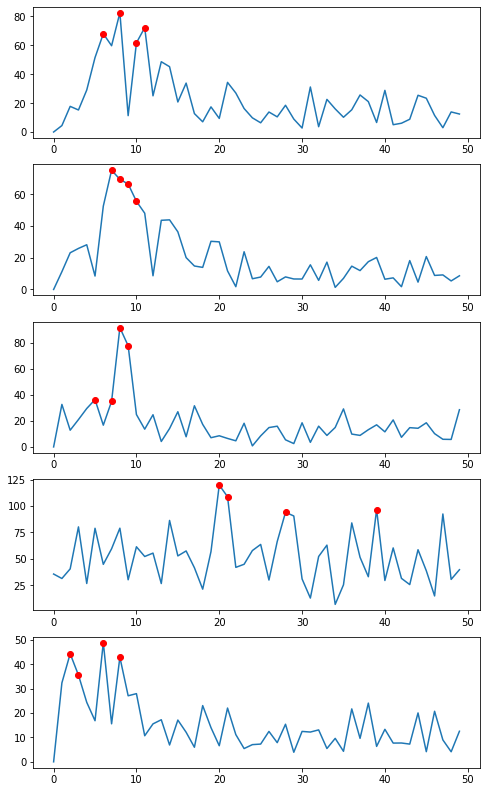

In [ ]:
signals = np.genfromtxt('./dados/sinais2.csv', delimiter=',').astype(np.float32)
plt.figure(figsize=(8,14))
for i in range(signals.shape[0]):
    Fi = np.abs(np.fft.fft(signals[i]))
    k = 4
    Fi_50 = Fi[:50]
    ind = np.argpartition(Fi_50, -k)[-k:]
    print(i, ' frequências: ', np.sort(ind))
    plt.subplot(5,1,i+1); plt.plot(Fi_50);
    plt.plot(ind, Fi_50[ind], 'ro')

### Exercício 4)
 
Considerando os mesmos sinais carregados no exercício anterior, compute as características: entropia da energia (com 10 blocos), taxa de cruzamentos por zero, entropia espectral (com 10 blocos), formando um vetor com 3 características para cada sinal.

Após isso, compute a matriz de distâncias entre os sinais considerando a distância L1, i.e., a soma dos valores absolutos das diferenças entre dois vetores $A$ e $B$:

$$\sum_i |A_i - B_i|$$

Da matriz, que indica a dissimilaridade entre pares de sinais, aplique uma soma na direção do eixo 0 (axis=0) e depois arredonde para inteiro `np.round(,0)`. Quais valores foram obtidos para cada sinal?

(a) Sinais 0, 1, 2 e 4, soma 2; Sinal 3, soma 6.<br>
(b) Sinais 0 e 4, soma 3; Sinais 1 e 2, soma 2; Sinal 3, soma 6.<br>
<font color='red'>(c) Sinais 0, 1, e 2, soma 2; Sinal 3, soma 6; Sinal 4, soma 3.<br></font>
(d) Sinais 0, 1, e 2, soma 1; Sinal 3, soma 3; Sinal 4, soma 6.<br>

<font color='red'>Resposta</font>: *ver código abaixo.*

In [ ]:
def entropia_energia(sinal, n_blocos=10):
    '''Entropia da energia do sinal'''
    # energia total 
    energia_sinal = np.sum(sinal ** 2)
    M = len(sinal)
    
    # calcula janelas dentro do sinal
    M_janelas = int(np.floor(M / n_blocos))
    # verifica se tamanho dos blocos 
    # é multiplo do tamanho do sinal
    if M != M_janelas * n_blocos:
        sinal = sinal[0:M_janelas * n_blocos]

    # monta matriz [M_janelas x n_blocos]
    janelas = sinal.reshape(M_janelas, n_blocos, order='F').copy()
    
    # Computa energias de cada janela (normalizada pela do sinal)
    e_janelas = np.sum(janelas ** 2, axis=0) / (energia_sinal + 0.0001)
    #print(e_janelas)

    # Computa entropia entre energias das janelas
    entropia = -np.sum(e_janelas * np.log2(e_janelas + 0.0001))
    return entropia

def taxa_cruzamentos_por_zero(sinal):
    '''Cruzamentos por zero em um intervalo de tempo '''
    M = len(sinal)
    cont_zero = np.sum(np.abs(np.diff(np.sign(sinal)))) / 2
    return np.float64(cont_zero) / np.float64(M - 1.0)

def entropia_espectral(sinal, n_blocos=10):
    """Computes the spectral entropy"""
    
    fft_abs = np.abs(np.fft.fft(sinal))
    
    entropia_esp = entropia_energia(fft_abs, n_blocos=n_blocos)

    return entropia_esp

In [ ]:
features = []
for i in range(signals.shape[0]):
    f1 = entropia_energia(signals[i])
    f2 = taxa_cruzamentos_por_zero(signals[i])
    f3 = entropia_espectral(signals[i])
    features.append([f1, f2, f3])

features= np.array(features)
dmat = np.zeros([signals.shape[0],signals.shape[0]])
for i in range(signals.shape[0]):
    for j in range(signals.shape[0]):
        dmat[i,j] = np.sum(np.abs(features[i]-features[j]))
        #dmat[i,j] = np.sqrt(np.sum((features[i]-features[j])**2))

print(dmat)
print(np.round(np.sum(dmat,axis=0),0))

[[0.         0.08820419 0.16471197 1.55867705 0.56184067]
 [0.08820419 0.         0.11717896 1.55371289 0.47363648]
 [0.16471197 0.11717896 0.         1.60484023 0.42113137]
 [1.55867705 1.55371289 1.60484023 0.         1.63633509]
 [0.56184067 0.47363648 0.42113137 1.63633509 0.        ]]
[2. 2. 2. 6. 3.]


### Exercício 5)

Carregue as seguintes imagens da base de dados flickr_map_training:

`
img1 = imageio.imread("dados/flickr_map_training/107.jpg")
img2 = imageio.imread("dados/flickr_map_training/101.jpg")
img3 = imageio.imread("dados/flickr_map_training/112.jpg")
img4 = imageio.imread("dados/flickr_map_training/303.jpg")
img5 = imageio.imread("dados/flickr_map_training/400.jpg")`

Implemente um descritor de cor que computa um histograma utilizando a composição dos canais RGB em um único canal utilizando a seguinte operação, sendo R, G e B as matrizes relativas a cada canal de cor:

$$I = R\cdot0.3 +G\cdot0.59 +B\cdot0.11$$

Permita definir o número de bins do histograma por meio da sua função e, antes de retornar, normalize o histograma dividindo pela soma.

Depois, calcule a distância entre img1 carregada e as outras imagens (2, 3, 4, 5) utilizando: 16 bins e 4 bins. Qual foram as duas imagens mais similares, da mais próxima para a mais distante, nos dois casos?

<font color='red'>(a) 16 bins: img2, img4 ; 4 bins: img2, img3<br></font>
(a) 16 bins: img2, img3 ; 4 bins: img4, img3<br>
(b) 16 bins: img2, img3 ; 4 bins: img2, img4<br>
(d) 16 bins: img4, img2 ; 4 bins: img4, img3<br>

<font color='red'>Resposta</font>: *ver código abaixo.*



In [ ]:
import imageio

def histograma_global_intensity(img, n_colors):
    img_int = img[:,:,0].astype(float)*0.3 + img[:,:,1].astype(float)*0.59 + img[:,:,2].astype(float)*0.11
    hist,_ = np.histogram(img_int, bins=n_colors)
    # normaliza o vetor resultante pela soma dos valores
    hist = hist.astype("float")
    hist /= (hist.sum() + 0.0001)        
    return hist

(-0.5, 499.5, 343.5, -0.5)

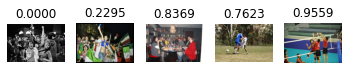

In [ ]:
img1 = imageio.imread("dados/flickr_map_training/107.jpg")
img2 = imageio.imread("dados/flickr_map_training/101.jpg")
img3 = imageio.imread("dados/flickr_map_training/112.jpg")
img4 = imageio.imread("dados/flickr_map_training/303.jpg")
img5 = imageio.imread("dados/flickr_map_training/400.jpg")

ncolors = 16
f1 = histograma_global_intensity(img1, ncolors)
f2 = histograma_global_intensity(img2, ncolors)
f3 = histograma_global_intensity(img3, ncolors)
f4 = histograma_global_intensity(img4, ncolors)
f5 = histograma_global_intensity(img5, ncolors)
features = np.vstack([f1, f2, f3, f4, f5])

dist = np.zeros(5)
for i in range(5):
    dist[i] = np.sum((np.abs(features[0]-features[i])))

plt.subplot(151); plt.imshow(img1); plt.title("%.4f"%  dist[0]); plt.axis('off')
plt.subplot(152); plt.imshow(img2); plt.title("%.4f"% dist[1]); plt.axis('off')
plt.subplot(153); plt.imshow(img3); plt.title("%.4f"% dist[2]); plt.axis('off')
plt.subplot(154); plt.imshow(img4); plt.title("%.4f"% dist[3]); plt.axis('off')
plt.subplot(155); plt.imshow(img5); plt.title("%.4f"% dist[4]); plt.axis('off')

(-0.5, 499.5, 343.5, -0.5)

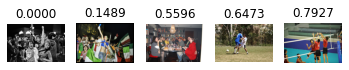

In [ ]:
ncolors = 4
f1 = histograma_global_intensity(img1, ncolors)
f2 = histograma_global_intensity(img2, ncolors)
f3 = histograma_global_intensity(img3, ncolors)
f4 = histograma_global_intensity(img4, ncolors)
f5 = histograma_global_intensity(img5, ncolors)
features = np.vstack([f1, f2, f3, f4, f5])

dist = np.zeros(5)
for i in range(5):
    dist[i] = np.sum((np.abs(features[0]-features[i])))

plt.subplot(151); plt.imshow(img1); plt.title("%.4f"%  dist[0]); plt.axis('off')
plt.subplot(152); plt.imshow(img2); plt.title("%.4f"% dist[1]); plt.axis('off')
plt.subplot(153); plt.imshow(img3); plt.title("%.4f"% dist[2]); plt.axis('off')
plt.subplot(154); plt.imshow(img4); plt.title("%.4f"% dist[3]); plt.axis('off')
plt.subplot(155); plt.imshow(img5); plt.title("%.4f"% dist[4]); plt.axis('off')

### Exercício 6)

Vamos repetir o procedimento da questão anterior, agora utilizando o descritor de texturas LBP visto em aula. Utilizaremos uma função que também realiza uma normalização dos valores máximos das imagens, bem como permite definir o raio, número de pontos e quantidade de bins para esse descritor, conforme abaixo.

Calcule a distância L1 entre img1 carregada e as outras imagens utilizando o descritor LBP com os seguintes parâmetros:
* número de pontos = 14
* raio = 2
* bins = 16

Quais foram as três imagens mais similares, da mais próxima para a mais distante?

<font color='red'>(a) img3, img2, img5 <br></font>
(b) img2, img3, img4<br>
(c) img3, img5, img2<br>
(d) img5, img3, img2<br>

<font color='red'>Resposta</font>: *ver código abaixo.*


In [ ]:
from skimage import feature

def lbp_features(img, points=8, radius=1, n_bins=10):
    # LBP opera em imagens de um só canal, aqui vamos converter 
    # RGB para escala de cinza usando o método Luminance
    img = np.array(img, dtype=np.float64, copy=False)
    if (len(img.shape) > 2):
        img = img[:,:,0]*0.3 + img[:,:,1]*0.59 + img[:,:,2]*0.11
    
    # normaliza a imagem para ter máximo = 255
    if (np.max(img) > 0):
        img = ((img/np.max(img))*255).astype(np.uint8)
    
    # aqui definimos o numero de pontos e o raio, padrao = 8, 1
    lbp = feature.local_binary_pattern(img.astype(np.uint8), points, radius, method="uniform")
    
    # lbp retorna um matriz com os códigos, então devemos extraír o histograma
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_bins+1), range=(0, n_bins))

    # normaliza o histograma
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    # return the histogram of Local Binary Patterns

    return hist

(-0.5, 499.5, 343.5, -0.5)

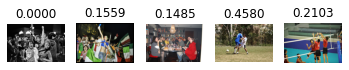

In [ ]:
pts = 14
rad = 2
nbi = 16
f1 = lbp_features(img1, pts, rad, nbi)
f2 = lbp_features(img2, pts, rad, nbi)
f3 = lbp_features(img3, pts, rad, nbi)
f4 = lbp_features(img4, pts, rad, nbi)
f5 = lbp_features(img5, pts, rad, nbi)
features = np.vstack([f1, f2, f3, f4, f5])

dist = np.zeros(5)
for i in range(5):
    dist[i] = np.sum(np.abs(features[0]-features[i]))


plt.subplot(151); plt.imshow(img1); plt.title("%.4f"%  dist[0]); plt.axis('off')
plt.subplot(152); plt.imshow(img2); plt.title("%.4f"% dist[1]); plt.axis('off')
plt.subplot(153); plt.imshow(img3); plt.title("%.4f"% dist[2]); plt.axis('off')
plt.subplot(154); plt.imshow(img4); plt.title("%.4f"% dist[3]); plt.axis('off')
plt.subplot(155); plt.imshow(img5); plt.title("%.4f"% dist[4]); plt.axis('off')

### Exercício 7)
 
No método Bag-of-Features quais das seguintes escolhas para o *framework* influenciam mais drasticamente a performance do método no caso de uso em imagens?

(a) O tamanho do dicionário, a quantidade de cores nas imagens, a quantidade de classes do problema<br>
<font color='red'>(b) O tamanho do dicionário, o descritor base, o método utilizado para aprender o dicionário<br></font>
(c) O descritor base e o número de componentes principais utilizados<br>
(d) O tamanho do patch extraído da imagem, que deve ser compatível com a resolução das imagens<br>

<font color='red'>Resposta</font>: *Ainda que todos os itens acima possam influenciar de alguma maneira, os parâmetros que podemos definir no framework Bag-of-Features são: o descritor base, o tamanho do dicionário, o método utilizado para aprender o dicionário, o tamanho do patch e o número de patches extraídos, sendo mais relevantes para a performance do método: o tamanho do dicionário, o método utilizado para aprendê-lo e o descritor base.*

### Exercício 8)

Execute o método Bag-of-Features estudado em aula, agora com os seguintes parâmetros:
* tamanho do patch = (13, 13)
* número de patches = 1000
* principais componentes = 10
* tamanho do dicionário = 50

Utilize a imagem de consulta `flower.jpg` e recupere as 12 imagens mais similares utilizando o modelo BoF aprendido. Quantas imagens foram recuperadas pertencendo à mesma categoria da consulta?

(a) 3<br>
(b) 0<br>
<font color='red'>(c) 6<br></font>
(d) 9<br>

<font color='red'>Resposta</font>: *ver codigo abaixo*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from os import listdir
from imageio import imread
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from joblib import Parallel, delayed


def get_patches(img_file, random_state, tam_patch=(11, 11), n_patches=250):
    '''Extração de subimagens a partir de uma imagem
       Parametros
           img_file: caminho para a imagem
           random_state: semente aleatoria
           tam_patches: tamanho de cada subimagem
           n_patches: numero maximo de subimagens a extrair
    '''

    img = imread(img_file)
    
    # Extrai subimagens
    patch = extract_patches_2d(img, 
                               patch_size=tam_patch,
                               max_patches=n_patches, 
                               random_state=random_state)
    
    return patch.reshape((n_patches, 
                          np.prod(tam_patch) * len(img.shape)))

In [ ]:
# Parametros do BOF
tam_patch = (13, 13) # param
n_patches = 1000 # param
path_imgs = './dados/flickr_map_training/'
random_state = 1
# pega lista de arquivos no caminho
l_imgs = listdir(path_imgs)

# total de imagens
n_imgs = len(l_imgs)

# Extrai patches de cada imagem, de forma paralela para cada imagem
# retorna uma lista do mesmo tamanho do número de imagens
patch_arr = Parallel(n_jobs=-1)(delayed(get_patches)(path_imgs+arq_img, 
                                                    random_state,
                                                    tam_patch,
                                                    n_patches)
                                for arq_img in l_imgs)

print('Patches extraídos para criação do dicionário de features')
print('Total de imagens = ', len(patch_arr))
print('Tamanho de cada array de patches = ', patch_arr[0].shape)


Patches extraídos para criação do dicionário de features
Total de imagens =  80
Tamanho de cada array de patches =  (1000, 507)


In [ ]:
pca_components = 10 # param

# Criando matriz com todos os patches para aplicar PCA
patch_arr2 = np.array(patch_arr, copy=True)
patch_arr2 = patch_arr2.reshape((patch_arr2.shape[0] * patch_arr2.shape[1],
                               patch_arr2.shape[2]))

print('Total de instancias = ', len(patch_arr2), ' de tamanho = ', patch_arr2[0].shape[0])

# Construindo modelo de componentes principais
modelo_PCA = PCA(n_components=pca_components, random_state=random_state)
modelo_PCA.fit(patch_arr2)
patch_pca = modelo_PCA.transform(patch_arr2)

print('Espaço de características PCA criado')

print('\tpatches = ', len(patch_pca), ' de tamanho = ', patch_pca[0].shape[0])

Total de instancias =  80000  de tamanho =  507
Espaço de características PCA criado
	patches =  80000  de tamanho =  10


In [ ]:
n_dic = 50 # parametro
random_state = 1

# Construindo o dicionário
kmeans_model = KMeans(n_clusters=n_dic, 
                      verbose=False, 
                      init='random',
                      random_state=random_state, 
                      n_init=3)
kmeans_model.fit(patch_pca)

print('Dicionário aprendido')

Dicionário aprendido


In [ ]:
img_feats = []

# para cada imagem
for i in range(n_imgs):
    # predicao para os n_patches de uma imagem
    y = kmeans_model.predict(patch_pca[i*n_patches: (i*n_patches)+n_patches])

    # computa histograma e armazena no array de features
    hist_bof,_ = np.histogram(y, bins=range(n_dic+1), density=True)
    img_feats.append(hist_bof)

img_feats = np.array(img_feats, copy=False)
print('Número de imagens e features = ', img_feats.shape)

Número de imagens e features =  (80, 50)


Patches extraídos
(1000, 507)
PCA executado
(1000, 10)
Features do BOF obtidas
Distancias calculadas
imagem mais similar = 48  distancia = 0.23132660893204654
Recall = 0.6000
Total na categoria = 6


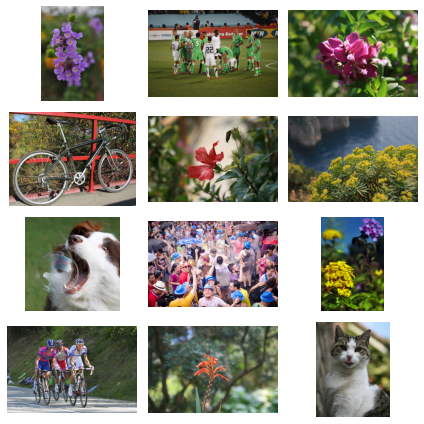

In [ ]:
path_query = './dados/flickr_map_test/flower.jpg'
# pegando patches
query_patches = get_patches(path_query, random_state, tam_patch, n_patches)
query_patches = np.array(query_patches, copy=False)
print('Patches extraídos')
print(query_patches.shape)

# redimensionando e aplicando pca
query_pca = modelo_PCA.transform(query_patches)
print('PCA executado')
print(query_pca.shape)

# obtem palavras visuais
y = kmeans_model.predict(query_pca)
# computa histograma como feature
query_feats,_ = np.histogram(y, bins=range(n_dic+1), density=True)

print('Features do BOF obtidas')

dists = []
for i in range(n_imgs):
    diq = np.sqrt(np.sum((img_feats[i]-query_feats)**2))
    dists.append(diq)

k = 12

# pega imagens mais proximas    
k_cbir = np.argsort(dists)[:k]

print('Distancias calculadas')
print('imagem mais similar =', k_cbir[0], ' distancia =', dists[k_cbir[0]])

import imageio
imgq = imageio.imread(path_query)

fig, axes = plt.subplots(4, 3, figsize=(6, 6))
ax = axes.ravel()
imgs = []
cats = np.zeros(k)
for i in range(k):
    imgs.append(imageio.imread(path_imgs+l_imgs[k_cbir[i]]))
    ax[i].imshow(imgs[i])
    ax[i].axis('off')
    cats[i] = int(l_imgs[k_cbir[i]][0])
fig.tight_layout()

tot_cat = 10
imgs_cat = np.sum(cats==6) 
recall = imgs_cat/tot_cat
print("Recall = %.4f" % (recall))
print("Total na categoria = %d" % (imgs_cat))

Patches extraídos
(1000, 507)
PCA executado
(1000, 10)
Features do BOF obtidas
Distancias calculadas
imagem mais similar = 57  distancia = 0.1674275962916508
Recall = 0.2727
Total na categoria = 3


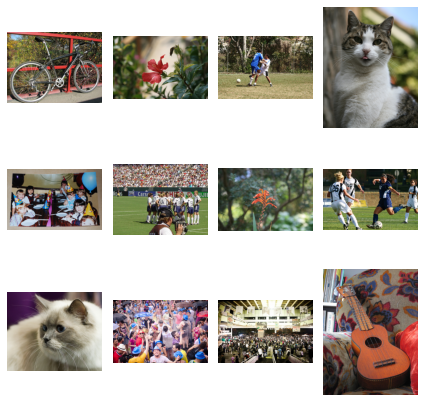

In [ ]:
path_query = './dados/flickr_map_test/football.jpg'
# pegando patches
query_patches = get_patches(path_query, random_state, tam_patch, n_patches)
query_patches = np.array(query_patches, copy=False)
print('Patches extraídos')
print(query_patches.shape)

# redimensionando e aplicando pca
query_pca = modelo_PCA.transform(query_patches)
print('PCA executado')
print(query_pca.shape)

# obtem palavras visuais
y = kmeans_model.predict(query_pca)
# computa histograma como feature
query_feats,_ = np.histogram(y, bins=range(n_dic+1), density=True)

print('Features do BOF obtidas')

dists = []
for i in range(n_imgs):
    diq = np.sqrt(np.sum((img_feats[i]-query_feats)**2))
    dists.append(diq)

k = 12
# pega imagens mais proximas    
k_cbir = np.argsort(dists)[:k]

print('Distancias calculadas')
print('imagem mais similar =', k_cbir[0], ' distancia =', dists[k_cbir[0]])

import imageio
imgq = imageio.imread(path_query)

fig, axes = plt.subplots(3, 4, figsize=(6, 6))
ax = axes.ravel()
imgs = []
cats = np.zeros(k)
for i in range(k):
    imgs.append(imageio.imread(path_imgs+l_imgs[k_cbir[i]]))
    ax[i].imshow(imgs[i])
    ax[i].axis('off')
    cats[i] = int(l_imgs[k_cbir[i]][0])
fig.tight_layout()

tot_cat = 11
imgs_cat = np.sum(cats==3) # categoria futebol = 3 
recall = imgs_cat/tot_cat
print("Recall = %.4f" % (recall))
print("Total na categoria = %d" % (imgs_cat))

### Exercício 9)
 
Execute o método Bag-of-Features estudado em aula, agora com os seguintes parâmetros:
* tamanho do patch = (13, 13)
* número de patches = 1000
* tamanho do dicionário = 50
* descritor base = LBP com raio 3, 24 pontos e 16 bins

Vamos usar a versão da função LBP que permite usar como parâmetros o número de pontos e raio.

Utilize imagem de consulta `football.jpg` e recupere as 12 imagens mais similares utilizando o modelo BoF aprendido. Qual a proporção de imagens da mesma categoria da consulta?

(a) 0<br>
(b) 9<br>
<font color='red'>(c) 4<br></font>
(d) 2<br>


In [ ]:
def lbp_features(img, points=8, radius=1, n_bins=10):
    # LBP opera em imagens de um só canal, aqui vamos converter 
    # RGB para escala de cinza usando o método Luminance
    img = np.array(img, dtype=np.float64, copy=False)
    if (len(img.shape) > 2):
        img = img[:,:,0]*0.3 + img[:,:,1]*0.59 + img[:,:,2]*0.11
    
    # normaliza a imagem para ter máximo = 255
    if (np.max(img) > 0):
        img = ((img/np.max(img))*255).astype(np.uint8)
    
    # aqui definimos o numero de pontos e o raio, padrao = 8, 1
    lbp = feature.local_binary_pattern(img.astype(np.uint8), points, radius, method="uniform")
    
    # lbp retorna um matriz com os códigos, então devemos extraír o histograma
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_bins+1), range=(0, n_bins))

    # normaliza o histograma
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    # return the histogram of Local Binary Patterns

    return hist

In [ ]:
# Parametros do BOF
tam_patch = (13, 13) # parametro
n_patches = 1000 # parametro
path_imgs = './dados/flickr_map_training/'
random_state = 1
# pega lista de arquivos no caminho
l_imgs = listdir(path_imgs)

# total de imagens
n_imgs = len(l_imgs)

# Extrai patches de cada imagem, de forma paralela para cada imagem
# retorna uma lista do mesmo tamanho do número de imagens
patch_arr = Parallel(n_jobs=-1)(delayed(get_patches)(path_imgs+arq_img, 
                                                    random_state,
                                                    tam_patch,
                                                    n_patches)
                                for arq_img in l_imgs)

print('Patches extraídos para criação do dicionário de features')
print('Total de imagens = ', len(patch_arr))
print('Tamanho de cada array de patches = ', patch_arr[0].shape)

# Criando matriz com todos os patches para aplicar PCA
patch_arr2 = np.array(patch_arr, copy=True)
patch_arr2 = patch_arr2.reshape((patch_arr2.shape[0] * patch_arr2.shape[1],
                               tam_patch[0],tam_patch[0],3))

print('Tamanho de cada array de patches = ', patch_arr2.shape)


Patches extraídos para criação do dicionário de features
Total de imagens =  80
Tamanho de cada array de patches =  (1000, 507)
Tamanho de cada array de patches =  (80000, 13, 13, 3)


In [ ]:
# obtendo features lbp para cada patch
patch_lbp = []
for pat in patch_arr2:
        f = lbp_features(pat,3,24,16)
        patch_lbp.append(f)

patch_lbp = np.array(patch_lbp, copy=False)

print('Total de instancias = ', len(patch_lbp), ' de tamanho = ', patch_lbp[0].shape[0])

print('Espaço de características LBP criado')

print('\tpatches = ', len(patch_lbp), ' de tamanho = ', patch_lbp[0].shape[0])

n_dic = 50 # parametro
random_state = 1

# Construindo o dicionário
kmeans_model = KMeans(n_clusters=n_dic, 
                      verbose=False, 
                      init='random',
                      random_state=random_state, 
                      n_init=3)
kmeans_model.fit(patch_lbp)

print('Dicionário aprendido')

img_feats = []

# para cada imagem
for i in range(n_imgs):
    # predicao para os n_patches de uma imagem
    y = kmeans_model.predict(patch_lbp[i*n_patches: (i*n_patches)+n_patches])

    # computa histograma e armazena no array de features
    hist_bof,_ = np.histogram(y, bins=range(n_dic+1), density=True)
    img_feats.append(hist_bof)

img_feats = np.array(img_feats, copy=False)
print('Número de imagens e features = ', img_feats.shape)

Total de instancias =  80000  de tamanho =  16
Espaço de características LBP criado
	patches =  80000  de tamanho =  16
Dicionário aprendido
Número de imagens e features =  (80, 50)


(1000, 507)
Patches extraídos
(1000, 13, 13, 3)
LBP executado
(1000, 16)
Features do BOF obtidas
Distancias calculadas
imagem mais similar = 36  distancia = 0.0
Recall = 0.3636
Total na categoria = 4


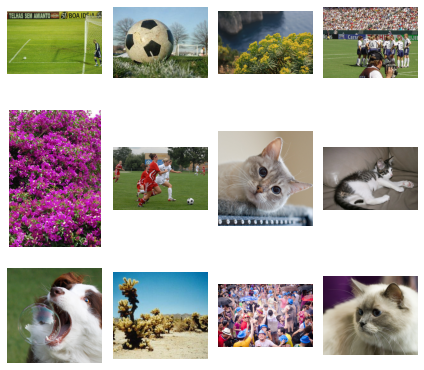

In [ ]:
path_query = './dados/flickr_map_test/football.jpg'
# pegando patches
query_patches = get_patches(path_query, random_state, tam_patch, n_patches)
query_patches = np.array(query_patches, copy=False)
print(query_patches.shape)

query_patches = query_patches.reshape((query_patches.shape[0],
                               tam_patch[0],tam_patch[0],3))

print('Patches extraídos')
print(query_patches.shape)

# redimensionando e aplicando pca
query_lbp = []
for pat in query_patches:
        f = lbp_features(pat,3,24,16)
        query_lbp.append(f)

query_lbp = np.array(query_lbp, copy=False)
print('LBP executado')
print(query_lbp.shape)

# obtem palavras visuais
y = kmeans_model.predict(query_lbp)
# computa histograma como feature
query_feats,_ = np.histogram(y, bins=range(n_dic+1), density=True)

print('Features do BOF obtidas')

dists = []
for i in range(n_imgs):
    diq = np.sqrt(np.sum((img_feats[i]-query_feats)**2))
    dists.append(diq)

k = 12
# pega imagens mais proximas    
k_cbir = np.argsort(dists)[:k]

print('Distancias calculadas')
print('imagem mais similar =', k_cbir[0], ' distancia =', dists[k_cbir[0]])

import imageio
imgq = imageio.imread(path_query)

fig, axes = plt.subplots(3, 4, figsize=(6, 6))
ax = axes.ravel()
imgs = []
cats = np.zeros(k)
for i in range(k):
    imgs.append(imageio.imread(path_imgs+l_imgs[k_cbir[i]]))
    ax[i].imshow(imgs[i])
    ax[i].axis('off')
    cats[i] = int(l_imgs[k_cbir[i]][0])
fig.tight_layout()

tot_cat = 11
imgs_cat = np.sum(cats==3) # categoria futebol = 3 
recall = imgs_cat/tot_cat
print("Recall = %.4f" % (recall))
print("Total na categoria = %d" % (imgs_cat))

### Exercício 10)
 
Execute o método Bag-of-Features para aprender features nas imagens da pasta `flickr_map_training` conforme código fornecido em aula, com os seguintes parâmetros:
* tamanho do patch = (11, 11)
* número de patches = 350
* descritor base = PCA com 16 componentes
* random_state = 1
* para o KMeans use random_state=1 e n_init=3

Vamos investigar a influência do tamanho do dicionário no modelo gerado com os seguintes valores: 10, 50, 100, 250 e 500. Utilize a imagem de teste `flickr_map_test\flower.jpg` para recuperar as 16 imagens mais similares no conjunto de treinamento (sabendo que há 10 imagens dessa categoria no conjunto de treinamento). Calcule a revocação, ou seja, a razão entre o total de imagens de flores retornadas na busca das 16 mais similares e o número total de imagens de flores que deveriam ter sido retornadas (10).

DICA: as imagens de flores tem nome iniciando com o número '6'.

Qual(is) tamanho(s) de dicionário resultam em maior valor de revocação?

(a) 50 e 100 <br>
<font color='red'>(b) 50<br></font>
(c) 100<br>
(d) 250 e 500<br>
(e) 10 e 50<br>

<font color='red'>Resposta</font>: *Ver código abaixo. Nem sempre um maior dicionário resulta em melhor performance. Em geral um dicionário muito pequeno não representa bem a base de dados, e um dicionário muito grande gera uma espécie de sobreajuste (overfitting) dos dados.*


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from os import listdir
from imageio import imread
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from joblib import Parallel, delayed


def get_patches(img_file, random_state, tam_patch=(11, 11), n_patches=250):
    '''Extração de subimagens a partir de uma imagem
       Parametros
           img_file: caminho para a imagem
           random_state: semente aleatoria
           tam_patches: tamanho de cada subimagem
           n_patches: numero maximo de subimagens a extrair
    '''

    img = imread(img_file)
    
    # Extrai subimagens
    patch = extract_patches_2d(img, 
                               patch_size=tam_patch,
                               max_patches=n_patches, 
                               random_state=random_state)
    
    return patch.reshape((n_patches, 
                          np.prod(tam_patch) * len(img.shape)))

In [ ]:
# Parametros do BOF
tam_patch = (11, 11)
n_patches = 350
pca_components = 16
path_imgs = './dados/flickr_map_training/'
random_state = 1
# pega lista de arquivos no caminho
l_imgs = listdir(path_imgs)

# total de imagens
n_imgs = len(l_imgs)

# Extrai patches de cada imagem, de forma paralela para cada imagem
# retorna uma lista do mesmo tamanho do número de imagens
patch_arr = Parallel(n_jobs=-1)(delayed(get_patches)(path_imgs+arq_img, 
                                                    random_state,
                                                    tam_patch,
                                                    n_patches)
                                for arq_img in l_imgs)

print('Patches extraídos para criação do dicionário de features')
print('Total de imagens = ', len(patch_arr))
print('Tamanho de cada array de patches = ', patch_arr[0].shape)


Patches extraídos para criação do dicionário de features
Total de imagens =  80
Tamanho de cada array de patches =  (350, 363)


In [ ]:
# Criando matriz com todos os patches para aplicar PCA
patch_arr2 = np.array(patch_arr, copy=True)
patch_arr2 = patch_arr2.reshape((patch_arr2.shape[0] * patch_arr2.shape[1],
                               patch_arr2.shape[2]))

# Construindo modelo de componentes principais
modelo_PCA = PCA(n_components=pca_components, random_state=random_state)
modelo_PCA.fit(patch_arr2)
patch_pca = modelo_PCA.transform(patch_arr2)

print('Espaço de características PCA criado')
print('\tpatches = ', len(patch_pca), ' de tamanho = ', patch_pca[0].shape[0])

Espaço de características PCA criado
	patches =  28000  de tamanho =  16


In [ ]:
search_dicts = [10, 50, 100, 250, 500]
random_state = 1

kmeans_d = []
# Construindo os dicionários
for n_dic in search_dicts:
    km = KMeans(n_clusters=n_dic, 
                      verbose=False, 
                      init='random',
                      random_state=random_state, 
                      n_init=3)
    km.fit(patch_pca)
    kmeans_d.append(km)
    print('K =', n_dic, end='; ')

print('> Dicionários aprendidos')

K = 10; K = 50; K = 100; K = 250; K = 500; > Dicionários aprendidos


In [ ]:
path_query = './dados/flickr_map_test/flower.jpg'
# pegando patches
query_patches = get_patches(path_query, random_state, tam_patch, n_patches)
query_patches = np.array(query_patches, copy=False)
print('Patches extraídos')
print(query_patches.shape)

# redimensionando e aplicando pca
query_pca = modelo_PCA.transform(query_patches)
print('PCA executado')
print(query_pca.shape)

d = 0
for n_dic in search_dicts:
    img_feats = []

    # para cada imagem
    for i in range(n_imgs):
        # predicao para os n_patches de uma imagem
        y = kmeans_d[d].predict(patch_pca[i*n_patches: (i*n_patches)+n_patches])

        # computa histograma e armazena no array de features
        hist_bof,_ = np.histogram(y, bins=range(n_dic+1), density=True)
        img_feats.append(hist_bof)

    # features dicionário atual
    img_feats = np.array(img_feats, copy=False)

    # obtem palavras visuais
    y = kmeans_d[d].predict(query_pca)
    d = d + 1
    
    # computa histograma como feature
    query_feats,_ = np.histogram(y, bins=range(n_dic+1), density=True)
    dists = []
    for i in range(n_imgs):
        diq = np.sqrt(np.sum((img_feats[i]-query_feats)**2))
        dists.append(diq)
    
    # pega imagens mais proximas    
    k = 16
    k_cbir = np.argsort(dists)[:k]
    cats = np.zeros(k)
    for i in range(k):
        cats[i] = int(l_imgs[k_cbir[i]][0])
    tot_cat = 10
    recall = np.sum(cats==6)/tot_cat
    print("N_dic = %d, Recall = %.4f" % (n_dic, recall))

Patches extraídos
(350, 363)
PCA executado
(350, 16)
N_dic = 10, Recall = 0.2000
N_dic = 50, Recall = 0.8000
N_dic = 100, Recall = 0.5000
N_dic = 250, Recall = 0.5000
N_dic = 500, Recall = 0.5000


## <span style="color:darkred">Dados não estruturados: sinais e imagens</span>
### <span style="color:darkred">Avaliação - com soluções</span>

In [ ]:
# carregando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Questão 1) **ANULADA**

É um exemplo de dado não estruturado do tipo sequencial:

(a) mapa de calor de temperaturas em uma região definida em uma grade igualmente espaçada, um valor por cada célula da grade<br>
(b) os valores de umidade relativa do ar coletados num mesmo momento em todas as cidades do estado de São Paulo, ordenadas da maior para a menor<br>
(c) a coluna idade de uma tabela de um banco de dados, ordenada de forma ascendente<br>
(d) os valores de uma tabela de base de dados relacional de compras contendo produto vendido, preço, data e hora da venda<br>
<font color='red'>(e) os valores por hora relativos ao montante (em reais) da receita de uma padaria nos meses de Janeiro a Abril de 2023, coletados e armazenados a cada hora de funcionamento do estabelecimento<br></font>

<font color='red'>Resposta</font>: <br>
*a. o mapa de calor de temperaturas em uma grade é um tipo de dado espacial e não sequencial,* <br>
*b. os valores de umidade coletados num mesmo momento não possui característica sequencial mesmo quando os ordenamos já que a sua ordenação explícita é meramente uma organização dos dados e não está relacionada à natureza da sua captura.*<br>
*c. a coluna idade, similar ao anterior, e ainda trata-se de dado estruturado por vir de uma tabela de banco de dados.* <br>
*d. os valores de compras, similar ao anterior por pertencer a uma base relacional, os dados são estruturados.* <br>
*e. os valores diários relativos à receita de uma padaria podem ser considerados sequenciais pois uma informação (receita de um determinado dia) é coletada sequencialmente após a outra.*<br>

**OBS: Estou de acordo com o que foi manifestado no fórum: a alternativa (e), apesar de claramente *sequencial* não é claramente não estruturada. Certamente é a que mais se aproxima de um dado ao mesmo tempo sequencial e não estruturado, já que os dados são mencionados como algo em conjunto (os valores em conjunto da série representam os dados), mas concordo que faltam informações para dar essa alternativa como não estruturada de forma inequívoca.**

### Questão 2)

Escolha a alternativa que descreva dados estruturados:

(a) áudio capturado em uma região de preservação ambiental para detectar espécies que circulam por aquele local<br>
<s>(b) índice BOVESPA coletado ao longo de 5 anos</s><br>
<font color='red'>(c) dados que compõem o endereço completo de um determinado cliente de uma empresa, disponível na tabela "cliente", composto dos campos "endereço" e "CEP"<br></font>
(d) uma imagem da face de uma pessoa armazenada numa base de dados de uma empresa e usada para verificação biométria<br>
(e) pixels de uma imagem obtida da folha de uma planta em um cultivo agrícola por uma câmera digital<br>

<font color='red'>Resposta</font>: *a. áudio representa um tipo de dado sequencial ou temporal e comumente armazenado em sua forma bruta*<br>
*b. o índice BOVESPA forma uma série temporal porém não está mencionado se é armazenado de forma estruturada ou não, alternativa inválida*<br>
*c. dados de endereço representam um conjunto estruturado de dados por estarem armazenados em base de dados e disponíveis para acesso direto por meio de um campo,*<br>
*d. a imagem da face, apesar de estar armazenada num banco de dados é usada para verificação biométrica, ou seja seus pixels são os dados efetivamente a serem usados, os quais são não estruturados espaciais,*<br>
*e. similar ao anterior, é um tipo de dado não estruturado espacial.*

### Questão 3)
 
Considere as seguintes afirmações sobre o método Bag-of-features:

I - o tamanho do dicionário ideal depende dos dados, sendo um parâmetro importante a ser otimizado no projeto de um Bag of Features<br>
II - pode-se utilizar qualquer conjunto de características como base para sua aplicação, inclusive os dados brutos<br>
III - utiliza sempre o PCA como subrotina para reduzir a dimensionalidade das características, sem o qual é inviável o processamento dos dados<br>
IV - possibilita definir a dimensionalidade do vetor de características final.<br>
V - é exclusivo para bases de dados de imagens<br>


São verdadeiras as afirmações:

(a) I e III<br>
(b) I, II e V<br>
<font color='red'>(c) I, II e IV<br></font>
(d) II, III e IV<br>
(e) II, III, IV e V<br>


<font color='red'>Resposta</font>: *I é verdadeira dicionários muito pequenos podem ser insuficientes para representar os dados, e dicionários muito grandes gerar desempenho baixo pela redundância, sendo necessário um estudo de seu tamanho ideal; II é verdadeira: qualquer conjunto de características extraídas pode ser utilizada; III é falsa pois o PCA não é necessário nesse framework, apesar de poder ser utilizado como parte das etapas; IV é verdadeira pois o tamanho do dicionário define o tamanho do vetor de características final; V falsa, pois podemos utilizar também para texto e outros dados não estruturados;*

### Questão 4)

Carregue os dados do arquivo `pollution_ds.csv` utilizando o comando `pd.read_csv()`

Esse dataframe possui 4 colunas (X, Y, Z, W) relativas à medição de dióxido de sulfuro em 4 localizações. Foram feitas medições durante 2 dias a cada 5 minutos em diferentes posições de uma cidade.

Queremos identificar qual das localizações entre: X, Z e W mais se assemelha à Y. Para isso, extraia um vetor de características (para cada sinal) composto de 3 valores:
* Entropia da energia (com 8 blocos)
* Entropia espectral (com 8 blocos)
* Dispersão espectral (considere frequência = 0.5Hz)

Compute a distância Euclidiana entre os vetores de características computados e identifique qual o sinal mais próximo de Y. Marque a alternativa indicando qual das características computadas tem a MAIOR distância com relação ao sinal Y e o sinal mais próximo encontrado.

(a) Mais próxima: X; característica mais distante: Dispersão espectral<br>
<font color='red'>(b) Mais próxima: X; característica mais distante: Entropia da energia<br></font>
(c) Mais próxima: Z; característica mais distante: Entropia da energia<br>
(d) Mais próxima: Z; característica mais distante: Entropia espectral<br>
(e) Mais próxima: W; característica mais distante: Entropia espectral<br>

<font color='red'>Resposta</font>: *ver código e resultados abaixo*

In [ ]:
data = pd.read_csv('./dados/pollution_ds.csv',)
data.head(3)

X    Y   Z   W
0  67  100  76  79
1  67  103  74  84
2  68  104  73  84

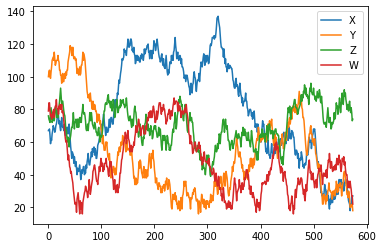

In [ ]:
for var in data:
    plt.plot(data[var], label=var)
    
plt.legend()

In [ ]:
def entropia_energia(sinal, n_blocos=10):
    '''Entropia da energia do sinal'''
    # energia total 
    energia_sinal = np.sum(sinal ** 2)
    M = len(sinal)
    
    # calcula janelas dentro do sinal
    M_janelas = int(np.floor(M / n_blocos))
    # verifica se tamanho dos blocos 
    # é multiplo do tamanho do sinal
    if M != M_janelas * n_blocos:
        sinal = sinal[0:M_janelas * n_blocos]

    # monta matriz [M_janelas x n_blocos]
    janelas = sinal.reshape(M_janelas, n_blocos, order='F').copy()
    
    # Computa energias de cada janela (normalizada pela do sinal)
    e_janelas = np.sum(janelas ** 2, axis=0) / (energia_sinal + 0.0001)
    #print(e_janelas)

    # Computa entropia entre energias das janelas
    entropia = -np.sum(e_janelas * np.log2(e_janelas + 0.0001))
    return entropia

def entropia_espectral(sinal, n_blocos=16):
    """Computes the spectral entropy"""
    
    fft_abs = np.abs(np.fft.fft(sinal))
    
    entropia_esp = entropia_energia(fft_abs, n_blocos=n_blocos)

    return entropia_esp

def centroide_dispersao_espectral(sinal, tx_amostragem):
    '''Calcula o centro de massa e dispersão do espectro do sinal'''
    
    fft_abs = np.abs( np.fft.fft(sinal) )
    N = len(fft_abs)
    
    # indices de frequencia
    ind = (np.arange(1, N+1)) * (tx_amostragem / (2.0*N))

    # calcula a distribuicao do espectro normalizando para soma unitária
    Xt = fft_abs.copy()
    Xt = Xt / Xt.max()
    NUM = np.sum(ind * Xt)
    DEN = np.sum(Xt) + 0.0001 

    # Centroide:
    centroide = (NUM / DEN)

    # Dispersão:
    dispersao = np.sqrt(np.sum(((ind - centroide) ** 2) * Xt) / DEN)

    # Normalizacao do centroide
    centroide = centroide / (tx_amostragem / 2.0)
   
    # Normalizando:
    dispersao = dispersao / (tx_amostragem / 2.0)

    return centroide, dispersao

In [ ]:
dic_lab = {0:'x', 1:'y', 2:'z', 3:'w'}
dic_fea = {0:'entropia energia', 1:'entropia espectral', 2:'dispersão espectral'}

ref = 1 # y

features = []
for var in data: 
    sig = data[var].values
    f1 = entropia_energia(np.array(sig),8)
    f2 = entropia_espectral(np.array(sig),8)
    _,f3 = centroide_dispersao_espectral(np.array(sig),0.5)
    features.append([f1, f2, f3])

features= np.array(features)

dists = []
for i in [0,1,2,3]:
    if i == ref:
        dists.append(np.nan)
    else:
        disti = np.sqrt(np.sum((features[ref]-features[i])**2))
        print("Distância entre Y e %s = %.5f" % (dic_lab[i],disti))
        dists.append(disti)

mindist = np.argmin(dists)

print('\nFeatures e distancia:')
print('Y', features[ref])
print(dic_lab[mindist], features[mindist])
print('-', np.abs(features[ref]-features[mindist]))

print("\nY está mais próximo de", dic_lab[mindist])
print("Feature menos similar (mais diferente) =", dic_fea[np.argmax(np.abs((features[ref]-features[mindist])**2))])

Distância entre Y e x = 0.22229
Distância entre Y e z = 0.46542
Distância entre Y e w = 0.24409

Features e distancia:
Y [2.51210517 0.22803375 0.43003297]
z [2.94399378 0.05644012 0.40460962]
- [0.43188861 0.17159362 0.02542335]

Y está mais próximo de z
Feature menos similar (mais diferente) = entropia energia


### Questão 5)

Carrege as imagens da base de dados `lfw_subset` contida na biblioteca `skimage`, conforme código abaixo. Considere apenas as 100 primeiras imagens dessa base de dados (referente a faces).

Vamos utilizar o método LBP (com implementação conforme visto nos exercícios e replicada abaixo) e a distância L1 para comparar faces dessa base de dados.

Utilizando como imagem de consulta a imagem de índice 51 (quinquagésima segunda imagem) da lista, e os seguintes parâmetros para o LBP:
* points = 16
* radius = 2.0
* n_bins = 48

Retorne as 5 imagens mais similares (excluindo a de consulta). Quais são os índices dessas imagens?

(a) 44, 49, 47, 56, 37<br>
(b) 56,  0,  8, 85, 37<br>
<font color='red'>(c) 67, 48, 47, 44, 63</font><br>
(d) 67, 49, 47, 56, 37<br>
(e) 44,  0, 47, 56, 63<br>

<font color='red'>Resposta</font>: *ver código abaixo*

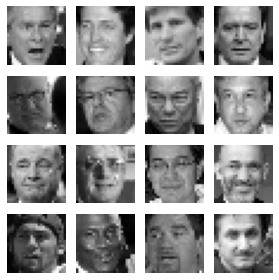

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
from skimage import feature
from skimage import data
fig, axes = plt.subplots(4, 4, figsize=(4, 4))
ax = axes.ravel()
imgs = data.lfw_subset()
for i in range(16):
    ax[i].imshow(imgs[i], cmap=plt.cm.gray)
    ax[i].axis('off')
fig.tight_layout()

In [ ]:
def lbp_features(img, points=8, radius=1, n_bins=10):
    # LBP opera em imagens de um só canal, aqui vamos converter 
    # RGB para escala de cinza usando o método Luminance
    img = np.array(img, dtype=np.float64, copy=False)
    if (len(img.shape) > 2):
        img = img[:,:,0]*0.3 + img[:,:,1]*0.59 + img[:,:,2]*0.11

    # normaliza a imagem para ter máximo = 255
    if (np.max(img) > 0):
        img = ((img/np.max(img))*255).astype(np.uint8)

    # aqui definimos o numero de pontos e o raio, padrao = 8, 1
    lbp = feature.local_binary_pattern(img.astype(np.uint8), points, radius, method="uniform")
    
    # lbp retorna um matriz com os códigos, então devemos extraír o histograma
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_bins+1), range=(0, n_bins))

    # normaliza o histograma
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    # return the histogram of Local Binary Patterns

    return hist

Índices:  [67 48 47 44 63]
Distâncias:  [0.12 0.12 0.13 0.13 0.14]


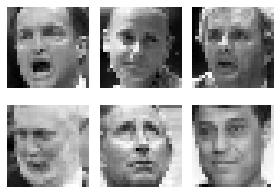

In [ ]:
def L1_dist(a, b):
    return np.sum(np.abs(((a.astype(float))-(b.astype(float)))))

query = 51
points1 = 16
radius1 = 2.0
n_bins1 = 48
lbp_query = lbp_features(imgs[query], points1, radius1, n_bins1)

dists = np.ones(101)
indices = np.arange(0,101)
indices = np.delete(indices, query, 0)
for i in range(101):
    lbp_i = lbp_features(imgs[i], points1, radius1, n_bins1)
    dists[i] = L1_dist(lbp_query, lbp_i)    

k = 6
# pega imagens mais proximas    
k_cbir = np.argsort(dists)[:k]

# exibe 5 mais próximas
print("Índices: ", k_cbir[1:])
print("Distâncias: ", np.round(dists[k_cbir][1:],2))

fig, axes = plt.subplots(2, (k//2), figsize=(k//1.5, k//2))
ax = axes.ravel()
imgs = data.lfw_subset()
for i in range(k):
    ax[i].imshow(imgs[k_cbir[i]], cmap=plt.cm.gray)
    ax[i].axis('off')
fig.tight_layout()

## <font color="blue"> Web Scraping </font>

### Conteúdo
- APIs
    - JSON
    - HTML
- Request
- Parsing HTML
    - BeautifulSoup

## <font color='blue'>API (Application Programming Interface)</font>

Uma **API** (Application Programming Interface) é uma maneira organizada de fazer diferentes programas se comunicarem.
Um tipo particular de API são os **REST APIs** (Representational State Transfer), que definem um conjunto de regras que devem ser respeitadas na construção de um serviço Web.

As REST APIs possuem um conjunto de métodos de comunicação, por exemplo GET, PUT, PATCH, DELETE, dentre outros. O método GET, por exemplo, é utilizado para extrair informações de uma página Web, enquanto o método PUT é empregado para enviar informações para a página.

Quando acessamos uma página Web utilizando um navegado, que chamaremos de _browser_, uma comunicação é estabelecida com a API do serviço Web de onde a página está armazenada. A API envia informações para o browser, que interpreta e processa tais informações a fim de apresentá-las na janela principal do browser. Ou seja, toda vez que navegamos na Web estamos nos comunicando com as APIs dos servidores onde o conteúdo que estamos buscando está armazendo.

$$
\fbox{Browser}
\begin{matrix}
\xleftarrow[\text{API}]{} 
\xrightarrow{\text{API}}\\ 
\end{matrix}
\fbox{Conteúdo}
$$

A comunicação com APIs de serviços Web pode também ser feita sem o uso de um browser, necessitando para isso ferramentas capazes de realizar requisições a um serviço Web.

O Python possui alguns pacotes, como o <font color='yellow'>request</font>, que implementam métodos de comunicação seguindo o protocolo **REST**.

Antes de estudarmos os protocólos de comunicação, vamos entender formatos básicos de conteúdo disponibilizados em páginas Web, como HTML e JSON.  

### HTML
HTML é a linguagem básica empregada na construção de páginas Web. 
A idéia do HTML é marcar o conteúdo que será apresentado na página para que cada parte do conteúdo tenha "propriedades" específicas e siga uma estrutura bem definida. O browser interpreta as marcações e apresenta o conteúdo seguindo as marcações.

Por exemplo, o código HTML abaixo

```html
<!DOCTYPE html>
<html>
    <body>

        <h1 class="titulo" id=>Título aqui</h1>
        
        <p class="paragrafo1">Isso é um parágrafo</p>
        <p class="paragrafo2">Isso é outro parágrafo</p>
        
        
        <!-- Aqui em baixo temos uma lista (e isso é um comentário) -->
        <ul>
            <li>Elemento 1</li>
            <li>Elemento 2</li>
            <li>Elemento 3</li>
        </ul>
            
        
        <a href="https://icmc.usp.br">Link</a>

    </body>
</html>
```
resulta na seguinte visualização:

---
## Título aqui
Isso é um parágrafo

Isso é outro parágrafo

    - Elemento 1
    - Elemento 2
    - Elemento 3

[Link](https://icmc.usp.br)

---
Cada trecho do código é marcado para que seja interpretado e renderizado pelo browser quando a página é acessada. Em outras palavras, quando acessamos uma página Web, o browser realiza um "GET" no servidor, o qual retorna o arquivo HTML que é então renderizado pelo browser no seu dispositivo.  

O importante no nosso contexto é entender que todas as partes do HTLM são marcadas por rótulos que indicam o início e fim de alguma informação. 

### JSON
JSON (JavaScript Object Notation) é um formato muito empregado para estruturar e descrever conteúdos. 
Muitas Web APIs retornam conteúdos no formato JSON. 

De forma simplificada, um arquivo no formato JSON estrutura a informação como um dicionário, cujos valores pondem ser `string`, `int`, `float`, `boolean`, uma lista ou outro dicionário. Por exemplo:
```JSON
{
  'Name': 'Gustavo',
  'login': 4,
  'GroupLeader': true,
  'GroupMember': [112, 37],
  'GroupProperty': [
    {
      'Name': 'DATA',
      'Type': 'Data Science'
    }
  ]
}
```

Python consegue interpretar um arquivo JSON convertendo-o para um dicionário.

##  <font color='blue'>Request</font>
Quando utilizamos um browser para acessar uma página Web, o browser se encarrega da comunição com a API. Porém, a comunicação com uma  página Web também pode ser feita utilizando um pacote dedicado a esta tarefa. Existem alguns pacotes disponíveis no Python para este fim, sendo o <font color='yellow'>requests</font> um dos mais utilizados.

O pacote <font color='blue'>requests</font> permite enviar requisições HTTP/1.1 a um serviço Web.<br> 
Detalhes sobre requisições HTTP/1.1 podem ser encontradas [aqui](https://www.w3.org/Protocols/rfc2616/rfc2616-sec9.html) e [aqui](https://requests.readthedocs.io/en/master/)

Especificamente, o pacote <font color='blue'>requests</font> disponibiliza um conjunto de métodos para enviar requisições, como por exemplo: 

- <font color='blue'>get</font>
- <font color='blue'>post</font>
- <font color='blue'>put</font>
- <font color='blue'>head</font>


<font color='blue'>get</font>:
- recupera informação disponível na página endereçada. O conteúdo pode ser:
    - HTML
    - JSON
    - dados "crus"
    - ...

<font color='blue'>post</font>:
- envia uma menssagem a uma página para que seja publicada, addicionando a mensagem enviada ao conteúdo já existente na página.

<font color='blue'>put</font>:
- envia um conteúdo a um serviço Web para que seja armazenado
- a diferença fundamental entre <font color='blue'>post</font> e <font color='blue'>put</font> é que este último substitui um conteúdo existente pelo novo que está sendo enviado, enquanto que o  <font color='blue'>post</font> addiciona o conteúdo enviado ao já existente.

<font color='blue'>head</font>
- utilizado para obter informação sobre o conteúdo de uma página, sem que o conteúdo seja transferido.

In [ ]:
import requests as rq

In [ ]:
# utilizando 'head' para obter informações sobre a página
h = rq.head('https://pt.wikipedia.org/wiki/COVID-19')
print(h.headers)

{'date': 'Tue, 06 Jun 2023 13:15:31 GMT', 'vary': 'Accept-Encoding,Cookie,Authorization', 'server': 'ATS/9.1.4', 'x-content-type-options': 'nosniff', 'content-language': 'pt', 'last-modified': 'Sat, 27 May 2023 03:27:22 GMT', 'content-type': 'text/html; charset=UTF-8', 'content-encoding': 'gzip', 'age': '44710', 'x-cache': 'cp1081 hit, cp1085 hit/9', 'x-cache-status': 'hit-front', 'server-timing': 'cache;desc="hit-front", host;desc="cp1085"', 'strict-transport-security': 'max-age=106384710; includeSubDomains; preload', 'report-to': '{ "group": "wm_nel", "max_age": 604800, "endpoints": [{ "url": "https://intake-logging.wikimedia.org/v1/events?stream=w3c.reportingapi.network_error&schema_uri=/w3c/reportingapi/network_error/1.0.0" }] }', 'nel': '{ "report_to": "wm_nel", "max_age": 604800, "failure_fraction": 0.05, "success_fraction": 0.0}', 'set-cookie': 'WMF-Last-Access=07-Jun-2023;Path=/;HttpOnly;secure;Expires=Sun, 09 Jul 2023 00:00:00 GMT, WMF-Last-Access-Global=07-Jun-2023;Path=/;Dom

O atributo <font color='blue'>headers</font> do objeto retornado pelo <font color='blue'>rq.head</font> é um dicionário. As chaves do dicionário são rótulos que identificam informações da página. Por exemplo: 'Date' (data de criação da página), 'Content-Type' (tipo de conteúdo retornado pela página, como HTML, JSON, etc.) e 'Content-language' (língua do conteúdo da página).

In [ ]:
# note que o conteúdo do atributo 'headers' é um dicionário, assim,
# podemos acessar o conteúdo associado a cada uma das chaves.
print('O tipo de conteúdo da página é: ',h.headers['Content-Type'])
print('Página atualizada em:',h.headers['Last-Modified'])

O tipo de conteúdo da página é:  text/html; charset=UTF-8
Página atualizada em: Sat, 27 May 2023 03:27:22 GMT


O exemplo abaixo utiliza o método <font color='blue'>get</font> para obter o conteúdo de uma página. O método <font color='blue'>get</font> retorna um objeto que possui diversos atributos. Dois atributos de particular importância são:

- _status\_code_: contém um código que indica se a requisição foi bem sucedida ou não
- _text_: string contendo o conteúdo da página. A string pode ser um conteúdo HTML, JSON, dentre outros.

Vejamos abaixo exemplos do uso do <font color='blue'>requests</font>.

In [ ]:
# utilizando o 'get' para pegar o conteúdo da página
c = rq.get('https://pt.wikipedia.org/wiki/COVID-19')

In [ ]:
# o método 'get' retorna um objeto que contém muitas informações sobre 
# o processo de requisição e o conteúdo retornado

# status permite saber se a requisição foi bem sucedida
# o código 200 indica que a requisição foi bem sucedida
# o código 404 indica que a requisição falhou
# outros códigos são utilizados para outros fins
if c.status_code == 200:
    print(c.status_code,' Success!')
elif c.status_code == 404:
    print(c.status_code,' Not Found')

200  Success!


In [ ]:
# para acessar o conteúdo como uma string utiliza-se o atributo 'text'
print(type(c.text))  # o tipo da variável é 'string'
print(c.text)        # conteúdo da página. É evidente a estrutura de HTML

<class 'str'>
<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" lang="pt" dir="ltr">
<head>
<meta charset="UTF-8">
<title>COVID-19 – Wikipédia, a enciclopédia livre</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";(function(){var cookie=document.cookie.mat

In [ ]:
# fazendo um request no repositório do github

# utilizaremos o head para descobrirmos o tipo de conteúdo retornado pelo API do github
hgit = rq.head('https://api.github.com/search/repositories')

# O conteúdo retornado pelo API do servidor github é do tipo JSON
print('Tipo do conteudo: ',hgit.headers['content-type'])

Tipo do conteudo:  application/json; charset=utf-8


In [ ]:
# Obtendo o conteúdo 
cgit = rq.get('https://api.github.com/search/repositories')

print('Status do request: ',cgit.status_code)
# o codigo 422 significa que a requisição não foi feita corretamente
# o problema é que a API do github espera que uma busca por informacoes
# específicas seja feita

Status do request:  422


In [ ]:
# para realizar um request corretamente no github, precisamos enviar 
# parâmtros indiciando o que gostariamos de buscar

# o parâmetro {'q': 'language:python'} corresponde a um dicionário
# 'q' significa que estamos fazendo uma 'query'
# 'language:python' significa que estamos buscando páginas
# com conteúdo na linguagem python
cgit = rq.get('https://api.github.com/search/repositories',
                params={'q': 'requests+language:python'})

print('Status do request: ',cgit.status_code) # busca bem sucedida

Status do request:  200


In [ ]:
# sabemos que o conteúdo retornado pela API do github são arquivos JSON

print(cgit.text)

{"total_count":20771,"incomplete_results":false,"items":[{"id":4290214,"node_id":"MDEwOlJlcG9zaXRvcnk0MjkwMjE0","name":"grequests","full_name":"spyoungtech/grequests","private":false,"owner":{"login":"spyoungtech","id":15212758,"node_id":"MDQ6VXNlcjE1MjEyNzU4","avatar_url":"https://avatars.githubusercontent.com/u/15212758?v=4","gravatar_id":"","url":"https://api.github.com/users/spyoungtech","html_url":"https://github.com/spyoungtech","followers_url":"https://api.github.com/users/spyoungtech/followers","following_url":"https://api.github.com/users/spyoungtech/following{/other_user}","gists_url":"https://api.github.com/users/spyoungtech/gists{/gist_id}","starred_url":"https://api.github.com/users/spyoungtech/starred{/owner}{/repo}","subscriptions_url":"https://api.github.com/users/spyoungtech/subscriptions","organizations_url":"https://api.github.com/users/spyoungtech/orgs","repos_url":"https://api.github.com/users/spyoungtech/repos","events_url":"https://api.github.com/users/spyoungtec

In [ ]:
# request possui um método para transformar o 
# conteúdo textual (a string armazenda no atributo 'text') em um dicionário

dic_git = cgit.json()  # transforma o contúdo armazenado em cgit.text em um dicionário
print(dic_git.keys())  # note que o dicionário possui 3 chaves

# o valor da chave 'total_count' diz quantas páginas no github armazenam 
# conteúdo relacionado à linguagem Python
print('Numero de páginas com conteúdo relacionado com python',dic_git['total_count'])

dict_keys(['total_count', 'incomplete_results', 'items'])
Numero de páginas com conteúdo relacionado com python 20771


In [ ]:
print(type(dic_git['items'])) # é uma lista

print(type(dic_git['items'][0])) # os elementos da lista são dicionários

print(dic_git['items'][0].keys()) # note que o dicionário correspondente ao primeiro elemento
                                  # da lista contém informações sobre um repositorio especifico


<class 'list'>
<class 'dict'>
dict_keys(['id', 'node_id', 'name', 'full_name', 'private', 'owner', 'html_url', 'description', 'fork', 'url', 'forks_url', 'keys_url', 'collaborators_url', 'teams_url', 'hooks_url', 'issue_events_url', 'events_url', 'assignees_url', 'branches_url', 'tags_url', 'blobs_url', 'git_tags_url', 'git_refs_url', 'trees_url', 'statuses_url', 'languages_url', 'stargazers_url', 'contributors_url', 'subscribers_url', 'subscription_url', 'commits_url', 'git_commits_url', 'comments_url', 'issue_comment_url', 'contents_url', 'compare_url', 'merges_url', 'archive_url', 'downloads_url', 'issues_url', 'pulls_url', 'milestones_url', 'notifications_url', 'labels_url', 'releases_url', 'deployments_url', 'created_at', 'updated_at', 'pushed_at', 'git_url', 'ssh_url', 'clone_url', 'svn_url', 'homepage', 'size', 'stargazers_count', 'watchers_count', 'language', 'has_issues', 'has_projects', 'has_downloads', 'has_wiki', 'has_pages', 'has_discussions', 'forks_count', 'mirror_url', 

In [ ]:
# obtendo informações do repositório correspondente a primeira entrada da lista    
pag0 = dic_git['items'][0]

print(pag0['full_name'])
print(pag0['html_url'])
print(pag0['private'])

spyoungtech/grequests
https://github.com/spyoungtech/grequests
False


## <font color='blue'>Parsing HTML</font>
Enquanto extrair informações de um arquivo JSON torna-se bastante fácil após a conversão para um dicionário do Python, o mesmo não é verdade para arquivos HTML, que precisam ser interpretados por um _parser_ a fim de que informações possam ser extraídas de forma limpa e organizada.

O _parsing_ de uma página HTML consiste em separar os componentes da página de acordo com as marcações empregadas pelo HTML, facilitando a extração do conteúdo compreendido entre marcações. O pacote Python mais utilizado para realizar o _parsing_ de arquivos HTML é o <font color='blue'>BeautifulSoup</font>.

### BeautifulSoup
O pacote <font color='blue'>BeautifulSoup</font> possui um conjunto de métodos para encontrar conteúdo com base nas marcações de documentos HTML. Por exemplo:

- <font color='blue'>find</font>: encontra a primeira ocorrência de uma dada marcação
- <font color='blue'>find_all</font>: encontra todas as ocorrências de uma dada marcação

Existem ainda mecanismos para buscar por atributos específicos no documento HTML. Os exemplos a seguir ilustram algumas das funcionalidades do <font color='blue'>BeautifulSoup</font>. Mais detalhes podem ser encontrados [aqui](http://www.compjour.org/warmups/govt-text-releases/intro-to-bs4-lxml-parsing-wh-press-briefings/)

Uma questão importante é como saber que marcações procurar. Infelizmente, não existe uma solução geral para esta questão. Uma alternativa, quando a especificação HTML de uma página não é conhecida, é acessar a página de interesse com um browser e visualizar o código "fonte" da página, o que possibilita identificar marcadores e atributos.

Vejamos utilizar como exemplo a página de eventos do ICMC 

[https://icmc.usp.br/eventos](https://icmc.usp.br/eventos)


In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
# Acessando a página de eventos  
eventos = requests.get("https://icmc.usp.br/eventos")
print(eventos.text)

<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="pt-br" lang="pt-br" >
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">
   
        <!-- no cache -->
        <meta http-equiv="cache-control" content="max-age=0" />
        <meta http-equiv="cache-control" content="no-cache" />
        <meta http-equiv="expires" content="0" />
        <meta http-equiv="expires" content="Tue, 01 Jan 1980 1:00:00 GMT" />
        <meta http-equiv="pragma" content="no-cache" />
  
        <meta name="viewport" content="width=device-width, initial-scale=1">
        <meta name="description" content="ICMC - Instituto de Ciências Matemáticas e de Computação. Ensino, Graduação, Pós-Graduação, Pesquisa, Cultura e Extensão. Eventos">
        <meta name="author" content="Instituto de Ciências Matemáticas e de Computação">
        <meta property="og:image" content="http://www.icmc.usp.br/imprensa/_thumb1/icone-noticia.jpg" />        <link rel=

In [ ]:

soup = BeautifulSoup(eventos.text, 'html.parser') # converte a string retornada para um formato HTML

Inspecionando manualmente o fonte da página de eventos do ICMC, identificamos que cada evento está entre marcadores 'h4'. Utiliando o método <font color='yellow'>find_all</font> com o marcador 'h4', recuperamos a descrição do evento.

In [ ]:
h4=soup.find_all('h4')

for h in h4:
    print(h)
    print(5*'--')

<h4>
                        Veja também                        <div class="icon-veja-tambem pull-right">
<input id="icone-do-menu-lateral" type="hidden" value="0"/>
<span class="caret"></span>
</div>
</h4>
----------
<h4>Olimpíada Brasileira de Robótica 2023</h4>
----------
<h4>Prêmio Gutierrez</h4>
----------
<h4>Workshop de Topologia Algébrica e Aplicações</h4>
----------
<h4>Prática Docente no contexto da Educação Especial e Inclusiva</h4>
----------
<h4>Práticas com Smartphones - Módulo Avançado</h4>
----------
<h4>Introdução ao Uso de Ferramentas de Inteligência Artificial para Automatização de Tarefas em Microbiologia</h4>
----------
<h4>Meninas Programadoras Python: Introdução à Programação</h4>
----------
<h4>Latin-American Symposium on Dependable and Secure Computing</h4>
----------


Na verdade, os marcadores 'h4' que de fato interessam, ou seja, aqueles marcando os eventos que ocorrem no ICMC, estão dentro do marcador ``div class="noticia-home-titulo"``. Desta forma, podemos buscar por marcadores 'h4' que estão dentro deste outro marcador.

In [ ]:
for evento in soup('div', {'class': 'noticia-home-titulo'}):
    titulo = evento.find('h4').text
    data = evento.find('p').text
    print(f'{titulo} ==> {data}')
    print(5*'--')

Olimpíada Brasileira de Robótica 2023 ==> De 24/06/2023 à 25/06/2023
----------
Prêmio Gutierrez ==> 25/09/2023
----------
Workshop de Topologia Algébrica e Aplicações ==> De 08/11/2023 à 10/11/2023
----------
Prática Docente no contexto da Educação Especial e Inclusiva ==> 13/06/2023
----------
Práticas com Smartphones - Módulo Avançado ==> De 15/03/2023 à 28/06/2023
----------
Introdução ao Uso de Ferramentas de Inteligência Artificial para Automatização de Tarefas em Microbiologia ==> De 06/05/2023 à 10/06/2023
----------
Meninas Programadoras Python: Introdução à Programação ==> De 29/07/2023 à 21/10/2023
----------
Latin-American Symposium on Dependable and Secure Computing ==> De 02/05/2023 à 20/10/2023
----------


Podemos ainda recuperar outras informações contidas em outros marcadores. Veja exemplos abaixo.

In [ ]:
for evento in soup('div', {'class': "col-xs-12 col-sm-6 col-lg-3 quadro"}):
    titulo = evento.find('h4').text
    data = evento.find('p').text
    url = evento.find('a').get('href')
    img = evento.find('img').get('src')
    print(img)
    print(url)
    print(f'{titulo} ==> {data}')
    print(5*'--')

/imprensa/_thumb1/icone-banca.jpg
/eventos/6139-olimpiada-brasileira-de-robotica-2023
Olimpíada Brasileira de Robótica 2023 ==> De 24/06/2023 à 25/06/2023
----------
/imprensa/_thumb1/icone-banca.jpg
/eventos/6118-premio-gutierrez
Prêmio Gutierrez ==> 25/09/2023
----------
/imprensa/_thumb1/icone-banca.jpg
/eventos/6135-workshop-de-topologia-algebrica-e-aplicacoes
Workshop de Topologia Algébrica e Aplicações ==> De 08/11/2023 à 10/11/2023
----------
/imprensa/_thumb1/icone-banca.jpg
/eventos/6156-coloquio-da-licenciatura-em-matematica
Prática Docente no contexto da Educação Especial e Inclusiva ==> 13/06/2023
----------
/imprensa/_thumb1/icone-banca.jpg
/eventos/6023-praticas-com-smartphones-modulo-avancado
Práticas com Smartphones - Módulo Avançado ==> De 15/03/2023 à 28/06/2023
----------
/imprensa/_thumb1/icone-banca.jpg
/eventos/6021-introducao-ao-uso-de-ferramentas-de-inteligencia-artificial-para-automatizacao-de-tarefas-em-microbiologia
Introdução ao Uso de Ferramentas de Intelig

## <font color="blue"> Web Scraping </font>
### <font color="blue">Solução dos Exercícios </font> 

In [ ]:
import requests as rq

### Exercício 1)
Considere a página do Wikipedia [https://en.wikipedia.org/robots.txt](https://en.wikipedia.org/robots.txt).
Faça uma requisição para pegar o conteúdo de tal página e:
1. verifique se a requisição foi bem sucedida
2. visualize o tipo de dado retornado e note que é um texto pleno (não é HTML nem JSON)
3. visualize o conteúdo

In [ ]:
r = rq.get('https://en.wikipedia.org/robots.txt') # fazendo a requisição


print(r.status_code)  # verificando se a requisição foi bem sucedida

print(r.headers['Content-Type'])  # verificando o tipo de dado 
                                  # retornado pelo request

print(r.text)  # verificando o conteúdo retornado

200
text/plain; charset=utf-8
﻿# robots.txt for http://www.wikipedia.org/ and friends
#
# Please note: There are a lot of pages on this site, and there are
# some misbehaved spiders out there that go _way_ too fast. If you're
# irresponsible, your access to the site may be blocked.
#

# Observed spamming large amounts of https://en.wikipedia.org/?curid=NNNNNN
# and ignoring 429 ratelimit responses, claims to respect robots:
# http://mj12bot.com/
User-agent: MJ12bot
Disallow: /

# advertising-related bots:
User-agent: Mediapartners-Google*
Disallow: /

# Wikipedia work bots:
User-agent: IsraBot
Disallow:

User-agent: Orthogaffe
Disallow:

# Crawlers that are kind enough to obey, but which we'd rather not have
# unless they're feeding search engines.
User-agent: UbiCrawler
Disallow: /

User-agent: DOC
Disallow: /

User-agent: Zao
Disallow: /

# Some bots are known to be trouble, particularly those designed to copy
# entire sites. Please obey robots.txt.
User-agent: sitecheck.internetseer

### Exercício 2)
Considere o site de dados abertos da cidade de São Paulo [http://dados.prefeitura.sp.gov.br/pt_PT/](http://dados.prefeitura.sp.gov.br/pt_PT/).

Faça uma requisição para pegar o conteúdo da página inicial e verifique se a requisição foi bem sucedida. Verifique que o tipo de dado retornado é um conteúdo HTML.

In [ ]:
r = rq.get('http://dados.prefeitura.sp.gov.br/pt_PT/')

print(r.status_code)
print(r.headers)
print('\n\nTipo de conteudo:',r.headers['Content-Type'])

200
{'Date': 'Wed, 07 Jun 2023 02:15:14 GMT', 'Cache-Control': 'private', 'Keep-Alive': 'timeout=15, max=100', 'Connection': 'Keep-Alive', 'Content-Type': 'text/html; charset=utf-8', 'Vary': 'Accept-Encoding', 'Content-Encoding': 'gzip', 'Content-Length': '7695'}


Tipo de conteudo: text/html; charset=utf-8


### Exercício 3)
Escreva um código para realizar um parsing no HTML obtido no exercício 2). Extraia o texto que descreve o portal e que está abaixo do título "SOBRE O PORTAL".

**DICA**: Utilize o browser para visualizar o "source" do html e encontre os marcadores que identificam o título "SOBRE O PORTAL".

In [ ]:
from bs4 import BeautifulSoup

portal_soup = BeautifulSoup(r.text, 'html.parser')

In [ ]:
# a informação do portal esta dentro da marcação
# <div class="box">
about = portal_soup.find_all('div',{'class':'box'})

for a in about:
    p = a.find('p')
    if p:             # como existem várias marcações <div class="box">
                      # buscamos por aquela que contenha uma 
                      # marcação interna tipo 'p' (paragrafo)
        print(p.text)


        O Portal de Dados Abertos da Prefeitura de São Paulo reúne conjuntos de dados de todas as secretarias, subprefeituras e empresas públicas municipais. Com os recursos deste Portal, é possível construir aplicativos, visualizações de dados e obter informações essenciais sobre as políticas públicas e a administração da cidade. 
		Saiba mais.



### Exercício 4)
Extraia todos os grupos de dados que estão disponíveis no portal [http://dados.prefeitura.sp.gov.br/pt_PT/](http://dados.prefeitura.sp.gov.br/pt_PT/), os quais estão indicados abaixo do título "CONHEÇA OS GRUPOS"). Imprima o nome do grupo e a URL da página do grupo. 

**DICA**: Visualize o "source" do html e encontre os marcadores que identificam os grupos.

In [ ]:
# a informação dos grupos esta dentro da marcação
# <li class="media-item home-media-item">
grupos = portal_soup('li',{'class':"media-item home-media-item"})

for g in grupos:
    name = g.find('h3').text
    url = g.find('a').get('href')
    print(name,'-->',url)

Cultura --> /pt_PT/group/cultura
Demografia --> /pt_PT/group/demografia
Direitos Humanos --> /pt_PT/group/direitos
Educação --> /pt_PT/group/educacao
Esporte e Lazer --> /pt_PT/group/esporte-e-lazer
Orçamento e Gestão --> /pt_PT/group/financas
Infraestrutura --> /pt_PT/group/infraestrutura
Meio Ambiente --> /pt_PT/group/meio-ambiente
Moradia --> /pt_PT/group/moradia
Negócios --> /pt_PT/group/negocios
Participação Social --> /pt_PT/group/participacao-social
Saúde e bem estar --> /pt_PT/group/saude
Segurança urbana --> /pt_PT/group/seguranca
Trabalho e renda --> /pt_PT/group/trabalho
Transportes e mobilidade --> /pt_PT/group/transporte


### Exercício 5)
A página ['http://dados.prefeitura.sp.gov.br/pt_PT/dataset'](http://dados.prefeitura.sp.gov.br/pt_PT/dataset) do portal possui uma barra de busca para que se realize consultas às bases existentes. O método <font color='blue'>get</font> pode realizar uma requisição onde parâmetros são enviandos para a barra de busca.
Por exemplo:
```python
rq.get('http://dados.prefeitura.sp.gov.br/pt_PT/dataset',
       params={'q','seguranca'})
```
envia a palavra 'seguranca' para a barra de busca, retornando um conteúdo HTML com o resultado da busca.

Faça uma requisição enviando como parâmetro de busca a palavra "saude". Faça um parsing no conteúdo retornado e extraia os nomes e as URLs dos repositórios retornados. 
Por exemplo, 

```html
Cadastro dos Estabelecimentos de Saúde

Este conjunto de dados contém informações sobre todos os equipamentos municipais de saúde, fruto de um esforço realizado pelo Departamento de Produção e Análise de Informação...
```
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="background-color:green">XLS</span>
<span style="background-color:orange">CSV</span>

corresponde a um dos repositórios listados no conteúdo retornado. 
O nome do repositório é "Cadastro dos Estabelecimentos de Saúde" o qual está linkado à página [/pt_PT/dataset/cadastro-dos-estabelecimentos-de-saude](http://dados.prefeitura.sp.gov.br/pt_PT/dataset/cadastro-dos-estabelecimentos-de-saude).
Armaze o conteúdo extraído em um dicionário onde a chave é o nome do repositório e o valor é a URL correspondente.


In [ ]:
import requests as rq

params = {"q":'saude'}
b = rq.get('http://dados.prefeitura.sp.gov.br/pt_PT/dataset',params=params)

In [ ]:
from bs4 import BeautifulSoup

bases = BeautifulSoup(b.text, 'html.parser')

In [ ]:
saude = {}
data_sets = bases('li',{'class':"dataset-item"})
for d in data_sets:
    nome = d.find('h3',{'class':"dataset-heading"}).text
    url = d.find('ul',{'class':"dataset-resources unstyled"}).find('a').get('href')
    saude[nome]=url

In [ ]:
for k,v in saude.items():
    print(k,v)


Cadastro dos Estabelecimentos de Saúde
 /pt_PT/dataset/cadastro-dos-estabelecimentos-de-saude

Folha de Pagamento - HSPM
 /pt_PT/dataset/folha-de-pagamento-hspm

Folha de Pagamento - AHMSP
 /pt_PT/dataset/folha-de-pagamento-ahmsp

Pedidos de informação protocolados à Prefeitura via sistema e-SIC
 /pt_PT/dataset/pedidos-de-informacao-protocolados-a-prefeitura-via-e-sic1

Relação de Servidores da Saúde do Município de São Paulo
 /pt_PT/dataset/relacao-de-servidores-da-saude-do-municipio-de-sao-paulo

Índice de Desenvolvimento Humano Municipal (IDHM)
 /pt_PT/dataset/indice-de-desenvolvimento-humano-municipal

Cadastro Nacional de Endereços para Fins Estatísticos, relativo à cidade de S...
 /pt_PT/dataset/cadastro-nacional-de-enderecos-para-fins-estatisticos-censo-2010

Auditorias e Notas Técnicas - CGM
 /pt_PT/dataset/auditorias-e-notas-tecnicas-cgm


### Exercício 6)
Cada uma das URLs obtidas no exercício 5) leva a um repositório contendo arquivos para download. Escreva um código para realizar uma requisição em todas as páginas apontadas pelas URLs obtidas no exercício 5). Armazene o resultado das requisições em uma lista chamada `repos`, ou seja, cada ítem da lista corresponde ao conteúdo retornado pela requisição feita a um repositório.

In [ ]:
repos = []
for v in saude.values():
    url = 'http://dados.prefeitura.sp.gov.br'
    url += v
    print(url)
    r = rq.get(url)
    if r.status_code == 200:
        repos.append(r.text)
        
print(len(repos))

http://dados.prefeitura.sp.gov.br/pt_PT/dataset/cadastro-dos-estabelecimentos-de-saude
http://dados.prefeitura.sp.gov.br/pt_PT/dataset/folha-de-pagamento-hspm
http://dados.prefeitura.sp.gov.br/pt_PT/dataset/folha-de-pagamento-ahmsp
http://dados.prefeitura.sp.gov.br/pt_PT/dataset/pedidos-de-informacao-protocolados-a-prefeitura-via-e-sic1
http://dados.prefeitura.sp.gov.br/pt_PT/dataset/relacao-de-servidores-da-saude-do-municipio-de-sao-paulo
http://dados.prefeitura.sp.gov.br/pt_PT/dataset/indice-de-desenvolvimento-humano-municipal
http://dados.prefeitura.sp.gov.br/pt_PT/dataset/cadastro-nacional-de-enderecos-para-fins-estatisticos-censo-2010
http://dados.prefeitura.sp.gov.br/pt_PT/dataset/auditorias-e-notas-tecnicas-cgm
8


### Exercício 7)
Os conteúdos armazenados na lista `repos` são páginas HTML. Realize um parsing em cada um dos ítens da lista `repos` buscando pelo nome do repositório, a data de criação e a data da última atualização do repositório. Imprima tais informações.

In [ ]:
reposP = []
for r in repos:
    reposP.append(BeautifulSoup(r, 'html.parser'))
    
for r in reposP:
    nome = r.find('h1').text # os títulos estão marcados pela primeira 
                             # tag 'h1' do HTML

    # a data de criacao e ultima atualizacao
    # estao dentro da tag <section class='additional-info'>
    # e marcadas por 'tr', 'td' e 'th'
    s = r.find('section',{'class':"additional-info"})
    tr = s.find_all('tr')
    for t in tr:
        if 'Última Atualização' in  t.find('th').text:
            atualiz = t.find('td').text
        if 'Criado' in t.find('th').text:
            cria = t.find('td').text
            
    print(nome.strip())  # strip remove as quebras de linha e tabulacao
    print(3*' '+"Criação:",cria)
    print(3*' '+"Última Atualização:",atualiz)
        

Cadastro dos Estabelecimentos de Saúde
   Criação: Dezembro 4, 2015, 21:50
   Última Atualização: Dezembro 4, 2015, 22:12
Folha de Pagamento - HSPM
   Criação: Dezembro 8, 2015, 18:54
   Última Atualização: Maio 19, 2022, 17:17
Folha de Pagamento - AHMSP
   Criação: Dezembro 8, 2015, 18:48
   Última Atualização: Abril 5, 2022, 17:56
Pedidos de informação protocolados à Prefeitura via sistema e-SIC
   Criação: Dezembro 4, 2015, 19:25
   Última Atualização: Abril 7, 2022, 13:20
Relação de Servidores da Saúde do Município de São Paulo
   Criação: Outubro 3, 2016, 16:23
   Última Atualização: Outubro 3, 2016, 16:25
Índice de Desenvolvimento Humano Municipal (IDHM)
   Criação: Dezembro 5, 2015, 15:37
   Última Atualização: Dezembro 5, 2015, 15:58
Cadastro Nacional de Endereços para Fins Estatísticos, relativo à cidade de São Paulo
   Criação: Dezembro 4, 2015, 17:04
   Última Atualização: Dezembro 8, 2015, 19:41
Auditorias e Notas Técnicas - CGM
   Criação: Outubro 6, 2020, 05:14
   Última 

### Exercício 8)
Para cada repositório da lista `repos` imprima a quantidade total de arquivos XLS, CSV, etc., que estão disponíveis para download. 

In [ ]:
# os arquivos para download são marcado pela tag <li class='resource-item'>
for r in reposP:
    item = r.find_all('li',{'class':"resource-item"})
    print(r.find('h1').text.strip())
    print(3*' '+'Número de arquivos para download:',len(item))

Cadastro dos Estabelecimentos de Saúde
   Número de arquivos para download: 24
Folha de Pagamento - HSPM
   Número de arquivos para download: 14
Folha de Pagamento - AHMSP
   Número de arquivos para download: 13
Pedidos de informação protocolados à Prefeitura via sistema e-SIC
   Número de arquivos para download: 152
Relação de Servidores da Saúde do Município de São Paulo
   Número de arquivos para download: 2
Índice de Desenvolvimento Humano Municipal (IDHM)
   Número de arquivos para download: 4
Cadastro Nacional de Endereços para Fins Estatísticos, relativo à cidade de São Paulo
   Número de arquivos para download: 8
Auditorias e Notas Técnicas - CGM
   Número de arquivos para download: 346


### Exercício 9)
Alguns grupos de dados possuem muitos repositórios. Escreva um código para imprimir os nomes de todos os repositórios do grupo "Orçamento e Gestão".

In [ ]:
import requests as rq
from bs4 import BeautifulSoup

# url do grupo "Orçamento e Gestão"
url = 'http://dados.prefeitura.sp.gov.br/group/financas'

ofr = rq.get(url)
of = BeautifulSoup(ofr.text, 'html.parser')

# identificando o numero de paginas que devem ser precorridas
# esta informação está na tag
# <div class='pagination pagination-centered'>
pagestag = of.find('div', {'class':'pagination pagination-centered'})
npages = len(pagestag.find_all('a'))

for i in range(1,npages):
    ofr = rq.get(url,params={'page':str(i)}) # fazendo o request da
                                             # pagina i
    print(5*'--'+'pagina '+str(i)+'--'*5)
    if ofr.status_code != 200:
        break
    of = BeautifulSoup(ofr.text, 'html.parser')
    item = of('li',{'class':"dataset-item"})
    for p in item:
        print(p.find('a').text)

----------pagina 1----------
Doações, comodatos e cooperações (2017 - 2022)
Folha de Pagamento - SPURBANISMO
Folha de Pagamento - SPTURIS
Folha de Pagamento - SPTRANS
Folha de Pagamento - SP Parcerias
Folha de Pagamento - SPDA
Folha de Pagamento - SFMSP
Folha de Pagamento - PRODAM
Folha de Pagamento - HSPM
Folha de Pagamento - FUNDAÇÃO PAULISTANA
Folha de Pagamento - COHAB
Folha de Pagamento - CET
Relação de Servidores Ativos da Prefeitura de São Paulo
Histórico de Remuneração dos Servidores Ativos da Prefeitura de São Paulo
Folha de Pagamento - AMLURB
Folha de Pagamento - IPREM
Folha de Pagamento - SPOBRAS
Folha de Pagamento - SPCINE
Folha de Pagamento - Theatro Municipal
Fluxo de Caixa - SPDA
----------pagina 2----------
Fluxo de Caixa - PRODAM
Fluxo de Caixa - SPCINE
Fluxo de Caixa - CET
Fluxo de Caixa - SPSEC
Fluxo de Caixa - SPPARCERIAS
Fluxo de Caixa - SPOBRAS
Fluxo de Caixa - SPTRANS
Fluxo de Caixa - SPTURIS
Fluxo de Caixa - SPURBANISMO
Fluxo de Caixa - COHAB
Demonstrativo da Dí

## <font color="blue"> Web Scraping </font>
### <font color="blue">Avaliação Solução </font> 

In [ ]:
import requests as rq
from bs4 import BeautifulSoup

Considere a página do CEMEAI do ICMC: 

[http://www.cemeai.icmc.usp.br](http://www.cemeai.icmc.usp.br)

### Exercício 1)
Faça uma requisição à página do CEMEAI a fim de verificar o tipo de conteúdo. O conteúdo é do tipo:

a) Tipo de Conteúdo: text/json<br>
Xb) Tipo de Conteúdo: text/html<br>
c) Tipo de Conteúdo: text/plain<br>
d) Tipo de Conteúdo: text/source

In [ ]:
url = 'http://www.cemeai.icmc.usp.br'
# Solucao
r = rq.get(url)
print(r.headers['content-type'])

text/html; charset=UTF-8


### Exercício 2)
Considerando a página de projetos do CEMEAI [https://cemeai.icmc.usp.br/projetos/](https://cemeai.icmc.usp.br/projetos/), 
faça uma requisição a tal página de modo a obter uma lista de todos os projetos listados na página. 

Quantos projetos aparecem listados?

Xa) 47<br>
b) 63<br>
c) 76<br>
d) 89

**Dica**: Os projetos estão listado dentro da tag: 
```html
section class="elementor-element-76ba921"
````
sendo que cada projeto é identificado pela tag:
```html
span class="wp-show-posts-entry-title"
```
ou seja, você deve buscar pelo conteúdo da primeira tag e
contar quantas vezes a segunda tag aparece dentro do conteúdo da primeira tag.

In [ ]:
url = 'https://cemeai.icmc.usp.br/projetos/'
r = rq.get(url)
soup = BeautifulSoup(r.text, 'html.parser')
artigos = soup.find('section', {'id': 'wpsp-1026'}).find_all('article')
print(len(artigos))

# Solucao

47


### Exercício 3) 
Cada projeto identificado no exercício anterior possuí um título, que pode ser obtido por meio do atributo <font color='blue'>.text</font>.
Quantos caracteres tem o título mais curto?

Xa) 10<br>
b) 13<br>
c) 15<br>
d) 18

In [ ]:
# Solucao
carcteres = [len(art.find('span').text) for art in artigos]
carcteres.sort()
print(carcteres)

[10, 13, 16, 17, 17, 18, 19, 19, 23, 24, 27, 28, 28, 28, 29, 32, 32, 33, 33, 33, 35, 36, 36, 37, 39, 39, 40, 41, 41, 42, 43, 45, 45, 46, 48, 48, 50, 53, 53, 53, 54, 56, 56, 60, 62, 69, 70]


### Exercício 4)
A página de publicações do professor Nonato está hospedada em:
```htlm
https://sites.icmc.usp.br/gnonato/mainpub.html
```
Faça uma requisão a página de publicações do professor Nonato e verifique quantos artigo estão listados. O número de artigos listados na página é:

a) 64<br>
b) 70<br>
c) 87<br>
Xd) 92

**DICA:** Cada artigo está marcada com a tag
```html
<tr>
```

In [ ]:
urln = 'https://sites.icmc.usp.br/gnonato/mainpub.html'
r = rq.get(urln)
soup = BeautifulSoup(r.text, 'html.parser')
bigs = soup.find_all('tr')
print(len(bigs))


92


### Exercício 5)
Alguns dos artigos no página de publicações do professor Nonato são de acesso público, ou seja, possuem um link para o arquivo pdf da publicação.
Quantos artigos listados na página possuem link de acesso público.


a) 17<br>
b) 22<br>
c) 38<br>
Xd) 45

**DICA:** Os links para os pdfs estão na tag
```html
<a>
```
Verifique se o texto da tag contem a palavra 'pdf' e em caso afirmativo, verifique se o campo <font color='green'>href</font> está preenchido.

In [ ]:
# Solucao